In [1]:
import numpy as np
import pandas as pd
import os
import random
from tqdm import tqdm
import xgboost as xgb
import tensorflow as tf
import cv2
from keras_applications.resnet import ResNet50
from keras.models import Model
from keras.preprocessing import image
from keras.applications.resnet import preprocess_input, decode_predictions
from keras.layers import Flatten, Input
from tensorflow.keras.utils import img_to_array, load_img
import scipy
from sklearn.metrics import fbeta_score
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import xgboost
import glob

2023-05-04 17:19:25.143171: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
files = []
categories = []

for directory_path in glob.glob('/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/train/*'):

    label=directory_path.split('\\')[-1]
    
    for img_path in glob.glob(os.path.join(directory_path,'*.jpg')):
        files.append(img_path)
        categories.append(label)

df = pd.DataFrame({
 'Filename': files,
 'Category': categories
})

df

Filename  \
0     /Users/mahmouddaker/Desktop/University/MSA/Sem...   
1     /Users/mahmouddaker/Desktop/University/MSA/Sem...   
2     /Users/mahmouddaker/Desktop/University/MSA/Sem...   
3     /Users/mahmouddaker/Desktop/University/MSA/Sem...   
4     /Users/mahmouddaker/Desktop/University/MSA/Sem...   
...                                                 ...   
5116  /Users/mahmouddaker/Desktop/University/MSA/Sem...   
5117  /Users/mahmouddaker/Desktop/University/MSA/Sem...   
5118  /Users/mahmouddaker/Desktop/University/MSA/Sem...   
5119  /Users/mahmouddaker/Desktop/University/MSA/Sem...   
5120  /Users/mahmouddaker/Desktop/University/MSA/Sem...   

                                               Category  
0     /Users/mahmouddaker/Desktop/University/MSA/Sem...  
1     /Users/mahmouddaker/Desktop/University/MSA/Sem...  
2     /Users/mahmouddaker/Desktop/University/MSA/Sem...  
3     /Users/mahmouddaker/Desktop/University/MSA/Sem...  
4     /Users/mahmouddaker/Desktop/University/MSA/Sem...  
...                                                 ...  
5116  /Users/mahmouddaker/Desktop/University/MSA/Sem...  
5117  /Users/mahmouddaker/Desktop/University/MSA/Sem...  
5118  /Users/mahmouddaker/Desktop/University/MSA/Sem...  
5119  /Users/mahmouddaker/Desktop/University/MSA/Sem...  
5120  /Users/mahmouddaker/Desktop/University/MSA/Sem...  

[5121 rows x 2 columns]

In [3]:
df['Category'].value_counts()

/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/train/NonDemented         2560
/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/train/VeryMildDemented    1792
/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/train/MildDemented         717
/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/train/ModerateDemented      52
Name: Category, dtype: int64

In [4]:
le = preprocessing.LabelEncoder()
le.fit(df['Category'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/train/MildDemented': 0, '/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/train/ModerateDemented': 1, '/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/train/NonDemented': 2, '/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/train/VeryMildDemented': 3}


In [5]:
y = le.transform(df['Category'])

In [6]:
base_model = VGG16(weights='imagenet', include_top=False)
inputs = Input(shape=(48,48,3),name = 'image_input')
x = base_model(inputs)
x = Flatten()(x)
model = Model(inputs=inputs, outputs=x)

In [7]:
import time
start = time.time()

x_train = []
y_train = []

for f in tqdm(df.Filename[:]):
    img_path = f
    img = load_img(img_path, target_size=(48, 48))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    features = model.predict(x)
    features_reduce =  features.squeeze()
    x_train.append(features_reduce)

  0%|                                                  | 0/5121 [00:00<?, ?it/s]

1/1 [==============================] - 0s 290ms/step


  0%|                                          | 1/5121 [00:00<40:47,  2.09it/s]

1/1 [==============================] - 0s 31ms/step


  0%|                                          | 2/5121 [00:00<22:46,  3.75it/s]

1/1 [==============================] - 0s 30ms/step


  0%|                                          | 4/5121 [00:00<12:22,  6.90it/s]

1/1 [==============================] - 0s 31ms/step


  0%|                                          | 6/5121 [00:00<09:54,  8.61it/s]

1/1 [==============================] - 0s 34ms/step


  0%|                                          | 8/5121 [00:01<08:34,  9.94it/s]

1/1 [==============================] - 0s 38ms/step


  0%|                                         | 10/5121 [00:01<07:57, 10.71it/s]

1/1 [==============================] - 0s 34ms/step


  0%|                                         | 12/5121 [00:01<07:19, 11.62it/s]

1/1 [==============================] - 0s 31ms/step


  0%|                                         | 14/5121 [00:01<07:17, 11.68it/s]

1/1 [==============================] - 0s 34ms/step


  0%|▏                                        | 16/5121 [00:01<07:18, 11.65it/s]

1/1 [==============================] - 0s 30ms/step


  0%|▏                                        | 18/5121 [00:01<06:57, 12.23it/s]

1/1 [==============================] - 0s 30ms/step


  0%|▏                                        | 20/5121 [00:02<06:41, 12.71it/s]

1/1 [==============================] - 0s 28ms/step


  0%|▏                                        | 22/5121 [00:02<06:33, 12.95it/s]

1/1 [==============================] - 0s 31ms/step


  0%|▏                                        | 24/5121 [00:02<06:22, 13.34it/s]

1/1 [==============================] - 0s 36ms/step


  1%|▏                                        | 26/5121 [00:02<06:07, 13.88it/s]

1/1 [==============================] - 0s 32ms/step


  1%|▏                                        | 28/5121 [00:02<06:06, 13.88it/s]

1/1 [==============================] - 0s 29ms/step


  1%|▏                                        | 30/5121 [00:02<05:56, 14.30it/s]

1/1 [==============================] - 0s 32ms/step


  1%|▎                                        | 32/5121 [00:02<05:53, 14.39it/s]

1/1 [==============================] - 0s 30ms/step


  1%|▎                                        | 34/5121 [00:02<05:48, 14.59it/s]

1/1 [==============================] - 0s 30ms/step


  1%|▎                                        | 36/5121 [00:03<05:53, 14.39it/s]

1/1 [==============================] - 0s 28ms/step


  1%|▎                                        | 38/5121 [00:03<05:54, 14.34it/s]

1/1 [==============================] - 0s 33ms/step


  1%|▎                                        | 40/5121 [00:03<05:52, 14.43it/s]

1/1 [==============================] - 0s 31ms/step


  1%|▎                                        | 42/5121 [00:03<05:46, 14.64it/s]

1/1 [==============================] - 0s 30ms/step


  1%|▎                                        | 44/5121 [00:03<05:42, 14.82it/s]

1/1 [==============================] - 0s 38ms/step


  1%|▎                                        | 46/5121 [00:03<05:48, 14.57it/s]

1/1 [==============================] - 0s 31ms/step


  1%|▍                                        | 48/5121 [00:03<06:17, 13.42it/s]

1/1 [==============================] - 0s 28ms/step


  1%|▍                                        | 50/5121 [00:04<06:03, 13.96it/s]

1/1 [==============================] - 0s 32ms/step


  1%|▍                                        | 52/5121 [00:04<05:49, 14.51it/s]

1/1 [==============================] - 0s 28ms/step


  1%|▍                                        | 54/5121 [00:04<05:42, 14.80it/s]

1/1 [==============================] - 0s 33ms/step


  1%|▍                                        | 56/5121 [00:04<05:35, 15.11it/s]

1/1 [==============================] - 0s 31ms/step


  1%|▍                                        | 58/5121 [00:04<05:35, 15.08it/s]

1/1 [==============================] - 0s 36ms/step


  1%|▍                                        | 60/5121 [00:04<05:35, 15.08it/s]

1/1 [==============================] - 0s 32ms/step


  1%|▍                                        | 62/5121 [00:04<05:38, 14.95it/s]

1/1 [==============================] - 0s 28ms/step


  1%|▌                                        | 64/5121 [00:05<05:31, 15.24it/s]

1/1 [==============================] - 0s 28ms/step


  1%|▌                                        | 66/5121 [00:05<05:40, 14.86it/s]

1/1 [==============================] - 0s 28ms/step


  1%|▌                                        | 68/5121 [00:05<05:50, 14.41it/s]

1/1 [==============================] - 0s 34ms/step


  1%|▌                                        | 70/5121 [00:05<05:45, 14.63it/s]

1/1 [==============================] - 0s 34ms/step


  1%|▌                                        | 72/5121 [00:05<05:57, 14.12it/s]

1/1 [==============================] - 0s 32ms/step


  1%|▌                                        | 74/5121 [00:05<06:02, 13.92it/s]

1/1 [==============================] - 0s 31ms/step


  1%|▌                                        | 76/5121 [00:05<06:08, 13.69it/s]

1/1 [==============================] - 0s 29ms/step


  2%|▌                                        | 78/5121 [00:06<05:56, 14.13it/s]

1/1 [==============================] - 0s 28ms/step


  2%|▋                                        | 80/5121 [00:06<05:50, 14.38it/s]

1/1 [==============================] - 0s 30ms/step


  2%|▋                                        | 82/5121 [00:06<05:50, 14.38it/s]

1/1 [==============================] - 0s 31ms/step


  2%|▋                                        | 84/5121 [00:06<05:56, 14.11it/s]

1/1 [==============================] - 0s 33ms/step


  2%|▋                                        | 86/5121 [00:06<06:01, 13.91it/s]

1/1 [==============================] - 0s 30ms/step


  2%|▋                                        | 88/5121 [00:06<05:52, 14.28it/s]

1/1 [==============================] - 0s 28ms/step


  2%|▋                                        | 90/5121 [00:06<05:43, 14.63it/s]

1/1 [==============================] - 0s 34ms/step


  2%|▋                                        | 92/5121 [00:06<05:45, 14.55it/s]

1/1 [==============================] - 0s 28ms/step


  2%|▊                                        | 94/5121 [00:07<05:38, 14.86it/s]

1/1 [==============================] - 0s 30ms/step


  2%|▊                                        | 96/5121 [00:07<05:34, 15.03it/s]

1/1 [==============================] - 0s 29ms/step


  2%|▊                                        | 98/5121 [00:07<05:28, 15.29it/s]

1/1 [==============================] - 0s 28ms/step


  2%|▊                                       | 100/5121 [00:07<05:24, 15.47it/s]

1/1 [==============================] - 0s 29ms/step


  2%|▊                                       | 102/5121 [00:07<05:21, 15.59it/s]

1/1 [==============================] - 0s 28ms/step


  2%|▊                                       | 104/5121 [00:07<05:24, 15.46it/s]

1/1 [==============================] - 0s 32ms/step


  2%|▊                                       | 106/5121 [00:07<05:25, 15.41it/s]

1/1 [==============================] - 0s 30ms/step


  2%|▊                                       | 108/5121 [00:08<05:27, 15.29it/s]

1/1 [==============================] - 0s 29ms/step


  2%|▊                                       | 110/5121 [00:08<05:30, 15.17it/s]

1/1 [==============================] - 0s 31ms/step


  2%|▊                                       | 112/5121 [00:08<05:34, 14.97it/s]

1/1 [==============================] - 0s 32ms/step


  2%|▉                                       | 114/5121 [00:08<05:42, 14.61it/s]

1/1 [==============================] - 0s 29ms/step


  2%|▉                                       | 116/5121 [00:08<05:36, 14.86it/s]

1/1 [==============================] - 0s 28ms/step


  2%|▉                                       | 118/5121 [00:08<05:39, 14.74it/s]

1/1 [==============================] - 0s 28ms/step


  2%|▉                                       | 120/5121 [00:08<05:49, 14.33it/s]

1/1 [==============================] - 0s 32ms/step


  2%|▉                                       | 122/5121 [00:08<05:48, 14.33it/s]

1/1 [==============================] - 0s 31ms/step


  2%|▉                                       | 124/5121 [00:09<05:59, 13.90it/s]

1/1 [==============================] - 0s 32ms/step


  2%|▉                                       | 126/5121 [00:09<05:59, 13.90it/s]

1/1 [==============================] - 0s 33ms/step


  2%|▉                                       | 128/5121 [00:09<06:11, 13.43it/s]

1/1 [==============================] - 0s 33ms/step


  3%|█                                       | 130/5121 [00:09<05:59, 13.87it/s]

1/1 [==============================] - 0s 30ms/step


  3%|█                                       | 132/5121 [00:09<05:52, 14.17it/s]

1/1 [==============================] - 0s 30ms/step


  3%|█                                       | 134/5121 [00:09<05:41, 14.61it/s]

1/1 [==============================] - 0s 31ms/step


  3%|█                                       | 136/5121 [00:09<05:39, 14.68it/s]

1/1 [==============================] - 0s 28ms/step


  3%|█                                       | 138/5121 [00:10<05:33, 14.92it/s]

1/1 [==============================] - 0s 37ms/step


  3%|█                                       | 140/5121 [00:10<05:34, 14.87it/s]

1/1 [==============================] - 0s 31ms/step


  3%|█                                       | 142/5121 [00:10<05:32, 14.98it/s]

1/1 [==============================] - 0s 28ms/step


  3%|█                                       | 144/5121 [00:10<05:28, 15.15it/s]

1/1 [==============================] - 0s 31ms/step


  3%|█▏                                      | 146/5121 [00:10<05:26, 15.23it/s]

1/1 [==============================] - 0s 29ms/step


  3%|█▏                                      | 148/5121 [00:10<05:28, 15.14it/s]

1/1 [==============================] - 0s 28ms/step


  3%|█▏                                      | 150/5121 [00:10<05:30, 15.06it/s]

1/1 [==============================] - 0s 32ms/step


  3%|█▏                                      | 152/5121 [00:11<05:25, 15.26it/s]

1/1 [==============================] - 0s 28ms/step


  3%|█▏                                      | 154/5121 [00:11<05:21, 15.45it/s]

1/1 [==============================] - 0s 35ms/step


  3%|█▏                                      | 156/5121 [00:11<05:25, 15.23it/s]

1/1 [==============================] - 0s 30ms/step


  3%|█▏                                      | 158/5121 [00:11<05:25, 15.23it/s]

1/1 [==============================] - 0s 28ms/step


  3%|█▏                                      | 160/5121 [00:11<05:25, 15.25it/s]

1/1 [==============================] - 0s 34ms/step


  3%|█▎                                      | 162/5121 [00:11<05:27, 15.13it/s]

1/1 [==============================] - 0s 32ms/step


  3%|█▎                                      | 164/5121 [00:11<05:38, 14.64it/s]

1/1 [==============================] - 0s 30ms/step


  3%|█▎                                      | 166/5121 [00:11<05:34, 14.81it/s]

1/1 [==============================] - 0s 31ms/step


  3%|█▎                                      | 168/5121 [00:12<05:30, 14.98it/s]

1/1 [==============================] - 0s 30ms/step


  3%|█▎                                      | 170/5121 [00:12<05:25, 15.21it/s]

1/1 [==============================] - 0s 32ms/step


  3%|█▎                                      | 172/5121 [00:12<06:00, 13.74it/s]

1/1 [==============================] - 0s 37ms/step


  3%|█▎                                      | 174/5121 [00:12<05:55, 13.92it/s]

1/1 [==============================] - 0s 31ms/step


  3%|█▎                                      | 176/5121 [00:12<05:57, 13.85it/s]

1/1 [==============================] - 0s 33ms/step


  3%|█▍                                      | 178/5121 [00:12<06:10, 13.33it/s]

1/1 [==============================] - 0s 28ms/step


  4%|█▍                                      | 180/5121 [00:12<06:13, 13.22it/s]

1/1 [==============================] - 0s 32ms/step


  4%|█▍                                      | 182/5121 [00:13<05:58, 13.77it/s]

1/1 [==============================] - 0s 28ms/step


  4%|█▍                                      | 184/5121 [00:13<05:49, 14.14it/s]

1/1 [==============================] - 0s 28ms/step


  4%|█▍                                      | 186/5121 [00:13<05:52, 14.01it/s]

1/1 [==============================] - 0s 31ms/step


  4%|█▍                                      | 188/5121 [00:13<05:57, 13.79it/s]

1/1 [==============================] - 0s 28ms/step


  4%|█▍                                      | 190/5121 [00:13<05:55, 13.87it/s]

1/1 [==============================] - 0s 45ms/step


  4%|█▍                                      | 192/5121 [00:13<06:33, 12.53it/s]

1/1 [==============================] - 0s 34ms/step


  4%|█▌                                      | 194/5121 [00:14<06:19, 12.99it/s]

1/1 [==============================] - 0s 33ms/step


  4%|█▌                                      | 196/5121 [00:14<06:14, 13.16it/s]

1/1 [==============================] - 0s 32ms/step


  4%|█▌                                      | 198/5121 [00:14<06:09, 13.32it/s]

1/1 [==============================] - 0s 28ms/step


  4%|█▌                                      | 200/5121 [00:14<05:51, 14.00it/s]

1/1 [==============================] - 0s 29ms/step


  4%|█▌                                      | 202/5121 [00:14<05:59, 13.68it/s]

1/1 [==============================] - 0s 31ms/step


  4%|█▌                                      | 204/5121 [00:14<05:46, 14.17it/s]

1/1 [==============================] - 0s 33ms/step


  4%|█▌                                      | 206/5121 [00:14<05:35, 14.63it/s]

1/1 [==============================] - 0s 30ms/step


  4%|█▌                                      | 208/5121 [00:14<05:27, 14.98it/s]

1/1 [==============================] - 0s 31ms/step


  4%|█▋                                      | 210/5121 [00:15<05:24, 15.14it/s]

1/1 [==============================] - 0s 28ms/step


  4%|█▋                                      | 212/5121 [00:15<05:25, 15.09it/s]

1/1 [==============================] - 0s 32ms/step


  4%|█▋                                      | 214/5121 [00:15<05:21, 15.26it/s]

1/1 [==============================] - 0s 30ms/step


  4%|█▋                                      | 216/5121 [00:15<05:21, 15.26it/s]

1/1 [==============================] - 0s 36ms/step


  4%|█▋                                      | 218/5121 [00:15<05:19, 15.37it/s]

1/1 [==============================] - 0s 30ms/step


  4%|█▋                                      | 220/5121 [00:15<05:19, 15.36it/s]

1/1 [==============================] - 0s 29ms/step


  4%|█▋                                      | 222/5121 [00:15<05:19, 15.32it/s]

1/1 [==============================] - 0s 29ms/step


  4%|█▋                                      | 224/5121 [00:16<05:46, 14.15it/s]

1/1 [==============================] - 0s 28ms/step


  4%|█▊                                      | 226/5121 [00:16<05:36, 14.54it/s]

1/1 [==============================] - 0s 32ms/step


  4%|█▊                                      | 228/5121 [00:16<05:29, 14.83it/s]

1/1 [==============================] - 0s 30ms/step


  4%|█▊                                      | 230/5121 [00:16<06:02, 13.49it/s]

1/1 [==============================] - 0s 30ms/step


  5%|█▊                                      | 232/5121 [00:16<05:55, 13.75it/s]

1/1 [==============================] - 0s 32ms/step


  5%|█▊                                      | 234/5121 [00:16<05:45, 14.15it/s]

1/1 [==============================] - 0s 29ms/step


  5%|█▊                                      | 236/5121 [00:16<05:35, 14.57it/s]

1/1 [==============================] - 0s 33ms/step


  5%|█▊                                      | 238/5121 [00:17<05:32, 14.70it/s]

1/1 [==============================] - 0s 31ms/step


  5%|█▊                                      | 240/5121 [00:17<05:28, 14.85it/s]

1/1 [==============================] - 0s 41ms/step


  5%|█▉                                      | 242/5121 [00:17<06:11, 13.14it/s]

1/1 [==============================] - 0s 33ms/step


  5%|█▉                                      | 244/5121 [00:17<05:54, 13.76it/s]

1/1 [==============================] - 0s 32ms/step


  5%|█▉                                      | 246/5121 [00:17<05:45, 14.10it/s]

1/1 [==============================] - 0s 28ms/step


  5%|█▉                                      | 248/5121 [00:17<05:38, 14.39it/s]

1/1 [==============================] - 0s 33ms/step


  5%|█▉                                      | 250/5121 [00:17<05:30, 14.76it/s]

1/1 [==============================] - 0s 29ms/step


  5%|█▉                                      | 252/5121 [00:18<05:26, 14.90it/s]

1/1 [==============================] - 0s 28ms/step


  5%|█▉                                      | 254/5121 [00:18<05:28, 14.80it/s]

1/1 [==============================] - 0s 32ms/step


  5%|█▉                                      | 256/5121 [00:18<05:28, 14.83it/s]

1/1 [==============================] - 0s 30ms/step


  5%|██                                      | 258/5121 [00:18<05:27, 14.85it/s]

1/1 [==============================] - 0s 30ms/step


  5%|██                                      | 260/5121 [00:18<05:25, 14.92it/s]

1/1 [==============================] - 0s 33ms/step


  5%|██                                      | 262/5121 [00:18<05:20, 15.16it/s]

1/1 [==============================] - 0s 30ms/step


  5%|██                                      | 264/5121 [00:18<05:20, 15.16it/s]

1/1 [==============================] - 0s 28ms/step


  5%|██                                      | 266/5121 [00:18<05:21, 15.09it/s]

1/1 [==============================] - 0s 31ms/step


  5%|██                                      | 268/5121 [00:19<05:19, 15.20it/s]

1/1 [==============================] - 0s 28ms/step


  5%|██                                      | 270/5121 [00:19<05:18, 15.23it/s]

1/1 [==============================] - 0s 33ms/step


  5%|██                                      | 272/5121 [00:19<05:13, 15.45it/s]

1/1 [==============================] - 0s 38ms/step


  5%|██▏                                     | 274/5121 [00:19<05:23, 15.01it/s]

1/1 [==============================] - 0s 28ms/step


  5%|██▏                                     | 276/5121 [00:19<05:22, 15.01it/s]

1/1 [==============================] - 0s 33ms/step


  5%|██▏                                     | 278/5121 [00:19<05:18, 15.20it/s]

1/1 [==============================] - 0s 32ms/step


  5%|██▏                                     | 280/5121 [00:19<05:22, 14.99it/s]

1/1 [==============================] - 0s 29ms/step


  6%|██▏                                     | 282/5121 [00:19<05:19, 15.15it/s]

1/1 [==============================] - 0s 34ms/step


  6%|██▏                                     | 284/5121 [00:20<05:19, 15.15it/s]

1/1 [==============================] - 0s 34ms/step


  6%|██▏                                     | 286/5121 [00:20<05:25, 14.85it/s]

1/1 [==============================] - 0s 32ms/step


  6%|██▏                                     | 288/5121 [00:20<05:36, 14.37it/s]

1/1 [==============================] - 0s 30ms/step


  6%|██▎                                     | 290/5121 [00:20<05:35, 14.41it/s]

1/1 [==============================] - 0s 29ms/step


  6%|██▎                                     | 292/5121 [00:20<05:37, 14.29it/s]

1/1 [==============================] - 0s 29ms/step


  6%|██▎                                     | 294/5121 [00:20<05:39, 14.21it/s]

1/1 [==============================] - 0s 33ms/step


  6%|██▎                                     | 296/5121 [00:20<05:36, 14.36it/s]

1/1 [==============================] - 0s 31ms/step


  6%|██▎                                     | 298/5121 [00:21<05:31, 14.56it/s]

1/1 [==============================] - 0s 32ms/step


  6%|██▎                                     | 300/5121 [00:21<05:55, 13.56it/s]

1/1 [==============================] - 0s 33ms/step


  6%|██▎                                     | 302/5121 [00:21<05:55, 13.56it/s]

1/1 [==============================] - 0s 29ms/step


  6%|██▎                                     | 304/5121 [00:21<06:06, 13.16it/s]

1/1 [==============================] - 0s 34ms/step


  6%|██▍                                     | 306/5121 [00:21<05:58, 13.44it/s]

1/1 [==============================] - 0s 33ms/step


  6%|██▍                                     | 308/5121 [00:21<05:57, 13.46it/s]

1/1 [==============================] - 0s 33ms/step


  6%|██▍                                     | 310/5121 [00:22<05:58, 13.41it/s]

1/1 [==============================] - 0s 40ms/step


  6%|██▍                                     | 312/5121 [00:22<06:01, 13.32it/s]

1/1 [==============================] - 0s 33ms/step


  6%|██▍                                     | 314/5121 [00:22<05:57, 13.43it/s]

1/1 [==============================] - 0s 33ms/step


  6%|██▍                                     | 316/5121 [00:22<05:57, 13.46it/s]

1/1 [==============================] - 0s 33ms/step


  6%|██▍                                     | 318/5121 [00:22<06:00, 13.33it/s]

1/1 [==============================] - 0s 33ms/step


  6%|██▍                                     | 320/5121 [00:22<05:59, 13.34it/s]

1/1 [==============================] - 0s 34ms/step


  6%|██▌                                     | 322/5121 [00:22<05:59, 13.37it/s]

1/1 [==============================] - 0s 32ms/step


  6%|██▌                                     | 324/5121 [00:23<06:01, 13.29it/s]

1/1 [==============================] - 0s 36ms/step


  6%|██▌                                     | 326/5121 [00:23<05:58, 13.38it/s]

1/1 [==============================] - 0s 32ms/step


  6%|██▌                                     | 328/5121 [00:23<06:03, 13.20it/s]

1/1 [==============================] - 0s 31ms/step


  6%|██▌                                     | 330/5121 [00:23<05:46, 13.83it/s]

1/1 [==============================] - 0s 30ms/step


  6%|██▌                                     | 332/5121 [00:23<05:35, 14.27it/s]

1/1 [==============================] - 0s 33ms/step


  7%|██▌                                     | 334/5121 [00:23<05:30, 14.50it/s]

1/1 [==============================] - 0s 29ms/step


  7%|██▌                                     | 336/5121 [00:23<05:24, 14.75it/s]

1/1 [==============================] - 0s 29ms/step


  7%|██▋                                     | 338/5121 [00:24<05:23, 14.77it/s]

1/1 [==============================] - 0s 33ms/step


  7%|██▋                                     | 340/5121 [00:24<05:27, 14.60it/s]

1/1 [==============================] - 0s 31ms/step


  7%|██▋                                     | 342/5121 [00:24<05:39, 14.09it/s]

1/1 [==============================] - 0s 32ms/step


  7%|██▋                                     | 344/5121 [00:24<05:52, 13.56it/s]

1/1 [==============================] - 0s 30ms/step


  7%|██▋                                     | 346/5121 [00:24<06:04, 13.09it/s]

1/1 [==============================] - 0s 30ms/step


  7%|██▋                                     | 348/5121 [00:24<05:55, 13.43it/s]

1/1 [==============================] - 0s 29ms/step


  7%|██▋                                     | 350/5121 [00:24<05:52, 13.55it/s]

1/1 [==============================] - 0s 30ms/step


  7%|██▋                                     | 352/5121 [00:25<05:52, 13.54it/s]

1/1 [==============================] - 0s 33ms/step


  7%|██▊                                     | 354/5121 [00:25<05:41, 13.95it/s]

1/1 [==============================] - 0s 33ms/step


  7%|██▊                                     | 356/5121 [00:25<05:48, 13.68it/s]

1/1 [==============================] - 0s 35ms/step


  7%|██▊                                     | 358/5121 [00:25<06:20, 12.52it/s]

1/1 [==============================] - 0s 29ms/step


  7%|██▊                                     | 360/5121 [00:25<06:03, 13.11it/s]

1/1 [==============================] - 0s 30ms/step


  7%|██▊                                     | 362/5121 [00:25<05:47, 13.69it/s]

1/1 [==============================] - 0s 31ms/step


  7%|██▊                                     | 364/5121 [00:25<05:47, 13.69it/s]

1/1 [==============================] - 0s 30ms/step


  7%|██▊                                     | 366/5121 [00:26<05:51, 13.53it/s]

1/1 [==============================] - 0s 33ms/step


  7%|██▊                                     | 368/5121 [00:26<05:50, 13.56it/s]

1/1 [==============================] - 0s 32ms/step


  7%|██▉                                     | 370/5121 [00:26<05:50, 13.55it/s]

1/1 [==============================] - 0s 32ms/step


  7%|██▉                                     | 372/5121 [00:26<05:53, 13.45it/s]

1/1 [==============================] - 0s 34ms/step


  7%|██▉                                     | 374/5121 [00:26<05:52, 13.46it/s]

1/1 [==============================] - 0s 35ms/step


  7%|██▉                                     | 376/5121 [00:26<05:53, 13.44it/s]

1/1 [==============================] - 0s 33ms/step


  7%|██▉                                     | 378/5121 [00:27<05:55, 13.33it/s]

1/1 [==============================] - 0s 32ms/step


  7%|██▉                                     | 380/5121 [00:27<05:51, 13.49it/s]

1/1 [==============================] - 0s 32ms/step


  7%|██▉                                     | 382/5121 [00:27<05:57, 13.27it/s]

1/1 [==============================] - 0s 33ms/step


  7%|██▉                                     | 384/5121 [00:27<05:52, 13.44it/s]

1/1 [==============================] - 0s 30ms/step


  8%|███                                     | 386/5121 [00:27<05:39, 13.96it/s]

1/1 [==============================] - 0s 34ms/step


  8%|███                                     | 388/5121 [00:27<05:37, 14.03it/s]

1/1 [==============================] - 0s 30ms/step


  8%|███                                     | 390/5121 [00:27<05:33, 14.18it/s]

1/1 [==============================] - 0s 32ms/step


  8%|███                                     | 392/5121 [00:28<05:37, 14.03it/s]

1/1 [==============================] - 0s 34ms/step


  8%|███                                     | 394/5121 [00:28<05:41, 13.86it/s]

1/1 [==============================] - 0s 38ms/step


  8%|███                                     | 396/5121 [00:28<05:49, 13.50it/s]

1/1 [==============================] - 0s 31ms/step


  8%|███                                     | 398/5121 [00:28<05:48, 13.57it/s]

1/1 [==============================] - 0s 33ms/step


  8%|███                                     | 400/5121 [00:28<05:47, 13.59it/s]

1/1 [==============================] - 0s 30ms/step


  8%|███▏                                    | 402/5121 [00:28<05:38, 13.96it/s]

1/1 [==============================] - 0s 28ms/step


  8%|███▏                                    | 404/5121 [00:28<05:30, 14.27it/s]

1/1 [==============================] - 0s 34ms/step


  8%|███▏                                    | 406/5121 [00:29<05:22, 14.61it/s]

1/1 [==============================] - 0s 30ms/step


  8%|███▏                                    | 408/5121 [00:29<05:20, 14.72it/s]

1/1 [==============================] - 0s 29ms/step


  8%|███▏                                    | 410/5121 [00:29<05:20, 14.68it/s]

1/1 [==============================] - 0s 33ms/step


  8%|███▏                                    | 412/5121 [00:29<05:16, 14.90it/s]

1/1 [==============================] - 0s 28ms/step


  8%|███▏                                    | 414/5121 [00:29<05:14, 14.98it/s]

1/1 [==============================] - 0s 28ms/step


  8%|███▏                                    | 416/5121 [00:29<05:13, 15.02it/s]

1/1 [==============================] - 0s 34ms/step


  8%|███▎                                    | 418/5121 [00:29<05:16, 14.87it/s]

1/1 [==============================] - 0s 30ms/step


  8%|███▎                                    | 420/5121 [00:29<05:14, 14.96it/s]

1/1 [==============================] - 0s 31ms/step


  8%|███▎                                    | 422/5121 [00:30<05:20, 14.65it/s]

1/1 [==============================] - 0s 34ms/step


  8%|███▎                                    | 424/5121 [00:30<05:14, 14.93it/s]

1/1 [==============================] - 0s 30ms/step


  8%|███▎                                    | 426/5121 [00:30<05:12, 15.03it/s]

1/1 [==============================] - 0s 29ms/step


  8%|███▎                                    | 428/5121 [00:30<05:14, 14.92it/s]

1/1 [==============================] - 0s 34ms/step


  8%|███▎                                    | 430/5121 [00:30<05:11, 15.07it/s]

1/1 [==============================] - 0s 32ms/step


  8%|███▎                                    | 432/5121 [00:30<05:12, 15.01it/s]

1/1 [==============================] - 0s 29ms/step


  8%|███▍                                    | 434/5121 [00:30<05:08, 15.20it/s]

1/1 [==============================] - 0s 36ms/step


  9%|███▍                                    | 436/5121 [00:31<05:13, 14.96it/s]

1/1 [==============================] - 0s 30ms/step


  9%|███▍                                    | 438/5121 [00:31<05:12, 14.98it/s]

1/1 [==============================] - 0s 29ms/step


  9%|███▍                                    | 440/5121 [00:31<05:15, 14.83it/s]

1/1 [==============================] - 0s 34ms/step


  9%|███▍                                    | 442/5121 [00:31<05:13, 14.95it/s]

1/1 [==============================] - 0s 32ms/step


  9%|███▍                                    | 444/5121 [00:31<05:10, 15.04it/s]

1/1 [==============================] - 0s 28ms/step


  9%|███▍                                    | 446/5121 [00:31<05:14, 14.88it/s]

1/1 [==============================] - 0s 35ms/step


  9%|███▍                                    | 448/5121 [00:31<05:15, 14.81it/s]

1/1 [==============================] - 0s 31ms/step


  9%|███▌                                    | 450/5121 [00:31<05:11, 15.02it/s]

1/1 [==============================] - 0s 28ms/step


  9%|███▌                                    | 452/5121 [00:32<05:14, 14.84it/s]

1/1 [==============================] - 0s 29ms/step


  9%|███▌                                    | 454/5121 [00:32<05:13, 14.88it/s]

1/1 [==============================] - 0s 35ms/step


  9%|███▌                                    | 456/5121 [00:32<05:14, 14.82it/s]

1/1 [==============================] - 0s 29ms/step


  9%|███▌                                    | 458/5121 [00:32<05:12, 14.94it/s]

1/1 [==============================] - 0s 32ms/step


  9%|███▌                                    | 460/5121 [00:32<05:07, 15.17it/s]

1/1 [==============================] - 0s 30ms/step


  9%|███▌                                    | 462/5121 [00:32<05:04, 15.28it/s]

1/1 [==============================] - 0s 29ms/step


  9%|███▌                                    | 464/5121 [00:32<05:09, 15.06it/s]

1/1 [==============================] - 0s 34ms/step


  9%|███▋                                    | 466/5121 [00:33<05:05, 15.23it/s]

1/1 [==============================] - 0s 31ms/step


  9%|███▋                                    | 468/5121 [00:33<05:06, 15.17it/s]

1/1 [==============================] - 0s 43ms/step


  9%|███▋                                    | 470/5121 [00:33<05:24, 14.34it/s]

1/1 [==============================] - 0s 29ms/step


  9%|███▋                                    | 472/5121 [00:33<05:19, 14.55it/s]

1/1 [==============================] - 0s 33ms/step


  9%|███▋                                    | 474/5121 [00:33<05:16, 14.68it/s]

1/1 [==============================] - 0s 32ms/step


  9%|███▋                                    | 476/5121 [00:33<05:17, 14.61it/s]

1/1 [==============================] - 0s 30ms/step


  9%|███▋                                    | 478/5121 [00:33<05:15, 14.73it/s]

1/1 [==============================] - 0s 33ms/step


  9%|███▋                                    | 480/5121 [00:33<05:07, 15.07it/s]

1/1 [==============================] - 0s 31ms/step


  9%|███▊                                    | 482/5121 [00:34<05:09, 15.00it/s]

1/1 [==============================] - 0s 29ms/step


  9%|███▊                                    | 484/5121 [00:34<05:17, 14.60it/s]

1/1 [==============================] - 0s 30ms/step


  9%|███▊                                    | 486/5121 [00:34<05:14, 14.75it/s]

1/1 [==============================] - 0s 33ms/step


 10%|███▊                                    | 488/5121 [00:34<05:17, 14.60it/s]

1/1 [==============================] - 0s 34ms/step


 10%|███▊                                    | 490/5121 [00:34<05:18, 14.55it/s]

1/1 [==============================] - 0s 32ms/step


 10%|███▊                                    | 492/5121 [00:34<05:17, 14.56it/s]

1/1 [==============================] - 0s 30ms/step


 10%|███▊                                    | 494/5121 [00:34<05:10, 14.88it/s]

1/1 [==============================] - 0s 32ms/step


 10%|███▊                                    | 496/5121 [00:35<05:12, 14.82it/s]

1/1 [==============================] - 0s 29ms/step


 10%|███▉                                    | 498/5121 [00:35<05:12, 14.79it/s]

1/1 [==============================] - 0s 34ms/step


 10%|███▉                                    | 500/5121 [00:35<05:19, 14.48it/s]

1/1 [==============================] - 0s 34ms/step


 10%|███▉                                    | 502/5121 [00:35<05:11, 14.83it/s]

1/1 [==============================] - 0s 30ms/step


 10%|███▉                                    | 504/5121 [00:35<05:09, 14.94it/s]

1/1 [==============================] - 0s 30ms/step


 10%|███▉                                    | 506/5121 [00:35<05:05, 15.11it/s]

1/1 [==============================] - 0s 30ms/step


 10%|███▉                                    | 508/5121 [00:35<05:04, 15.16it/s]

1/1 [==============================] - 0s 28ms/step


 10%|███▉                                    | 510/5121 [00:36<05:04, 15.17it/s]

1/1 [==============================] - 0s 30ms/step


 10%|███▉                                    | 512/5121 [00:36<05:12, 14.74it/s]

1/1 [==============================] - 0s 34ms/step


 10%|████                                    | 514/5121 [00:36<05:12, 14.76it/s]

1/1 [==============================] - 0s 31ms/step


 10%|████                                    | 516/5121 [00:36<05:09, 14.89it/s]

1/1 [==============================] - 0s 31ms/step


 10%|████                                    | 518/5121 [00:36<05:11, 14.76it/s]

1/1 [==============================] - 0s 31ms/step


 10%|████                                    | 520/5121 [00:36<05:11, 14.76it/s]

1/1 [==============================] - 0s 31ms/step


 10%|████                                    | 522/5121 [00:36<05:08, 14.90it/s]

1/1 [==============================] - 0s 29ms/step


 10%|████                                    | 524/5121 [00:36<05:12, 14.71it/s]

1/1 [==============================] - 0s 30ms/step


 10%|████                                    | 526/5121 [00:37<05:12, 14.72it/s]

1/1 [==============================] - 0s 33ms/step


 10%|████                                    | 528/5121 [00:37<05:09, 14.82it/s]

1/1 [==============================] - 0s 33ms/step


 10%|████▏                                   | 530/5121 [00:37<05:20, 14.34it/s]

1/1 [==============================] - 0s 33ms/step


 10%|████▏                                   | 532/5121 [00:37<05:31, 13.84it/s]

1/1 [==============================] - 0s 33ms/step


 10%|████▏                                   | 534/5121 [00:37<05:30, 13.88it/s]

1/1 [==============================] - 0s 31ms/step


 10%|████▏                                   | 536/5121 [00:37<05:40, 13.47it/s]

1/1 [==============================] - 0s 35ms/step


 11%|████▏                                   | 538/5121 [00:38<06:17, 12.16it/s]

1/1 [==============================] - 0s 32ms/step


 11%|████▏                                   | 540/5121 [00:38<05:59, 12.74it/s]

1/1 [==============================] - 0s 30ms/step


 11%|████▏                                   | 542/5121 [00:38<05:42, 13.39it/s]

1/1 [==============================] - 0s 29ms/step


 11%|████▏                                   | 544/5121 [00:38<05:39, 13.48it/s]

1/1 [==============================] - 0s 36ms/step


 11%|████▎                                   | 546/5121 [00:38<05:40, 13.43it/s]

1/1 [==============================] - 0s 32ms/step


 11%|████▎                                   | 548/5121 [00:38<05:26, 13.99it/s]

1/1 [==============================] - 0s 33ms/step


 11%|████▎                                   | 550/5121 [00:38<05:26, 13.99it/s]

1/1 [==============================] - 0s 30ms/step


 11%|████▎                                   | 552/5121 [00:39<05:17, 14.37it/s]

1/1 [==============================] - 0s 30ms/step


 11%|████▎                                   | 554/5121 [00:39<05:25, 14.03it/s]

1/1 [==============================] - 0s 32ms/step


 11%|████▎                                   | 556/5121 [00:39<05:26, 13.99it/s]

1/1 [==============================] - 0s 28ms/step


 11%|████▎                                   | 558/5121 [00:39<05:24, 14.06it/s]

1/1 [==============================] - 0s 31ms/step


 11%|████▎                                   | 560/5121 [00:39<05:24, 14.07it/s]

1/1 [==============================] - 0s 32ms/step


 11%|████▍                                   | 562/5121 [00:39<05:25, 14.02it/s]

1/1 [==============================] - 0s 32ms/step


 11%|████▍                                   | 564/5121 [00:39<05:33, 13.68it/s]

1/1 [==============================] - 0s 33ms/step


 11%|████▍                                   | 566/5121 [00:40<05:31, 13.73it/s]

1/1 [==============================] - 0s 33ms/step


 11%|████▍                                   | 568/5121 [00:40<05:38, 13.45it/s]

1/1 [==============================] - 0s 36ms/step


 11%|████▍                                   | 570/5121 [00:40<05:38, 13.44it/s]

1/1 [==============================] - 0s 34ms/step


 11%|████▍                                   | 572/5121 [00:40<05:36, 13.52it/s]

1/1 [==============================] - 0s 31ms/step


 11%|████▍                                   | 574/5121 [00:40<05:32, 13.70it/s]

1/1 [==============================] - 0s 28ms/step


 11%|████▍                                   | 576/5121 [00:40<05:24, 14.02it/s]

1/1 [==============================] - 0s 32ms/step


 11%|████▌                                   | 578/5121 [00:40<05:46, 13.10it/s]

1/1 [==============================] - 0s 32ms/step


 11%|████▌                                   | 580/5121 [00:41<05:44, 13.17it/s]

1/1 [==============================] - 0s 33ms/step


 11%|████▌                                   | 582/5121 [00:41<05:42, 13.24it/s]

1/1 [==============================] - 0s 33ms/step


 11%|████▌                                   | 584/5121 [00:41<05:42, 13.26it/s]

1/1 [==============================] - 0s 33ms/step


 11%|████▌                                   | 586/5121 [00:41<05:46, 13.10it/s]

1/1 [==============================] - 0s 34ms/step


 11%|████▌                                   | 588/5121 [00:41<05:39, 13.34it/s]

1/1 [==============================] - 0s 36ms/step


 12%|████▌                                   | 590/5121 [00:41<05:40, 13.32it/s]

1/1 [==============================] - 0s 35ms/step


 12%|████▌                                   | 592/5121 [00:41<05:43, 13.18it/s]

1/1 [==============================] - 0s 36ms/step


 12%|████▋                                   | 594/5121 [00:42<05:35, 13.49it/s]

1/1 [==============================] - 0s 29ms/step


 12%|████▋                                   | 596/5121 [00:42<05:22, 14.01it/s]

1/1 [==============================] - 0s 28ms/step


 12%|████▋                                   | 598/5121 [00:42<05:19, 14.14it/s]

1/1 [==============================] - 0s 33ms/step


 12%|████▋                                   | 600/5121 [00:42<05:14, 14.39it/s]

1/1 [==============================] - 0s 33ms/step


 12%|████▋                                   | 602/5121 [00:42<05:22, 14.01it/s]

1/1 [==============================] - 0s 33ms/step


 12%|████▋                                   | 604/5121 [00:42<05:25, 13.86it/s]

1/1 [==============================] - 0s 32ms/step


 12%|████▋                                   | 606/5121 [00:42<05:23, 13.95it/s]

1/1 [==============================] - 0s 32ms/step


 12%|████▋                                   | 608/5121 [00:43<05:50, 12.86it/s]

1/1 [==============================] - 0s 30ms/step


 12%|████▊                                   | 610/5121 [00:43<06:18, 11.93it/s]

1/1 [==============================] - 0s 29ms/step


 12%|████▊                                   | 612/5121 [00:43<06:02, 12.44it/s]

1/1 [==============================] - 0s 32ms/step


 12%|████▊                                   | 614/5121 [00:43<05:45, 13.06it/s]

1/1 [==============================] - 0s 32ms/step


 12%|████▊                                   | 616/5121 [00:43<05:34, 13.47it/s]

1/1 [==============================] - 0s 29ms/step


 12%|████▊                                   | 618/5121 [00:43<05:22, 13.98it/s]

1/1 [==============================] - 0s 33ms/step


 12%|████▊                                   | 620/5121 [00:44<05:14, 14.33it/s]

1/1 [==============================] - 0s 33ms/step


 12%|████▊                                   | 622/5121 [00:44<05:23, 13.90it/s]

1/1 [==============================] - 0s 34ms/step


 12%|████▊                                   | 624/5121 [00:44<05:24, 13.84it/s]

1/1 [==============================] - 0s 29ms/step


 12%|████▉                                   | 626/5121 [00:44<05:36, 13.35it/s]

1/1 [==============================] - 0s 34ms/step


 12%|████▉                                   | 628/5121 [00:44<05:29, 13.64it/s]

1/1 [==============================] - 0s 33ms/step


 12%|████▉                                   | 630/5121 [00:44<05:32, 13.50it/s]

1/1 [==============================] - 0s 33ms/step


 12%|████▉                                   | 632/5121 [00:44<05:36, 13.34it/s]

1/1 [==============================] - 0s 31ms/step


 12%|████▉                                   | 634/5121 [00:45<05:36, 13.35it/s]

1/1 [==============================] - 0s 33ms/step


 12%|████▉                                   | 636/5121 [00:45<05:29, 13.62it/s]

1/1 [==============================] - 0s 29ms/step


 12%|████▉                                   | 638/5121 [00:45<05:18, 14.06it/s]

1/1 [==============================] - 0s 28ms/step


 12%|████▉                                   | 640/5121 [00:45<05:20, 13.99it/s]

1/1 [==============================] - 0s 29ms/step


 13%|█████                                   | 642/5121 [00:45<05:22, 13.87it/s]

1/1 [==============================] - 0s 28ms/step


 13%|█████                                   | 644/5121 [00:45<05:25, 13.75it/s]

1/1 [==============================] - 0s 30ms/step


 13%|█████                                   | 646/5121 [00:45<05:35, 13.33it/s]

1/1 [==============================] - 0s 29ms/step


 13%|█████                                   | 648/5121 [00:46<05:26, 13.71it/s]

1/1 [==============================] - 0s 32ms/step


 13%|█████                                   | 650/5121 [00:46<05:19, 13.98it/s]

1/1 [==============================] - 0s 33ms/step


 13%|█████                                   | 652/5121 [00:46<05:24, 13.77it/s]

1/1 [==============================] - 0s 30ms/step


 13%|█████                                   | 654/5121 [00:46<05:27, 13.64it/s]

1/1 [==============================] - 0s 28ms/step


 13%|█████                                   | 656/5121 [00:46<05:39, 13.15it/s]

1/1 [==============================] - 0s 34ms/step


 13%|█████▏                                  | 658/5121 [00:46<05:26, 13.66it/s]

1/1 [==============================] - 0s 33ms/step


 13%|█████▏                                  | 660/5121 [00:46<05:30, 13.51it/s]

1/1 [==============================] - 0s 32ms/step


 13%|█████▏                                  | 662/5121 [00:47<05:32, 13.42it/s]

1/1 [==============================] - 0s 33ms/step


 13%|█████▏                                  | 664/5121 [00:47<05:32, 13.39it/s]

1/1 [==============================] - 0s 28ms/step


 13%|█████▏                                  | 666/5121 [00:47<05:40, 13.10it/s]

1/1 [==============================] - 0s 27ms/step


 13%|█████▏                                  | 668/5121 [00:47<05:43, 12.96it/s]

1/1 [==============================] - 0s 29ms/step


 13%|█████▏                                  | 670/5121 [00:47<05:41, 13.05it/s]

1/1 [==============================] - 0s 35ms/step


 13%|█████▏                                  | 672/5121 [00:47<05:24, 13.71it/s]

1/1 [==============================] - 0s 32ms/step


 13%|█████▎                                  | 674/5121 [00:48<05:29, 13.48it/s]

1/1 [==============================] - 0s 32ms/step


 13%|█████▎                                  | 676/5121 [00:48<05:27, 13.56it/s]

1/1 [==============================] - 0s 30ms/step


 13%|█████▎                                  | 678/5121 [00:48<05:34, 13.28it/s]

1/1 [==============================] - 0s 32ms/step


 13%|█████▎                                  | 680/5121 [00:48<05:33, 13.33it/s]

1/1 [==============================] - 0s 31ms/step


 13%|█████▎                                  | 682/5121 [00:48<05:46, 12.81it/s]

1/1 [==============================] - 0s 31ms/step


 13%|█████▎                                  | 684/5121 [00:48<05:42, 12.96it/s]

1/1 [==============================] - 0s 29ms/step


 13%|█████▎                                  | 686/5121 [00:48<05:37, 13.15it/s]

1/1 [==============================] - 0s 28ms/step


 13%|█████▎                                  | 688/5121 [00:49<05:34, 13.24it/s]

1/1 [==============================] - 0s 28ms/step


 13%|█████▍                                  | 690/5121 [00:49<05:29, 13.45it/s]

1/1 [==============================] - 0s 34ms/step


 14%|█████▍                                  | 692/5121 [00:49<05:18, 13.89it/s]

1/1 [==============================] - 0s 29ms/step


 14%|█████▍                                  | 694/5121 [00:49<05:09, 14.32it/s]

1/1 [==============================] - 0s 29ms/step


 14%|█████▍                                  | 696/5121 [00:49<05:09, 14.30it/s]

1/1 [==============================] - 0s 28ms/step


 14%|█████▍                                  | 698/5121 [00:49<05:14, 14.06it/s]

1/1 [==============================] - 0s 32ms/step


 14%|█████▍                                  | 700/5121 [00:49<05:07, 14.39it/s]

1/1 [==============================] - 0s 30ms/step


 14%|█████▍                                  | 702/5121 [00:50<05:01, 14.63it/s]

1/1 [==============================] - 0s 29ms/step


 14%|█████▍                                  | 704/5121 [00:50<05:04, 14.48it/s]

1/1 [==============================] - 0s 32ms/step


 14%|█████▌                                  | 706/5121 [00:50<05:17, 13.91it/s]

1/1 [==============================] - 0s 31ms/step


 14%|█████▌                                  | 708/5121 [00:50<05:14, 14.03it/s]

1/1 [==============================] - 0s 28ms/step


 14%|█████▌                                  | 710/5121 [00:50<05:17, 13.91it/s]

1/1 [==============================] - 0s 33ms/step


 14%|█████▌                                  | 712/5121 [00:50<05:12, 14.11it/s]

1/1 [==============================] - 0s 33ms/step


 14%|█████▌                                  | 714/5121 [00:50<05:15, 13.97it/s]

1/1 [==============================] - 0s 28ms/step


 14%|█████▌                                  | 716/5121 [00:51<07:16, 10.10it/s]

1/1 [==============================] - 0s 32ms/step


 14%|█████▌                                  | 718/5121 [00:51<07:00, 10.47it/s]

1/1 [==============================] - 0s 30ms/step


 14%|█████▌                                  | 720/5121 [00:51<06:19, 11.60it/s]

1/1 [==============================] - 0s 28ms/step


 14%|█████▋                                  | 722/5121 [00:51<05:54, 12.39it/s]

1/1 [==============================] - 0s 35ms/step


 14%|█████▋                                  | 724/5121 [00:51<05:36, 13.06it/s]

1/1 [==============================] - 0s 31ms/step


 14%|█████▋                                  | 726/5121 [00:51<05:25, 13.51it/s]

1/1 [==============================] - 0s 29ms/step


 14%|█████▋                                  | 728/5121 [00:52<05:21, 13.67it/s]

1/1 [==============================] - 0s 34ms/step


 14%|█████▋                                  | 730/5121 [00:52<05:09, 14.19it/s]

1/1 [==============================] - 0s 31ms/step


 14%|█████▋                                  | 732/5121 [00:52<05:10, 14.14it/s]

1/1 [==============================] - 0s 30ms/step


 14%|█████▋                                  | 734/5121 [00:52<05:04, 14.39it/s]

1/1 [==============================] - 0s 35ms/step


 14%|█████▋                                  | 736/5121 [00:52<05:09, 14.18it/s]

1/1 [==============================] - 0s 29ms/step


 14%|█████▊                                  | 738/5121 [00:52<05:11, 14.09it/s]

1/1 [==============================] - 0s 29ms/step


 14%|█████▊                                  | 740/5121 [00:52<05:12, 14.01it/s]

1/1 [==============================] - 0s 33ms/step


 14%|█████▊                                  | 742/5121 [00:53<05:07, 14.25it/s]

1/1 [==============================] - 0s 34ms/step


 15%|█████▊                                  | 744/5121 [00:53<05:15, 13.88it/s]

1/1 [==============================] - 0s 28ms/step


 15%|█████▊                                  | 746/5121 [00:53<05:27, 13.34it/s]

1/1 [==============================] - 0s 34ms/step


 15%|█████▊                                  | 748/5121 [00:53<05:19, 13.70it/s]

1/1 [==============================] - 0s 34ms/step


 15%|█████▊                                  | 750/5121 [00:53<05:21, 13.62it/s]

1/1 [==============================] - 0s 31ms/step


 15%|█████▊                                  | 752/5121 [00:53<05:26, 13.40it/s]

1/1 [==============================] - 0s 37ms/step


 15%|█████▉                                  | 754/5121 [00:53<05:26, 13.37it/s]

1/1 [==============================] - 0s 33ms/step


 15%|█████▉                                  | 756/5121 [00:54<05:25, 13.41it/s]

1/1 [==============================] - 0s 33ms/step


 15%|█████▉                                  | 758/5121 [00:54<05:20, 13.60it/s]

1/1 [==============================] - 0s 30ms/step


 15%|█████▉                                  | 760/5121 [00:54<05:11, 14.02it/s]

1/1 [==============================] - 0s 31ms/step


 15%|█████▉                                  | 762/5121 [00:54<05:14, 13.86it/s]

1/1 [==============================] - 0s 28ms/step


 15%|█████▉                                  | 764/5121 [00:54<05:11, 13.97it/s]

1/1 [==============================] - 0s 30ms/step


 15%|█████▉                                  | 766/5121 [00:54<05:12, 13.93it/s]

1/1 [==============================] - 0s 34ms/step


 15%|█████▉                                  | 768/5121 [00:54<05:09, 14.07it/s]

1/1 [==============================] - 0s 37ms/step


 15%|██████                                  | 770/5121 [00:55<05:16, 13.73it/s]

1/1 [==============================] - 0s 33ms/step


 15%|██████                                  | 772/5121 [00:55<05:20, 13.57it/s]

1/1 [==============================] - 0s 35ms/step


 15%|██████                                  | 774/5121 [00:55<05:51, 12.38it/s]

1/1 [==============================] - 0s 36ms/step


 15%|██████                                  | 776/5121 [00:55<05:43, 12.63it/s]

1/1 [==============================] - 0s 32ms/step


 15%|██████                                  | 778/5121 [00:55<05:37, 12.85it/s]

1/1 [==============================] - 0s 35ms/step


 15%|██████                                  | 780/5121 [00:55<06:03, 11.94it/s]

1/1 [==============================] - 0s 30ms/step


 15%|██████                                  | 782/5121 [00:56<05:40, 12.73it/s]

1/1 [==============================] - 0s 29ms/step


 15%|██████                                  | 784/5121 [00:56<05:29, 13.15it/s]

1/1 [==============================] - 0s 30ms/step


 15%|██████▏                                 | 786/5121 [00:56<05:22, 13.44it/s]

1/1 [==============================] - 0s 32ms/step


 15%|██████▏                                 | 788/5121 [00:56<05:21, 13.47it/s]

1/1 [==============================] - 0s 36ms/step


 15%|██████▏                                 | 790/5121 [00:56<05:18, 13.61it/s]

1/1 [==============================] - 0s 31ms/step


 15%|██████▏                                 | 792/5121 [00:56<05:22, 13.41it/s]

1/1 [==============================] - 0s 31ms/step


 16%|██████▏                                 | 794/5121 [00:56<05:24, 13.33it/s]

1/1 [==============================] - 0s 34ms/step


 16%|██████▏                                 | 796/5121 [00:57<05:22, 13.41it/s]

1/1 [==============================] - 0s 36ms/step


 16%|██████▏                                 | 798/5121 [00:57<05:21, 13.46it/s]

1/1 [==============================] - 0s 35ms/step


 16%|██████▏                                 | 800/5121 [00:57<05:22, 13.41it/s]

1/1 [==============================] - 0s 35ms/step


 16%|██████▎                                 | 802/5121 [00:57<05:23, 13.37it/s]

1/1 [==============================] - 0s 32ms/step


 16%|██████▎                                 | 804/5121 [00:57<05:18, 13.55it/s]

1/1 [==============================] - 0s 32ms/step


 16%|██████▎                                 | 806/5121 [00:57<05:12, 13.80it/s]

1/1 [==============================] - 0s 29ms/step


 16%|██████▎                                 | 808/5121 [00:58<05:07, 14.02it/s]

1/1 [==============================] - 0s 28ms/step


 16%|██████▎                                 | 810/5121 [00:58<05:09, 13.93it/s]

1/1 [==============================] - 0s 37ms/step


 16%|██████▎                                 | 812/5121 [00:58<05:05, 14.10it/s]

1/1 [==============================] - 0s 32ms/step


 16%|██████▎                                 | 814/5121 [00:58<05:09, 13.91it/s]

1/1 [==============================] - 0s 33ms/step


 16%|██████▎                                 | 816/5121 [00:58<05:10, 13.85it/s]

1/1 [==============================] - 0s 30ms/step


 16%|██████▍                                 | 818/5121 [00:58<05:05, 14.07it/s]

1/1 [==============================] - 0s 28ms/step


 16%|██████▍                                 | 820/5121 [00:58<04:59, 14.37it/s]

1/1 [==============================] - 0s 37ms/step


 16%|██████▍                                 | 822/5121 [00:59<05:07, 13.96it/s]

1/1 [==============================] - 0s 29ms/step


 16%|██████▍                                 | 824/5121 [00:59<05:10, 13.83it/s]

1/1 [==============================] - 0s 29ms/step


 16%|██████▍                                 | 826/5121 [00:59<05:15, 13.63it/s]

1/1 [==============================] - 0s 33ms/step


 16%|██████▍                                 | 828/5121 [00:59<05:15, 13.62it/s]

1/1 [==============================] - 0s 37ms/step


 16%|██████▍                                 | 830/5121 [00:59<05:37, 12.73it/s]

1/1 [==============================] - 0s 34ms/step


 16%|██████▍                                 | 832/5121 [00:59<05:33, 12.84it/s]

1/1 [==============================] - 0s 35ms/step


 16%|██████▌                                 | 834/5121 [00:59<05:29, 13.01it/s]

1/1 [==============================] - 0s 30ms/step


 16%|██████▌                                 | 836/5121 [01:00<05:30, 12.95it/s]

1/1 [==============================] - 0s 33ms/step


 16%|██████▌                                 | 838/5121 [01:00<05:24, 13.19it/s]

1/1 [==============================] - 0s 31ms/step


 16%|██████▌                                 | 840/5121 [01:00<05:20, 13.37it/s]

1/1 [==============================] - 0s 31ms/step


 16%|██████▌                                 | 842/5121 [01:00<05:12, 13.71it/s]

1/1 [==============================] - 0s 29ms/step


 16%|██████▌                                 | 844/5121 [01:00<05:02, 14.14it/s]

1/1 [==============================] - 0s 28ms/step


 17%|██████▌                                 | 846/5121 [01:00<05:11, 13.74it/s]

1/1 [==============================] - 0s 42ms/step


 17%|██████▌                                 | 848/5121 [01:00<05:12, 13.65it/s]

1/1 [==============================] - 0s 34ms/step


 17%|██████▋                                 | 850/5121 [01:01<05:30, 12.92it/s]

1/1 [==============================] - 0s 32ms/step


 17%|██████▋                                 | 852/5121 [01:01<05:35, 12.72it/s]

1/1 [==============================] - 0s 34ms/step


 17%|██████▋                                 | 854/5121 [01:01<05:27, 13.03it/s]

1/1 [==============================] - 0s 40ms/step


 17%|██████▋                                 | 856/5121 [01:01<05:38, 12.61it/s]

1/1 [==============================] - 0s 33ms/step


 17%|██████▋                                 | 858/5121 [01:01<05:22, 13.21it/s]

1/1 [==============================] - 0s 37ms/step


 17%|██████▋                                 | 860/5121 [01:01<05:36, 12.68it/s]

1/1 [==============================] - 0s 40ms/step


 17%|██████▋                                 | 862/5121 [01:02<06:07, 11.60it/s]

1/1 [==============================] - 0s 39ms/step


 17%|██████▋                                 | 864/5121 [01:02<06:15, 11.34it/s]

1/1 [==============================] - 0s 34ms/step


 17%|██████▊                                 | 866/5121 [01:02<06:28, 10.96it/s]

1/1 [==============================] - 0s 35ms/step


 17%|██████▊                                 | 868/5121 [01:02<06:36, 10.72it/s]

1/1 [==============================] - 0s 36ms/step


 17%|██████▊                                 | 870/5121 [01:02<06:42, 10.56it/s]

1/1 [==============================] - 0s 39ms/step


 17%|██████▊                                 | 872/5121 [01:03<06:45, 10.48it/s]

1/1 [==============================] - 0s 36ms/step


 17%|██████▊                                 | 874/5121 [01:03<06:41, 10.57it/s]

1/1 [==============================] - 0s 41ms/step


 17%|██████▊                                 | 876/5121 [01:03<07:05,  9.97it/s]

1/1 [==============================] - 0s 34ms/step


 17%|██████▊                                 | 878/5121 [01:03<07:06,  9.95it/s]

1/1 [==============================] - 0s 35ms/step


 17%|██████▊                                 | 880/5121 [01:03<07:20,  9.62it/s]

1/1 [==============================] - 0s 33ms/step


 17%|██████▉                                 | 882/5121 [01:04<07:03, 10.01it/s]

1/1 [==============================] - 0s 35ms/step


 17%|██████▉                                 | 884/5121 [01:04<06:59, 10.09it/s]

1/1 [==============================] - 0s 41ms/step


 17%|██████▉                                 | 886/5121 [01:04<06:56, 10.17it/s]

1/1 [==============================] - 0s 39ms/step


 17%|██████▉                                 | 888/5121 [01:04<06:51, 10.29it/s]

1/1 [==============================] - 0s 34ms/step


 17%|██████▉                                 | 890/5121 [01:04<06:42, 10.50it/s]

1/1 [==============================] - 0s 34ms/step


 17%|██████▉                                 | 892/5121 [01:05<06:41, 10.52it/s]

1/1 [==============================] - 0s 36ms/step


 17%|██████▉                                 | 894/5121 [01:05<06:43, 10.47it/s]

1/1 [==============================] - 0s 34ms/step


 17%|██████▉                                 | 896/5121 [01:05<06:48, 10.33it/s]

1/1 [==============================] - 0s 40ms/step


 18%|███████                                 | 898/5121 [01:05<06:58, 10.09it/s]

1/1 [==============================] - 0s 35ms/step


 18%|███████                                 | 900/5121 [01:05<07:01, 10.02it/s]

1/1 [==============================] - 0s 33ms/step


 18%|███████                                 | 902/5121 [01:06<07:02,  9.98it/s]

1/1 [==============================] - 0s 37ms/step


 18%|███████                                 | 903/5121 [01:06<07:09,  9.82it/s]

1/1 [==============================] - 0s 36ms/step


 18%|███████                                 | 904/5121 [01:06<07:46,  9.04it/s]

1/1 [==============================] - 0s 33ms/step


 18%|███████                                 | 905/5121 [01:06<07:40,  9.15it/s]

1/1 [==============================] - 0s 36ms/step


 18%|███████                                 | 906/5121 [01:06<07:45,  9.06it/s]

1/1 [==============================] - 0s 31ms/step


 18%|███████                                 | 908/5121 [01:06<06:53, 10.19it/s]

1/1 [==============================] - 0s 34ms/step


 18%|███████                                 | 910/5121 [01:06<06:10, 11.38it/s]

1/1 [==============================] - 0s 34ms/step


 18%|███████                                 | 912/5121 [01:06<05:55, 11.83it/s]

1/1 [==============================] - 0s 33ms/step


 18%|███████▏                                | 914/5121 [01:07<05:37, 12.47it/s]

1/1 [==============================] - 0s 34ms/step


 18%|███████▏                                | 916/5121 [01:07<05:29, 12.76it/s]

1/1 [==============================] - 0s 34ms/step


 18%|███████▏                                | 918/5121 [01:07<05:26, 12.88it/s]

1/1 [==============================] - 0s 32ms/step


 18%|███████▏                                | 920/5121 [01:07<05:23, 12.98it/s]

1/1 [==============================] - 0s 31ms/step


 18%|███████▏                                | 922/5121 [01:07<05:22, 13.02it/s]

1/1 [==============================] - 0s 31ms/step


 18%|███████▏                                | 924/5121 [01:07<05:14, 13.36it/s]

1/1 [==============================] - 0s 30ms/step


 18%|███████▏                                | 926/5121 [01:08<05:01, 13.90it/s]

1/1 [==============================] - 0s 29ms/step


 18%|███████▏                                | 928/5121 [01:08<04:56, 14.13it/s]

1/1 [==============================] - 0s 32ms/step


 18%|███████▎                                | 930/5121 [01:08<04:50, 14.44it/s]

1/1 [==============================] - 0s 31ms/step


 18%|███████▎                                | 932/5121 [01:08<05:05, 13.73it/s]

1/1 [==============================] - 0s 32ms/step


 18%|███████▎                                | 934/5121 [01:08<05:03, 13.80it/s]

1/1 [==============================] - 0s 29ms/step


 18%|███████▎                                | 936/5121 [01:08<05:12, 13.41it/s]

1/1 [==============================] - 0s 33ms/step


 18%|███████▎                                | 938/5121 [01:08<05:05, 13.71it/s]

1/1 [==============================] - 0s 32ms/step


 18%|███████▎                                | 940/5121 [01:09<04:55, 14.14it/s]

1/1 [==============================] - 0s 30ms/step


 18%|███████▎                                | 942/5121 [01:09<05:00, 13.92it/s]

1/1 [==============================] - 0s 29ms/step


 18%|███████▎                                | 944/5121 [01:09<04:57, 14.04it/s]

1/1 [==============================] - 0s 28ms/step


 18%|███████▍                                | 946/5121 [01:09<05:00, 13.89it/s]

1/1 [==============================] - 0s 34ms/step


 19%|███████▍                                | 948/5121 [01:09<04:56, 14.09it/s]

1/1 [==============================] - 0s 31ms/step


 19%|███████▍                                | 950/5121 [01:09<05:01, 13.83it/s]

1/1 [==============================] - 0s 34ms/step


 19%|███████▍                                | 952/5121 [01:09<05:03, 13.73it/s]

1/1 [==============================] - 0s 31ms/step


 19%|███████▍                                | 954/5121 [01:10<05:07, 13.55it/s]

1/1 [==============================] - 0s 32ms/step


 19%|███████▍                                | 956/5121 [01:10<05:09, 13.46it/s]

1/1 [==============================] - 0s 34ms/step


 19%|███████▍                                | 958/5121 [01:10<05:07, 13.54it/s]

1/1 [==============================] - 0s 32ms/step


 19%|███████▍                                | 960/5121 [01:10<05:09, 13.46it/s]

1/1 [==============================] - 0s 30ms/step


 19%|███████▌                                | 962/5121 [01:10<04:57, 14.00it/s]

1/1 [==============================] - 0s 29ms/step


 19%|███████▌                                | 964/5121 [01:10<05:23, 12.87it/s]

1/1 [==============================] - 0s 38ms/step


 19%|███████▌                                | 966/5121 [01:10<05:16, 13.13it/s]

1/1 [==============================] - 0s 31ms/step


 19%|███████▌                                | 968/5121 [01:11<05:31, 12.54it/s]

1/1 [==============================] - 0s 30ms/step


 19%|███████▌                                | 970/5121 [01:11<05:17, 13.09it/s]

1/1 [==============================] - 0s 29ms/step


 19%|███████▌                                | 972/5121 [01:11<05:12, 13.29it/s]

1/1 [==============================] - 0s 32ms/step


 19%|███████▌                                | 974/5121 [01:11<05:12, 13.28it/s]

1/1 [==============================] - 0s 32ms/step


 19%|███████▌                                | 976/5121 [01:11<05:08, 13.43it/s]

1/1 [==============================] - 0s 32ms/step


 19%|███████▋                                | 978/5121 [01:11<05:00, 13.80it/s]

1/1 [==============================] - 0s 31ms/step


 19%|███████▋                                | 980/5121 [01:11<05:07, 13.47it/s]

1/1 [==============================] - 0s 30ms/step


 19%|███████▋                                | 982/5121 [01:12<05:05, 13.56it/s]

1/1 [==============================] - 0s 32ms/step


 19%|███████▋                                | 984/5121 [01:12<05:05, 13.53it/s]

1/1 [==============================] - 0s 30ms/step


 19%|███████▋                                | 986/5121 [01:12<04:57, 13.88it/s]

1/1 [==============================] - 0s 29ms/step


 19%|███████▋                                | 988/5121 [01:12<04:48, 14.33it/s]

1/1 [==============================] - 0s 33ms/step


 19%|███████▋                                | 990/5121 [01:12<04:44, 14.52it/s]

1/1 [==============================] - 0s 30ms/step


 19%|███████▋                                | 992/5121 [01:12<04:40, 14.75it/s]

1/1 [==============================] - 0s 28ms/step


 19%|███████▊                                | 994/5121 [01:12<04:42, 14.61it/s]

1/1 [==============================] - 0s 36ms/step


 19%|███████▊                                | 996/5121 [01:13<04:58, 13.83it/s]

1/1 [==============================] - 0s 31ms/step


 19%|███████▊                                | 998/5121 [01:13<04:55, 13.96it/s]

1/1 [==============================] - 0s 28ms/step


 20%|███████▌                               | 1000/5121 [01:13<04:55, 13.96it/s]

1/1 [==============================] - 0s 34ms/step


 20%|███████▋                               | 1002/5121 [01:13<04:50, 14.16it/s]

1/1 [==============================] - 0s 30ms/step


 20%|███████▋                               | 1004/5121 [01:13<05:00, 13.69it/s]

1/1 [==============================] - 0s 30ms/step


 20%|███████▋                               | 1006/5121 [01:13<05:34, 12.29it/s]

1/1 [==============================] - 0s 33ms/step


 20%|███████▋                               | 1008/5121 [01:14<05:21, 12.77it/s]

1/1 [==============================] - 0s 32ms/step


 20%|███████▋                               | 1010/5121 [01:14<05:17, 12.93it/s]

1/1 [==============================] - 0s 34ms/step


 20%|███████▋                               | 1012/5121 [01:14<05:12, 13.13it/s]

1/1 [==============================] - 0s 30ms/step


 20%|███████▋                               | 1014/5121 [01:14<05:16, 12.99it/s]

1/1 [==============================] - 0s 31ms/step


 20%|███████▋                               | 1016/5121 [01:14<05:12, 13.12it/s]

1/1 [==============================] - 0s 34ms/step


 20%|███████▊                               | 1018/5121 [01:14<05:06, 13.39it/s]

1/1 [==============================] - 0s 29ms/step


 20%|███████▊                               | 1020/5121 [01:14<04:53, 13.98it/s]

1/1 [==============================] - 0s 32ms/step


 20%|███████▊                               | 1022/5121 [01:15<05:13, 13.06it/s]

1/1 [==============================] - 0s 28ms/step


 20%|███████▊                               | 1024/5121 [01:15<05:18, 12.85it/s]

1/1 [==============================] - 0s 31ms/step


 20%|███████▊                               | 1026/5121 [01:15<05:12, 13.08it/s]

1/1 [==============================] - 0s 30ms/step


 20%|███████▊                               | 1028/5121 [01:15<05:08, 13.26it/s]

1/1 [==============================] - 0s 33ms/step


 20%|███████▊                               | 1030/5121 [01:15<05:03, 13.50it/s]

1/1 [==============================] - 0s 33ms/step


 20%|███████▊                               | 1032/5121 [01:15<05:03, 13.46it/s]

1/1 [==============================] - 0s 38ms/step


 20%|███████▊                               | 1034/5121 [01:15<05:00, 13.58it/s]

1/1 [==============================] - 0s 30ms/step


 20%|███████▉                               | 1036/5121 [01:16<05:10, 13.17it/s]

1/1 [==============================] - 0s 38ms/step


 20%|███████▉                               | 1038/5121 [01:16<05:07, 13.28it/s]

1/1 [==============================] - 0s 32ms/step


 20%|███████▉                               | 1040/5121 [01:16<05:06, 13.30it/s]

1/1 [==============================] - 0s 32ms/step


 20%|███████▉                               | 1042/5121 [01:16<05:03, 13.44it/s]

1/1 [==============================] - 0s 32ms/step


 20%|███████▉                               | 1044/5121 [01:16<05:07, 13.25it/s]

1/1 [==============================] - 0s 32ms/step


 20%|███████▉                               | 1046/5121 [01:16<05:01, 13.50it/s]

1/1 [==============================] - 0s 29ms/step


 20%|███████▉                               | 1048/5121 [01:17<05:10, 13.14it/s]

1/1 [==============================] - 0s 33ms/step


 21%|███████▉                               | 1050/5121 [01:17<05:04, 13.36it/s]

1/1 [==============================] - 0s 33ms/step


 21%|████████                               | 1052/5121 [01:17<05:03, 13.39it/s]

1/1 [==============================] - 0s 33ms/step


 21%|████████                               | 1054/5121 [01:17<05:03, 13.42it/s]

1/1 [==============================] - 0s 31ms/step


 21%|████████                               | 1056/5121 [01:17<04:52, 13.88it/s]

1/1 [==============================] - 0s 29ms/step


 21%|████████                               | 1058/5121 [01:17<04:47, 14.15it/s]

1/1 [==============================] - 0s 31ms/step


 21%|████████                               | 1060/5121 [01:17<05:07, 13.19it/s]

1/1 [==============================] - 0s 31ms/step


 21%|████████                               | 1062/5121 [01:18<04:59, 13.57it/s]

1/1 [==============================] - 0s 29ms/step


 21%|████████                               | 1064/5121 [01:18<04:49, 14.02it/s]

1/1 [==============================] - 0s 35ms/step


 21%|████████                               | 1066/5121 [01:18<04:48, 14.04it/s]

1/1 [==============================] - 0s 38ms/step


 21%|████████▏                              | 1068/5121 [01:18<04:55, 13.70it/s]

1/1 [==============================] - 0s 34ms/step


 21%|████████▏                              | 1070/5121 [01:18<04:53, 13.79it/s]

1/1 [==============================] - 0s 41ms/step


 21%|████████▏                              | 1072/5121 [01:18<05:02, 13.40it/s]

1/1 [==============================] - 0s 33ms/step


 21%|████████▏                              | 1074/5121 [01:18<04:58, 13.54it/s]

1/1 [==============================] - 0s 32ms/step


 21%|████████▏                              | 1076/5121 [01:19<05:00, 13.47it/s]

1/1 [==============================] - 0s 33ms/step


 21%|████████▏                              | 1078/5121 [01:19<05:01, 13.42it/s]

1/1 [==============================] - 0s 33ms/step


 21%|████████▏                              | 1080/5121 [01:19<05:00, 13.43it/s]

1/1 [==============================] - 0s 28ms/step


 21%|████████▏                              | 1082/5121 [01:19<05:08, 13.10it/s]

1/1 [==============================] - 0s 38ms/step


 21%|████████▎                              | 1084/5121 [01:19<05:00, 13.45it/s]

1/1 [==============================] - 0s 33ms/step


 21%|████████▎                              | 1086/5121 [01:19<04:58, 13.50it/s]

1/1 [==============================] - 0s 29ms/step


 21%|████████▎                              | 1088/5121 [01:19<04:46, 14.08it/s]

1/1 [==============================] - 0s 30ms/step


 21%|████████▎                              | 1090/5121 [01:20<04:43, 14.20it/s]

1/1 [==============================] - 0s 29ms/step


 21%|████████▎                              | 1092/5121 [01:20<04:52, 13.79it/s]

1/1 [==============================] - 0s 31ms/step


 21%|████████▎                              | 1094/5121 [01:20<05:03, 13.27it/s]

1/1 [==============================] - 0s 31ms/step


 21%|████████▎                              | 1096/5121 [01:20<04:54, 13.67it/s]

1/1 [==============================] - 0s 33ms/step


 21%|████████▎                              | 1098/5121 [01:20<04:55, 13.62it/s]

1/1 [==============================] - 0s 28ms/step


 21%|████████▍                              | 1100/5121 [01:20<04:55, 13.59it/s]

1/1 [==============================] - 0s 32ms/step


 22%|████████▍                              | 1102/5121 [01:20<04:55, 13.62it/s]

1/1 [==============================] - 0s 30ms/step


 22%|████████▍                              | 1104/5121 [01:21<05:28, 12.23it/s]

1/1 [==============================] - 0s 30ms/step


 22%|████████▍                              | 1106/5121 [01:21<05:20, 12.55it/s]

1/1 [==============================] - 0s 33ms/step


 22%|████████▍                              | 1108/5121 [01:21<05:07, 13.06it/s]

1/1 [==============================] - 0s 35ms/step


 22%|████████▍                              | 1110/5121 [01:21<05:04, 13.15it/s]

1/1 [==============================] - 0s 29ms/step


 22%|████████▍                              | 1112/5121 [01:21<05:06, 13.07it/s]

1/1 [==============================] - 0s 35ms/step


 22%|████████▍                              | 1114/5121 [01:21<05:00, 13.32it/s]

1/1 [==============================] - 0s 35ms/step


 22%|████████▍                              | 1116/5121 [01:22<05:02, 13.23it/s]

1/1 [==============================] - 0s 35ms/step


 22%|████████▌                              | 1118/5121 [01:22<05:03, 13.21it/s]

1/1 [==============================] - 0s 32ms/step


 22%|████████▌                              | 1120/5121 [01:22<04:56, 13.49it/s]

1/1 [==============================] - 0s 32ms/step


 22%|████████▌                              | 1122/5121 [01:22<05:01, 13.27it/s]

1/1 [==============================] - 0s 30ms/step


 22%|████████▌                              | 1124/5121 [01:22<05:05, 13.10it/s]

1/1 [==============================] - 0s 32ms/step


 22%|████████▌                              | 1126/5121 [01:22<04:54, 13.54it/s]

1/1 [==============================] - 0s 30ms/step


 22%|████████▌                              | 1128/5121 [01:22<04:43, 14.07it/s]

1/1 [==============================] - 0s 35ms/step


 22%|████████▌                              | 1130/5121 [01:23<04:47, 13.90it/s]

1/1 [==============================] - 0s 33ms/step


 22%|████████▌                              | 1132/5121 [01:23<04:56, 13.44it/s]

1/1 [==============================] - 0s 28ms/step


 22%|████████▋                              | 1134/5121 [01:23<04:46, 13.92it/s]

1/1 [==============================] - 0s 33ms/step


 22%|████████▋                              | 1136/5121 [01:23<04:42, 14.11it/s]

1/1 [==============================] - 0s 31ms/step


 22%|████████▋                              | 1138/5121 [01:23<04:51, 13.68it/s]

1/1 [==============================] - 0s 32ms/step


 22%|████████▋                              | 1140/5121 [01:23<04:46, 13.87it/s]

1/1 [==============================] - 0s 34ms/step


 22%|████████▋                              | 1142/5121 [01:23<04:50, 13.70it/s]

1/1 [==============================] - 0s 42ms/step


 22%|████████▋                              | 1144/5121 [01:24<04:57, 13.35it/s]

1/1 [==============================] - 0s 39ms/step


 22%|████████▋                              | 1146/5121 [01:24<04:55, 13.43it/s]

1/1 [==============================] - 0s 32ms/step


 22%|████████▋                              | 1148/5121 [01:24<04:55, 13.47it/s]

1/1 [==============================] - 0s 33ms/step


 22%|████████▊                              | 1150/5121 [01:24<04:53, 13.54it/s]

1/1 [==============================] - 0s 30ms/step


 22%|████████▊                              | 1152/5121 [01:24<05:12, 12.70it/s]

1/1 [==============================] - 0s 29ms/step


 23%|████████▊                              | 1154/5121 [01:24<05:00, 13.21it/s]

1/1 [==============================] - 0s 33ms/step


 23%|████████▊                              | 1156/5121 [01:25<04:50, 13.64it/s]

1/1 [==============================] - 0s 34ms/step


 23%|████████▊                              | 1158/5121 [01:25<04:51, 13.58it/s]

1/1 [==============================] - 0s 34ms/step


 23%|████████▊                              | 1160/5121 [01:25<04:56, 13.37it/s]

1/1 [==============================] - 0s 32ms/step


 23%|████████▊                              | 1162/5121 [01:25<04:52, 13.55it/s]

1/1 [==============================] - 0s 30ms/step


 23%|████████▊                              | 1164/5121 [01:25<04:43, 13.95it/s]

1/1 [==============================] - 0s 29ms/step


 23%|████████▉                              | 1166/5121 [01:25<04:39, 14.16it/s]

1/1 [==============================] - 0s 36ms/step


 23%|████████▉                              | 1168/5121 [01:25<04:56, 13.32it/s]

1/1 [==============================] - 0s 29ms/step


 23%|████████▉                              | 1170/5121 [01:26<04:45, 13.82it/s]

1/1 [==============================] - 0s 30ms/step


 23%|████████▉                              | 1172/5121 [01:26<04:45, 13.84it/s]

1/1 [==============================] - 0s 33ms/step


 23%|████████▉                              | 1174/5121 [01:26<04:49, 13.64it/s]

1/1 [==============================] - 0s 33ms/step


 23%|████████▉                              | 1176/5121 [01:26<04:41, 14.02it/s]

1/1 [==============================] - 0s 30ms/step


 23%|████████▉                              | 1178/5121 [01:26<04:33, 14.43it/s]

1/1 [==============================] - 0s 29ms/step


 23%|████████▉                              | 1180/5121 [01:26<04:35, 14.31it/s]

1/1 [==============================] - 0s 31ms/step


 23%|█████████                              | 1182/5121 [01:26<04:33, 14.41it/s]

1/1 [==============================] - 0s 36ms/step


 23%|█████████                              | 1184/5121 [01:27<04:37, 14.17it/s]

1/1 [==============================] - 0s 32ms/step


 23%|█████████                              | 1186/5121 [01:27<04:41, 13.98it/s]

1/1 [==============================] - 0s 33ms/step


 23%|█████████                              | 1188/5121 [01:27<04:44, 13.82it/s]

1/1 [==============================] - 0s 33ms/step


 23%|█████████                              | 1190/5121 [01:27<04:37, 14.16it/s]

1/1 [==============================] - 0s 30ms/step


 23%|█████████                              | 1192/5121 [01:27<04:37, 14.18it/s]

1/1 [==============================] - 0s 30ms/step


 23%|█████████                              | 1194/5121 [01:27<04:35, 14.25it/s]

1/1 [==============================] - 0s 36ms/step


 23%|█████████                              | 1196/5121 [01:27<04:37, 14.17it/s]

1/1 [==============================] - 0s 33ms/step


 23%|█████████                              | 1198/5121 [01:28<04:37, 14.15it/s]

1/1 [==============================] - 0s 31ms/step


 23%|█████████▏                             | 1200/5121 [01:28<04:33, 14.34it/s]

1/1 [==============================] - 0s 28ms/step


 23%|█████████▏                             | 1202/5121 [01:28<04:32, 14.36it/s]

1/1 [==============================] - 0s 31ms/step


 24%|█████████▏                             | 1204/5121 [01:28<04:46, 13.68it/s]

1/1 [==============================] - 0s 29ms/step


 24%|█████████▏                             | 1206/5121 [01:28<04:37, 14.13it/s]

1/1 [==============================] - 0s 35ms/step


 24%|█████████▏                             | 1208/5121 [01:28<04:34, 14.26it/s]

1/1 [==============================] - 0s 33ms/step


 24%|█████████▏                             | 1210/5121 [01:28<04:37, 14.09it/s]

1/1 [==============================] - 0s 32ms/step


 24%|█████████▏                             | 1212/5121 [01:29<04:44, 13.75it/s]

1/1 [==============================] - 0s 31ms/step


 24%|█████████▏                             | 1214/5121 [01:29<04:36, 14.15it/s]

1/1 [==============================] - 0s 30ms/step


 24%|█████████▎                             | 1216/5121 [01:29<04:36, 14.10it/s]

1/1 [==============================] - 0s 36ms/step


 24%|█████████▎                             | 1218/5121 [01:29<04:44, 13.71it/s]

1/1 [==============================] - 0s 29ms/step


 24%|█████████▎                             | 1220/5121 [01:29<04:39, 13.95it/s]

1/1 [==============================] - 0s 33ms/step


 24%|█████████▎                             | 1222/5121 [01:29<04:34, 14.22it/s]

1/1 [==============================] - 0s 33ms/step


 24%|█████████▎                             | 1224/5121 [01:29<04:36, 14.09it/s]

1/1 [==============================] - 0s 32ms/step


 24%|█████████▎                             | 1226/5121 [01:30<04:33, 14.24it/s]

1/1 [==============================] - 0s 35ms/step


 24%|█████████▎                             | 1228/5121 [01:30<04:31, 14.31it/s]

1/1 [==============================] - 0s 32ms/step


 24%|█████████▎                             | 1230/5121 [01:30<05:05, 12.73it/s]

1/1 [==============================] - 0s 30ms/step


 24%|█████████▍                             | 1232/5121 [01:30<04:57, 13.08it/s]

1/1 [==============================] - 0s 28ms/step


 24%|█████████▍                             | 1234/5121 [01:30<04:59, 12.99it/s]

1/1 [==============================] - 0s 29ms/step


 24%|█████████▍                             | 1236/5121 [01:30<04:53, 13.24it/s]

1/1 [==============================] - 0s 30ms/step


 24%|█████████▍                             | 1238/5121 [01:30<04:46, 13.54it/s]

1/1 [==============================] - 0s 33ms/step


 24%|█████████▍                             | 1240/5121 [01:31<04:44, 13.62it/s]

1/1 [==============================] - 0s 34ms/step


 24%|█████████▍                             | 1242/5121 [01:31<04:37, 13.98it/s]

1/1 [==============================] - 0s 28ms/step


 24%|█████████▍                             | 1244/5121 [01:31<05:01, 12.86it/s]

1/1 [==============================] - 0s 31ms/step


 24%|█████████▍                             | 1246/5121 [01:31<04:58, 12.97it/s]

1/1 [==============================] - 0s 31ms/step


 24%|█████████▌                             | 1248/5121 [01:31<05:00, 12.90it/s]

1/1 [==============================] - 0s 29ms/step


 24%|█████████▌                             | 1250/5121 [01:31<04:51, 13.29it/s]

1/1 [==============================] - 0s 35ms/step


 24%|█████████▌                             | 1252/5121 [01:31<04:41, 13.76it/s]

1/1 [==============================] - 0s 31ms/step


 24%|█████████▌                             | 1254/5121 [01:32<04:39, 13.83it/s]

1/1 [==============================] - 0s 34ms/step


 25%|█████████▌                             | 1256/5121 [01:32<04:40, 13.77it/s]

1/1 [==============================] - 0s 32ms/step


 25%|█████████▌                             | 1258/5121 [01:32<04:36, 13.99it/s]

1/1 [==============================] - 0s 28ms/step


 25%|█████████▌                             | 1260/5121 [01:32<04:31, 14.23it/s]

1/1 [==============================] - 0s 34ms/step


 25%|█████████▌                             | 1262/5121 [01:32<04:29, 14.29it/s]

1/1 [==============================] - 0s 29ms/step


 25%|█████████▋                             | 1264/5121 [01:32<04:27, 14.41it/s]

1/1 [==============================] - 0s 31ms/step


 25%|█████████▋                             | 1266/5121 [01:32<04:30, 14.27it/s]

1/1 [==============================] - 0s 31ms/step


 25%|█████████▋                             | 1268/5121 [01:33<04:29, 14.32it/s]

1/1 [==============================] - 0s 29ms/step


 25%|█████████▋                             | 1270/5121 [01:33<04:34, 14.03it/s]

1/1 [==============================] - 0s 33ms/step


 25%|█████████▋                             | 1272/5121 [01:33<04:32, 14.13it/s]

1/1 [==============================] - 0s 28ms/step


 25%|█████████▋                             | 1274/5121 [01:33<04:44, 13.53it/s]

1/1 [==============================] - 0s 29ms/step


 25%|█████████▋                             | 1276/5121 [01:33<04:44, 13.53it/s]

1/1 [==============================] - 0s 33ms/step


 25%|█████████▋                             | 1278/5121 [01:33<04:36, 13.91it/s]

1/1 [==============================] - 0s 32ms/step


 25%|█████████▋                             | 1280/5121 [01:33<04:36, 13.87it/s]

1/1 [==============================] - 0s 33ms/step


 25%|█████████▊                             | 1282/5121 [01:34<04:30, 14.19it/s]

1/1 [==============================] - 0s 28ms/step


 25%|█████████▊                             | 1284/5121 [01:34<04:24, 14.50it/s]

1/1 [==============================] - 0s 32ms/step


 25%|█████████▊                             | 1286/5121 [01:34<04:23, 14.55it/s]

1/1 [==============================] - 0s 30ms/step


 25%|█████████▊                             | 1288/5121 [01:34<04:21, 14.64it/s]

1/1 [==============================] - 0s 33ms/step


 25%|█████████▊                             | 1290/5121 [01:34<04:21, 14.62it/s]

1/1 [==============================] - 0s 27ms/step


 25%|█████████▊                             | 1292/5121 [01:34<04:25, 14.42it/s]

1/1 [==============================] - 0s 32ms/step


 25%|█████████▊                             | 1294/5121 [01:34<04:24, 14.44it/s]

1/1 [==============================] - 0s 31ms/step


 25%|█████████▊                             | 1296/5121 [01:35<04:29, 14.19it/s]

1/1 [==============================] - 0s 30ms/step


 25%|█████████▉                             | 1298/5121 [01:35<04:23, 14.48it/s]

1/1 [==============================] - 0s 35ms/step


 25%|█████████▉                             | 1300/5121 [01:35<04:39, 13.66it/s]

1/1 [==============================] - 0s 32ms/step


 25%|█████████▉                             | 1302/5121 [01:35<05:03, 12.57it/s]

1/1 [==============================] - 0s 33ms/step


 25%|█████████▉                             | 1304/5121 [01:35<05:25, 11.72it/s]

1/1 [==============================] - 0s 33ms/step


 26%|█████████▉                             | 1306/5121 [01:35<05:33, 11.43it/s]

1/1 [==============================] - 0s 29ms/step


 26%|█████████▉                             | 1308/5121 [01:36<05:17, 12.03it/s]

1/1 [==============================] - 0s 31ms/step


 26%|█████████▉                             | 1310/5121 [01:36<05:01, 12.63it/s]

1/1 [==============================] - 0s 36ms/step


 26%|█████████▉                             | 1312/5121 [01:36<04:57, 12.81it/s]

1/1 [==============================] - 0s 32ms/step


 26%|██████████                             | 1314/5121 [01:36<04:51, 13.05it/s]

1/1 [==============================] - 0s 30ms/step


 26%|██████████                             | 1316/5121 [01:36<04:38, 13.65it/s]

1/1 [==============================] - 0s 29ms/step


 26%|██████████                             | 1318/5121 [01:36<04:36, 13.75it/s]

1/1 [==============================] - 0s 29ms/step


 26%|██████████                             | 1320/5121 [01:36<04:37, 13.69it/s]

1/1 [==============================] - 0s 34ms/step


 26%|██████████                             | 1322/5121 [01:37<04:37, 13.67it/s]

1/1 [==============================] - 0s 28ms/step


 26%|██████████                             | 1324/5121 [01:37<04:40, 13.53it/s]

1/1 [==============================] - 0s 31ms/step


 26%|██████████                             | 1326/5121 [01:37<04:34, 13.83it/s]

1/1 [==============================] - 0s 30ms/step


 26%|██████████                             | 1328/5121 [01:37<04:35, 13.78it/s]

1/1 [==============================] - 0s 33ms/step


 26%|██████████▏                            | 1330/5121 [01:37<04:37, 13.66it/s]

1/1 [==============================] - 0s 43ms/step


 26%|██████████▏                            | 1332/5121 [01:37<04:50, 13.06it/s]

1/1 [==============================] - 0s 34ms/step


 26%|██████████▏                            | 1334/5121 [01:37<04:38, 13.61it/s]

1/1 [==============================] - 0s 32ms/step


 26%|██████████▏                            | 1336/5121 [01:38<04:38, 13.61it/s]

1/1 [==============================] - 0s 32ms/step


 26%|██████████▏                            | 1338/5121 [01:38<04:37, 13.61it/s]

1/1 [==============================] - 0s 33ms/step


 26%|██████████▏                            | 1340/5121 [01:38<04:42, 13.39it/s]

1/1 [==============================] - 0s 32ms/step


 26%|██████████▏                            | 1342/5121 [01:38<04:40, 13.49it/s]

1/1 [==============================] - 0s 33ms/step


 26%|██████████▏                            | 1344/5121 [01:38<04:32, 13.88it/s]

1/1 [==============================] - 0s 29ms/step


 26%|██████████▎                            | 1346/5121 [01:38<04:29, 14.00it/s]

1/1 [==============================] - 0s 30ms/step


 26%|██████████▎                            | 1348/5121 [01:39<04:33, 13.80it/s]

1/1 [==============================] - 0s 30ms/step


 26%|██████████▎                            | 1350/5121 [01:39<04:41, 13.39it/s]

1/1 [==============================] - 0s 29ms/step


 26%|██████████▎                            | 1352/5121 [01:39<04:29, 13.96it/s]

1/1 [==============================] - 0s 34ms/step


 26%|██████████▎                            | 1354/5121 [01:39<04:26, 14.15it/s]

1/1 [==============================] - 0s 35ms/step


 26%|██████████▎                            | 1356/5121 [01:39<04:23, 14.26it/s]

1/1 [==============================] - 0s 31ms/step


 27%|██████████▎                            | 1358/5121 [01:39<04:17, 14.62it/s]

1/1 [==============================] - 0s 33ms/step


 27%|██████████▎                            | 1360/5121 [01:39<04:19, 14.51it/s]

1/1 [==============================] - 0s 32ms/step


 27%|██████████▎                            | 1362/5121 [01:39<04:24, 14.21it/s]

1/1 [==============================] - 0s 32ms/step


 27%|██████████▍                            | 1364/5121 [01:40<04:22, 14.32it/s]

1/1 [==============================] - 0s 36ms/step


 27%|██████████▍                            | 1366/5121 [01:40<04:24, 14.22it/s]

1/1 [==============================] - 0s 29ms/step


 27%|██████████▍                            | 1368/5121 [01:40<04:18, 14.50it/s]

1/1 [==============================] - 0s 32ms/step


 27%|██████████▍                            | 1370/5121 [01:40<04:22, 14.27it/s]

1/1 [==============================] - 0s 33ms/step


 27%|██████████▍                            | 1372/5121 [01:40<04:27, 14.03it/s]

1/1 [==============================] - 0s 37ms/step


 27%|██████████▍                            | 1374/5121 [01:40<04:29, 13.89it/s]

1/1 [==============================] - 0s 33ms/step


 27%|██████████▍                            | 1376/5121 [01:40<04:28, 13.93it/s]

1/1 [==============================] - 0s 34ms/step


 27%|██████████▍                            | 1378/5121 [01:41<04:26, 14.05it/s]

1/1 [==============================] - 0s 29ms/step


 27%|██████████▌                            | 1380/5121 [01:41<04:23, 14.19it/s]

1/1 [==============================] - 0s 30ms/step


 27%|██████████▌                            | 1382/5121 [01:41<04:27, 13.97it/s]

1/1 [==============================] - 0s 30ms/step


 27%|██████████▌                            | 1384/5121 [01:41<04:32, 13.69it/s]

1/1 [==============================] - 0s 31ms/step


 27%|██████████▌                            | 1386/5121 [01:41<04:30, 13.82it/s]

1/1 [==============================] - 0s 30ms/step


 27%|██████████▌                            | 1388/5121 [01:41<04:29, 13.84it/s]

1/1 [==============================] - 0s 32ms/step


 27%|██████████▌                            | 1390/5121 [01:41<04:25, 14.05it/s]

1/1 [==============================] - 0s 32ms/step


 27%|██████████▌                            | 1392/5121 [01:42<04:30, 13.77it/s]

1/1 [==============================] - 0s 30ms/step


 27%|██████████▌                            | 1394/5121 [01:42<04:21, 14.23it/s]

1/1 [==============================] - 0s 29ms/step


 27%|██████████▋                            | 1396/5121 [01:42<04:19, 14.33it/s]

1/1 [==============================] - 0s 32ms/step


 27%|██████████▋                            | 1398/5121 [01:42<04:32, 13.67it/s]

1/1 [==============================] - 0s 34ms/step


 27%|██████████▋                            | 1400/5121 [01:42<04:34, 13.54it/s]

1/1 [==============================] - 0s 28ms/step


 27%|██████████▋                            | 1402/5121 [01:42<04:30, 13.76it/s]

1/1 [==============================] - 0s 28ms/step


 27%|██████████▋                            | 1404/5121 [01:42<04:29, 13.80it/s]

1/1 [==============================] - 0s 32ms/step


 27%|██████████▋                            | 1406/5121 [01:43<04:26, 13.96it/s]

1/1 [==============================] - 0s 30ms/step


 27%|██████████▋                            | 1408/5121 [01:43<04:16, 14.46it/s]

1/1 [==============================] - 0s 33ms/step


 28%|██████████▋                            | 1410/5121 [01:43<04:17, 14.40it/s]

1/1 [==============================] - 0s 30ms/step


 28%|██████████▊                            | 1412/5121 [01:43<04:20, 14.24it/s]

1/1 [==============================] - 0s 32ms/step


 28%|██████████▊                            | 1414/5121 [01:43<04:19, 14.28it/s]

1/1 [==============================] - 0s 33ms/step


 28%|██████████▊                            | 1416/5121 [01:43<04:26, 13.89it/s]

1/1 [==============================] - 0s 31ms/step


 28%|██████████▊                            | 1418/5121 [01:43<04:29, 13.72it/s]

1/1 [==============================] - 0s 39ms/step


 28%|██████████▊                            | 1420/5121 [01:44<04:54, 12.55it/s]

1/1 [==============================] - 0s 32ms/step


 28%|██████████▊                            | 1422/5121 [01:44<04:40, 13.17it/s]

1/1 [==============================] - 0s 33ms/step


 28%|██████████▊                            | 1424/5121 [01:44<04:32, 13.58it/s]

1/1 [==============================] - 0s 33ms/step


 28%|██████████▊                            | 1426/5121 [01:44<04:25, 13.90it/s]

1/1 [==============================] - 0s 32ms/step


 28%|██████████▉                            | 1428/5121 [01:44<04:28, 13.74it/s]

1/1 [==============================] - 0s 30ms/step


 28%|██████████▉                            | 1430/5121 [01:44<04:19, 14.20it/s]

1/1 [==============================] - 0s 31ms/step


 28%|██████████▉                            | 1432/5121 [01:45<04:19, 14.24it/s]

1/1 [==============================] - 0s 30ms/step


 28%|██████████▉                            | 1434/5121 [01:45<04:12, 14.60it/s]

1/1 [==============================] - 0s 32ms/step


 28%|██████████▉                            | 1436/5121 [01:45<04:20, 14.12it/s]

1/1 [==============================] - 0s 33ms/step


 28%|██████████▉                            | 1438/5121 [01:45<04:22, 14.02it/s]

1/1 [==============================] - 0s 32ms/step


 28%|██████████▉                            | 1440/5121 [01:45<04:15, 14.38it/s]

1/1 [==============================] - 0s 29ms/step


 28%|██████████▉                            | 1442/5121 [01:45<04:12, 14.55it/s]

1/1 [==============================] - 0s 34ms/step


 28%|██████████▉                            | 1444/5121 [01:45<04:16, 14.36it/s]

1/1 [==============================] - 0s 34ms/step


 28%|███████████                            | 1446/5121 [01:45<04:22, 14.00it/s]

1/1 [==============================] - 0s 34ms/step


 28%|███████████                            | 1448/5121 [01:46<04:23, 13.94it/s]

1/1 [==============================] - 0s 34ms/step


 28%|███████████                            | 1450/5121 [01:46<04:25, 13.80it/s]

1/1 [==============================] - 0s 36ms/step


 28%|███████████                            | 1452/5121 [01:46<04:20, 14.10it/s]

1/1 [==============================] - 0s 28ms/step


 28%|███████████                            | 1454/5121 [01:46<04:14, 14.38it/s]

1/1 [==============================] - 0s 31ms/step


 28%|███████████                            | 1456/5121 [01:46<04:11, 14.58it/s]

1/1 [==============================] - 0s 32ms/step


 28%|███████████                            | 1458/5121 [01:46<04:16, 14.29it/s]

1/1 [==============================] - 0s 35ms/step


 29%|███████████                            | 1460/5121 [01:47<04:35, 13.27it/s]

1/1 [==============================] - 0s 29ms/step


 29%|███████████▏                           | 1462/5121 [01:47<04:33, 13.37it/s]

1/1 [==============================] - 0s 33ms/step


 29%|███████████▏                           | 1464/5121 [01:47<04:58, 12.24it/s]

1/1 [==============================] - 0s 29ms/step


 29%|███████████▏                           | 1466/5121 [01:47<04:49, 12.62it/s]

1/1 [==============================] - 0s 35ms/step


 29%|███████████▏                           | 1468/5121 [01:47<04:38, 13.10it/s]

1/1 [==============================] - 0s 29ms/step


 29%|███████████▏                           | 1470/5121 [01:47<04:25, 13.76it/s]

1/1 [==============================] - 0s 28ms/step


 29%|███████████▏                           | 1472/5121 [01:47<04:21, 13.95it/s]

1/1 [==============================] - 0s 28ms/step


 29%|███████████▏                           | 1474/5121 [01:48<04:25, 13.72it/s]

1/1 [==============================] - 0s 32ms/step


 29%|███████████▏                           | 1476/5121 [01:48<04:27, 13.64it/s]

1/1 [==============================] - 0s 35ms/step


 29%|███████████▎                           | 1478/5121 [01:48<04:29, 13.53it/s]

1/1 [==============================] - 0s 29ms/step


 29%|███████████▎                           | 1480/5121 [01:48<04:26, 13.66it/s]

1/1 [==============================] - 0s 32ms/step


 29%|███████████▎                           | 1482/5121 [01:48<04:22, 13.89it/s]

1/1 [==============================] - 0s 31ms/step


 29%|███████████▎                           | 1484/5121 [01:48<04:21, 13.89it/s]

1/1 [==============================] - 0s 32ms/step


 29%|███████████▎                           | 1486/5121 [01:48<04:16, 14.17it/s]

1/1 [==============================] - 0s 33ms/step


 29%|███████████▎                           | 1488/5121 [01:49<04:13, 14.31it/s]

1/1 [==============================] - 0s 29ms/step


 29%|███████████▎                           | 1490/5121 [01:49<04:20, 13.93it/s]

1/1 [==============================] - 0s 28ms/step


 29%|███████████▎                           | 1492/5121 [01:49<04:25, 13.67it/s]

1/1 [==============================] - 0s 29ms/step


 29%|███████████▍                           | 1494/5121 [01:49<04:21, 13.89it/s]

1/1 [==============================] - 0s 33ms/step


 29%|███████████▍                           | 1496/5121 [01:49<04:47, 12.59it/s]

1/1 [==============================] - 0s 44ms/step


 29%|███████████▍                           | 1498/5121 [01:49<04:48, 12.58it/s]

1/1 [==============================] - 0s 33ms/step


 29%|███████████▍                           | 1500/5121 [01:49<04:38, 12.99it/s]

1/1 [==============================] - 0s 34ms/step


 29%|███████████▍                           | 1502/5121 [01:50<04:33, 13.21it/s]

1/1 [==============================] - 0s 31ms/step


 29%|███████████▍                           | 1504/5121 [01:50<04:54, 12.29it/s]

1/1 [==============================] - 0s 34ms/step


 29%|███████████▍                           | 1506/5121 [01:50<04:39, 12.93it/s]

1/1 [==============================] - 0s 29ms/step


 29%|███████████▍                           | 1508/5121 [01:50<04:34, 13.18it/s]

1/1 [==============================] - 0s 28ms/step


 29%|███████████▍                           | 1510/5121 [01:50<04:29, 13.40it/s]

1/1 [==============================] - 0s 30ms/step


 30%|███████████▌                           | 1512/5121 [01:50<04:25, 13.58it/s]

1/1 [==============================] - 0s 33ms/step


 30%|███████████▌                           | 1514/5121 [01:51<04:26, 13.54it/s]

1/1 [==============================] - 0s 35ms/step


 30%|███████████▌                           | 1516/5121 [01:51<04:27, 13.45it/s]

1/1 [==============================] - 0s 40ms/step


 30%|███████████▌                           | 1518/5121 [01:51<04:29, 13.38it/s]

1/1 [==============================] - 0s 33ms/step


 30%|███████████▌                           | 1520/5121 [01:51<04:27, 13.48it/s]

1/1 [==============================] - 0s 32ms/step


 30%|███████████▌                           | 1522/5121 [01:51<04:25, 13.53it/s]

1/1 [==============================] - 0s 32ms/step


 30%|███████████▌                           | 1524/5121 [01:51<04:24, 13.61it/s]

1/1 [==============================] - 0s 30ms/step


 30%|███████████▌                           | 1526/5121 [01:51<04:18, 13.93it/s]

1/1 [==============================] - 0s 31ms/step


 30%|███████████▋                           | 1528/5121 [01:52<04:13, 14.20it/s]

1/1 [==============================] - 0s 36ms/step


 30%|███████████▋                           | 1530/5121 [01:52<04:11, 14.29it/s]

1/1 [==============================] - 0s 32ms/step


 30%|███████████▋                           | 1532/5121 [01:52<04:17, 13.95it/s]

1/1 [==============================] - 0s 32ms/step


 30%|███████████▋                           | 1534/5121 [01:52<04:17, 13.94it/s]

1/1 [==============================] - 0s 45ms/step


 30%|███████████▋                           | 1536/5121 [01:52<06:23,  9.35it/s]

1/1 [==============================] - 0s 38ms/step


 30%|███████████▋                           | 1538/5121 [01:52<05:36, 10.66it/s]

1/1 [==============================] - 0s 35ms/step


 30%|███████████▋                           | 1540/5121 [01:53<05:13, 11.43it/s]

1/1 [==============================] - 0s 33ms/step


 30%|███████████▋                           | 1542/5121 [01:53<04:58, 12.00it/s]

1/1 [==============================] - 0s 29ms/step


 30%|███████████▊                           | 1544/5121 [01:53<04:40, 12.77it/s]

1/1 [==============================] - 0s 29ms/step


 30%|███████████▊                           | 1546/5121 [01:53<04:30, 13.22it/s]

1/1 [==============================] - 0s 32ms/step


 30%|███████████▊                           | 1548/5121 [01:53<04:16, 13.91it/s]

1/1 [==============================] - 0s 30ms/step


 30%|███████████▊                           | 1550/5121 [01:53<04:10, 14.27it/s]

1/1 [==============================] - 0s 30ms/step


 30%|███████████▊                           | 1552/5121 [01:53<04:08, 14.36it/s]

1/1 [==============================] - 0s 34ms/step


 30%|███████████▊                           | 1554/5121 [01:54<04:09, 14.30it/s]

1/1 [==============================] - 0s 35ms/step


 30%|███████████▊                           | 1556/5121 [01:54<04:27, 13.33it/s]

1/1 [==============================] - 0s 34ms/step


 30%|███████████▊                           | 1558/5121 [01:54<04:26, 13.35it/s]

1/1 [==============================] - 0s 29ms/step


 30%|███████████▉                           | 1560/5121 [01:54<04:18, 13.78it/s]

1/1 [==============================] - 0s 33ms/step


 31%|███████████▉                           | 1562/5121 [01:54<04:11, 14.13it/s]

1/1 [==============================] - 0s 34ms/step


 31%|███████████▉                           | 1564/5121 [01:54<04:11, 14.14it/s]

1/1 [==============================] - 0s 31ms/step


 31%|███████████▉                           | 1566/5121 [01:54<04:09, 14.27it/s]

1/1 [==============================] - 0s 33ms/step


 31%|███████████▉                           | 1568/5121 [01:55<04:09, 14.25it/s]

1/1 [==============================] - 0s 33ms/step


 31%|███████████▉                           | 1570/5121 [01:55<04:05, 14.45it/s]

1/1 [==============================] - 0s 32ms/step


 31%|███████████▉                           | 1572/5121 [01:55<04:30, 13.14it/s]

1/1 [==============================] - 0s 30ms/step


 31%|███████████▉                           | 1574/5121 [01:55<04:44, 12.47it/s]

1/1 [==============================] - 0s 36ms/step


 31%|████████████                           | 1576/5121 [01:55<04:30, 13.09it/s]

1/1 [==============================] - 0s 30ms/step


 31%|████████████                           | 1578/5121 [01:55<04:19, 13.63it/s]

1/1 [==============================] - 0s 34ms/step


 31%|████████████                           | 1580/5121 [01:56<04:24, 13.37it/s]

1/1 [==============================] - 0s 35ms/step


 31%|████████████                           | 1582/5121 [01:56<04:28, 13.19it/s]

1/1 [==============================] - 0s 34ms/step


 31%|████████████                           | 1584/5121 [01:56<04:34, 12.90it/s]

1/1 [==============================] - 0s 31ms/step


 31%|████████████                           | 1586/5121 [01:56<04:22, 13.46it/s]

1/1 [==============================] - 0s 30ms/step


 31%|████████████                           | 1588/5121 [01:56<04:15, 13.84it/s]

1/1 [==============================] - 0s 36ms/step


 31%|████████████                           | 1590/5121 [01:56<04:22, 13.46it/s]

1/1 [==============================] - 0s 31ms/step


 31%|████████████                           | 1592/5121 [01:56<04:13, 13.94it/s]

1/1 [==============================] - 0s 33ms/step


 31%|████████████▏                          | 1594/5121 [01:57<04:13, 13.92it/s]

1/1 [==============================] - 0s 34ms/step


 31%|████████████▏                          | 1596/5121 [01:57<04:42, 12.50it/s]

1/1 [==============================] - 0s 32ms/step


 31%|████████████▏                          | 1598/5121 [01:57<04:37, 12.71it/s]

1/1 [==============================] - 0s 36ms/step


 31%|████████████▏                          | 1600/5121 [01:57<04:59, 11.77it/s]

1/1 [==============================] - 0s 32ms/step


 31%|████████████▏                          | 1602/5121 [01:57<04:49, 12.16it/s]

1/1 [==============================] - 0s 33ms/step


 31%|████████████▏                          | 1604/5121 [01:57<04:39, 12.56it/s]

1/1 [==============================] - 0s 34ms/step


 31%|████████████▏                          | 1606/5121 [01:58<04:33, 12.85it/s]

1/1 [==============================] - 0s 33ms/step


 31%|████████████▏                          | 1608/5121 [01:58<04:24, 13.29it/s]

1/1 [==============================] - 0s 31ms/step


 31%|████████████▎                          | 1610/5121 [01:58<04:18, 13.61it/s]

1/1 [==============================] - 0s 31ms/step


 31%|████████████▎                          | 1612/5121 [01:58<04:13, 13.87it/s]

1/1 [==============================] - 0s 29ms/step


 32%|████████████▎                          | 1614/5121 [01:58<04:19, 13.49it/s]

1/1 [==============================] - 0s 32ms/step


 32%|████████████▎                          | 1616/5121 [01:58<04:16, 13.67it/s]

1/1 [==============================] - 0s 37ms/step


 32%|████████████▎                          | 1618/5121 [01:58<04:13, 13.82it/s]

1/1 [==============================] - 0s 33ms/step


 32%|████████████▎                          | 1620/5121 [01:59<04:11, 13.94it/s]

1/1 [==============================] - 0s 30ms/step


 32%|████████████▎                          | 1622/5121 [01:59<04:05, 14.23it/s]

1/1 [==============================] - 0s 31ms/step


 32%|████████████▎                          | 1624/5121 [01:59<04:05, 14.23it/s]

1/1 [==============================] - 0s 31ms/step


 32%|████████████▍                          | 1626/5121 [01:59<04:09, 14.03it/s]

1/1 [==============================] - 0s 32ms/step


 32%|████████████▍                          | 1628/5121 [01:59<04:12, 13.82it/s]

1/1 [==============================] - 0s 30ms/step


 32%|████████████▍                          | 1630/5121 [01:59<04:17, 13.56it/s]

1/1 [==============================] - 0s 30ms/step


 32%|████████████▍                          | 1632/5121 [01:59<04:17, 13.55it/s]

1/1 [==============================] - 0s 31ms/step


 32%|████████████▍                          | 1634/5121 [02:00<04:15, 13.67it/s]

1/1 [==============================] - 0s 42ms/step


 32%|████████████▍                          | 1636/5121 [02:00<04:14, 13.71it/s]

1/1 [==============================] - 0s 39ms/step


 32%|████████████▍                          | 1638/5121 [02:00<04:14, 13.67it/s]

1/1 [==============================] - 0s 36ms/step


 32%|████████████▍                          | 1640/5121 [02:00<04:13, 13.71it/s]

1/1 [==============================] - 0s 32ms/step


 32%|████████████▌                          | 1642/5121 [02:00<04:13, 13.74it/s]

1/1 [==============================] - 0s 33ms/step


 32%|████████████▌                          | 1644/5121 [02:00<04:15, 13.60it/s]

1/1 [==============================] - 0s 33ms/step


 32%|████████████▌                          | 1646/5121 [02:00<04:12, 13.77it/s]

1/1 [==============================] - 0s 30ms/step


 32%|████████████▌                          | 1648/5121 [02:01<04:07, 14.03it/s]

1/1 [==============================] - 0s 35ms/step


 32%|████████████▌                          | 1650/5121 [02:01<04:05, 14.11it/s]

1/1 [==============================] - 0s 33ms/step


 32%|████████████▌                          | 1652/5121 [02:01<04:02, 14.31it/s]

1/1 [==============================] - 0s 35ms/step


 32%|████████████▌                          | 1654/5121 [02:01<04:11, 13.78it/s]

1/1 [==============================] - 0s 32ms/step


 32%|████████████▌                          | 1656/5121 [02:01<04:11, 13.78it/s]

1/1 [==============================] - 0s 32ms/step


 32%|████████████▋                          | 1658/5121 [02:01<04:16, 13.50it/s]

1/1 [==============================] - 0s 44ms/step


 32%|████████████▋                          | 1660/5121 [02:01<04:36, 12.50it/s]

1/1 [==============================] - 0s 28ms/step


 32%|████████████▋                          | 1662/5121 [02:02<04:41, 12.27it/s]

1/1 [==============================] - 0s 36ms/step


 32%|████████████▋                          | 1664/5121 [02:02<04:29, 12.80it/s]

1/1 [==============================] - 0s 35ms/step


 33%|████████████▋                          | 1666/5121 [02:02<04:24, 13.06it/s]

1/1 [==============================] - 0s 32ms/step


 33%|████████████▋                          | 1668/5121 [02:02<04:25, 13.02it/s]

1/1 [==============================] - 0s 36ms/step


 33%|████████████▋                          | 1670/5121 [02:02<04:23, 13.09it/s]

1/1 [==============================] - 0s 31ms/step


 33%|████████████▋                          | 1672/5121 [02:02<04:25, 12.99it/s]

1/1 [==============================] - 0s 35ms/step


 33%|████████████▋                          | 1674/5121 [02:03<04:19, 13.28it/s]

1/1 [==============================] - 0s 35ms/step


 33%|████████████▊                          | 1676/5121 [02:03<04:17, 13.36it/s]

1/1 [==============================] - 0s 34ms/step


 33%|████████████▊                          | 1678/5121 [02:03<04:30, 12.71it/s]

1/1 [==============================] - 0s 29ms/step


 33%|████████████▊                          | 1680/5121 [02:03<04:20, 13.19it/s]

1/1 [==============================] - 0s 31ms/step


 33%|████████████▊                          | 1682/5121 [02:03<04:18, 13.29it/s]

1/1 [==============================] - 0s 33ms/step


 33%|████████████▊                          | 1684/5121 [02:03<04:13, 13.55it/s]

1/1 [==============================] - 0s 30ms/step


 33%|████████████▊                          | 1686/5121 [02:03<04:15, 13.43it/s]

1/1 [==============================] - 0s 33ms/step


 33%|████████████▊                          | 1688/5121 [02:04<04:08, 13.79it/s]

1/1 [==============================] - 0s 31ms/step


 33%|████████████▊                          | 1690/5121 [02:04<04:04, 14.03it/s]

1/1 [==============================] - 0s 30ms/step


 33%|████████████▉                          | 1692/5121 [02:04<04:05, 13.99it/s]

1/1 [==============================] - 0s 31ms/step


 33%|████████████▉                          | 1694/5121 [02:04<04:01, 14.22it/s]

1/1 [==============================] - 0s 38ms/step


 33%|████████████▉                          | 1696/5121 [02:04<03:58, 14.33it/s]

1/1 [==============================] - 0s 34ms/step


 33%|████████████▉                          | 1698/5121 [02:04<03:58, 14.33it/s]

1/1 [==============================] - 0s 28ms/step


 33%|████████████▉                          | 1700/5121 [02:04<03:54, 14.57it/s]

1/1 [==============================] - 0s 31ms/step


 33%|████████████▉                          | 1702/5121 [02:05<03:55, 14.52it/s]

1/1 [==============================] - 0s 31ms/step


 33%|████████████▉                          | 1704/5121 [02:05<03:52, 14.67it/s]

1/1 [==============================] - 0s 28ms/step


 33%|████████████▉                          | 1706/5121 [02:05<03:49, 14.90it/s]

1/1 [==============================] - 0s 32ms/step


 33%|█████████████                          | 1708/5121 [02:05<03:50, 14.80it/s]

1/1 [==============================] - 0s 33ms/step


 33%|█████████████                          | 1710/5121 [02:05<03:51, 14.72it/s]

1/1 [==============================] - 0s 31ms/step


 33%|█████████████                          | 1712/5121 [02:05<03:48, 14.92it/s]

1/1 [==============================] - 0s 32ms/step


 33%|█████████████                          | 1714/5121 [02:05<03:49, 14.82it/s]

1/1 [==============================] - 0s 34ms/step


 34%|█████████████                          | 1716/5121 [02:05<03:51, 14.74it/s]

1/1 [==============================] - 0s 32ms/step


 34%|█████████████                          | 1718/5121 [02:06<03:53, 14.59it/s]

1/1 [==============================] - 0s 36ms/step


 34%|█████████████                          | 1720/5121 [02:06<03:53, 14.55it/s]

1/1 [==============================] - 0s 30ms/step


 34%|█████████████                          | 1722/5121 [02:06<03:52, 14.63it/s]

1/1 [==============================] - 0s 33ms/step


 34%|█████████████▏                         | 1724/5121 [02:06<03:52, 14.60it/s]

1/1 [==============================] - 0s 33ms/step


 34%|█████████████▏                         | 1726/5121 [02:06<03:57, 14.28it/s]

1/1 [==============================] - 0s 31ms/step


 34%|█████████████▏                         | 1728/5121 [02:06<04:01, 14.05it/s]

1/1 [==============================] - 0s 37ms/step


 34%|█████████████▏                         | 1730/5121 [02:06<04:00, 14.12it/s]

1/1 [==============================] - 0s 32ms/step


 34%|█████████████▏                         | 1732/5121 [02:07<04:03, 13.91it/s]

1/1 [==============================] - 0s 29ms/step


 34%|█████████████▏                         | 1734/5121 [02:07<03:59, 14.12it/s]

1/1 [==============================] - 0s 31ms/step


 34%|█████████████▏                         | 1736/5121 [02:07<03:58, 14.20it/s]

1/1 [==============================] - 0s 37ms/step


 34%|█████████████▏                         | 1738/5121 [02:07<03:57, 14.23it/s]

1/1 [==============================] - 0s 30ms/step


 34%|█████████████▎                         | 1740/5121 [02:07<03:54, 14.44it/s]

1/1 [==============================] - 0s 30ms/step


 34%|█████████████▎                         | 1742/5121 [02:07<03:49, 14.72it/s]

1/1 [==============================] - 0s 28ms/step


 34%|█████████████▎                         | 1744/5121 [02:08<04:25, 12.73it/s]

1/1 [==============================] - 0s 33ms/step


 34%|█████████████▎                         | 1746/5121 [02:08<04:10, 13.49it/s]

1/1 [==============================] - 0s 33ms/step


 34%|█████████████▎                         | 1748/5121 [02:08<04:00, 14.01it/s]

1/1 [==============================] - 0s 32ms/step


 34%|█████████████▎                         | 1750/5121 [02:08<03:52, 14.52it/s]

1/1 [==============================] - 0s 43ms/step


 34%|█████████████▎                         | 1752/5121 [02:08<03:55, 14.30it/s]

1/1 [==============================] - 0s 28ms/step


 34%|█████████████▎                         | 1754/5121 [02:08<03:51, 14.52it/s]

1/1 [==============================] - 0s 31ms/step


 34%|█████████████▎                         | 1756/5121 [02:08<03:48, 14.71it/s]

1/1 [==============================] - 0s 36ms/step


 34%|█████████████▍                         | 1758/5121 [02:08<03:47, 14.77it/s]

1/1 [==============================] - 0s 32ms/step


 34%|█████████████▍                         | 1760/5121 [02:09<03:49, 14.63it/s]

1/1 [==============================] - 0s 28ms/step


 34%|█████████████▍                         | 1762/5121 [02:09<03:49, 14.62it/s]

1/1 [==============================] - 0s 33ms/step


 34%|█████████████▍                         | 1764/5121 [02:09<03:47, 14.77it/s]

1/1 [==============================] - 0s 29ms/step


 34%|█████████████▍                         | 1766/5121 [02:09<03:43, 15.01it/s]

1/1 [==============================] - 0s 29ms/step


 35%|█████████████▍                         | 1768/5121 [02:09<03:48, 14.70it/s]

1/1 [==============================] - 0s 33ms/step


 35%|█████████████▍                         | 1770/5121 [02:09<03:57, 14.12it/s]

1/1 [==============================] - 0s 31ms/step


 35%|█████████████▍                         | 1772/5121 [02:09<04:03, 13.74it/s]

1/1 [==============================] - 0s 36ms/step


 35%|█████████████▌                         | 1774/5121 [02:10<04:02, 13.83it/s]

1/1 [==============================] - 0s 33ms/step


 35%|█████████████▌                         | 1776/5121 [02:10<04:04, 13.70it/s]

1/1 [==============================] - 0s 28ms/step


 35%|█████████████▌                         | 1778/5121 [02:10<04:02, 13.77it/s]

1/1 [==============================] - 0s 28ms/step


 35%|█████████████▌                         | 1780/5121 [02:10<04:03, 13.74it/s]

1/1 [==============================] - 0s 34ms/step


 35%|█████████████▌                         | 1782/5121 [02:10<03:57, 14.06it/s]

1/1 [==============================] - 0s 34ms/step


 35%|█████████████▌                         | 1784/5121 [02:10<03:53, 14.32it/s]

1/1 [==============================] - 0s 28ms/step


 35%|█████████████▌                         | 1786/5121 [02:10<03:48, 14.58it/s]

1/1 [==============================] - 0s 28ms/step


 35%|█████████████▌                         | 1788/5121 [02:11<03:55, 14.14it/s]

1/1 [==============================] - 0s 33ms/step


 35%|█████████████▋                         | 1790/5121 [02:11<03:51, 14.38it/s]

1/1 [==============================] - 0s 32ms/step


 35%|█████████████▋                         | 1792/5121 [02:11<03:58, 13.98it/s]

1/1 [==============================] - 0s 30ms/step


 35%|█████████████▋                         | 1794/5121 [02:11<03:55, 14.14it/s]

1/1 [==============================] - 0s 28ms/step


 35%|█████████████▋                         | 1796/5121 [02:11<03:49, 14.51it/s]

1/1 [==============================] - 0s 31ms/step


 35%|█████████████▋                         | 1798/5121 [02:11<03:54, 14.15it/s]

1/1 [==============================] - 0s 28ms/step


 35%|█████████████▋                         | 1800/5121 [02:11<03:56, 14.07it/s]

1/1 [==============================] - 0s 34ms/step


 35%|█████████████▋                         | 1802/5121 [02:12<03:53, 14.20it/s]

1/1 [==============================] - 0s 35ms/step


 35%|█████████████▋                         | 1804/5121 [02:12<03:59, 13.87it/s]

1/1 [==============================] - 0s 31ms/step


 35%|█████████████▊                         | 1806/5121 [02:12<04:00, 13.79it/s]

1/1 [==============================] - 0s 30ms/step


 35%|█████████████▊                         | 1808/5121 [02:12<03:52, 14.25it/s]

1/1 [==============================] - 0s 29ms/step


 35%|█████████████▊                         | 1810/5121 [02:12<03:55, 14.04it/s]

1/1 [==============================] - 0s 31ms/step


 35%|█████████████▊                         | 1812/5121 [02:12<04:01, 13.72it/s]

1/1 [==============================] - 0s 29ms/step


 35%|█████████████▊                         | 1814/5121 [02:12<03:58, 13.89it/s]

1/1 [==============================] - 0s 31ms/step


 35%|█████████████▊                         | 1816/5121 [02:13<03:54, 14.12it/s]

1/1 [==============================] - 0s 31ms/step


 36%|█████████████▊                         | 1818/5121 [02:13<03:57, 13.91it/s]

1/1 [==============================] - 0s 32ms/step


 36%|█████████████▊                         | 1820/5121 [02:13<03:59, 13.81it/s]

1/1 [==============================] - 0s 46ms/step


 36%|█████████████▉                         | 1822/5121 [02:13<04:15, 12.92it/s]

1/1 [==============================] - 0s 34ms/step


 36%|█████████████▉                         | 1824/5121 [02:13<04:10, 13.16it/s]

1/1 [==============================] - 0s 31ms/step


 36%|█████████████▉                         | 1826/5121 [02:13<04:00, 13.72it/s]

1/1 [==============================] - 0s 33ms/step


 36%|█████████████▉                         | 1828/5121 [02:13<03:58, 13.79it/s]

1/1 [==============================] - 0s 32ms/step


 36%|█████████████▉                         | 1830/5121 [02:14<03:52, 14.13it/s]

1/1 [==============================] - 0s 35ms/step


 36%|█████████████▉                         | 1832/5121 [02:14<03:51, 14.21it/s]

1/1 [==============================] - 0s 29ms/step


 36%|█████████████▉                         | 1834/5121 [02:14<03:52, 14.16it/s]

1/1 [==============================] - 0s 30ms/step


 36%|█████████████▉                         | 1836/5121 [02:14<03:53, 14.08it/s]

1/1 [==============================] - 0s 48ms/step


 36%|█████████████▉                         | 1838/5121 [02:14<04:18, 12.68it/s]

1/1 [==============================] - 0s 33ms/step


 36%|██████████████                         | 1840/5121 [02:14<04:40, 11.68it/s]

1/1 [==============================] - 0s 36ms/step


 36%|██████████████                         | 1842/5121 [02:15<04:39, 11.73it/s]

1/1 [==============================] - 0s 32ms/step


 36%|██████████████                         | 1844/5121 [02:15<04:38, 11.77it/s]

1/1 [==============================] - 0s 32ms/step


 36%|██████████████                         | 1846/5121 [02:15<04:27, 12.26it/s]

1/1 [==============================] - 0s 29ms/step


 36%|██████████████                         | 1848/5121 [02:15<04:12, 12.95it/s]

1/1 [==============================] - 0s 37ms/step


 36%|██████████████                         | 1850/5121 [02:15<04:12, 12.94it/s]

1/1 [==============================] - 0s 29ms/step


 36%|██████████████                         | 1852/5121 [02:15<04:04, 13.40it/s]

1/1 [==============================] - 0s 33ms/step


 36%|██████████████                         | 1854/5121 [02:15<03:58, 13.69it/s]

1/1 [==============================] - 0s 29ms/step


 36%|██████████████▏                        | 1856/5121 [02:16<04:12, 12.95it/s]

1/1 [==============================] - 0s 35ms/step


 36%|██████████████▏                        | 1858/5121 [02:16<04:01, 13.49it/s]

1/1 [==============================] - 0s 36ms/step


 36%|██████████████▏                        | 1860/5121 [02:16<04:07, 13.17it/s]

1/1 [==============================] - 0s 31ms/step


 36%|██████████████▏                        | 1862/5121 [02:16<03:56, 13.77it/s]

1/1 [==============================] - 0s 32ms/step


 36%|██████████████▏                        | 1864/5121 [02:16<03:57, 13.72it/s]

1/1 [==============================] - 0s 30ms/step


 36%|██████████████▏                        | 1866/5121 [02:16<03:53, 13.95it/s]

1/1 [==============================] - 0s 34ms/step


 36%|██████████████▏                        | 1868/5121 [02:16<03:49, 14.16it/s]

1/1 [==============================] - 0s 30ms/step


 37%|██████████████▏                        | 1870/5121 [02:17<03:51, 14.05it/s]

1/1 [==============================] - 0s 29ms/step


 37%|██████████████▎                        | 1872/5121 [02:17<03:59, 13.57it/s]

1/1 [==============================] - 0s 29ms/step


 37%|██████████████▎                        | 1874/5121 [02:17<03:57, 13.70it/s]

1/1 [==============================] - 0s 30ms/step


 37%|██████████████▎                        | 1876/5121 [02:17<04:00, 13.47it/s]

1/1 [==============================] - 0s 31ms/step


 37%|██████████████▎                        | 1878/5121 [02:17<03:58, 13.59it/s]

1/1 [==============================] - 0s 41ms/step


 37%|██████████████▎                        | 1880/5121 [02:17<04:01, 13.44it/s]

1/1 [==============================] - 0s 30ms/step


 37%|██████████████▎                        | 1882/5121 [02:17<03:58, 13.60it/s]

1/1 [==============================] - 0s 32ms/step


 37%|██████████████▎                        | 1884/5121 [02:18<03:51, 14.00it/s]

1/1 [==============================] - 0s 31ms/step


 37%|██████████████▎                        | 1886/5121 [02:18<03:47, 14.22it/s]

1/1 [==============================] - 0s 31ms/step


 37%|██████████████▍                        | 1888/5121 [02:18<03:46, 14.25it/s]

1/1 [==============================] - 0s 28ms/step


 37%|██████████████▍                        | 1890/5121 [02:18<03:47, 14.18it/s]

1/1 [==============================] - 0s 31ms/step


 37%|██████████████▍                        | 1892/5121 [02:18<03:44, 14.37it/s]

1/1 [==============================] - 0s 32ms/step


 37%|██████████████▍                        | 1894/5121 [02:18<03:51, 13.93it/s]

1/1 [==============================] - 0s 60ms/step


 37%|██████████████▍                        | 1896/5121 [02:19<04:15, 12.61it/s]

1/1 [==============================] - 0s 31ms/step


 37%|██████████████▍                        | 1898/5121 [02:19<04:11, 12.83it/s]

1/1 [==============================] - 0s 30ms/step


 37%|██████████████▍                        | 1900/5121 [02:19<04:00, 13.41it/s]

1/1 [==============================] - 0s 32ms/step


 37%|██████████████▍                        | 1902/5121 [02:19<03:52, 13.83it/s]

1/1 [==============================] - 0s 32ms/step


 37%|██████████████▌                        | 1904/5121 [02:19<03:50, 13.97it/s]

1/1 [==============================] - 0s 33ms/step


 37%|██████████████▌                        | 1906/5121 [02:19<03:52, 13.86it/s]

1/1 [==============================] - 0s 35ms/step


 37%|██████████████▌                        | 1908/5121 [02:19<03:53, 13.76it/s]

1/1 [==============================] - 0s 37ms/step


 37%|██████████████▌                        | 1910/5121 [02:20<03:57, 13.54it/s]

1/1 [==============================] - 0s 32ms/step


 37%|██████████████▌                        | 1912/5121 [02:20<03:56, 13.57it/s]

1/1 [==============================] - 0s 32ms/step


 37%|██████████████▌                        | 1914/5121 [02:20<03:58, 13.45it/s]

1/1 [==============================] - 0s 31ms/step


 37%|██████████████▌                        | 1916/5121 [02:20<03:50, 13.88it/s]

1/1 [==============================] - 0s 29ms/step


 37%|██████████████▌                        | 1918/5121 [02:20<03:44, 14.26it/s]

1/1 [==============================] - 0s 30ms/step


 37%|██████████████▌                        | 1920/5121 [02:20<03:57, 13.46it/s]

1/1 [==============================] - 0s 29ms/step


 38%|██████████████▋                        | 1922/5121 [02:20<03:51, 13.84it/s]

1/1 [==============================] - 0s 29ms/step


 38%|██████████████▋                        | 1924/5121 [02:21<03:55, 13.59it/s]

1/1 [==============================] - 0s 34ms/step


 38%|██████████████▋                        | 1926/5121 [02:21<03:52, 13.75it/s]

1/1 [==============================] - 0s 35ms/step


 38%|██████████████▋                        | 1928/5121 [02:21<03:50, 13.84it/s]

1/1 [==============================] - 0s 35ms/step


 38%|██████████████▋                        | 1930/5121 [02:21<03:53, 13.65it/s]

1/1 [==============================] - 0s 30ms/step


 38%|██████████████▋                        | 1932/5121 [02:21<04:10, 12.74it/s]

1/1 [==============================] - 0s 31ms/step


 38%|██████████████▋                        | 1934/5121 [02:21<04:18, 12.34it/s]

1/1 [==============================] - 0s 31ms/step


 38%|██████████████▋                        | 1936/5121 [02:21<04:07, 12.89it/s]

1/1 [==============================] - 0s 41ms/step


 38%|██████████████▊                        | 1938/5121 [02:22<04:08, 12.80it/s]

1/1 [==============================] - 0s 32ms/step


 38%|██████████████▊                        | 1940/5121 [02:22<04:06, 12.90it/s]

1/1 [==============================] - 0s 40ms/step


 38%|██████████████▊                        | 1942/5121 [02:22<04:03, 13.04it/s]

1/1 [==============================] - 0s 33ms/step


 38%|██████████████▊                        | 1944/5121 [02:22<03:59, 13.25it/s]

1/1 [==============================] - 0s 32ms/step


 38%|██████████████▊                        | 1946/5121 [02:22<03:52, 13.67it/s]

1/1 [==============================] - 0s 34ms/step


 38%|██████████████▊                        | 1948/5121 [02:22<03:48, 13.90it/s]

1/1 [==============================] - 0s 35ms/step


 38%|██████████████▊                        | 1950/5121 [02:23<03:47, 13.94it/s]

1/1 [==============================] - 0s 48ms/step


 38%|██████████████▊                        | 1952/5121 [02:23<04:05, 12.91it/s]

1/1 [==============================] - 0s 39ms/step


 38%|██████████████▉                        | 1954/5121 [02:23<04:00, 13.15it/s]

1/1 [==============================] - 0s 32ms/step


 38%|██████████████▉                        | 1956/5121 [02:23<03:55, 13.46it/s]

1/1 [==============================] - 0s 33ms/step


 38%|██████████████▉                        | 1958/5121 [02:23<03:52, 13.61it/s]

1/1 [==============================] - 0s 33ms/step


 38%|██████████████▉                        | 1960/5121 [02:23<03:45, 14.03it/s]

1/1 [==============================] - 0s 35ms/step


 38%|██████████████▉                        | 1962/5121 [02:23<03:43, 14.12it/s]

1/1 [==============================] - 0s 31ms/step


 38%|██████████████▉                        | 1964/5121 [02:24<03:39, 14.41it/s]

1/1 [==============================] - 0s 34ms/step


 38%|██████████████▉                        | 1966/5121 [02:24<03:42, 14.18it/s]

1/1 [==============================] - 0s 30ms/step


 38%|██████████████▉                        | 1968/5121 [02:24<04:07, 12.75it/s]

1/1 [==============================] - 0s 42ms/step


 38%|███████████████                        | 1970/5121 [02:24<04:04, 12.88it/s]

1/1 [==============================] - 0s 47ms/step


 39%|███████████████                        | 1972/5121 [02:24<04:34, 11.47it/s]

1/1 [==============================] - 0s 37ms/step


 39%|███████████████                        | 1974/5121 [02:24<04:29, 11.66it/s]

1/1 [==============================] - 0s 31ms/step


 39%|███████████████                        | 1976/5121 [02:25<04:26, 11.81it/s]

1/1 [==============================] - 0s 38ms/step


 39%|███████████████                        | 1978/5121 [02:25<04:21, 12.01it/s]

1/1 [==============================] - 0s 31ms/step


 39%|███████████████                        | 1980/5121 [02:25<04:10, 12.53it/s]

1/1 [==============================] - 0s 28ms/step


 39%|███████████████                        | 1982/5121 [02:25<03:59, 13.13it/s]

1/1 [==============================] - 0s 30ms/step


 39%|███████████████                        | 1984/5121 [02:25<04:01, 12.99it/s]

1/1 [==============================] - 0s 31ms/step


 39%|███████████████                        | 1986/5121 [02:25<03:53, 13.44it/s]

1/1 [==============================] - 0s 40ms/step


 39%|███████████████▏                       | 1988/5121 [02:25<04:07, 12.64it/s]

1/1 [==============================] - 0s 36ms/step


 39%|███████████████▏                       | 1990/5121 [02:26<04:00, 13.00it/s]

1/1 [==============================] - 0s 29ms/step


 39%|███████████████▏                       | 1992/5121 [02:26<03:50, 13.57it/s]

1/1 [==============================] - 0s 32ms/step


 39%|███████████████▏                       | 1994/5121 [02:26<03:48, 13.68it/s]

1/1 [==============================] - 0s 32ms/step


 39%|███████████████▏                       | 1996/5121 [02:26<03:47, 13.72it/s]

1/1 [==============================] - 0s 40ms/step


 39%|███████████████▏                       | 1998/5121 [02:26<04:12, 12.38it/s]

1/1 [==============================] - 0s 35ms/step


 39%|███████████████▏                       | 2000/5121 [02:26<04:26, 11.69it/s]

1/1 [==============================] - 0s 32ms/step


 39%|███████████████▏                       | 2002/5121 [02:27<04:20, 11.99it/s]

1/1 [==============================] - 0s 37ms/step


 39%|███████████████▎                       | 2004/5121 [02:27<04:16, 12.14it/s]

1/1 [==============================] - 0s 31ms/step


 39%|███████████████▎                       | 2006/5121 [02:27<04:05, 12.69it/s]

1/1 [==============================] - 0s 32ms/step


 39%|███████████████▎                       | 2008/5121 [02:27<04:01, 12.92it/s]

1/1 [==============================] - 0s 32ms/step


 39%|███████████████▎                       | 2010/5121 [02:27<04:20, 11.92it/s]

1/1 [==============================] - 0s 29ms/step


 39%|███████████████▎                       | 2012/5121 [02:27<04:15, 12.17it/s]

1/1 [==============================] - 0s 34ms/step


 39%|███████████████▎                       | 2014/5121 [02:28<04:07, 12.55it/s]

1/1 [==============================] - 0s 31ms/step


 39%|███████████████▎                       | 2016/5121 [02:28<04:10, 12.40it/s]

1/1 [==============================] - 0s 31ms/step


 39%|███████████████▎                       | 2018/5121 [02:28<04:09, 12.45it/s]

1/1 [==============================] - 0s 35ms/step


 39%|███████████████▍                       | 2020/5121 [02:28<04:15, 12.14it/s]

1/1 [==============================] - 0s 30ms/step


 39%|███████████████▍                       | 2022/5121 [02:28<04:11, 12.31it/s]

1/1 [==============================] - 0s 29ms/step


 40%|███████████████▍                       | 2024/5121 [02:28<04:04, 12.66it/s]

1/1 [==============================] - 0s 33ms/step


 40%|███████████████▍                       | 2026/5121 [02:28<03:56, 13.11it/s]

1/1 [==============================] - 0s 33ms/step


 40%|███████████████▍                       | 2028/5121 [02:29<03:47, 13.57it/s]

1/1 [==============================] - 0s 31ms/step


 40%|███████████████▍                       | 2030/5121 [02:29<03:40, 13.99it/s]

1/1 [==============================] - 0s 30ms/step


 40%|███████████████▍                       | 2032/5121 [02:29<03:43, 13.84it/s]

1/1 [==============================] - 0s 30ms/step


 40%|███████████████▍                       | 2034/5121 [02:29<03:45, 13.70it/s]

1/1 [==============================] - 0s 33ms/step


 40%|███████████████▌                       | 2036/5121 [02:29<03:40, 13.98it/s]

1/1 [==============================] - 0s 35ms/step


 40%|███████████████▌                       | 2038/5121 [02:29<03:46, 13.60it/s]

1/1 [==============================] - 0s 35ms/step


 40%|███████████████▌                       | 2040/5121 [02:29<03:48, 13.49it/s]

1/1 [==============================] - 0s 36ms/step


 40%|███████████████▌                       | 2042/5121 [02:30<04:19, 11.85it/s]

1/1 [==============================] - 0s 28ms/step


 40%|███████████████▌                       | 2044/5121 [02:30<04:07, 12.41it/s]

1/1 [==============================] - 0s 28ms/step


 40%|███████████████▌                       | 2046/5121 [02:30<04:01, 12.74it/s]

1/1 [==============================] - 0s 33ms/step


 40%|███████████████▌                       | 2048/5121 [02:30<04:01, 12.75it/s]

1/1 [==============================] - 0s 33ms/step


 40%|███████████████▌                       | 2050/5121 [02:30<04:03, 12.63it/s]

1/1 [==============================] - 0s 31ms/step


 40%|███████████████▋                       | 2052/5121 [02:30<03:49, 13.38it/s]

1/1 [==============================] - 0s 32ms/step


 40%|███████████████▋                       | 2054/5121 [02:31<03:45, 13.62it/s]

1/1 [==============================] - 0s 32ms/step


 40%|███████████████▋                       | 2056/5121 [02:31<03:46, 13.51it/s]

1/1 [==============================] - 0s 31ms/step


 40%|███████████████▋                       | 2058/5121 [02:31<03:50, 13.28it/s]

1/1 [==============================] - 0s 43ms/step


 40%|███████████████▋                       | 2060/5121 [02:31<03:51, 13.22it/s]

1/1 [==============================] - 0s 39ms/step


 40%|███████████████▋                       | 2062/5121 [02:31<04:13, 12.09it/s]

1/1 [==============================] - 0s 33ms/step


 40%|███████████████▋                       | 2064/5121 [02:31<04:14, 12.03it/s]

1/1 [==============================] - 0s 30ms/step


 40%|███████████████▋                       | 2066/5121 [02:32<03:58, 12.81it/s]

1/1 [==============================] - 0s 31ms/step


 40%|███████████████▋                       | 2068/5121 [02:32<03:55, 12.99it/s]

1/1 [==============================] - 0s 37ms/step


 40%|███████████████▊                       | 2070/5121 [02:32<03:49, 13.27it/s]

1/1 [==============================] - 0s 34ms/step


 40%|███████████████▊                       | 2072/5121 [02:32<03:49, 13.29it/s]

1/1 [==============================] - 0s 30ms/step


 40%|███████████████▊                       | 2074/5121 [02:32<03:37, 13.99it/s]

1/1 [==============================] - 0s 31ms/step


 41%|███████████████▊                       | 2076/5121 [02:32<03:37, 14.02it/s]

1/1 [==============================] - 0s 34ms/step


 41%|███████████████▊                       | 2078/5121 [02:32<03:40, 13.77it/s]

1/1 [==============================] - 0s 39ms/step


 41%|███████████████▊                       | 2080/5121 [02:33<03:43, 13.63it/s]

1/1 [==============================] - 0s 29ms/step


 41%|███████████████▊                       | 2082/5121 [02:33<03:39, 13.82it/s]

1/1 [==============================] - 0s 33ms/step


 41%|███████████████▊                       | 2084/5121 [02:33<03:36, 14.01it/s]

1/1 [==============================] - 0s 33ms/step


 41%|███████████████▉                       | 2086/5121 [02:33<03:40, 13.75it/s]

1/1 [==============================] - 0s 31ms/step


 41%|███████████████▉                       | 2088/5121 [02:33<03:41, 13.67it/s]

1/1 [==============================] - 0s 39ms/step


 41%|███████████████▉                       | 2090/5121 [02:33<03:44, 13.52it/s]

1/1 [==============================] - 0s 36ms/step


 41%|███████████████▉                       | 2092/5121 [02:33<03:43, 13.54it/s]

1/1 [==============================] - 0s 30ms/step


 41%|███████████████▉                       | 2094/5121 [02:34<03:47, 13.30it/s]

1/1 [==============================] - 0s 36ms/step


 41%|███████████████▉                       | 2096/5121 [02:34<03:46, 13.34it/s]

1/1 [==============================] - 0s 32ms/step


 41%|███████████████▉                       | 2098/5121 [02:34<03:42, 13.56it/s]

1/1 [==============================] - 0s 34ms/step


 41%|███████████████▉                       | 2100/5121 [02:34<03:44, 13.44it/s]

1/1 [==============================] - 0s 30ms/step


 41%|████████████████                       | 2102/5121 [02:34<03:36, 13.96it/s]

1/1 [==============================] - 0s 31ms/step


 41%|████████████████                       | 2104/5121 [02:34<03:39, 13.77it/s]

1/1 [==============================] - 0s 32ms/step


 41%|████████████████                       | 2106/5121 [02:34<03:50, 13.09it/s]

1/1 [==============================] - 0s 36ms/step


 41%|████████████████                       | 2108/5121 [02:35<03:49, 13.11it/s]

1/1 [==============================] - 0s 34ms/step


 41%|████████████████                       | 2110/5121 [02:35<03:47, 13.23it/s]

1/1 [==============================] - 0s 31ms/step


 41%|████████████████                       | 2112/5121 [02:35<03:38, 13.75it/s]

1/1 [==============================] - 0s 29ms/step


 41%|████████████████                       | 2114/5121 [02:35<03:57, 12.64it/s]

1/1 [==============================] - 0s 30ms/step


 41%|████████████████                       | 2116/5121 [02:35<03:53, 12.88it/s]

1/1 [==============================] - 0s 29ms/step


 41%|████████████████▏                      | 2118/5121 [02:35<03:47, 13.21it/s]

1/1 [==============================] - 0s 39ms/step


 41%|████████████████▏                      | 2120/5121 [02:36<03:48, 13.14it/s]

1/1 [==============================] - 0s 30ms/step


 41%|████████████████▏                      | 2122/5121 [02:36<03:45, 13.30it/s]

1/1 [==============================] - 0s 33ms/step


 41%|████████████████▏                      | 2124/5121 [02:36<03:41, 13.56it/s]

1/1 [==============================] - 0s 34ms/step


 42%|████████████████▏                      | 2126/5121 [02:36<03:42, 13.49it/s]

1/1 [==============================] - 0s 35ms/step


 42%|████████████████▏                      | 2128/5121 [02:36<03:42, 13.45it/s]

1/1 [==============================] - 0s 40ms/step


 42%|████████████████▏                      | 2130/5121 [02:36<03:45, 13.27it/s]

1/1 [==============================] - 0s 32ms/step


 42%|████████████████▏                      | 2132/5121 [02:36<03:42, 13.44it/s]

1/1 [==============================] - 0s 30ms/step


 42%|████████████████▎                      | 2134/5121 [02:37<03:47, 13.12it/s]

1/1 [==============================] - 0s 34ms/step


 42%|████████████████▎                      | 2136/5121 [02:37<03:42, 13.43it/s]

1/1 [==============================] - 0s 31ms/step


 42%|████████████████▎                      | 2138/5121 [02:37<03:43, 13.33it/s]

1/1 [==============================] - 0s 32ms/step


 42%|████████████████▎                      | 2140/5121 [02:37<03:44, 13.25it/s]

1/1 [==============================] - 0s 40ms/step


 42%|████████████████▎                      | 2142/5121 [02:37<03:44, 13.29it/s]

1/1 [==============================] - 0s 29ms/step


 42%|████████████████▎                      | 2144/5121 [02:37<03:44, 13.28it/s]

1/1 [==============================] - 0s 32ms/step


 42%|████████████████▎                      | 2146/5121 [02:37<03:41, 13.43it/s]

1/1 [==============================] - 0s 31ms/step


 42%|████████████████▎                      | 2148/5121 [02:38<03:41, 13.44it/s]

1/1 [==============================] - 0s 38ms/step


 42%|████████████████▎                      | 2150/5121 [02:38<03:36, 13.72it/s]

1/1 [==============================] - 0s 29ms/step


 42%|████████████████▍                      | 2152/5121 [02:38<03:30, 14.09it/s]

1/1 [==============================] - 0s 29ms/step


 42%|████████████████▍                      | 2154/5121 [02:38<03:32, 13.95it/s]

1/1 [==============================] - 0s 34ms/step


 42%|████████████████▍                      | 2156/5121 [02:38<03:33, 13.89it/s]

1/1 [==============================] - 0s 32ms/step


 42%|████████████████▍                      | 2158/5121 [02:38<03:41, 13.40it/s]

1/1 [==============================] - 0s 39ms/step


 42%|████████████████▍                      | 2160/5121 [02:39<03:47, 13.02it/s]

1/1 [==============================] - 0s 32ms/step


 42%|████████████████▍                      | 2162/5121 [02:39<03:47, 12.98it/s]

1/1 [==============================] - 0s 31ms/step


 42%|████████████████▍                      | 2164/5121 [02:39<03:41, 13.32it/s]

1/1 [==============================] - 0s 31ms/step


 42%|████████████████▍                      | 2166/5121 [02:39<03:37, 13.57it/s]

1/1 [==============================] - 0s 37ms/step


 42%|████████████████▌                      | 2168/5121 [02:39<03:56, 12.50it/s]

1/1 [==============================] - 0s 34ms/step


 42%|████████████████▌                      | 2170/5121 [02:39<04:15, 11.54it/s]

1/1 [==============================] - 0s 31ms/step


 42%|████████████████▌                      | 2172/5121 [02:40<04:02, 12.14it/s]

1/1 [==============================] - 0s 33ms/step


 42%|████████████████▌                      | 2174/5121 [02:40<03:50, 12.79it/s]

1/1 [==============================] - 0s 34ms/step


 42%|████████████████▌                      | 2176/5121 [02:40<03:49, 12.81it/s]

1/1 [==============================] - 0s 34ms/step


 43%|████████████████▌                      | 2178/5121 [02:40<03:43, 13.15it/s]

1/1 [==============================] - 0s 34ms/step


 43%|████████████████▌                      | 2180/5121 [02:40<03:43, 13.16it/s]

1/1 [==============================] - 0s 33ms/step


 43%|████████████████▌                      | 2182/5121 [02:40<03:42, 13.19it/s]

1/1 [==============================] - 0s 34ms/step


 43%|████████████████▋                      | 2184/5121 [02:40<03:38, 13.42it/s]

1/1 [==============================] - 0s 33ms/step


 43%|████████████████▋                      | 2186/5121 [02:41<03:40, 13.29it/s]

1/1 [==============================] - 0s 34ms/step


 43%|████████████████▋                      | 2188/5121 [02:41<03:42, 13.16it/s]

1/1 [==============================] - 0s 39ms/step


 43%|████████████████▋                      | 2190/5121 [02:41<03:42, 13.19it/s]

1/1 [==============================] - 0s 42ms/step


 43%|████████████████▋                      | 2192/5121 [02:41<04:07, 11.85it/s]

1/1 [==============================] - 0s 29ms/step


 43%|████████████████▋                      | 2194/5121 [02:41<04:00, 12.18it/s]

1/1 [==============================] - 0s 29ms/step


 43%|████████████████▋                      | 2196/5121 [02:41<03:57, 12.29it/s]

1/1 [==============================] - 0s 32ms/step


 43%|████████████████▋                      | 2198/5121 [02:42<03:48, 12.77it/s]

1/1 [==============================] - 0s 38ms/step


 43%|████████████████▊                      | 2200/5121 [02:42<03:44, 12.98it/s]

1/1 [==============================] - 0s 33ms/step


 43%|████████████████▊                      | 2202/5121 [02:42<03:43, 13.03it/s]

1/1 [==============================] - 0s 30ms/step


 43%|████████████████▊                      | 2204/5121 [02:42<03:38, 13.35it/s]

1/1 [==============================] - 0s 30ms/step


 43%|████████████████▊                      | 2206/5121 [02:42<03:36, 13.49it/s]

1/1 [==============================] - 0s 39ms/step


 43%|████████████████▊                      | 2208/5121 [02:42<03:51, 12.59it/s]

1/1 [==============================] - 0s 31ms/step


 43%|████████████████▊                      | 2210/5121 [02:42<03:37, 13.36it/s]

1/1 [==============================] - 0s 36ms/step


 43%|████████████████▊                      | 2212/5121 [02:43<03:40, 13.19it/s]

1/1 [==============================] - 0s 28ms/step


 43%|████████████████▊                      | 2214/5121 [02:43<03:35, 13.48it/s]

1/1 [==============================] - 0s 32ms/step


 43%|████████████████▉                      | 2216/5121 [02:43<03:31, 13.70it/s]

1/1 [==============================] - 0s 34ms/step


 43%|████████████████▉                      | 2218/5121 [02:43<03:31, 13.74it/s]

1/1 [==============================] - 0s 34ms/step


 43%|████████████████▉                      | 2220/5121 [02:43<03:34, 13.53it/s]

1/1 [==============================] - 0s 36ms/step


 43%|████████████████▉                      | 2222/5121 [02:43<03:38, 13.28it/s]

1/1 [==============================] - 0s 32ms/step


 43%|████████████████▉                      | 2224/5121 [02:43<03:35, 13.46it/s]

1/1 [==============================] - 0s 32ms/step


 43%|████████████████▉                      | 2226/5121 [02:44<03:33, 13.53it/s]

1/1 [==============================] - 0s 52ms/step


 44%|████████████████▉                      | 2228/5121 [02:44<03:33, 13.53it/s]

1/1 [==============================] - 0s 36ms/step


 44%|████████████████▉                      | 2230/5121 [02:44<03:35, 13.43it/s]

1/1 [==============================] - 0s 33ms/step


 44%|████████████████▉                      | 2232/5121 [02:44<03:34, 13.46it/s]

1/1 [==============================] - 0s 30ms/step


 44%|█████████████████                      | 2234/5121 [02:44<03:24, 14.10it/s]

1/1 [==============================] - 0s 29ms/step


 44%|█████████████████                      | 2236/5121 [02:44<03:27, 13.88it/s]

1/1 [==============================] - 0s 38ms/step


 44%|█████████████████                      | 2238/5121 [02:44<03:26, 13.99it/s]

1/1 [==============================] - 0s 33ms/step


 44%|█████████████████                      | 2240/5121 [02:45<03:25, 14.05it/s]

1/1 [==============================] - 0s 32ms/step


 44%|█████████████████                      | 2242/5121 [02:45<03:27, 13.84it/s]

1/1 [==============================] - 0s 33ms/step


 44%|█████████████████                      | 2244/5121 [02:45<03:28, 13.81it/s]

1/1 [==============================] - 0s 34ms/step


 44%|█████████████████                      | 2246/5121 [02:45<03:23, 14.11it/s]

1/1 [==============================] - 0s 30ms/step


 44%|█████████████████                      | 2248/5121 [02:45<03:21, 14.24it/s]

1/1 [==============================] - 0s 30ms/step


 44%|█████████████████▏                     | 2250/5121 [02:45<03:26, 13.88it/s]

1/1 [==============================] - 0s 28ms/step


 44%|█████████████████▏                     | 2252/5121 [02:45<03:46, 12.69it/s]

1/1 [==============================] - 0s 35ms/step


 44%|█████████████████▏                     | 2254/5121 [02:46<03:39, 13.04it/s]

1/1 [==============================] - 0s 39ms/step


 44%|█████████████████▏                     | 2256/5121 [02:46<03:58, 12.02it/s]

1/1 [==============================] - 0s 33ms/step


 44%|█████████████████▏                     | 2258/5121 [02:46<03:50, 12.40it/s]

1/1 [==============================] - 0s 33ms/step


 44%|█████████████████▏                     | 2260/5121 [02:46<03:43, 12.79it/s]

1/1 [==============================] - 0s 40ms/step


 44%|█████████████████▏                     | 2262/5121 [02:46<03:55, 12.15it/s]

1/1 [==============================] - 0s 28ms/step


 44%|█████████████████▏                     | 2264/5121 [02:46<03:43, 12.76it/s]

1/1 [==============================] - 0s 33ms/step


 44%|█████████████████▎                     | 2266/5121 [02:47<03:38, 13.04it/s]

1/1 [==============================] - 0s 34ms/step


 44%|█████████████████▎                     | 2268/5121 [02:47<03:35, 13.24it/s]

1/1 [==============================] - 0s 33ms/step


 44%|█████████████████▎                     | 2270/5121 [02:47<03:30, 13.55it/s]

1/1 [==============================] - 0s 33ms/step


 44%|█████████████████▎                     | 2272/5121 [02:47<03:24, 13.93it/s]

1/1 [==============================] - 0s 35ms/step


 44%|█████████████████▎                     | 2274/5121 [02:47<03:23, 14.02it/s]

1/1 [==============================] - 0s 28ms/step


 44%|█████████████████▎                     | 2276/5121 [02:47<03:21, 14.11it/s]

1/1 [==============================] - 0s 29ms/step


 44%|█████████████████▎                     | 2278/5121 [02:47<03:25, 13.85it/s]

1/1 [==============================] - 0s 35ms/step


 45%|█████████████████▎                     | 2280/5121 [02:48<03:20, 14.14it/s]

1/1 [==============================] - 0s 40ms/step


 45%|█████████████████▍                     | 2282/5121 [02:48<03:26, 13.72it/s]

1/1 [==============================] - 0s 33ms/step


 45%|█████████████████▍                     | 2284/5121 [02:48<03:27, 13.68it/s]

1/1 [==============================] - 0s 33ms/step


 45%|█████████████████▍                     | 2286/5121 [02:48<03:28, 13.58it/s]

1/1 [==============================] - 0s 33ms/step


 45%|█████████████████▍                     | 2288/5121 [02:48<03:29, 13.51it/s]

1/1 [==============================] - 0s 31ms/step


 45%|█████████████████▍                     | 2290/5121 [02:48<03:33, 13.24it/s]

1/1 [==============================] - 0s 38ms/step


 45%|█████████████████▍                     | 2292/5121 [02:48<03:34, 13.20it/s]

1/1 [==============================] - 0s 33ms/step


 45%|█████████████████▍                     | 2294/5121 [02:49<03:28, 13.59it/s]

1/1 [==============================] - 0s 38ms/step


 45%|█████████████████▍                     | 2296/5121 [02:49<03:30, 13.45it/s]

1/1 [==============================] - 0s 33ms/step


 45%|█████████████████▌                     | 2298/5121 [02:49<03:30, 13.39it/s]

1/1 [==============================] - 0s 36ms/step


 45%|█████████████████▌                     | 2300/5121 [02:49<03:41, 12.75it/s]

1/1 [==============================] - 0s 39ms/step


 45%|█████████████████▌                     | 2302/5121 [02:49<03:52, 12.12it/s]

1/1 [==============================] - 0s 34ms/step


 45%|█████████████████▌                     | 2304/5121 [02:49<03:42, 12.68it/s]

1/1 [==============================] - 0s 33ms/step


 45%|█████████████████▌                     | 2306/5121 [02:50<03:37, 12.91it/s]

1/1 [==============================] - 0s 33ms/step


 45%|█████████████████▌                     | 2308/5121 [02:50<03:36, 13.02it/s]

1/1 [==============================] - 0s 32ms/step


 45%|█████████████████▌                     | 2310/5121 [02:50<03:36, 13.01it/s]

1/1 [==============================] - 0s 29ms/step


 45%|█████████████████▌                     | 2312/5121 [02:50<03:40, 12.76it/s]

1/1 [==============================] - 0s 38ms/step


 45%|█████████████████▌                     | 2314/5121 [02:50<03:41, 12.65it/s]

1/1 [==============================] - 0s 50ms/step


 45%|█████████████████▋                     | 2316/5121 [02:50<03:53, 12.01it/s]

1/1 [==============================] - 0s 35ms/step


 45%|█████████████████▋                     | 2318/5121 [02:51<04:01, 11.60it/s]

1/1 [==============================] - 0s 31ms/step


 45%|█████████████████▋                     | 2320/5121 [02:51<03:53, 12.01it/s]

1/1 [==============================] - 0s 35ms/step


 45%|█████████████████▋                     | 2322/5121 [02:51<03:44, 12.46it/s]

1/1 [==============================] - 0s 35ms/step


 45%|█████████████████▋                     | 2324/5121 [02:51<03:42, 12.59it/s]

1/1 [==============================] - 0s 30ms/step


 45%|█████████████████▋                     | 2326/5121 [02:51<03:46, 12.32it/s]

1/1 [==============================] - 0s 30ms/step


 45%|█████████████████▋                     | 2328/5121 [02:51<03:43, 12.52it/s]

1/1 [==============================] - 0s 32ms/step


 45%|█████████████████▋                     | 2330/5121 [02:52<03:37, 12.81it/s]

1/1 [==============================] - 0s 29ms/step


 46%|█████████████████▊                     | 2332/5121 [02:52<03:33, 13.03it/s]

1/1 [==============================] - 0s 55ms/step


 46%|█████████████████▊                     | 2334/5121 [02:52<03:59, 11.65it/s]

1/1 [==============================] - 0s 29ms/step


 46%|█████████████████▊                     | 2336/5121 [02:52<04:00, 11.59it/s]

1/1 [==============================] - 0s 33ms/step


 46%|█████████████████▊                     | 2338/5121 [02:52<04:18, 10.75it/s]

1/1 [==============================] - 0s 31ms/step


 46%|█████████████████▊                     | 2340/5121 [02:52<04:16, 10.82it/s]

1/1 [==============================] - 0s 33ms/step


 46%|█████████████████▊                     | 2342/5121 [02:53<03:58, 11.63it/s]

1/1 [==============================] - 0s 32ms/step


 46%|█████████████████▊                     | 2344/5121 [02:53<03:52, 11.95it/s]

1/1 [==============================] - 0s 32ms/step


 46%|█████████████████▊                     | 2346/5121 [02:53<03:43, 12.43it/s]

1/1 [==============================] - 0s 33ms/step


 46%|█████████████████▉                     | 2348/5121 [02:53<03:35, 12.86it/s]

1/1 [==============================] - 0s 34ms/step


 46%|█████████████████▉                     | 2350/5121 [02:53<03:33, 12.98it/s]

1/1 [==============================] - 0s 33ms/step


 46%|█████████████████▉                     | 2352/5121 [02:53<03:32, 13.03it/s]

1/1 [==============================] - 0s 39ms/step


 46%|█████████████████▉                     | 2354/5121 [02:53<03:30, 13.12it/s]

1/1 [==============================] - 0s 33ms/step


 46%|█████████████████▉                     | 2356/5121 [02:54<04:44,  9.71it/s]

1/1 [==============================] - 0s 39ms/step


 46%|█████████████████▉                     | 2358/5121 [02:54<04:58,  9.26it/s]

1/1 [==============================] - 0s 30ms/step


 46%|█████████████████▉                     | 2360/5121 [02:54<05:15,  8.76it/s]

1/1 [==============================] - 0s 34ms/step


 46%|█████████████████▉                     | 2362/5121 [02:55<04:58,  9.24it/s]

1/1 [==============================] - 0s 30ms/step


 46%|██████████████████                     | 2364/5121 [02:55<04:31, 10.14it/s]

1/1 [==============================] - 0s 36ms/step


 46%|██████████████████                     | 2366/5121 [02:55<04:31, 10.14it/s]

1/1 [==============================] - 0s 36ms/step


 46%|██████████████████                     | 2368/5121 [02:55<04:17, 10.67it/s]

1/1 [==============================] - 0s 31ms/step


 46%|██████████████████                     | 2370/5121 [02:55<03:59, 11.50it/s]

1/1 [==============================] - 0s 30ms/step


 46%|██████████████████                     | 2372/5121 [02:55<03:49, 11.97it/s]

1/1 [==============================] - 0s 31ms/step


 46%|██████████████████                     | 2374/5121 [02:55<03:40, 12.46it/s]

1/1 [==============================] - 0s 34ms/step


 46%|██████████████████                     | 2376/5121 [02:56<03:48, 11.99it/s]

1/1 [==============================] - 0s 33ms/step


 46%|██████████████████                     | 2378/5121 [02:56<03:39, 12.49it/s]

1/1 [==============================] - 0s 33ms/step


 46%|██████████████████▏                    | 2380/5121 [02:56<03:38, 12.55it/s]

1/1 [==============================] - 0s 32ms/step


 47%|██████████████████▏                    | 2382/5121 [02:56<03:32, 12.88it/s]

1/1 [==============================] - 0s 35ms/step


 47%|██████████████████▏                    | 2384/5121 [02:56<03:31, 12.95it/s]

1/1 [==============================] - 0s 39ms/step


 47%|██████████████████▏                    | 2386/5121 [02:56<03:28, 13.09it/s]

1/1 [==============================] - 0s 34ms/step


 47%|██████████████████▏                    | 2388/5121 [02:57<03:25, 13.27it/s]

1/1 [==============================] - 0s 37ms/step


 47%|██████████████████▏                    | 2390/5121 [02:57<03:26, 13.22it/s]

1/1 [==============================] - 0s 35ms/step


 47%|██████████████████▏                    | 2392/5121 [02:57<03:25, 13.31it/s]

1/1 [==============================] - 0s 37ms/step


 47%|██████████████████▏                    | 2394/5121 [02:57<03:23, 13.40it/s]

1/1 [==============================] - 0s 31ms/step


 47%|██████████████████▏                    | 2396/5121 [02:57<03:17, 13.83it/s]

1/1 [==============================] - 0s 42ms/step


 47%|██████████████████▎                    | 2398/5121 [02:57<03:18, 13.74it/s]

1/1 [==============================] - 0s 31ms/step


 47%|██████████████████▎                    | 2400/5121 [02:57<03:14, 14.01it/s]

1/1 [==============================] - 0s 32ms/step


 47%|██████████████████▎                    | 2402/5121 [02:58<03:18, 13.67it/s]

1/1 [==============================] - 0s 36ms/step


 47%|██████████████████▎                    | 2404/5121 [02:58<03:45, 12.05it/s]

1/1 [==============================] - 0s 34ms/step


 47%|██████████████████▎                    | 2406/5121 [02:58<03:34, 12.65it/s]

1/1 [==============================] - 0s 31ms/step


 47%|██████████████████▎                    | 2408/5121 [02:58<03:25, 13.23it/s]

1/1 [==============================] - 0s 31ms/step


 47%|██████████████████▎                    | 2410/5121 [02:58<03:25, 13.18it/s]

1/1 [==============================] - 0s 33ms/step


 47%|██████████████████▎                    | 2412/5121 [02:58<03:23, 13.34it/s]

1/1 [==============================] - 0s 35ms/step


 47%|██████████████████▍                    | 2414/5121 [02:58<03:19, 13.58it/s]

1/1 [==============================] - 0s 33ms/step


 47%|██████████████████▍                    | 2416/5121 [02:59<03:17, 13.72it/s]

1/1 [==============================] - 0s 35ms/step


 47%|██████████████████▍                    | 2418/5121 [02:59<03:16, 13.75it/s]

1/1 [==============================] - 0s 31ms/step


 47%|██████████████████▍                    | 2420/5121 [02:59<03:13, 13.97it/s]

1/1 [==============================] - 0s 32ms/step


 47%|██████████████████▍                    | 2422/5121 [02:59<03:10, 14.14it/s]

1/1 [==============================] - 0s 34ms/step


 47%|██████████████████▍                    | 2424/5121 [02:59<03:07, 14.35it/s]

1/1 [==============================] - 0s 37ms/step


 47%|██████████████████▍                    | 2426/5121 [02:59<03:08, 14.32it/s]

1/1 [==============================] - 0s 37ms/step


 47%|██████████████████▍                    | 2428/5121 [02:59<03:08, 14.29it/s]

1/1 [==============================] - 0s 30ms/step


 47%|██████████████████▌                    | 2430/5121 [03:00<03:07, 14.36it/s]

1/1 [==============================] - 0s 32ms/step


 47%|██████████████████▌                    | 2432/5121 [03:00<03:08, 14.25it/s]

1/1 [==============================] - 0s 35ms/step


 48%|██████████████████▌                    | 2434/5121 [03:00<03:07, 14.34it/s]

1/1 [==============================] - 0s 31ms/step


 48%|██████████████████▌                    | 2436/5121 [03:00<03:04, 14.55it/s]

1/1 [==============================] - 0s 31ms/step


 48%|██████████████████▌                    | 2438/5121 [03:00<03:08, 14.25it/s]

1/1 [==============================] - 0s 31ms/step


 48%|██████████████████▌                    | 2440/5121 [03:00<03:11, 13.98it/s]

1/1 [==============================] - 0s 37ms/step


 48%|██████████████████▌                    | 2442/5121 [03:00<03:11, 14.03it/s]

1/1 [==============================] - 0s 34ms/step


 48%|██████████████████▌                    | 2444/5121 [03:01<03:30, 12.73it/s]

1/1 [==============================] - 0s 35ms/step


 48%|██████████████████▋                    | 2446/5121 [03:01<03:30, 12.70it/s]

1/1 [==============================] - 0s 31ms/step


 48%|██████████████████▋                    | 2448/5121 [03:01<03:29, 12.78it/s]

1/1 [==============================] - 0s 30ms/step


 48%|██████████████████▋                    | 2450/5121 [03:01<03:28, 12.80it/s]

1/1 [==============================] - 0s 30ms/step


 48%|██████████████████▋                    | 2452/5121 [03:01<03:26, 12.93it/s]

1/1 [==============================] - 0s 30ms/step


 48%|██████████████████▋                    | 2454/5121 [03:01<03:24, 13.03it/s]

1/1 [==============================] - 0s 37ms/step


 48%|██████████████████▋                    | 2456/5121 [03:02<03:28, 12.75it/s]

1/1 [==============================] - 0s 30ms/step


 48%|██████████████████▋                    | 2458/5121 [03:02<03:21, 13.22it/s]

1/1 [==============================] - 0s 29ms/step


 48%|██████████████████▋                    | 2460/5121 [03:02<03:18, 13.42it/s]

1/1 [==============================] - 0s 30ms/step


 48%|██████████████████▋                    | 2462/5121 [03:02<03:16, 13.50it/s]

1/1 [==============================] - 0s 31ms/step


 48%|██████████████████▊                    | 2464/5121 [03:02<03:22, 13.15it/s]

1/1 [==============================] - 0s 30ms/step


 48%|██████████████████▊                    | 2466/5121 [03:02<03:17, 13.42it/s]

1/1 [==============================] - 0s 28ms/step


 48%|██████████████████▊                    | 2468/5121 [03:02<03:16, 13.52it/s]

1/1 [==============================] - 0s 35ms/step


 48%|██████████████████▊                    | 2470/5121 [03:03<03:11, 13.85it/s]

1/1 [==============================] - 0s 37ms/step


 48%|██████████████████▊                    | 2472/5121 [03:03<03:13, 13.67it/s]

1/1 [==============================] - 0s 37ms/step


 48%|██████████████████▊                    | 2474/5121 [03:03<03:36, 12.25it/s]

1/1 [==============================] - 0s 35ms/step


 48%|██████████████████▊                    | 2476/5121 [03:03<03:28, 12.68it/s]

1/1 [==============================] - 0s 33ms/step


 48%|██████████████████▊                    | 2478/5121 [03:03<03:24, 12.93it/s]

1/1 [==============================] - 0s 39ms/step


 48%|██████████████████▉                    | 2480/5121 [03:03<03:27, 12.76it/s]

1/1 [==============================] - 0s 31ms/step


 48%|██████████████████▉                    | 2482/5121 [03:04<03:52, 11.35it/s]

1/1 [==============================] - 0s 32ms/step


 49%|██████████████████▉                    | 2484/5121 [03:04<04:03, 10.83it/s]

1/1 [==============================] - 0s 34ms/step


 49%|██████████████████▉                    | 2486/5121 [03:04<04:21, 10.09it/s]

1/1 [==============================] - 0s 31ms/step


 49%|██████████████████▉                    | 2488/5121 [03:04<04:14, 10.36it/s]

1/1 [==============================] - 0s 35ms/step


 49%|██████████████████▉                    | 2490/5121 [03:04<04:29,  9.75it/s]

1/1 [==============================] - 0s 32ms/step


 49%|██████████████████▉                    | 2491/5121 [03:05<04:31,  9.70it/s]

1/1 [==============================] - 0s 39ms/step


 49%|██████████████████▉                    | 2492/5121 [03:05<04:29,  9.74it/s]

1/1 [==============================] - 0s 37ms/step


 49%|██████████████████▉                    | 2494/5121 [03:05<04:15, 10.29it/s]

1/1 [==============================] - 0s 42ms/step


 49%|███████████████████                    | 2496/5121 [03:05<04:32,  9.65it/s]

1/1 [==============================] - 0s 31ms/step


 49%|███████████████████                    | 2497/5121 [03:05<04:35,  9.54it/s]

1/1 [==============================] - 0s 32ms/step


 49%|███████████████████                    | 2498/5121 [03:05<04:42,  9.28it/s]

1/1 [==============================] - 0s 29ms/step


 49%|███████████████████                    | 2500/5121 [03:06<04:33,  9.60it/s]

1/1 [==============================] - 0s 34ms/step


 49%|███████████████████                    | 2502/5121 [03:06<04:25,  9.88it/s]

1/1 [==============================] - 0s 33ms/step


 49%|███████████████████                    | 2504/5121 [03:06<04:24,  9.90it/s]

1/1 [==============================] - 0s 32ms/step


 49%|███████████████████                    | 2506/5121 [03:06<04:17, 10.15it/s]

1/1 [==============================] - 0s 32ms/step


 49%|███████████████████                    | 2508/5121 [03:06<04:14, 10.28it/s]

1/1 [==============================] - 0s 42ms/step


 49%|███████████████████                    | 2510/5121 [03:06<04:05, 10.62it/s]

1/1 [==============================] - 0s 32ms/step


 49%|███████████████████▏                   | 2512/5121 [03:07<03:50, 11.31it/s]

1/1 [==============================] - 0s 33ms/step


 49%|███████████████████▏                   | 2514/5121 [03:07<03:47, 11.45it/s]

1/1 [==============================] - 0s 33ms/step


 49%|███████████████████▏                   | 2516/5121 [03:07<04:07, 10.54it/s]

1/1 [==============================] - 0s 32ms/step


 49%|███████████████████▏                   | 2518/5121 [03:07<04:13, 10.29it/s]

1/1 [==============================] - 0s 33ms/step


 49%|███████████████████▏                   | 2520/5121 [03:07<04:21,  9.95it/s]

1/1 [==============================] - 0s 37ms/step


 49%|███████████████████▏                   | 2522/5121 [03:08<04:09, 10.40it/s]

1/1 [==============================] - 0s 35ms/step


 49%|███████████████████▏                   | 2524/5121 [03:08<04:02, 10.70it/s]

1/1 [==============================] - 0s 37ms/step


 49%|███████████████████▏                   | 2526/5121 [03:08<04:15, 10.16it/s]

1/1 [==============================] - 0s 33ms/step


 49%|███████████████████▎                   | 2528/5121 [03:08<04:02, 10.70it/s]

1/1 [==============================] - 0s 36ms/step


 49%|███████████████████▎                   | 2530/5121 [03:08<04:04, 10.58it/s]

1/1 [==============================] - 0s 33ms/step


 49%|███████████████████▎                   | 2532/5121 [03:09<04:10, 10.32it/s]

1/1 [==============================] - 0s 36ms/step


 49%|███████████████████▎                   | 2534/5121 [03:09<04:35,  9.40it/s]

1/1 [==============================] - 0s 33ms/step


 50%|███████████████████▎                   | 2535/5121 [03:09<04:32,  9.48it/s]

1/1 [==============================] - 0s 33ms/step


 50%|███████████████████▎                   | 2537/5121 [03:09<04:29,  9.60it/s]

1/1 [==============================] - 0s 40ms/step


 50%|███████████████████▎                   | 2538/5121 [03:09<04:35,  9.39it/s]

1/1 [==============================] - 0s 33ms/step


 50%|███████████████████▎                   | 2539/5121 [03:09<04:49,  8.91it/s]

1/1 [==============================] - 0s 37ms/step


 50%|███████████████████▎                   | 2540/5121 [03:09<04:51,  8.85it/s]

1/1 [==============================] - 0s 37ms/step


 50%|███████████████████▎                   | 2541/5121 [03:10<05:04,  8.46it/s]

1/1 [==============================] - 0s 34ms/step


 50%|███████████████████▎                   | 2543/5121 [03:10<04:35,  9.35it/s]

1/1 [==============================] - 0s 39ms/step


 50%|███████████████████▎                   | 2544/5121 [03:10<04:34,  9.39it/s]

1/1 [==============================] - 0s 33ms/step


 50%|███████████████████▍                   | 2546/5121 [03:10<04:27,  9.64it/s]

1/1 [==============================] - 0s 32ms/step


 50%|███████████████████▍                   | 2548/5121 [03:10<04:15, 10.08it/s]

1/1 [==============================] - 0s 34ms/step


 50%|███████████████████▍                   | 2550/5121 [03:10<04:14, 10.11it/s]

1/1 [==============================] - 0s 34ms/step


 50%|███████████████████▍                   | 2552/5121 [03:11<04:07, 10.36it/s]

1/1 [==============================] - 0s 35ms/step


 50%|███████████████████▍                   | 2554/5121 [03:11<04:07, 10.36it/s]

1/1 [==============================] - 0s 34ms/step


 50%|███████████████████▍                   | 2556/5121 [03:11<04:10, 10.23it/s]

1/1 [==============================] - 0s 37ms/step


 50%|███████████████████▍                   | 2558/5121 [03:11<03:58, 10.73it/s]

1/1 [==============================] - 0s 43ms/step


 50%|███████████████████▍                   | 2560/5121 [03:11<03:59, 10.70it/s]

1/1 [==============================] - 0s 34ms/step


 50%|███████████████████▌                   | 2562/5121 [03:12<04:11, 10.16it/s]

1/1 [==============================] - 0s 34ms/step


 50%|███████████████████▌                   | 2564/5121 [03:12<04:11, 10.17it/s]

1/1 [==============================] - 0s 32ms/step


 50%|███████████████████▌                   | 2566/5121 [03:12<04:35,  9.27it/s]

1/1 [==============================] - 0s 30ms/step


 50%|███████████████████▌                   | 2567/5121 [03:12<04:46,  8.90it/s]

1/1 [==============================] - 0s 41ms/step


 50%|███████████████████▌                   | 2568/5121 [03:12<04:58,  8.57it/s]

1/1 [==============================] - 0s 30ms/step


 50%|███████████████████▌                   | 2569/5121 [03:12<05:02,  8.44it/s]

1/1 [==============================] - 0s 39ms/step


 50%|███████████████████▌                   | 2570/5121 [03:13<05:18,  8.02it/s]

1/1 [==============================] - 0s 32ms/step


 50%|███████████████████▌                   | 2572/5121 [03:13<04:46,  8.89it/s]

1/1 [==============================] - 0s 47ms/step


 50%|███████████████████▌                   | 2573/5121 [03:13<05:05,  8.33it/s]

1/1 [==============================] - 0s 34ms/step


 50%|███████████████████▌                   | 2574/5121 [03:13<05:12,  8.16it/s]

1/1 [==============================] - 0s 31ms/step


 50%|███████████████████▌                   | 2575/5121 [03:13<05:18,  7.99it/s]

1/1 [==============================] - 0s 40ms/step


 50%|███████████████████▌                   | 2576/5121 [03:13<05:23,  7.87it/s]

1/1 [==============================] - 0s 32ms/step


 50%|███████████████████▋                   | 2577/5121 [03:13<05:08,  8.25it/s]

1/1 [==============================] - 0s 30ms/step


 50%|███████████████████▋                   | 2578/5121 [03:14<05:11,  8.15it/s]

1/1 [==============================] - 0s 38ms/step


 50%|███████████████████▋                   | 2579/5121 [03:14<05:18,  7.99it/s]

1/1 [==============================] - 0s 30ms/step


 50%|███████████████████▋                   | 2580/5121 [03:14<05:16,  8.02it/s]

1/1 [==============================] - 0s 33ms/step


 50%|███████████████████▋                   | 2581/5121 [03:14<05:06,  8.28it/s]

1/1 [==============================] - 0s 33ms/step


 50%|███████████████████▋                   | 2582/5121 [03:14<05:12,  8.12it/s]

1/1 [==============================] - 0s 34ms/step


 50%|███████████████████▋                   | 2583/5121 [03:14<05:18,  7.97it/s]

1/1 [==============================] - 0s 30ms/step


 50%|███████████████████▋                   | 2585/5121 [03:14<04:59,  8.48it/s]

1/1 [==============================] - 0s 31ms/step


 50%|███████████████████▋                   | 2586/5121 [03:15<05:06,  8.28it/s]

1/1 [==============================] - 0s 43ms/step


 51%|███████████████████▋                   | 2587/5121 [03:15<05:19,  7.92it/s]

1/1 [==============================] - 0s 30ms/step


 51%|███████████████████▋                   | 2588/5121 [03:15<05:11,  8.14it/s]

1/1 [==============================] - 0s 33ms/step


 51%|███████████████████▋                   | 2589/5121 [03:15<05:56,  7.10it/s]

1/1 [==============================] - 0s 42ms/step


 51%|███████████████████▋                   | 2590/5121 [03:15<06:07,  6.89it/s]

1/1 [==============================] - 0s 40ms/step


 51%|███████████████████▋                   | 2591/5121 [03:15<05:57,  7.08it/s]

1/1 [==============================] - 0s 44ms/step


 51%|███████████████████▋                   | 2593/5121 [03:15<05:14,  8.05it/s]

1/1 [==============================] - 0s 31ms/step


 51%|███████████████████▊                   | 2594/5121 [03:16<05:16,  8.00it/s]

1/1 [==============================] - 0s 33ms/step


 51%|███████████████████▊                   | 2595/5121 [03:16<05:21,  7.86it/s]

1/1 [==============================] - 0s 31ms/step


 51%|███████████████████▊                   | 2596/5121 [03:16<05:15,  8.01it/s]

1/1 [==============================] - 0s 31ms/step


 51%|███████████████████▊                   | 2597/5121 [03:16<05:16,  7.98it/s]

1/1 [==============================] - 0s 32ms/step


 51%|███████████████████▊                   | 2598/5121 [03:16<05:08,  8.18it/s]

1/1 [==============================] - 0s 31ms/step


 51%|███████████████████▊                   | 2599/5121 [03:16<04:55,  8.52it/s]

1/1 [==============================] - 0s 33ms/step


 51%|███████████████████▊                   | 2600/5121 [03:16<05:04,  8.27it/s]

1/1 [==============================] - 0s 41ms/step


 51%|███████████████████▊                   | 2601/5121 [03:16<05:10,  8.12it/s]

1/1 [==============================] - 0s 31ms/step


 51%|███████████████████▊                   | 2602/5121 [03:17<05:11,  8.09it/s]

1/1 [==============================] - 0s 31ms/step


 51%|███████████████████▊                   | 2603/5121 [03:17<05:15,  7.97it/s]

1/1 [==============================] - 0s 41ms/step


 51%|███████████████████▊                   | 2604/5121 [03:17<05:25,  7.72it/s]

1/1 [==============================] - 0s 31ms/step


 51%|███████████████████▊                   | 2605/5121 [03:17<05:20,  7.85it/s]

1/1 [==============================] - 0s 31ms/step


 51%|███████████████████▊                   | 2606/5121 [03:17<05:17,  7.91it/s]

1/1 [==============================] - 0s 40ms/step


 51%|███████████████████▊                   | 2607/5121 [03:17<05:26,  7.70it/s]

1/1 [==============================] - 0s 34ms/step


 51%|███████████████████▊                   | 2608/5121 [03:17<05:28,  7.65it/s]

1/1 [==============================] - 0s 33ms/step


 51%|███████████████████▊                   | 2609/5121 [03:17<05:18,  7.88it/s]

1/1 [==============================] - 0s 42ms/step


 51%|███████████████████▉                   | 2610/5121 [03:18<05:24,  7.73it/s]

1/1 [==============================] - 0s 32ms/step


 51%|███████████████████▉                   | 2611/5121 [03:18<05:23,  7.76it/s]

1/1 [==============================] - 0s 33ms/step


 51%|███████████████████▉                   | 2612/5121 [03:18<05:29,  7.62it/s]

1/1 [==============================] - 0s 33ms/step


 51%|███████████████████▉                   | 2613/5121 [03:18<05:14,  7.97it/s]

1/1 [==============================] - 0s 30ms/step


 51%|███████████████████▉                   | 2614/5121 [03:18<05:14,  7.97it/s]

1/1 [==============================] - 0s 42ms/step


 51%|███████████████████▉                   | 2615/5121 [03:18<05:01,  8.32it/s]

1/1 [==============================] - 0s 32ms/step


 51%|███████████████████▉                   | 2616/5121 [03:18<04:49,  8.64it/s]

1/1 [==============================] - 0s 32ms/step


 51%|███████████████████▉                   | 2617/5121 [03:18<05:03,  8.26it/s]

1/1 [==============================] - 0s 40ms/step


 51%|███████████████████▉                   | 2618/5121 [03:19<05:12,  8.01it/s]

1/1 [==============================] - 0s 33ms/step


 51%|███████████████████▉                   | 2619/5121 [03:19<05:13,  7.97it/s]

1/1 [==============================] - 0s 32ms/step


 51%|███████████████████▉                   | 2620/5121 [03:19<05:24,  7.70it/s]

1/1 [==============================] - 0s 37ms/step


 51%|███████████████████▉                   | 2621/5121 [03:19<05:24,  7.70it/s]

1/1 [==============================] - 0s 31ms/step


 51%|███████████████████▉                   | 2622/5121 [03:19<05:18,  7.85it/s]

1/1 [==============================] - 0s 32ms/step


 51%|███████████████████▉                   | 2623/5121 [03:19<05:00,  8.30it/s]

1/1 [==============================] - 0s 31ms/step


 51%|███████████████████▉                   | 2624/5121 [03:19<05:05,  8.18it/s]

1/1 [==============================] - 0s 34ms/step


 51%|███████████████████▉                   | 2625/5121 [03:19<05:00,  8.32it/s]

1/1 [==============================] - 0s 44ms/step


 51%|███████████████████▉                   | 2626/5121 [03:20<04:55,  8.43it/s]

1/1 [==============================] - 0s 32ms/step


 51%|████████████████████                   | 2627/5121 [03:20<04:42,  8.83it/s]

1/1 [==============================] - 0s 34ms/step


 51%|████████████████████                   | 2628/5121 [03:20<04:58,  8.35it/s]

1/1 [==============================] - 0s 34ms/step


 51%|████████████████████                   | 2629/5121 [03:20<04:48,  8.65it/s]

1/1 [==============================] - 0s 31ms/step


 51%|████████████████████                   | 2630/5121 [03:20<04:57,  8.36it/s]

1/1 [==============================] - 0s 31ms/step


 51%|████████████████████                   | 2631/5121 [03:20<05:08,  8.07it/s]

1/1 [==============================] - 0s 32ms/step


 51%|████████████████████                   | 2632/5121 [03:20<04:53,  8.47it/s]

1/1 [==============================] - 0s 36ms/step


 51%|████████████████████                   | 2633/5121 [03:20<05:07,  8.10it/s]

1/1 [==============================] - 0s 47ms/step


 51%|████████████████████                   | 2634/5121 [03:21<04:59,  8.30it/s]

1/1 [==============================] - 0s 34ms/step


 51%|████████████████████                   | 2636/5121 [03:21<04:35,  9.01it/s]

1/1 [==============================] - 0s 45ms/step


 51%|████████████████████                   | 2637/5121 [03:21<05:11,  7.98it/s]

1/1 [==============================] - 0s 33ms/step


 52%|████████████████████                   | 2638/5121 [03:21<04:57,  8.34it/s]

1/1 [==============================] - 0s 39ms/step


 52%|████████████████████                   | 2639/5121 [03:21<04:56,  8.38it/s]

1/1 [==============================] - 0s 43ms/step


 52%|████████████████████                   | 2641/5121 [03:21<04:29,  9.21it/s]

1/1 [==============================] - 0s 35ms/step


 52%|████████████████████                   | 2642/5121 [03:21<04:27,  9.26it/s]

1/1 [==============================] - 0s 45ms/step


 52%|████████████████████▏                  | 2643/5121 [03:22<04:34,  9.03it/s]

1/1 [==============================] - 0s 34ms/step


 52%|████████████████████▏                  | 2645/5121 [03:22<04:21,  9.47it/s]

1/1 [==============================] - 0s 32ms/step


 52%|████████████████████▏                  | 2647/5121 [03:22<04:16,  9.64it/s]

1/1 [==============================] - 0s 37ms/step


 52%|████████████████████▏                  | 2648/5121 [03:22<04:23,  9.38it/s]

1/1 [==============================] - 0s 30ms/step


 52%|████████████████████▏                  | 2650/5121 [03:22<04:10,  9.87it/s]

1/1 [==============================] - 0s 32ms/step


 52%|████████████████████▏                  | 2651/5121 [03:22<04:11,  9.80it/s]

1/1 [==============================] - 0s 39ms/step


 52%|████████████████████▏                  | 2652/5121 [03:22<04:27,  9.22it/s]

1/1 [==============================] - 0s 32ms/step


 52%|████████████████████▏                  | 2653/5121 [03:23<04:41,  8.76it/s]

1/1 [==============================] - 0s 30ms/step


 52%|████████████████████▏                  | 2655/5121 [03:23<04:23,  9.35it/s]

1/1 [==============================] - 0s 36ms/step


 52%|████████████████████▏                  | 2656/5121 [03:23<04:29,  9.15it/s]

1/1 [==============================] - 0s 35ms/step


 52%|████████████████████▏                  | 2658/5121 [03:23<04:23,  9.33it/s]

1/1 [==============================] - 0s 31ms/step


 52%|████████████████████▎                  | 2660/5121 [03:23<04:09,  9.86it/s]

1/1 [==============================] - 0s 33ms/step


 52%|████████████████████▎                  | 2661/5121 [03:23<04:12,  9.75it/s]

1/1 [==============================] - 0s 35ms/step


 52%|████████████████████▎                  | 2662/5121 [03:24<04:25,  9.27it/s]

1/1 [==============================] - 0s 37ms/step


 52%|████████████████████▎                  | 2663/5121 [03:24<04:28,  9.17it/s]

1/1 [==============================] - 0s 32ms/step


 52%|████████████████████▎                  | 2664/5121 [03:24<04:25,  9.24it/s]

1/1 [==============================] - 0s 32ms/step


 52%|████████████████████▎                  | 2665/5121 [03:24<04:47,  8.55it/s]

1/1 [==============================] - 0s 37ms/step


 52%|████████████████████▎                  | 2666/5121 [03:24<05:02,  8.11it/s]

1/1 [==============================] - 0s 30ms/step


 52%|████████████████████▎                  | 2667/5121 [03:24<04:48,  8.51it/s]

1/1 [==============================] - 0s 45ms/step


 52%|████████████████████▎                  | 2668/5121 [03:24<04:46,  8.56it/s]

1/1 [==============================] - 0s 35ms/step


 52%|████████████████████▎                  | 2669/5121 [03:24<04:43,  8.65it/s]

1/1 [==============================] - 0s 32ms/step


 52%|████████████████████▎                  | 2670/5121 [03:24<04:36,  8.86it/s]

1/1 [==============================] - 0s 29ms/step


 52%|████████████████████▎                  | 2671/5121 [03:25<04:33,  8.97it/s]

1/1 [==============================] - 0s 31ms/step


 52%|████████████████████▎                  | 2672/5121 [03:25<04:31,  9.02it/s]

1/1 [==============================] - 0s 32ms/step


 52%|████████████████████▎                  | 2673/5121 [03:25<04:24,  9.27it/s]

1/1 [==============================] - 0s 37ms/step


 52%|████████████████████▎                  | 2674/5121 [03:25<04:29,  9.07it/s]

1/1 [==============================] - 0s 32ms/step


 52%|████████████████████▎                  | 2675/5121 [03:25<04:23,  9.29it/s]

1/1 [==============================] - 0s 34ms/step


 52%|████████████████████▍                  | 2676/5121 [03:25<04:23,  9.29it/s]

1/1 [==============================] - 0s 30ms/step


 52%|████████████████████▍                  | 2677/5121 [03:25<04:18,  9.47it/s]

1/1 [==============================] - 0s 34ms/step


 52%|████████████████████▍                  | 2678/5121 [03:25<04:18,  9.46it/s]

1/1 [==============================] - 0s 32ms/step


 52%|████████████████████▍                  | 2679/5121 [03:25<04:14,  9.58it/s]

1/1 [==============================] - 0s 43ms/step


 52%|████████████████████▍                  | 2680/5121 [03:26<04:21,  9.33it/s]

1/1 [==============================] - 0s 32ms/step


 52%|████████████████████▍                  | 2681/5121 [03:26<04:16,  9.51it/s]

1/1 [==============================] - 0s 41ms/step


 52%|████████████████████▍                  | 2682/5121 [03:26<04:20,  9.37it/s]

1/1 [==============================] - 0s 32ms/step


 52%|████████████████████▍                  | 2684/5121 [03:26<04:06,  9.87it/s]

1/1 [==============================] - 0s 34ms/step


 52%|████████████████████▍                  | 2686/5121 [03:26<04:03, 10.01it/s]

1/1 [==============================] - 0s 31ms/step


 52%|████████████████████▍                  | 2688/5121 [03:26<03:59, 10.14it/s]

1/1 [==============================] - 0s 40ms/step


 53%|████████████████████▍                  | 2690/5121 [03:27<03:55, 10.30it/s]

1/1 [==============================] - 0s 42ms/step


 53%|████████████████████▌                  | 2692/5121 [03:27<03:57, 10.22it/s]

1/1 [==============================] - 0s 40ms/step


 53%|████████████████████▌                  | 2694/5121 [03:27<04:01, 10.03it/s]

1/1 [==============================] - 0s 35ms/step


 53%|████████████████████▌                  | 2696/5121 [03:27<03:55, 10.28it/s]

1/1 [==============================] - 0s 34ms/step


 53%|████████████████████▌                  | 2698/5121 [03:27<04:01, 10.02it/s]

1/1 [==============================] - 0s 32ms/step


 53%|████████████████████▌                  | 2700/5121 [03:28<04:37,  8.72it/s]

1/1 [==============================] - 0s 33ms/step


 53%|████████████████████▌                  | 2702/5121 [03:28<04:29,  8.99it/s]

1/1 [==============================] - 0s 34ms/step


 53%|████████████████████▌                  | 2703/5121 [03:28<04:24,  9.13it/s]

1/1 [==============================] - 0s 33ms/step


 53%|████████████████████▌                  | 2704/5121 [03:28<04:21,  9.23it/s]

1/1 [==============================] - 0s 35ms/step


 53%|████████████████████▌                  | 2706/5121 [03:28<04:01, 10.01it/s]

1/1 [==============================] - 0s 33ms/step


 53%|████████████████████▌                  | 2708/5121 [03:28<03:57, 10.17it/s]

1/1 [==============================] - 0s 35ms/step


 53%|████████████████████▋                  | 2710/5121 [03:29<04:07,  9.73it/s]

1/1 [==============================] - 0s 38ms/step


 53%|████████████████████▋                  | 2711/5121 [03:29<04:08,  9.69it/s]

1/1 [==============================] - 0s 36ms/step


 53%|████████████████████▋                  | 2713/5121 [03:29<04:04,  9.84it/s]

1/1 [==============================] - 0s 34ms/step


 53%|████████████████████▋                  | 2714/5121 [03:29<04:05,  9.81it/s]

1/1 [==============================] - 0s 41ms/step


 53%|████████████████████▋                  | 2715/5121 [03:29<04:10,  9.61it/s]

1/1 [==============================] - 0s 32ms/step


 53%|████████████████████▋                  | 2716/5121 [03:29<04:16,  9.36it/s]

1/1 [==============================] - 0s 32ms/step


 53%|████████████████████▋                  | 2718/5121 [03:29<04:11,  9.56it/s]

1/1 [==============================] - 0s 33ms/step


 53%|████████████████████▋                  | 2719/5121 [03:30<04:11,  9.55it/s]

1/1 [==============================] - 0s 40ms/step


 53%|████████████████████▋                  | 2721/5121 [03:30<04:28,  8.95it/s]

1/1 [==============================] - 0s 31ms/step


 53%|████████████████████▋                  | 2723/5121 [03:30<04:04,  9.81it/s]

1/1 [==============================] - 0s 35ms/step


 53%|████████████████████▊                  | 2725/5121 [03:30<03:56, 10.13it/s]

1/1 [==============================] - 0s 39ms/step


 53%|████████████████████▊                  | 2727/5121 [03:30<03:57, 10.10it/s]

1/1 [==============================] - 0s 32ms/step


 53%|████████████████████▊                  | 2729/5121 [03:31<04:22,  9.10it/s]

1/1 [==============================] - 0s 39ms/step


 53%|████████████████████▊                  | 2730/5121 [03:31<04:22,  9.10it/s]

1/1 [==============================] - 0s 31ms/step


 53%|████████████████████▊                  | 2731/5121 [03:31<04:30,  8.85it/s]

1/1 [==============================] - 0s 42ms/step


 53%|████████████████████▊                  | 2732/5121 [03:31<04:34,  8.71it/s]

1/1 [==============================] - 0s 31ms/step


 53%|████████████████████▊                  | 2734/5121 [03:31<04:12,  9.46it/s]

1/1 [==============================] - 0s 46ms/step


 53%|████████████████████▊                  | 2735/5121 [03:31<04:32,  8.75it/s]

1/1 [==============================] - 0s 42ms/step


 53%|████████████████████▊                  | 2737/5121 [03:32<04:17,  9.26it/s]

1/1 [==============================] - 0s 35ms/step


 53%|████████████████████▊                  | 2739/5121 [03:32<04:09,  9.55it/s]

1/1 [==============================] - 0s 32ms/step


 54%|████████████████████▊                  | 2740/5121 [03:32<04:11,  9.46it/s]

1/1 [==============================] - 0s 37ms/step


 54%|████████████████████▊                  | 2741/5121 [03:32<04:16,  9.28it/s]

1/1 [==============================] - 0s 32ms/step


 54%|████████████████████▉                  | 2742/5121 [03:32<04:13,  9.39it/s]

1/1 [==============================] - 0s 32ms/step


 54%|████████████████████▉                  | 2743/5121 [03:32<04:17,  9.24it/s]

1/1 [==============================] - 0s 31ms/step


 54%|████████████████████▉                  | 2745/5121 [03:32<04:02,  9.79it/s]

1/1 [==============================] - 0s 32ms/step


 54%|████████████████████▉                  | 2746/5121 [03:32<04:04,  9.72it/s]

1/1 [==============================] - 0s 31ms/step


 54%|████████████████████▉                  | 2747/5121 [03:33<04:08,  9.54it/s]

1/1 [==============================] - 0s 32ms/step


 54%|████████████████████▉                  | 2748/5121 [03:33<04:08,  9.54it/s]

1/1 [==============================] - 0s 31ms/step


 54%|████████████████████▉                  | 2749/5121 [03:33<04:25,  8.94it/s]

1/1 [==============================] - 0s 29ms/step


 54%|████████████████████▉                  | 2751/5121 [03:33<03:57,  9.97it/s]

1/1 [==============================] - 0s 31ms/step


 54%|████████████████████▉                  | 2752/5121 [03:33<03:58,  9.93it/s]

1/1 [==============================] - 0s 44ms/step


 54%|████████████████████▉                  | 2753/5121 [03:33<04:27,  8.87it/s]

1/1 [==============================] - 0s 38ms/step


 54%|████████████████████▉                  | 2754/5121 [03:33<04:33,  8.66it/s]

1/1 [==============================] - 0s 40ms/step


 54%|████████████████████▉                  | 2755/5121 [03:34<05:08,  7.66it/s]

1/1 [==============================] - 0s 32ms/step


 54%|████████████████████▉                  | 2757/5121 [03:34<04:31,  8.71it/s]

1/1 [==============================] - 0s 34ms/step


 54%|█████████████████████                  | 2759/5121 [03:34<04:14,  9.29it/s]

1/1 [==============================] - 0s 39ms/step


 54%|█████████████████████                  | 2760/5121 [03:34<04:12,  9.36it/s]

1/1 [==============================] - 0s 34ms/step


 54%|█████████████████████                  | 2762/5121 [03:34<04:01,  9.76it/s]

1/1 [==============================] - 0s 39ms/step


 54%|█████████████████████                  | 2764/5121 [03:34<03:58,  9.87it/s]

1/1 [==============================] - 0s 32ms/step


 54%|█████████████████████                  | 2765/5121 [03:34<04:05,  9.61it/s]

1/1 [==============================] - 0s 36ms/step


 54%|█████████████████████                  | 2766/5121 [03:35<04:04,  9.65it/s]

1/1 [==============================] - 0s 43ms/step


 54%|█████████████████████                  | 2768/5121 [03:35<04:10,  9.39it/s]

1/1 [==============================] - 0s 41ms/step


 54%|█████████████████████                  | 2770/5121 [03:35<04:06,  9.55it/s]

1/1 [==============================] - 0s 32ms/step


 54%|█████████████████████                  | 2771/5121 [03:35<04:07,  9.49it/s]

1/1 [==============================] - 0s 32ms/step


 54%|█████████████████████                  | 2773/5121 [03:35<03:56,  9.92it/s]

1/1 [==============================] - 0s 39ms/step


 54%|█████████████████████▏                 | 2774/5121 [03:35<04:06,  9.51it/s]

1/1 [==============================] - 0s 35ms/step


 54%|█████████████████████▏                 | 2776/5121 [03:36<03:59,  9.79it/s]

1/1 [==============================] - 0s 30ms/step


 54%|█████████████████████▏                 | 2778/5121 [03:36<03:49, 10.19it/s]

1/1 [==============================] - 0s 36ms/step


 54%|█████████████████████▏                 | 2780/5121 [03:36<03:51, 10.12it/s]

1/1 [==============================] - 0s 33ms/step


 54%|█████████████████████▏                 | 2782/5121 [03:36<03:53, 10.01it/s]

1/1 [==============================] - 0s 36ms/step


 54%|█████████████████████▏                 | 2784/5121 [03:36<03:43, 10.45it/s]

1/1 [==============================] - 0s 43ms/step


 54%|█████████████████████▏                 | 2786/5121 [03:37<03:40, 10.58it/s]

1/1 [==============================] - 0s 38ms/step


 54%|█████████████████████▏                 | 2788/5121 [03:37<03:47, 10.24it/s]

1/1 [==============================] - 0s 35ms/step


 54%|█████████████████████▏                 | 2790/5121 [03:37<03:52, 10.03it/s]

1/1 [==============================] - 0s 34ms/step


 55%|█████████████████████▎                 | 2792/5121 [03:37<03:49, 10.14it/s]

1/1 [==============================] - 0s 39ms/step


 55%|█████████████████████▎                 | 2794/5121 [03:37<03:53,  9.97it/s]

1/1 [==============================] - 0s 28ms/step


 55%|█████████████████████▎                 | 2796/5121 [03:38<03:53,  9.94it/s]

1/1 [==============================] - 0s 36ms/step


 55%|█████████████████████▎                 | 2798/5121 [03:38<03:42, 10.42it/s]

1/1 [==============================] - 0s 47ms/step


 55%|█████████████████████▎                 | 2800/5121 [03:38<03:36, 10.74it/s]

1/1 [==============================] - 0s 35ms/step


 55%|█████████████████████▎                 | 2802/5121 [03:38<03:47, 10.21it/s]

1/1 [==============================] - 0s 32ms/step


 55%|█████████████████████▎                 | 2804/5121 [03:38<03:51, 10.01it/s]

1/1 [==============================] - 0s 32ms/step


 55%|█████████████████████▎                 | 2806/5121 [03:39<04:26,  8.67it/s]

1/1 [==============================] - 0s 35ms/step


 55%|█████████████████████▍                 | 2807/5121 [03:39<04:25,  8.70it/s]

1/1 [==============================] - 0s 44ms/step


 55%|█████████████████████▍                 | 2808/5121 [03:39<04:25,  8.70it/s]

1/1 [==============================] - 0s 31ms/step


 55%|█████████████████████▍                 | 2809/5121 [03:39<04:19,  8.91it/s]

1/1 [==============================] - 0s 45ms/step


 55%|█████████████████████▍                 | 2810/5121 [03:39<04:21,  8.85it/s]

1/1 [==============================] - 0s 34ms/step


 55%|█████████████████████▍                 | 2811/5121 [03:39<04:15,  9.05it/s]

1/1 [==============================] - 0s 37ms/step


 55%|█████████████████████▍                 | 2812/5121 [03:39<04:18,  8.95it/s]

1/1 [==============================] - 0s 35ms/step


 55%|█████████████████████▍                 | 2813/5121 [03:39<04:12,  9.14it/s]

1/1 [==============================] - 0s 48ms/step


 55%|█████████████████████▍                 | 2814/5121 [03:40<04:20,  8.87it/s]

1/1 [==============================] - 0s 35ms/step


 55%|█████████████████████▍                 | 2816/5121 [03:40<04:10,  9.19it/s]

1/1 [==============================] - 0s 36ms/step


 55%|█████████████████████▍                 | 2818/5121 [03:40<04:07,  9.29it/s]

1/1 [==============================] - 0s 34ms/step


 55%|█████████████████████▍                 | 2819/5121 [03:40<04:07,  9.32it/s]

1/1 [==============================] - 0s 36ms/step


 55%|█████████████████████▍                 | 2820/5121 [03:40<04:09,  9.24it/s]

1/1 [==============================] - 0s 30ms/step


 55%|█████████████████████▍                 | 2821/5121 [03:40<04:04,  9.39it/s]

1/1 [==============================] - 0s 33ms/step


 55%|█████████████████████▍                 | 2823/5121 [03:40<03:49, 10.03it/s]

1/1 [==============================] - 0s 33ms/step


 55%|█████████████████████▌                 | 2825/5121 [03:41<03:50,  9.98it/s]

1/1 [==============================] - 0s 35ms/step


 55%|█████████████████████▌                 | 2827/5121 [03:41<03:30, 10.91it/s]

1/1 [==============================] - 0s 33ms/step


 55%|█████████████████████▌                 | 2829/5121 [03:41<03:29, 10.94it/s]

1/1 [==============================] - 0s 37ms/step


 55%|█████████████████████▌                 | 2831/5121 [03:41<03:37, 10.52it/s]

1/1 [==============================] - 0s 30ms/step


 55%|█████████████████████▌                 | 2833/5121 [03:41<03:43, 10.24it/s]

1/1 [==============================] - 0s 94ms/step


 55%|█████████████████████▌                 | 2835/5121 [03:42<06:24,  5.94it/s]

1/1 [==============================] - 0s 52ms/step


 55%|█████████████████████▌                 | 2836/5121 [03:42<06:59,  5.45it/s]

1/1 [==============================] - 0s 68ms/step


 55%|█████████████████████▌                 | 2837/5121 [03:43<07:08,  5.33it/s]

1/1 [==============================] - 0s 38ms/step


 55%|█████████████████████▌                 | 2838/5121 [03:43<07:00,  5.43it/s]

1/1 [==============================] - 0s 37ms/step


 55%|█████████████████████▌                 | 2839/5121 [03:43<06:25,  5.91it/s]

1/1 [==============================] - 0s 39ms/step


 55%|█████████████████████▋                 | 2841/5121 [03:43<05:08,  7.40it/s]

1/1 [==============================] - 0s 44ms/step


 56%|█████████████████████▋                 | 2843/5121 [03:43<04:31,  8.39it/s]

1/1 [==============================] - 0s 33ms/step


 56%|█████████████████████▋                 | 2844/5121 [03:43<04:23,  8.63it/s]

1/1 [==============================] - 0s 38ms/step


 56%|█████████████████████▋                 | 2845/5121 [03:43<04:27,  8.50it/s]

1/1 [==============================] - 0s 34ms/step


 56%|█████████████████████▋                 | 2847/5121 [03:44<04:12,  9.02it/s]

1/1 [==============================] - 0s 33ms/step


 56%|█████████████████████▋                 | 2849/5121 [03:44<04:14,  8.92it/s]

1/1 [==============================] - 0s 37ms/step


 56%|█████████████████████▋                 | 2850/5121 [03:44<04:15,  8.90it/s]

1/1 [==============================] - 0s 33ms/step


 56%|█████████████████████▋                 | 2851/5121 [03:44<04:17,  8.82it/s]

1/1 [==============================] - 0s 38ms/step


 56%|█████████████████████▋                 | 2852/5121 [03:44<04:32,  8.32it/s]

1/1 [==============================] - 0s 31ms/step


 56%|█████████████████████▋                 | 2853/5121 [03:44<04:29,  8.42it/s]

1/1 [==============================] - 0s 34ms/step


 56%|█████████████████████▋                 | 2854/5121 [03:44<04:40,  8.07it/s]

1/1 [==============================] - 0s 49ms/step


 56%|█████████████████████▋                 | 2855/5121 [03:45<04:38,  8.14it/s]

1/1 [==============================] - 0s 35ms/step


 56%|█████████████████████▊                 | 2856/5121 [03:45<04:29,  8.40it/s]

1/1 [==============================] - 0s 32ms/step


 56%|█████████████████████▊                 | 2857/5121 [03:45<04:39,  8.09it/s]

1/1 [==============================] - 0s 44ms/step


 56%|█████████████████████▊                 | 2858/5121 [03:45<04:49,  7.81it/s]

1/1 [==============================] - 0s 31ms/step


 56%|█████████████████████▊                 | 2859/5121 [03:45<04:49,  7.82it/s]

1/1 [==============================] - 0s 31ms/step


 56%|█████████████████████▊                 | 2860/5121 [03:45<04:40,  8.06it/s]

1/1 [==============================] - 0s 44ms/step


 56%|█████████████████████▊                 | 2861/5121 [03:45<04:54,  7.67it/s]

1/1 [==============================] - 0s 31ms/step


 56%|█████████████████████▊                 | 2863/5121 [03:46<04:09,  9.04it/s]

1/1 [==============================] - 0s 35ms/step


 56%|█████████████████████▊                 | 2864/5121 [03:46<04:19,  8.70it/s]

1/1 [==============================] - 0s 31ms/step


 56%|█████████████████████▊                 | 2865/5121 [03:46<04:15,  8.81it/s]

1/1 [==============================] - 0s 37ms/step


 56%|█████████████████████▊                 | 2866/5121 [03:46<04:10,  9.01it/s]

1/1 [==============================] - 0s 32ms/step


 56%|█████████████████████▊                 | 2868/5121 [03:46<03:51,  9.73it/s]

1/1 [==============================] - 0s 30ms/step


 56%|█████████████████████▊                 | 2869/5121 [03:46<03:56,  9.54it/s]

1/1 [==============================] - 0s 39ms/step


 56%|█████████████████████▊                 | 2870/5121 [03:46<03:56,  9.52it/s]

1/1 [==============================] - 0s 36ms/step


 56%|█████████████████████▊                 | 2872/5121 [03:46<03:47,  9.89it/s]

1/1 [==============================] - 0s 34ms/step


 56%|█████████████████████▉                 | 2873/5121 [03:47<03:53,  9.61it/s]

1/1 [==============================] - 0s 49ms/step


 56%|█████████████████████▉                 | 2874/5121 [03:47<04:00,  9.34it/s]

1/1 [==============================] - 0s 43ms/step


 56%|█████████████████████▉                 | 2876/5121 [03:47<03:42, 10.08it/s]

1/1 [==============================] - 0s 46ms/step


 56%|█████████████████████▉                 | 2878/5121 [03:47<03:45,  9.95it/s]

1/1 [==============================] - 0s 35ms/step


 56%|█████████████████████▉                 | 2879/5121 [03:47<03:48,  9.81it/s]

1/1 [==============================] - 0s 49ms/step


 56%|█████████████████████▉                 | 2880/5121 [03:47<03:52,  9.64it/s]

1/1 [==============================] - 0s 44ms/step


 56%|█████████████████████▉                 | 2882/5121 [03:47<03:44,  9.96it/s]

1/1 [==============================] - 0s 32ms/step


 56%|█████████████████████▉                 | 2883/5121 [03:48<03:48,  9.80it/s]

1/1 [==============================] - 0s 37ms/step


 56%|█████████████████████▉                 | 2884/5121 [03:48<03:51,  9.68it/s]

1/1 [==============================] - 0s 32ms/step


 56%|█████████████████████▉                 | 2885/5121 [03:48<03:55,  9.51it/s]

1/1 [==============================] - 0s 39ms/step


 56%|█████████████████████▉                 | 2886/5121 [03:48<03:57,  9.40it/s]

1/1 [==============================] - 0s 32ms/step


 56%|█████████████████████▉                 | 2887/5121 [03:48<03:55,  9.50it/s]

1/1 [==============================] - 0s 38ms/step


 56%|█████████████████████▉                 | 2888/5121 [03:48<04:04,  9.14it/s]

1/1 [==============================] - 0s 31ms/step


 56%|██████████████████████                 | 2889/5121 [03:48<04:03,  9.16it/s]

1/1 [==============================] - 0s 37ms/step


 56%|██████████████████████                 | 2890/5121 [03:48<03:58,  9.37it/s]

1/1 [==============================] - 0s 38ms/step


 56%|██████████████████████                 | 2892/5121 [03:49<04:18,  8.61it/s]

1/1 [==============================] - 0s 66ms/step


 56%|██████████████████████                 | 2893/5121 [03:49<04:41,  7.92it/s]

1/1 [==============================] - 0s 44ms/step


 57%|██████████████████████                 | 2894/5121 [03:49<04:32,  8.17it/s]

1/1 [==============================] - 0s 44ms/step


 57%|██████████████████████                 | 2896/5121 [03:49<04:07,  8.99it/s]

1/1 [==============================] - 0s 34ms/step


 57%|██████████████████████                 | 2897/5121 [03:49<04:09,  8.93it/s]

1/1 [==============================] - 0s 31ms/step


 57%|██████████████████████                 | 2899/5121 [03:49<03:42,  9.98it/s]

1/1 [==============================] - 0s 35ms/step


 57%|██████████████████████                 | 2900/5121 [03:49<03:51,  9.59it/s]

1/1 [==============================] - 0s 33ms/step


 57%|██████████████████████                 | 2901/5121 [03:50<03:53,  9.49it/s]

1/1 [==============================] - 0s 35ms/step


 57%|██████████████████████                 | 2902/5121 [03:50<04:03,  9.13it/s]

1/1 [==============================] - 0s 56ms/step


 57%|██████████████████████                 | 2903/5121 [03:50<04:21,  8.49it/s]

1/1 [==============================] - 0s 40ms/step


 57%|██████████████████████                 | 2904/5121 [03:50<04:30,  8.21it/s]

1/1 [==============================] - 0s 50ms/step


 57%|██████████████████████▏                | 2906/5121 [03:50<04:16,  8.64it/s]

1/1 [==============================] - 0s 32ms/step


 57%|██████████████████████▏                | 2907/5121 [03:50<04:21,  8.46it/s]

1/1 [==============================] - 0s 49ms/step


 57%|██████████████████████▏                | 2908/5121 [03:50<04:25,  8.33it/s]

1/1 [==============================] - 0s 71ms/step


 57%|██████████████████████▏                | 2909/5121 [03:51<04:46,  7.73it/s]

1/1 [==============================] - 0s 35ms/step


 57%|██████████████████████▏                | 2910/5121 [03:51<04:36,  7.98it/s]

1/1 [==============================] - 0s 35ms/step


 57%|██████████████████████▏                | 2911/5121 [03:51<04:32,  8.10it/s]

1/1 [==============================] - 0s 31ms/step


 57%|██████████████████████▏                | 2912/5121 [03:51<04:24,  8.36it/s]

1/1 [==============================] - 0s 34ms/step


 57%|██████████████████████▏                | 2913/5121 [03:51<04:24,  8.36it/s]

1/1 [==============================] - 0s 32ms/step


 57%|██████████████████████▏                | 2915/5121 [03:51<04:36,  7.98it/s]

1/1 [==============================] - 0s 57ms/step


 57%|██████████████████████▏                | 2916/5121 [03:51<04:39,  7.88it/s]

1/1 [==============================] - 0s 40ms/step


 57%|██████████████████████▏                | 2917/5121 [03:52<05:29,  6.69it/s]

1/1 [==============================] - 0s 37ms/step


 57%|██████████████████████▏                | 2918/5121 [03:52<05:03,  7.26it/s]

1/1 [==============================] - 0s 40ms/step


 57%|██████████████████████▏                | 2919/5121 [03:52<05:04,  7.23it/s]

1/1 [==============================] - 0s 54ms/step


 57%|██████████████████████▏                | 2920/5121 [03:52<05:00,  7.34it/s]

1/1 [==============================] - 0s 49ms/step


 57%|██████████████████████▏                | 2921/5121 [03:52<05:10,  7.10it/s]

1/1 [==============================] - 0s 64ms/step


 57%|██████████████████████▎                | 2922/5121 [03:52<04:57,  7.39it/s]

1/1 [==============================] - 0s 55ms/step


 57%|██████████████████████▎                | 2923/5121 [03:52<04:37,  7.92it/s]

1/1 [==============================] - 0s 41ms/step


 57%|██████████████████████▎                | 2925/5121 [03:53<03:49,  9.57it/s]

1/1 [==============================] - 0s 38ms/step


 57%|██████████████████████▎                | 2926/5121 [03:53<03:58,  9.19it/s]

1/1 [==============================] - 0s 45ms/step


 57%|██████████████████████▎                | 2927/5121 [03:53<03:54,  9.35it/s]

1/1 [==============================] - 0s 43ms/step


 57%|██████████████████████▎                | 2928/5121 [03:53<03:51,  9.46it/s]

1/1 [==============================] - 0s 38ms/step


 57%|██████████████████████▎                | 2930/5121 [03:53<03:38, 10.04it/s]

1/1 [==============================] - 0s 34ms/step


 57%|██████████████████████▎                | 2932/5121 [03:53<03:21, 10.86it/s]

1/1 [==============================] - 0s 33ms/step


 57%|██████████████████████▎                | 2934/5121 [03:53<03:17, 11.09it/s]

1/1 [==============================] - 0s 38ms/step


 57%|██████████████████████▎                | 2936/5121 [03:54<03:40,  9.91it/s]

1/1 [==============================] - 0s 50ms/step


 57%|██████████████████████▎                | 2938/5121 [03:54<04:08,  8.77it/s]

1/1 [==============================] - 0s 32ms/step


 57%|██████████████████████▍                | 2939/5121 [03:54<04:14,  8.59it/s]

1/1 [==============================] - 0s 34ms/step


 57%|██████████████████████▍                | 2940/5121 [03:54<04:19,  8.40it/s]

1/1 [==============================] - 0s 46ms/step


 57%|██████████████████████▍                | 2942/5121 [03:54<03:57,  9.18it/s]

1/1 [==============================] - 0s 39ms/step


 57%|██████████████████████▍                | 2944/5121 [03:55<03:41,  9.83it/s]

1/1 [==============================] - 0s 40ms/step


 58%|██████████████████████▍                | 2945/5121 [03:55<03:56,  9.20it/s]

1/1 [==============================] - 0s 47ms/step


 58%|██████████████████████▍                | 2946/5121 [03:55<04:10,  8.68it/s]

1/1 [==============================] - 0s 34ms/step


 58%|██████████████████████▍                | 2948/5121 [03:55<03:59,  9.08it/s]

1/1 [==============================] - 0s 38ms/step


 58%|██████████████████████▍                | 2950/5121 [03:55<03:43,  9.73it/s]

1/1 [==============================] - 0s 35ms/step


 58%|██████████████████████▍                | 2951/5121 [03:55<03:46,  9.60it/s]

1/1 [==============================] - 0s 48ms/step


 58%|██████████████████████▍                | 2952/5121 [03:55<03:50,  9.43it/s]

1/1 [==============================] - 0s 33ms/step


 58%|██████████████████████▍                | 2953/5121 [03:56<03:51,  9.36it/s]

1/1 [==============================] - 0s 35ms/step


 58%|██████████████████████▍                | 2954/5121 [03:56<04:25,  8.16it/s]

1/1 [==============================] - 0s 36ms/step


 58%|██████████████████████▌                | 2955/5121 [03:56<04:27,  8.09it/s]

1/1 [==============================] - 0s 36ms/step


 58%|██████████████████████▌                | 2957/5121 [03:56<03:54,  9.22it/s]

1/1 [==============================] - 0s 33ms/step


 58%|██████████████████████▌                | 2958/5121 [03:56<03:51,  9.33it/s]

1/1 [==============================] - 0s 42ms/step


 58%|██████████████████████▌                | 2959/5121 [03:56<04:20,  8.30it/s]

1/1 [==============================] - 0s 37ms/step


 58%|██████████████████████▌                | 2961/5121 [03:56<04:01,  8.93it/s]

1/1 [==============================] - 0s 35ms/step


 58%|██████████████████████▌                | 2963/5121 [03:57<03:45,  9.59it/s]

1/1 [==============================] - 0s 40ms/step


 58%|██████████████████████▌                | 2965/5121 [03:57<03:39,  9.84it/s]

1/1 [==============================] - 0s 64ms/step


 58%|██████████████████████▌                | 2966/5121 [03:57<04:13,  8.49it/s]

1/1 [==============================] - 0s 34ms/step


 58%|██████████████████████▌                | 2967/5121 [03:57<04:08,  8.65it/s]

1/1 [==============================] - 0s 35ms/step


 58%|██████████████████████▌                | 2969/5121 [03:57<03:55,  9.14it/s]

1/1 [==============================] - 0s 35ms/step


 58%|██████████████████████▌                | 2970/5121 [03:57<03:53,  9.21it/s]

1/1 [==============================] - 0s 38ms/step


 58%|██████████████████████▋                | 2971/5121 [03:58<03:57,  9.07it/s]

1/1 [==============================] - 0s 37ms/step


 58%|██████████████████████▋                | 2973/5121 [03:58<03:46,  9.48it/s]

1/1 [==============================] - 0s 33ms/step


 58%|██████████████████████▋                | 2974/5121 [03:58<03:47,  9.46it/s]

1/1 [==============================] - 0s 40ms/step


 58%|██████████████████████▋                | 2975/5121 [03:58<03:46,  9.47it/s]

1/1 [==============================] - 0s 34ms/step


 58%|██████████████████████▋                | 2977/5121 [03:58<03:42,  9.65it/s]

1/1 [==============================] - 0s 40ms/step


 58%|██████████████████████▋                | 2978/5121 [03:58<03:42,  9.62it/s]

1/1 [==============================] - 0s 37ms/step


 58%|██████████████████████▋                | 2979/5121 [03:58<03:42,  9.61it/s]

1/1 [==============================] - 0s 32ms/step


 58%|██████████████████████▋                | 2980/5121 [03:59<03:47,  9.43it/s]

1/1 [==============================] - 0s 42ms/step


 58%|██████████████████████▋                | 2981/5121 [03:59<03:47,  9.39it/s]

1/1 [==============================] - 0s 35ms/step


 58%|██████████████████████▋                | 2983/5121 [03:59<03:41,  9.64it/s]

1/1 [==============================] - 0s 33ms/step


 58%|██████████████████████▋                | 2984/5121 [03:59<03:40,  9.71it/s]

1/1 [==============================] - 0s 37ms/step


 58%|██████████████████████▋                | 2985/5121 [03:59<03:47,  9.37it/s]

1/1 [==============================] - 0s 38ms/step


 58%|██████████████████████▋                | 2987/5121 [03:59<03:40,  9.68it/s]

1/1 [==============================] - 0s 33ms/step


 58%|██████████████████████▊                | 2989/5121 [03:59<03:49,  9.29it/s]

1/1 [==============================] - 0s 36ms/step


 58%|██████████████████████▊                | 2990/5121 [04:00<03:46,  9.39it/s]

1/1 [==============================] - 0s 38ms/step


 58%|██████████████████████▊                | 2991/5121 [04:00<03:46,  9.41it/s]

1/1 [==============================] - 0s 33ms/step


 58%|██████████████████████▊                | 2993/5121 [04:00<03:48,  9.32it/s]

1/1 [==============================] - 0s 39ms/step


 58%|██████████████████████▊                | 2994/5121 [04:00<03:51,  9.19it/s]

1/1 [==============================] - 0s 34ms/step


 59%|██████████████████████▊                | 2996/5121 [04:00<03:40,  9.62it/s]

1/1 [==============================] - 0s 36ms/step


 59%|██████████████████████▊                | 2998/5121 [04:00<03:25, 10.34it/s]

1/1 [==============================] - 0s 34ms/step


 59%|██████████████████████▊                | 3000/5121 [04:01<03:23, 10.42it/s]

1/1 [==============================] - 0s 31ms/step


 59%|██████████████████████▊                | 3002/5121 [04:01<03:17, 10.72it/s]

1/1 [==============================] - 0s 44ms/step


 59%|██████████████████████▉                | 3004/5121 [04:01<03:14, 10.90it/s]

1/1 [==============================] - 0s 32ms/step


 59%|██████████████████████▉                | 3006/5121 [04:01<03:25, 10.29it/s]

1/1 [==============================] - 0s 35ms/step


 59%|██████████████████████▉                | 3008/5121 [04:01<03:32,  9.96it/s]

1/1 [==============================] - 0s 36ms/step


 59%|██████████████████████▉                | 3010/5121 [04:02<03:32,  9.91it/s]

1/1 [==============================] - 0s 31ms/step


 59%|██████████████████████▉                | 3012/5121 [04:02<03:32,  9.92it/s]

1/1 [==============================] - 0s 33ms/step


 59%|██████████████████████▉                | 3013/5121 [04:02<03:36,  9.73it/s]

1/1 [==============================] - 0s 44ms/step


 59%|██████████████████████▉                | 3014/5121 [04:02<03:46,  9.29it/s]

1/1 [==============================] - 0s 36ms/step


 59%|██████████████████████▉                | 3015/5121 [04:02<03:59,  8.78it/s]

1/1 [==============================] - 0s 33ms/step


 59%|██████████████████████▉                | 3016/5121 [04:02<04:08,  8.48it/s]

1/1 [==============================] - 0s 41ms/step


 59%|██████████████████████▉                | 3017/5121 [04:02<04:09,  8.43it/s]

1/1 [==============================] - 0s 37ms/step


 59%|██████████████████████▉                | 3018/5121 [04:03<04:29,  7.80it/s]

1/1 [==============================] - 0s 34ms/step


 59%|██████████████████████▉                | 3020/5121 [04:03<04:01,  8.70it/s]

1/1 [==============================] - 0s 31ms/step


 59%|███████████████████████                | 3022/5121 [04:03<03:46,  9.25it/s]

1/1 [==============================] - 0s 51ms/step


 59%|███████████████████████                | 3023/5121 [04:03<03:52,  9.03it/s]

1/1 [==============================] - 0s 34ms/step


 59%|███████████████████████                | 3024/5121 [04:03<03:54,  8.95it/s]

1/1 [==============================] - 0s 42ms/step


 59%|███████████████████████                | 3025/5121 [04:03<04:10,  8.37it/s]

1/1 [==============================] - 0s 34ms/step


 59%|███████████████████████                | 3027/5121 [04:03<03:46,  9.26it/s]

1/1 [==============================] - 0s 49ms/step


 59%|███████████████████████                | 3029/5121 [04:04<03:27, 10.07it/s]

1/1 [==============================] - 0s 48ms/step


 59%|███████████████████████                | 3031/5121 [04:04<03:25, 10.17it/s]

1/1 [==============================] - 0s 52ms/step


 59%|███████████████████████                | 3033/5121 [04:04<03:25, 10.18it/s]

1/1 [==============================] - 0s 44ms/step


 59%|███████████████████████                | 3035/5121 [04:04<03:35,  9.68it/s]

1/1 [==============================] - 0s 35ms/step


 59%|███████████████████████▏               | 3037/5121 [04:04<03:32,  9.80it/s]

1/1 [==============================] - 0s 34ms/step


 59%|███████████████████████▏               | 3039/5121 [04:05<03:21, 10.32it/s]

1/1 [==============================] - 0s 36ms/step


 59%|███████████████████████▏               | 3041/5121 [04:05<03:18, 10.48it/s]

1/1 [==============================] - 0s 37ms/step


 59%|███████████████████████▏               | 3043/5121 [04:05<03:13, 10.72it/s]

1/1 [==============================] - 0s 33ms/step


 59%|███████████████████████▏               | 3045/5121 [04:05<03:08, 10.99it/s]

1/1 [==============================] - 0s 39ms/step


 60%|███████████████████████▏               | 3047/5121 [04:05<03:07, 11.05it/s]

1/1 [==============================] - 0s 42ms/step


 60%|███████████████████████▏               | 3049/5121 [04:06<03:05, 11.15it/s]

1/1 [==============================] - 0s 41ms/step


 60%|███████████████████████▏               | 3051/5121 [04:06<03:00, 11.48it/s]

1/1 [==============================] - 0s 31ms/step


 60%|███████████████████████▎               | 3053/5121 [04:06<03:04, 11.22it/s]

1/1 [==============================] - 0s 34ms/step


 60%|███████████████████████▎               | 3055/5121 [04:06<03:04, 11.17it/s]

1/1 [==============================] - 0s 34ms/step


 60%|███████████████████████▎               | 3057/5121 [04:06<03:38,  9.43it/s]

1/1 [==============================] - 0s 44ms/step


 60%|███████████████████████▎               | 3058/5121 [04:06<03:36,  9.52it/s]

1/1 [==============================] - 0s 37ms/step


 60%|███████████████████████▎               | 3060/5121 [04:07<03:34,  9.61it/s]

1/1 [==============================] - 0s 32ms/step


 60%|███████████████████████▎               | 3061/5121 [04:07<03:36,  9.50it/s]

1/1 [==============================] - 0s 32ms/step


 60%|███████████████████████▎               | 3062/5121 [04:07<03:38,  9.41it/s]

1/1 [==============================] - 0s 33ms/step


 60%|███████████████████████▎               | 3063/5121 [04:07<03:58,  8.63it/s]

1/1 [==============================] - 0s 32ms/step


 60%|███████████████████████▎               | 3064/5121 [04:07<04:15,  8.05it/s]

1/1 [==============================] - 0s 40ms/step


 60%|███████████████████████▎               | 3065/5121 [04:07<04:08,  8.28it/s]

1/1 [==============================] - 0s 32ms/step


 60%|███████████████████████▎               | 3066/5121 [04:07<04:02,  8.47it/s]

1/1 [==============================] - 0s 37ms/step


 60%|███████████████████████▎               | 3067/5121 [04:08<04:05,  8.36it/s]

1/1 [==============================] - 0s 34ms/step


 60%|███████████████████████▎               | 3068/5121 [04:08<04:10,  8.21it/s]

1/1 [==============================] - 0s 43ms/step


 60%|███████████████████████▎               | 3069/5121 [04:08<04:09,  8.24it/s]

1/1 [==============================] - 0s 35ms/step


 60%|███████████████████████▍               | 3071/5121 [04:08<03:51,  8.84it/s]

1/1 [==============================] - 0s 32ms/step


 60%|███████████████████████▍               | 3072/5121 [04:08<03:49,  8.95it/s]

1/1 [==============================] - 0s 32ms/step


 60%|███████████████████████▍               | 3073/5121 [04:08<03:47,  9.00it/s]

1/1 [==============================] - 0s 40ms/step


 60%|███████████████████████▍               | 3074/5121 [04:08<04:03,  8.40it/s]

1/1 [==============================] - 0s 33ms/step


 60%|███████████████████████▍               | 3075/5121 [04:08<03:57,  8.60it/s]

1/1 [==============================] - 0s 33ms/step


 60%|███████████████████████▍               | 3076/5121 [04:09<04:14,  8.05it/s]

1/1 [==============================] - 0s 36ms/step


 60%|███████████████████████▍               | 3078/5121 [04:09<03:57,  8.62it/s]

1/1 [==============================] - 0s 34ms/step


 60%|███████████████████████▍               | 3080/5121 [04:09<03:46,  9.01it/s]

1/1 [==============================] - 0s 32ms/step


 60%|███████████████████████▍               | 3081/5121 [04:09<03:46,  9.02it/s]

1/1 [==============================] - 0s 32ms/step


 60%|███████████████████████▍               | 3082/5121 [04:09<03:44,  9.09it/s]

1/1 [==============================] - 0s 30ms/step


 60%|███████████████████████▍               | 3083/5121 [04:09<03:39,  9.27it/s]

1/1 [==============================] - 0s 35ms/step


 60%|███████████████████████▍               | 3084/5121 [04:09<03:41,  9.21it/s]

1/1 [==============================] - 0s 35ms/step


 60%|███████████████████████▌               | 3086/5121 [04:10<03:35,  9.43it/s]

1/1 [==============================] - 0s 35ms/step


 60%|███████████████████████▌               | 3088/5121 [04:10<03:34,  9.46it/s]

1/1 [==============================] - 0s 32ms/step


 60%|███████████████████████▌               | 3089/5121 [04:10<03:32,  9.57it/s]

1/1 [==============================] - 0s 35ms/step


 60%|███████████████████████▌               | 3090/5121 [04:10<03:36,  9.39it/s]

1/1 [==============================] - 0s 33ms/step


 60%|███████████████████████▌               | 3092/5121 [04:10<03:42,  9.13it/s]

1/1 [==============================] - 0s 40ms/step


 60%|███████████████████████▌               | 3093/5121 [04:10<03:44,  9.05it/s]

1/1 [==============================] - 0s 32ms/step


 60%|███████████████████████▌               | 3094/5121 [04:10<03:44,  9.03it/s]

1/1 [==============================] - 0s 34ms/step


 60%|███████████████████████▌               | 3095/5121 [04:11<03:58,  8.51it/s]

1/1 [==============================] - 0s 33ms/step


 60%|███████████████████████▌               | 3096/5121 [04:11<03:50,  8.79it/s]

1/1 [==============================] - 0s 41ms/step


 60%|███████████████████████▌               | 3097/5121 [04:11<03:48,  8.86it/s]

1/1 [==============================] - 0s 33ms/step


 61%|███████████████████████▌               | 3099/5121 [04:11<03:49,  8.79it/s]

1/1 [==============================] - 0s 46ms/step


 61%|███████████████████████▌               | 3100/5121 [04:11<04:26,  7.59it/s]

1/1 [==============================] - 0s 223ms/step


 61%|███████████████████████▌               | 3102/5121 [04:12<05:34,  6.04it/s]

1/1 [==============================] - 0s 33ms/step


 61%|███████████████████████▋               | 3103/5121 [04:12<05:37,  5.97it/s]

1/1 [==============================] - 0s 36ms/step


 61%|███████████████████████▋               | 3104/5121 [04:12<05:15,  6.40it/s]

1/1 [==============================] - 0s 33ms/step


 61%|███████████████████████▋               | 3105/5121 [04:12<05:01,  6.68it/s]

1/1 [==============================] - 0s 140ms/step


 61%|███████████████████████▋               | 3107/5121 [04:12<05:08,  6.52it/s]

1/1 [==============================] - 0s 48ms/step


 61%|███████████████████████▋               | 3108/5121 [04:13<05:21,  6.26it/s]

1/1 [==============================] - 0s 32ms/step


 61%|███████████████████████▋               | 3110/5121 [04:13<04:26,  7.55it/s]

1/1 [==============================] - 0s 34ms/step


 61%|███████████████████████▋               | 3112/5121 [04:13<03:54,  8.56it/s]

1/1 [==============================] - 0s 51ms/step


 61%|███████████████████████▋               | 3113/5121 [04:13<05:15,  6.36it/s]

1/1 [==============================] - 0s 34ms/step


 61%|███████████████████████▋               | 3114/5121 [04:13<05:10,  6.47it/s]

1/1 [==============================] - 0s 32ms/step


 61%|███████████████████████▋               | 3116/5121 [04:14<04:16,  7.82it/s]

1/1 [==============================] - 0s 34ms/step


 61%|███████████████████████▋               | 3118/5121 [04:14<03:48,  8.78it/s]

1/1 [==============================] - 0s 33ms/step


 61%|███████████████████████▊               | 3120/5121 [04:14<03:29,  9.54it/s]

1/1 [==============================] - 0s 34ms/step


 61%|███████████████████████▊               | 3122/5121 [04:14<03:12, 10.40it/s]

1/1 [==============================] - 0s 30ms/step


 61%|███████████████████████▊               | 3124/5121 [04:14<02:51, 11.63it/s]

1/1 [==============================] - 0s 32ms/step


 61%|███████████████████████▊               | 3126/5121 [04:14<02:38, 12.57it/s]

1/1 [==============================] - 0s 32ms/step


 61%|███████████████████████▊               | 3128/5121 [04:15<02:30, 13.24it/s]

1/1 [==============================] - 0s 159ms/step


 61%|███████████████████████▊               | 3130/5121 [04:15<03:11, 10.42it/s]

1/1 [==============================] - 0s 31ms/step


 61%|███████████████████████▊               | 3132/5121 [04:15<03:21,  9.88it/s]

1/1 [==============================] - 0s 34ms/step


 61%|███████████████████████▊               | 3134/5121 [04:15<03:18, 10.03it/s]

1/1 [==============================] - 0s 36ms/step


 61%|███████████████████████▉               | 3136/5121 [04:15<03:02, 10.87it/s]

1/1 [==============================] - 0s 34ms/step


 61%|███████████████████████▉               | 3138/5121 [04:16<02:50, 11.61it/s]

1/1 [==============================] - 0s 56ms/step


 61%|███████████████████████▉               | 3140/5121 [04:16<03:34,  9.23it/s]

1/1 [==============================] - 0s 149ms/step


 61%|███████████████████████▉               | 3142/5121 [04:16<04:28,  7.37it/s]

1/1 [==============================] - 0s 31ms/step


 61%|███████████████████████▉               | 3144/5121 [04:16<03:48,  8.67it/s]

1/1 [==============================] - 0s 31ms/step


 61%|███████████████████████▉               | 3146/5121 [04:16<03:16, 10.04it/s]

1/1 [==============================] - 0s 31ms/step


 61%|███████████████████████▉               | 3148/5121 [04:17<02:58, 11.08it/s]

1/1 [==============================] - 0s 30ms/step


 62%|███████████████████████▉               | 3150/5121 [04:17<02:42, 12.09it/s]

1/1 [==============================] - 0s 32ms/step


 62%|████████████████████████               | 3152/5121 [04:17<02:32, 12.93it/s]

1/1 [==============================] - 0s 34ms/step


 62%|████████████████████████               | 3154/5121 [04:17<02:54, 11.25it/s]

1/1 [==============================] - 0s 35ms/step


 62%|████████████████████████               | 3156/5121 [04:17<02:50, 11.50it/s]

1/1 [==============================] - 0s 49ms/step


 62%|████████████████████████               | 3158/5121 [04:17<02:50, 11.53it/s]

1/1 [==============================] - 0s 39ms/step


 62%|████████████████████████               | 3160/5121 [04:18<02:54, 11.23it/s]

1/1 [==============================] - 0s 34ms/step


 62%|████████████████████████               | 3162/5121 [04:18<02:56, 11.09it/s]

1/1 [==============================] - 0s 34ms/step


 62%|████████████████████████               | 3164/5121 [04:18<03:19,  9.82it/s]

1/1 [==============================] - 0s 35ms/step


 62%|████████████████████████               | 3166/5121 [04:18<03:02, 10.71it/s]

1/1 [==============================] - 0s 35ms/step


 62%|████████████████████████▏              | 3168/5121 [04:18<02:49, 11.55it/s]

1/1 [==============================] - 0s 34ms/step


 62%|████████████████████████▏              | 3170/5121 [04:19<02:55, 11.10it/s]

1/1 [==============================] - 0s 34ms/step


 62%|████████████████████████▏              | 3172/5121 [04:19<02:45, 11.78it/s]

1/1 [==============================] - 0s 47ms/step


 62%|████████████████████████▏              | 3174/5121 [04:19<03:08, 10.35it/s]

1/1 [==============================] - 0s 33ms/step


 62%|████████████████████████▏              | 3176/5121 [04:19<02:53, 11.20it/s]

1/1 [==============================] - 0s 49ms/step


 62%|████████████████████████▏              | 3178/5121 [04:19<03:30,  9.25it/s]

1/1 [==============================] - 0s 32ms/step


 62%|████████████████████████▏              | 3180/5121 [04:20<03:50,  8.42it/s]

1/1 [==============================] - 0s 35ms/step


 62%|████████████████████████▏              | 3181/5121 [04:20<04:01,  8.03it/s]

1/1 [==============================] - 0s 48ms/step


 62%|████████████████████████▏              | 3182/5121 [04:20<04:27,  7.24it/s]

1/1 [==============================] - 0s 35ms/step


 62%|████████████████████████▏              | 3183/5121 [04:20<04:17,  7.54it/s]

1/1 [==============================] - 0s 34ms/step


 62%|████████████████████████▎              | 3185/5121 [04:21<07:07,  4.53it/s]

1/1 [==============================] - 0s 34ms/step


 62%|████████████████████████▎              | 3186/5121 [04:21<06:28,  4.97it/s]

1/1 [==============================] - 0s 94ms/step


 62%|████████████████████████▎              | 3187/5121 [04:21<06:24,  5.03it/s]

1/1 [==============================] - 0s 40ms/step


 62%|████████████████████████▎              | 3188/5121 [04:21<05:43,  5.62it/s]

1/1 [==============================] - 0s 35ms/step


 62%|████████████████████████▎              | 3190/5121 [04:22<04:45,  6.76it/s]

1/1 [==============================] - 0s 35ms/step


 62%|████████████████████████▎              | 3192/5121 [04:22<04:00,  8.03it/s]

1/1 [==============================] - 0s 39ms/step


 62%|████████████████████████▎              | 3193/5121 [04:22<04:00,  8.03it/s]

1/1 [==============================] - 0s 38ms/step


 62%|████████████████████████▎              | 3194/5121 [04:22<03:50,  8.36it/s]

1/1 [==============================] - 0s 36ms/step


 62%|████████████████████████▎              | 3196/5121 [04:22<03:27,  9.30it/s]

1/1 [==============================] - 0s 53ms/step


 62%|████████████████████████▎              | 3197/5121 [04:22<03:25,  9.35it/s]

1/1 [==============================] - 0s 104ms/step


 62%|████████████████████████▎              | 3199/5121 [04:22<03:27,  9.24it/s]

1/1 [==============================] - 0s 36ms/step


 63%|████████████████████████▍              | 3201/5121 [04:23<03:04, 10.39it/s]

1/1 [==============================] - 0s 31ms/step


 63%|████████████████████████▍              | 3203/5121 [04:23<02:45, 11.57it/s]

1/1 [==============================] - 0s 32ms/step


 63%|████████████████████████▍              | 3205/5121 [04:23<02:33, 12.45it/s]

1/1 [==============================] - 0s 33ms/step


 63%|████████████████████████▍              | 3207/5121 [04:23<02:25, 13.14it/s]

1/1 [==============================] - 0s 31ms/step


 63%|████████████████████████▍              | 3209/5121 [04:23<02:18, 13.84it/s]

1/1 [==============================] - 0s 31ms/step


 63%|████████████████████████▍              | 3211/5121 [04:23<02:14, 14.24it/s]

1/1 [==============================] - 0s 37ms/step


 63%|████████████████████████▍              | 3213/5121 [04:23<02:13, 14.29it/s]

1/1 [==============================] - 0s 36ms/step


 63%|████████████████████████▍              | 3215/5121 [04:24<02:13, 14.24it/s]

1/1 [==============================] - 0s 34ms/step


 63%|████████████████████████▍              | 3217/5121 [04:24<02:52, 11.04it/s]

1/1 [==============================] - 0s 32ms/step


 63%|████████████████████████▌              | 3219/5121 [04:24<02:38, 12.02it/s]

1/1 [==============================] - 0s 31ms/step


 63%|████████████████████████▌              | 3221/5121 [04:24<02:28, 12.82it/s]

1/1 [==============================] - 0s 36ms/step


 63%|████████████████████████▌              | 3223/5121 [04:24<02:22, 13.34it/s]

1/1 [==============================] - 0s 35ms/step


 63%|████████████████████████▌              | 3225/5121 [04:24<02:18, 13.69it/s]

1/1 [==============================] - 0s 33ms/step


 63%|████████████████████████▌              | 3227/5121 [04:24<02:15, 13.96it/s]

1/1 [==============================] - 0s 33ms/step


 63%|████████████████████████▌              | 3229/5121 [04:25<02:15, 13.95it/s]

1/1 [==============================] - 0s 31ms/step


 63%|████████████████████████▌              | 3231/5121 [04:25<02:13, 14.15it/s]

1/1 [==============================] - 0s 32ms/step


 63%|████████████████████████▌              | 3233/5121 [04:25<02:10, 14.48it/s]

1/1 [==============================] - 0s 38ms/step


 63%|████████████████████████▋              | 3235/5121 [04:25<02:10, 14.48it/s]

1/1 [==============================] - 0s 38ms/step


 63%|████████████████████████▋              | 3237/5121 [04:25<02:34, 12.17it/s]

1/1 [==============================] - 0s 34ms/step


 63%|████████████████████████▋              | 3239/5121 [04:25<02:34, 12.15it/s]

1/1 [==============================] - 0s 32ms/step


 63%|████████████████████████▋              | 3241/5121 [04:26<03:16,  9.56it/s]

1/1 [==============================] - 0s 32ms/step


 63%|████████████████████████▋              | 3243/5121 [04:26<03:06, 10.08it/s]

1/1 [==============================] - 0s 33ms/step


 63%|████████████████████████▋              | 3245/5121 [04:26<03:11,  9.81it/s]

1/1 [==============================] - 0s 33ms/step


 63%|████████████████████████▋              | 3247/5121 [04:26<03:10,  9.85it/s]

1/1 [==============================] - 0s 37ms/step


 63%|████████████████████████▋              | 3249/5121 [04:27<03:06, 10.04it/s]

1/1 [==============================] - 0s 36ms/step


 63%|████████████████████████▊              | 3251/5121 [04:27<03:01, 10.31it/s]

1/1 [==============================] - 0s 32ms/step


 64%|████████████████████████▊              | 3253/5121 [04:27<02:51, 10.87it/s]

1/1 [==============================] - 0s 33ms/step


 64%|████████████████████████▊              | 3255/5121 [04:27<03:06, 10.00it/s]

1/1 [==============================] - 0s 33ms/step


 64%|████████████████████████▊              | 3257/5121 [04:27<03:46,  8.24it/s]

1/1 [==============================] - 0s 74ms/step


 64%|████████████████████████▊              | 3258/5121 [04:28<04:09,  7.46it/s]

1/1 [==============================] - 0s 46ms/step


 64%|████████████████████████▊              | 3260/5121 [04:28<03:38,  8.51it/s]

1/1 [==============================] - 0s 46ms/step


 64%|████████████████████████▊              | 3262/5121 [04:28<03:43,  8.32it/s]

1/1 [==============================] - 0s 30ms/step


 64%|████████████████████████▊              | 3264/5121 [04:28<03:10,  9.77it/s]

1/1 [==============================] - 0s 31ms/step


 64%|████████████████████████▊              | 3266/5121 [04:28<02:48, 11.02it/s]

1/1 [==============================] - 0s 32ms/step


 64%|████████████████████████▉              | 3268/5121 [04:28<02:32, 12.17it/s]

1/1 [==============================] - 0s 32ms/step


 64%|████████████████████████▉              | 3270/5121 [04:29<02:22, 12.98it/s]

1/1 [==============================] - 0s 32ms/step


 64%|████████████████████████▉              | 3272/5121 [04:29<02:14, 13.73it/s]

1/1 [==============================] - 0s 31ms/step


 64%|████████████████████████▉              | 3274/5121 [04:29<02:09, 14.23it/s]

1/1 [==============================] - 0s 32ms/step


 64%|████████████████████████▉              | 3276/5121 [04:29<02:07, 14.46it/s]

1/1 [==============================] - 0s 34ms/step


 64%|████████████████████████▉              | 3278/5121 [04:29<02:07, 14.46it/s]

1/1 [==============================] - 0s 31ms/step


 64%|████████████████████████▉              | 3280/5121 [04:29<02:04, 14.77it/s]

1/1 [==============================] - 0s 33ms/step


 64%|████████████████████████▉              | 3282/5121 [04:29<02:01, 15.09it/s]

1/1 [==============================] - 0s 30ms/step


 64%|█████████████████████████              | 3284/5121 [04:29<02:01, 15.17it/s]

1/1 [==============================] - 0s 31ms/step


 64%|█████████████████████████              | 3286/5121 [04:30<02:01, 15.14it/s]

1/1 [==============================] - 0s 44ms/step


 64%|█████████████████████████              | 3288/5121 [04:30<02:57, 10.32it/s]

1/1 [==============================] - 0s 32ms/step


 64%|█████████████████████████              | 3290/5121 [04:30<03:02, 10.02it/s]

1/1 [==============================] - 0s 34ms/step


 64%|█████████████████████████              | 3292/5121 [04:30<02:56, 10.37it/s]

1/1 [==============================] - 0s 41ms/step


 64%|█████████████████████████              | 3294/5121 [04:31<02:51, 10.65it/s]

1/1 [==============================] - 0s 38ms/step


 64%|█████████████████████████              | 3296/5121 [04:31<03:05,  9.86it/s]

1/1 [==============================] - 0s 32ms/step


 64%|█████████████████████████              | 3298/5121 [04:31<02:57, 10.27it/s]

1/1 [==============================] - 0s 72ms/step


 64%|█████████████████████████▏             | 3300/5121 [04:31<03:12,  9.47it/s]

1/1 [==============================] - 0s 36ms/step


 64%|█████████████████████████▏             | 3301/5121 [04:31<03:12,  9.46it/s]

1/1 [==============================] - 0s 32ms/step


 64%|█████████████████████████▏             | 3303/5121 [04:31<03:02,  9.96it/s]

1/1 [==============================] - 0s 35ms/step


 65%|█████████████████████████▏             | 3305/5121 [04:32<03:23,  8.93it/s]

1/1 [==============================] - 0s 34ms/step


 65%|█████████████████████████▏             | 3306/5121 [04:32<03:22,  8.97it/s]

1/1 [==============================] - 0s 30ms/step


 65%|█████████████████████████▏             | 3308/5121 [04:32<03:04,  9.82it/s]

1/1 [==============================] - 0s 97ms/step


 65%|█████████████████████████▏             | 3310/5121 [04:32<03:47,  7.97it/s]

1/1 [==============================] - 0s 46ms/step


 65%|█████████████████████████▏             | 3311/5121 [04:33<04:23,  6.86it/s]

1/1 [==============================] - 0s 76ms/step


 65%|█████████████████████████▏             | 3312/5121 [04:33<04:20,  6.93it/s]

1/1 [==============================] - 0s 95ms/step


 65%|█████████████████████████▏             | 3314/5121 [04:33<04:12,  7.16it/s]

1/1 [==============================] - 0s 41ms/step


 65%|█████████████████████████▏             | 3315/5121 [04:33<04:03,  7.40it/s]

1/1 [==============================] - 0s 55ms/step


 65%|█████████████████████████▎             | 3316/5121 [04:33<03:55,  7.65it/s]

1/1 [==============================] - 0s 44ms/step


 65%|█████████████████████████▎             | 3318/5121 [04:33<03:23,  8.87it/s]

1/1 [==============================] - 0s 52ms/step


 65%|█████████████████████████▎             | 3319/5121 [04:34<03:34,  8.39it/s]

1/1 [==============================] - 0s 36ms/step


 65%|█████████████████████████▎             | 3321/5121 [04:34<03:12,  9.36it/s]

1/1 [==============================] - 0s 48ms/step


 65%|█████████████████████████▎             | 3323/5121 [04:34<03:03,  9.82it/s]

1/1 [==============================] - 0s 41ms/step


 65%|█████████████████████████▎             | 3324/5121 [04:34<03:04,  9.76it/s]

1/1 [==============================] - 0s 34ms/step


 65%|█████████████████████████▎             | 3326/5121 [04:34<02:56, 10.18it/s]

1/1 [==============================] - 0s 40ms/step


 65%|█████████████████████████▎             | 3328/5121 [04:34<02:45, 10.86it/s]

1/1 [==============================] - 0s 40ms/step


 65%|█████████████████████████▎             | 3330/5121 [04:35<02:39, 11.20it/s]

1/1 [==============================] - 0s 31ms/step


 65%|█████████████████████████▍             | 3332/5121 [04:35<02:48, 10.62it/s]

1/1 [==============================] - 0s 38ms/step


 65%|█████████████████████████▍             | 3334/5121 [04:35<02:43, 10.91it/s]

1/1 [==============================] - 0s 46ms/step


 65%|█████████████████████████▍             | 3336/5121 [04:35<02:50, 10.45it/s]

1/1 [==============================] - 0s 95ms/step


 65%|█████████████████████████▍             | 3338/5121 [04:36<04:58,  5.97it/s]

1/1 [==============================] - 0s 85ms/step


 65%|█████████████████████████▍             | 3339/5121 [04:36<06:52,  4.32it/s]

1/1 [==============================] - 0s 56ms/step


 65%|█████████████████████████▍             | 3340/5121 [04:36<06:19,  4.70it/s]

1/1 [==============================] - 0s 221ms/step


 65%|█████████████████████████▍             | 3341/5121 [04:37<07:04,  4.19it/s]

1/1 [==============================] - 0s 43ms/step


 65%|█████████████████████████▍             | 3342/5121 [04:37<06:14,  4.74it/s]

1/1 [==============================] - 0s 100ms/step


 65%|█████████████████████████▍             | 3343/5121 [04:37<06:26,  4.60it/s]

1/1 [==============================] - 0s 41ms/step


 65%|█████████████████████████▍             | 3344/5121 [04:37<05:32,  5.34it/s]

1/1 [==============================] - 0s 51ms/step


 65%|█████████████████████████▍             | 3346/5121 [04:37<04:11,  7.05it/s]

1/1 [==============================] - 0s 57ms/step


 65%|█████████████████████████▍             | 3348/5121 [04:38<03:42,  7.98it/s]

1/1 [==============================] - 0s 32ms/step


 65%|█████████████████████████▌             | 3350/5121 [04:38<03:18,  8.92it/s]

1/1 [==============================] - 0s 57ms/step


 65%|█████████████████████████▌             | 3351/5121 [04:38<03:16,  9.00it/s]

1/1 [==============================] - 0s 51ms/step


 65%|█████████████████████████▌             | 3353/5121 [04:38<03:01,  9.74it/s]

1/1 [==============================] - 0s 50ms/step


 66%|█████████████████████████▌             | 3355/5121 [04:38<03:10,  9.27it/s]

1/1 [==============================] - 0s 47ms/step


 66%|█████████████████████████▌             | 3357/5121 [04:38<03:04,  9.56it/s]

1/1 [==============================] - 0s 36ms/step


 66%|█████████████████████████▌             | 3359/5121 [04:39<02:53, 10.16it/s]

1/1 [==============================] - 0s 34ms/step


 66%|█████████████████████████▌             | 3361/5121 [04:39<02:56,  9.98it/s]

1/1 [==============================] - 0s 36ms/step


 66%|█████████████████████████▌             | 3363/5121 [04:39<02:58,  9.84it/s]

1/1 [==============================] - 0s 35ms/step


 66%|█████████████████████████▋             | 3365/5121 [04:39<02:53, 10.11it/s]

1/1 [==============================] - 0s 51ms/step


 66%|█████████████████████████▋             | 3367/5121 [04:39<02:56,  9.95it/s]

1/1 [==============================] - 0s 46ms/step


 66%|█████████████████████████▋             | 3369/5121 [04:40<02:53, 10.10it/s]

1/1 [==============================] - 0s 49ms/step


 66%|█████████████████████████▋             | 3371/5121 [04:40<02:49, 10.34it/s]

1/1 [==============================] - 0s 39ms/step


 66%|█████████████████████████▋             | 3373/5121 [04:40<02:42, 10.76it/s]

1/1 [==============================] - 0s 37ms/step


 66%|█████████████████████████▋             | 3375/5121 [04:40<02:37, 11.08it/s]

1/1 [==============================] - 0s 39ms/step


 66%|█████████████████████████▋             | 3377/5121 [04:40<02:41, 10.78it/s]

1/1 [==============================] - 0s 38ms/step


 66%|█████████████████████████▋             | 3379/5121 [04:41<02:35, 11.20it/s]

1/1 [==============================] - 0s 39ms/step


 66%|█████████████████████████▋             | 3381/5121 [04:41<02:41, 10.77it/s]

1/1 [==============================] - 0s 46ms/step


 66%|█████████████████████████▊             | 3383/5121 [04:41<02:49, 10.28it/s]

1/1 [==============================] - 0s 39ms/step


 66%|█████████████████████████▊             | 3385/5121 [04:41<02:46, 10.43it/s]

1/1 [==============================] - 0s 42ms/step


 66%|█████████████████████████▊             | 3387/5121 [04:41<02:34, 11.24it/s]

1/1 [==============================] - 0s 34ms/step


 66%|█████████████████████████▊             | 3389/5121 [04:41<02:44, 10.56it/s]

1/1 [==============================] - 0s 32ms/step


 66%|█████████████████████████▊             | 3391/5121 [04:42<02:52, 10.04it/s]

1/1 [==============================] - 0s 44ms/step


 66%|█████████████████████████▊             | 3393/5121 [04:42<03:26,  8.37it/s]

1/1 [==============================] - 0s 35ms/step


 66%|█████████████████████████▊             | 3394/5121 [04:42<03:21,  8.57it/s]

1/1 [==============================] - 0s 37ms/step


 66%|█████████████████████████▊             | 3395/5121 [04:42<03:31,  8.15it/s]

1/1 [==============================] - 0s 31ms/step


 66%|█████████████████████████▊             | 3396/5121 [04:42<03:26,  8.36it/s]

1/1 [==============================] - 0s 34ms/step


 66%|█████████████████████████▊             | 3397/5121 [04:43<03:29,  8.22it/s]

1/1 [==============================] - 0s 50ms/step


 66%|█████████████████████████▉             | 3398/5121 [04:43<03:29,  8.22it/s]

1/1 [==============================] - 0s 33ms/step


 66%|█████████████████████████▉             | 3399/5121 [04:43<03:21,  8.54it/s]

1/1 [==============================] - 0s 39ms/step


 66%|█████████████████████████▉             | 3400/5121 [04:43<03:32,  8.11it/s]

1/1 [==============================] - 0s 32ms/step


 66%|█████████████████████████▉             | 3401/5121 [04:43<03:24,  8.43it/s]

1/1 [==============================] - 0s 40ms/step


 66%|█████████████████████████▉             | 3402/5121 [04:43<03:35,  7.96it/s]

1/1 [==============================] - 0s 37ms/step


 66%|█████████████████████████▉             | 3403/5121 [04:43<03:39,  7.83it/s]

1/1 [==============================] - 0s 33ms/step


 66%|█████████████████████████▉             | 3404/5121 [04:43<03:30,  8.15it/s]

1/1 [==============================] - 0s 48ms/step


 66%|█████████████████████████▉             | 3405/5121 [04:44<03:40,  7.77it/s]

1/1 [==============================] - 0s 35ms/step


 67%|█████████████████████████▉             | 3406/5121 [04:44<03:30,  8.16it/s]

1/1 [==============================] - 0s 36ms/step


 67%|█████████████████████████▉             | 3407/5121 [04:44<03:43,  7.67it/s]

1/1 [==============================] - 0s 32ms/step


 67%|█████████████████████████▉             | 3409/5121 [04:44<03:31,  8.11it/s]

1/1 [==============================] - 0s 37ms/step


 67%|█████████████████████████▉             | 3410/5121 [04:44<03:27,  8.24it/s]

1/1 [==============================] - 0s 33ms/step


 67%|█████████████████████████▉             | 3411/5121 [04:44<03:34,  7.97it/s]

1/1 [==============================] - 0s 44ms/step


 67%|█████████████████████████▉             | 3412/5121 [04:44<03:29,  8.16it/s]

1/1 [==============================] - 0s 34ms/step


 67%|█████████████████████████▉             | 3413/5121 [04:44<03:21,  8.47it/s]

1/1 [==============================] - 0s 52ms/step


 67%|██████████████████████████             | 3414/5121 [04:45<03:26,  8.25it/s]

1/1 [==============================] - 0s 33ms/step


 67%|██████████████████████████             | 3415/5121 [04:45<03:21,  8.48it/s]

1/1 [==============================] - 0s 34ms/step


 67%|██████████████████████████             | 3416/5121 [04:45<03:21,  8.47it/s]

1/1 [==============================] - 0s 30ms/step


 67%|██████████████████████████             | 3417/5121 [04:45<03:12,  8.83it/s]

1/1 [==============================] - 0s 43ms/step


 67%|██████████████████████████             | 3418/5121 [04:45<03:17,  8.61it/s]

1/1 [==============================] - 0s 33ms/step


 67%|██████████████████████████             | 3419/5121 [04:45<03:18,  8.57it/s]

1/1 [==============================] - 0s 51ms/step


 67%|██████████████████████████             | 3420/5121 [04:45<03:13,  8.81it/s]

1/1 [==============================] - 0s 44ms/step


 67%|██████████████████████████             | 3422/5121 [04:45<02:45, 10.25it/s]

1/1 [==============================] - 0s 35ms/step


 67%|██████████████████████████             | 3424/5121 [04:46<02:40, 10.60it/s]

1/1 [==============================] - 0s 35ms/step


 67%|██████████████████████████             | 3426/5121 [04:46<02:44, 10.33it/s]

1/1 [==============================] - 0s 32ms/step


 67%|██████████████████████████             | 3428/5121 [04:46<02:48, 10.02it/s]

1/1 [==============================] - 0s 43ms/step


 67%|██████████████████████████             | 3429/5121 [04:46<02:56,  9.61it/s]

1/1 [==============================] - 0s 39ms/step


 67%|██████████████████████████▏            | 3431/5121 [04:46<02:55,  9.62it/s]

1/1 [==============================] - 0s 35ms/step


 67%|██████████████████████████▏            | 3433/5121 [04:47<02:52,  9.77it/s]

1/1 [==============================] - 0s 41ms/step


 67%|██████████████████████████▏            | 3435/5121 [04:47<02:48, 10.00it/s]

1/1 [==============================] - 0s 38ms/step


 67%|██████████████████████████▏            | 3436/5121 [04:47<02:51,  9.81it/s]

1/1 [==============================] - 0s 34ms/step


 67%|██████████████████████████▏            | 3437/5121 [04:47<02:57,  9.48it/s]

1/1 [==============================] - 0s 31ms/step


 67%|██████████████████████████▏            | 3438/5121 [04:47<02:56,  9.55it/s]

1/1 [==============================] - 0s 49ms/step


 67%|██████████████████████████▏            | 3439/5121 [04:47<03:05,  9.07it/s]

1/1 [==============================] - 0s 33ms/step


 67%|██████████████████████████▏            | 3440/5121 [04:47<03:02,  9.19it/s]

1/1 [==============================] - 0s 54ms/step


 67%|██████████████████████████▏            | 3441/5121 [04:47<03:11,  8.77it/s]

1/1 [==============================] - 0s 33ms/step


 67%|██████████████████████████▏            | 3442/5121 [04:48<03:10,  8.81it/s]

1/1 [==============================] - 0s 47ms/step


 67%|██████████████████████████▏            | 3443/5121 [04:48<03:14,  8.61it/s]

1/1 [==============================] - 0s 38ms/step


 67%|██████████████████████████▏            | 3444/5121 [04:48<03:07,  8.95it/s]

1/1 [==============================] - 0s 37ms/step


 67%|██████████████████████████▏            | 3445/5121 [04:48<03:09,  8.86it/s]

1/1 [==============================] - 0s 41ms/step


 67%|██████████████████████████▏            | 3446/5121 [04:48<03:14,  8.63it/s]

1/1 [==============================] - 0s 33ms/step


 67%|██████████████████████████▎            | 3447/5121 [04:48<03:09,  8.83it/s]

1/1 [==============================] - 0s 41ms/step


 67%|██████████████████████████▎            | 3448/5121 [04:48<03:09,  8.83it/s]

1/1 [==============================] - 0s 34ms/step


 67%|██████████████████████████▎            | 3450/5121 [04:48<02:54,  9.57it/s]

1/1 [==============================] - 0s 42ms/step


 67%|██████████████████████████▎            | 3451/5121 [04:49<02:55,  9.52it/s]

1/1 [==============================] - 0s 38ms/step


 67%|██████████████████████████▎            | 3453/5121 [04:49<02:48,  9.89it/s]

1/1 [==============================] - 0s 40ms/step


 67%|██████████████████████████▎            | 3454/5121 [04:49<02:50,  9.76it/s]

1/1 [==============================] - 0s 35ms/step


 67%|██████████████████████████▎            | 3455/5121 [04:49<02:54,  9.55it/s]

1/1 [==============================] - 0s 34ms/step


 67%|██████████████████████████▎            | 3456/5121 [04:49<02:56,  9.45it/s]

1/1 [==============================] - 0s 36ms/step


 68%|██████████████████████████▎            | 3457/5121 [04:49<02:55,  9.50it/s]

1/1 [==============================] - 0s 38ms/step


 68%|██████████████████████████▎            | 3458/5121 [04:49<02:54,  9.52it/s]

1/1 [==============================] - 0s 42ms/step


 68%|██████████████████████████▎            | 3459/5121 [04:49<02:56,  9.44it/s]

1/1 [==============================] - 0s 39ms/step


 68%|██████████████████████████▎            | 3461/5121 [04:50<02:52,  9.60it/s]

1/1 [==============================] - 0s 33ms/step


 68%|██████████████████████████▎            | 3462/5121 [04:50<02:54,  9.53it/s]

1/1 [==============================] - 0s 53ms/step


 68%|██████████████████████████▎            | 3463/5121 [04:50<03:00,  9.20it/s]

1/1 [==============================] - 0s 33ms/step


 68%|██████████████████████████▍            | 3464/5121 [04:50<02:58,  9.30it/s]

1/1 [==============================] - 0s 51ms/step


 68%|██████████████████████████▍            | 3465/5121 [04:50<03:04,  8.96it/s]

1/1 [==============================] - 0s 36ms/step


 68%|██████████████████████████▍            | 3466/5121 [04:50<02:59,  9.20it/s]

1/1 [==============================] - 0s 35ms/step


 68%|██████████████████████████▍            | 3467/5121 [04:50<03:00,  9.18it/s]

1/1 [==============================] - 0s 50ms/step


 68%|██████████████████████████▍            | 3468/5121 [04:50<03:37,  7.61it/s]

1/1 [==============================] - 0s 34ms/step


 68%|██████████████████████████▍            | 3469/5121 [04:51<03:22,  8.17it/s]

1/1 [==============================] - 0s 39ms/step


 68%|██████████████████████████▍            | 3471/5121 [04:51<03:00,  9.14it/s]

1/1 [==============================] - 0s 32ms/step


 68%|██████████████████████████▍            | 3472/5121 [04:51<03:02,  9.03it/s]

1/1 [==============================] - 0s 31ms/step


 68%|██████████████████████████▍            | 3474/5121 [04:51<02:52,  9.53it/s]

1/1 [==============================] - 0s 40ms/step


 68%|██████████████████████████▍            | 3475/5121 [04:51<02:52,  9.57it/s]

1/1 [==============================] - 0s 40ms/step


 68%|██████████████████████████▍            | 3477/5121 [04:51<02:46,  9.86it/s]

1/1 [==============================] - 0s 30ms/step


 68%|██████████████████████████▍            | 3479/5121 [04:52<03:12,  8.51it/s]

1/1 [==============================] - 0s 38ms/step


 68%|██████████████████████████▌            | 3480/5121 [04:52<03:10,  8.61it/s]

1/1 [==============================] - 0s 56ms/step


 68%|██████████████████████████▌            | 3481/5121 [04:52<03:12,  8.50it/s]

1/1 [==============================] - 0s 39ms/step


 68%|██████████████████████████▌            | 3483/5121 [04:52<02:52,  9.52it/s]

1/1 [==============================] - 0s 53ms/step


 68%|██████████████████████████▌            | 3485/5121 [04:52<02:48,  9.73it/s]

1/1 [==============================] - 0s 35ms/step


 68%|██████████████████████████▌            | 3487/5121 [04:52<02:37, 10.39it/s]

1/1 [==============================] - 0s 32ms/step


 68%|██████████████████████████▌            | 3489/5121 [04:53<02:35, 10.53it/s]

1/1 [==============================] - 0s 33ms/step


 68%|██████████████████████████▌            | 3491/5121 [04:53<02:32, 10.66it/s]

1/1 [==============================] - 0s 43ms/step


 68%|██████████████████████████▌            | 3493/5121 [04:53<02:30, 10.79it/s]

1/1 [==============================] - 0s 39ms/step


 68%|██████████████████████████▌            | 3495/5121 [04:53<02:26, 11.08it/s]

1/1 [==============================] - 0s 31ms/step


 68%|██████████████████████████▋            | 3497/5121 [04:53<02:19, 11.68it/s]

1/1 [==============================] - 0s 37ms/step


 68%|██████████████████████████▋            | 3499/5121 [04:53<02:22, 11.37it/s]

1/1 [==============================] - 0s 32ms/step


 68%|██████████████████████████▋            | 3501/5121 [04:54<02:23, 11.32it/s]

1/1 [==============================] - 0s 33ms/step


 68%|██████████████████████████▋            | 3503/5121 [04:54<02:27, 10.98it/s]

1/1 [==============================] - 0s 33ms/step


 68%|██████████████████████████▋            | 3505/5121 [04:54<02:32, 10.58it/s]

1/1 [==============================] - 0s 47ms/step


 68%|██████████████████████████▋            | 3507/5121 [04:54<02:29, 10.78it/s]

1/1 [==============================] - 0s 34ms/step


 69%|██████████████████████████▋            | 3509/5121 [04:54<02:26, 11.04it/s]

1/1 [==============================] - 0s 33ms/step


 69%|██████████████████████████▋            | 3511/5121 [04:55<02:26, 11.02it/s]

1/1 [==============================] - 0s 42ms/step


 69%|██████████████████████████▊            | 3513/5121 [04:55<02:31, 10.63it/s]

1/1 [==============================] - 0s 32ms/step


 69%|██████████████████████████▊            | 3515/5121 [04:55<02:27, 10.85it/s]

1/1 [==============================] - 0s 41ms/step


 69%|██████████████████████████▊            | 3517/5121 [04:55<02:33, 10.42it/s]

1/1 [==============================] - 0s 38ms/step


 69%|██████████████████████████▊            | 3519/5121 [04:55<02:38, 10.12it/s]

1/1 [==============================] - 0s 150ms/step


 69%|██████████████████████████▊            | 3521/5121 [04:56<03:15,  8.18it/s]

1/1 [==============================] - 0s 33ms/step


 69%|██████████████████████████▊            | 3522/5121 [04:56<03:11,  8.37it/s]

1/1 [==============================] - 0s 50ms/step


 69%|██████████████████████████▊            | 3523/5121 [04:56<03:10,  8.37it/s]

1/1 [==============================] - 0s 45ms/step


 69%|██████████████████████████▊            | 3525/5121 [04:56<02:58,  8.93it/s]

1/1 [==============================] - 0s 34ms/step


 69%|██████████████████████████▊            | 3526/5121 [04:56<02:57,  8.96it/s]

1/1 [==============================] - 0s 34ms/step


 69%|██████████████████████████▊            | 3527/5121 [04:56<03:04,  8.64it/s]

1/1 [==============================] - 0s 34ms/step


 69%|██████████████████████████▊            | 3528/5121 [04:56<03:04,  8.65it/s]

1/1 [==============================] - 0s 54ms/step


 69%|██████████████████████████▉            | 3529/5121 [04:57<03:06,  8.55it/s]

1/1 [==============================] - 0s 36ms/step


 69%|██████████████████████████▉            | 3530/5121 [04:57<03:00,  8.82it/s]

1/1 [==============================] - 0s 33ms/step


 69%|██████████████████████████▉            | 3531/5121 [04:57<03:04,  8.62it/s]

1/1 [==============================] - 0s 40ms/step


 69%|██████████████████████████▉            | 3532/5121 [04:57<03:08,  8.41it/s]

1/1 [==============================] - 0s 33ms/step


 69%|██████████████████████████▉            | 3533/5121 [04:57<03:08,  8.44it/s]

1/1 [==============================] - 0s 36ms/step


 69%|██████████████████████████▉            | 3535/5121 [04:57<02:58,  8.89it/s]

1/1 [==============================] - 0s 39ms/step


 69%|██████████████████████████▉            | 3536/5121 [04:57<03:14,  8.16it/s]

1/1 [==============================] - 0s 31ms/step


 69%|██████████████████████████▉            | 3537/5121 [04:58<03:09,  8.34it/s]

1/1 [==============================] - 0s 38ms/step


 69%|██████████████████████████▉            | 3538/5121 [04:58<03:11,  8.26it/s]

1/1 [==============================] - 0s 35ms/step


 69%|██████████████████████████▉            | 3539/5121 [04:58<03:09,  8.36it/s]

1/1 [==============================] - 0s 47ms/step


 69%|██████████████████████████▉            | 3540/5121 [04:58<03:16,  8.04it/s]

1/1 [==============================] - 0s 36ms/step


 69%|██████████████████████████▉            | 3541/5121 [04:58<03:27,  7.61it/s]

1/1 [==============================] - 0s 31ms/step


 69%|██████████████████████████▉            | 3543/5121 [04:58<02:44,  9.62it/s]

1/1 [==============================] - 0s 34ms/step


 69%|██████████████████████████▉            | 3544/5121 [04:58<02:48,  9.34it/s]

1/1 [==============================] - 0s 32ms/step


 69%|██████████████████████████▉            | 3545/5121 [04:58<02:50,  9.23it/s]

1/1 [==============================] - 0s 41ms/step


 69%|███████████████████████████            | 3546/5121 [04:59<03:00,  8.70it/s]

1/1 [==============================] - 0s 34ms/step


 69%|███████████████████████████            | 3547/5121 [04:59<02:58,  8.84it/s]

1/1 [==============================] - 0s 42ms/step


 69%|███████████████████████████            | 3548/5121 [04:59<02:54,  9.01it/s]

1/1 [==============================] - 0s 36ms/step


 69%|███████████████████████████            | 3550/5121 [04:59<02:50,  9.20it/s]

1/1 [==============================] - 0s 36ms/step


 69%|███████████████████████████            | 3551/5121 [04:59<02:50,  9.19it/s]

1/1 [==============================] - 0s 37ms/step


 69%|███████████████████████████            | 3552/5121 [04:59<02:56,  8.90it/s]

1/1 [==============================] - 0s 37ms/step


 69%|███████████████████████████            | 3554/5121 [04:59<02:48,  9.32it/s]

1/1 [==============================] - 0s 32ms/step


 69%|███████████████████████████            | 3555/5121 [05:00<02:50,  9.17it/s]

1/1 [==============================] - 0s 44ms/step


 69%|███████████████████████████            | 3556/5121 [05:00<03:01,  8.64it/s]

1/1 [==============================] - 0s 33ms/step


 69%|███████████████████████████            | 3557/5121 [05:00<03:00,  8.66it/s]

1/1 [==============================] - 0s 83ms/step


 69%|███████████████████████████            | 3558/5121 [05:00<03:36,  7.24it/s]

1/1 [==============================] - 0s 32ms/step


 69%|███████████████████████████            | 3559/5121 [05:00<03:25,  7.62it/s]

1/1 [==============================] - 0s 61ms/step


 70%|███████████████████████████            | 3560/5121 [05:00<03:23,  7.69it/s]

1/1 [==============================] - 0s 34ms/step


 70%|███████████████████████████            | 3561/5121 [05:00<03:40,  7.09it/s]

1/1 [==============================] - 0s 30ms/step


 70%|███████████████████████████▏           | 3562/5121 [05:01<03:23,  7.66it/s]

1/1 [==============================] - 0s 48ms/step


 70%|███████████████████████████▏           | 3563/5121 [05:01<03:21,  7.73it/s]

1/1 [==============================] - 0s 34ms/step


 70%|███████████████████████████▏           | 3564/5121 [05:01<03:13,  8.04it/s]

1/1 [==============================] - 0s 38ms/step


 70%|███████████████████████████▏           | 3565/5121 [05:01<03:18,  7.82it/s]

1/1 [==============================] - 0s 32ms/step


 70%|███████████████████████████▏           | 3566/5121 [05:01<03:12,  8.09it/s]

1/1 [==============================] - 0s 45ms/step


 70%|███████████████████████████▏           | 3567/5121 [05:01<03:22,  7.69it/s]

1/1 [==============================] - 0s 35ms/step


 70%|███████████████████████████▏           | 3568/5121 [05:01<03:14,  7.97it/s]

1/1 [==============================] - 0s 31ms/step


 70%|███████████████████████████▏           | 3569/5121 [05:01<03:03,  8.47it/s]

1/1 [==============================] - 0s 30ms/step


 70%|███████████████████████████▏           | 3570/5121 [05:01<02:58,  8.68it/s]

1/1 [==============================] - 0s 44ms/step


 70%|███████████████████████████▏           | 3571/5121 [05:02<02:54,  8.88it/s]

1/1 [==============================] - 0s 36ms/step


 70%|███████████████████████████▏           | 3573/5121 [05:02<02:46,  9.29it/s]

1/1 [==============================] - 0s 39ms/step


 70%|███████████████████████████▏           | 3574/5121 [05:02<02:49,  9.14it/s]

1/1 [==============================] - 0s 33ms/step


 70%|███████████████████████████▏           | 3575/5121 [05:02<02:45,  9.32it/s]

1/1 [==============================] - 0s 34ms/step


 70%|███████████████████████████▏           | 3577/5121 [05:02<02:40,  9.59it/s]

1/1 [==============================] - 0s 40ms/step


 70%|███████████████████████████▏           | 3578/5121 [05:02<02:41,  9.56it/s]

1/1 [==============================] - 0s 32ms/step


 70%|███████████████████████████▎           | 3579/5121 [05:02<02:46,  9.26it/s]

1/1 [==============================] - 0s 30ms/step


 70%|███████████████████████████▎           | 3581/5121 [05:03<03:09,  8.11it/s]

1/1 [==============================] - 0s 53ms/step


 70%|███████████████████████████▎           | 3582/5121 [05:03<03:13,  7.95it/s]

1/1 [==============================] - 0s 48ms/step


 70%|███████████████████████████▎           | 3584/5121 [05:03<02:55,  8.74it/s]

1/1 [==============================] - 0s 36ms/step


 70%|███████████████████████████▎           | 3585/5121 [05:03<02:52,  8.93it/s]

1/1 [==============================] - 0s 36ms/step


 70%|███████████████████████████▎           | 3586/5121 [05:03<02:49,  9.07it/s]

1/1 [==============================] - 0s 37ms/step


 70%|███████████████████████████▎           | 3587/5121 [05:03<02:46,  9.19it/s]

1/1 [==============================] - 0s 43ms/step


 70%|███████████████████████████▎           | 3588/5121 [05:03<02:54,  8.78it/s]

1/1 [==============================] - 0s 41ms/step


 70%|███████████████████████████▎           | 3589/5121 [05:04<02:53,  8.82it/s]

1/1 [==============================] - 0s 40ms/step


 70%|███████████████████████████▎           | 3590/5121 [05:04<03:05,  8.25it/s]

1/1 [==============================] - 0s 31ms/step


 70%|███████████████████████████▎           | 3591/5121 [05:04<02:57,  8.63it/s]

1/1 [==============================] - 0s 37ms/step


 70%|███████████████████████████▎           | 3592/5121 [05:04<02:59,  8.50it/s]

1/1 [==============================] - 0s 32ms/step


 70%|███████████████████████████▎           | 3593/5121 [05:04<02:54,  8.76it/s]

1/1 [==============================] - 0s 39ms/step


 70%|███████████████████████████▎           | 3594/5121 [05:04<02:56,  8.64it/s]

1/1 [==============================] - 0s 32ms/step


 70%|███████████████████████████▍           | 3595/5121 [05:04<02:50,  8.94it/s]

1/1 [==============================] - 0s 47ms/step


 70%|███████████████████████████▍           | 3596/5121 [05:04<02:57,  8.58it/s]

1/1 [==============================] - 0s 31ms/step


 70%|███████████████████████████▍           | 3597/5121 [05:05<02:52,  8.82it/s]

1/1 [==============================] - 0s 43ms/step


 70%|███████████████████████████▍           | 3598/5121 [05:05<02:55,  8.69it/s]

1/1 [==============================] - 0s 31ms/step


 70%|███████████████████████████▍           | 3599/5121 [05:05<02:50,  8.91it/s]

1/1 [==============================] - 0s 33ms/step


 70%|███████████████████████████▍           | 3600/5121 [05:05<02:49,  8.98it/s]

1/1 [==============================] - 0s 32ms/step


 70%|███████████████████████████▍           | 3601/5121 [05:05<02:45,  9.19it/s]

1/1 [==============================] - 0s 48ms/step


 70%|███████████████████████████▍           | 3602/5121 [05:05<02:53,  8.77it/s]

1/1 [==============================] - 0s 36ms/step


 70%|███████████████████████████▍           | 3603/5121 [05:05<02:48,  9.03it/s]

1/1 [==============================] - 0s 35ms/step


 70%|███████████████████████████▍           | 3604/5121 [05:05<02:51,  8.82it/s]

1/1 [==============================] - 0s 39ms/step


 70%|███████████████████████████▍           | 3606/5121 [05:05<02:36,  9.65it/s]

1/1 [==============================] - 0s 31ms/step


 70%|███████████████████████████▍           | 3608/5121 [05:06<02:27, 10.25it/s]

1/1 [==============================] - 0s 31ms/step


 70%|███████████████████████████▍           | 3610/5121 [05:06<02:25, 10.36it/s]

1/1 [==============================] - 0s 44ms/step


 71%|███████████████████████████▌           | 3612/5121 [05:06<02:20, 10.73it/s]

1/1 [==============================] - 0s 39ms/step


 71%|███████████████████████████▌           | 3614/5121 [05:06<02:27, 10.21it/s]

1/1 [==============================] - 0s 50ms/step


 71%|███████████████████████████▌           | 3616/5121 [05:06<02:30,  9.99it/s]

1/1 [==============================] - 0s 33ms/step


 71%|███████████████████████████▌           | 3618/5121 [05:07<02:21, 10.62it/s]

1/1 [==============================] - 0s 34ms/step


 71%|███████████████████████████▌           | 3620/5121 [05:07<02:25, 10.33it/s]

1/1 [==============================] - 0s 33ms/step


 71%|███████████████████████████▌           | 3622/5121 [05:07<02:28, 10.08it/s]

1/1 [==============================] - 0s 51ms/step


 71%|███████████████████████████▌           | 3624/5121 [05:07<02:29, 10.02it/s]

1/1 [==============================] - 0s 54ms/step


 71%|███████████████████████████▌           | 3626/5121 [05:07<02:28, 10.08it/s]

1/1 [==============================] - 0s 33ms/step


 71%|███████████████████████████▋           | 3628/5121 [05:08<02:24, 10.35it/s]

1/1 [==============================] - 0s 34ms/step


 71%|███████████████████████████▋           | 3630/5121 [05:08<02:20, 10.60it/s]

1/1 [==============================] - 0s 114ms/step


 71%|███████████████████████████▋           | 3632/5121 [05:08<02:43,  9.11it/s]

1/1 [==============================] - 0s 32ms/step


 71%|███████████████████████████▋           | 3634/5121 [05:08<02:29,  9.95it/s]

1/1 [==============================] - 0s 39ms/step


 71%|███████████████████████████▋           | 3636/5121 [05:08<02:26, 10.16it/s]

1/1 [==============================] - 0s 51ms/step


 71%|███████████████████████████▋           | 3638/5121 [05:09<02:26, 10.12it/s]

1/1 [==============================] - 0s 53ms/step


 71%|███████████████████████████▋           | 3640/5121 [05:09<02:33,  9.63it/s]

1/1 [==============================] - 0s 51ms/step


 71%|███████████████████████████▋           | 3642/5121 [05:09<02:28,  9.98it/s]

1/1 [==============================] - 0s 41ms/step


 71%|███████████████████████████▊           | 3644/5121 [05:09<02:23, 10.28it/s]

1/1 [==============================] - 0s 35ms/step


 71%|███████████████████████████▊           | 3646/5121 [05:09<02:21, 10.42it/s]

1/1 [==============================] - 0s 39ms/step


 71%|███████████████████████████▊           | 3648/5121 [05:10<02:16, 10.75it/s]

1/1 [==============================] - 0s 47ms/step


 71%|███████████████████████████▊           | 3650/5121 [05:10<02:15, 10.88it/s]

1/1 [==============================] - 0s 37ms/step


 71%|███████████████████████████▊           | 3652/5121 [05:10<02:17, 10.70it/s]

1/1 [==============================] - 0s 44ms/step


 71%|███████████████████████████▊           | 3654/5121 [05:10<02:26, 10.00it/s]

1/1 [==============================] - 0s 36ms/step


 71%|███████████████████████████▊           | 3656/5121 [05:10<02:24, 10.17it/s]

1/1 [==============================] - 0s 32ms/step


 71%|███████████████████████████▊           | 3658/5121 [05:11<02:19, 10.50it/s]

1/1 [==============================] - 0s 51ms/step


 71%|███████████████████████████▊           | 3660/5121 [05:11<02:15, 10.80it/s]

1/1 [==============================] - 0s 54ms/step


 72%|███████████████████████████▉           | 3662/5121 [05:11<02:16, 10.69it/s]

1/1 [==============================] - 0s 38ms/step


 72%|███████████████████████████▉           | 3664/5121 [05:11<02:16, 10.67it/s]

1/1 [==============================] - 0s 35ms/step


 72%|███████████████████████████▉           | 3666/5121 [05:11<02:12, 10.98it/s]

1/1 [==============================] - 0s 40ms/step


 72%|███████████████████████████▉           | 3668/5121 [05:11<02:15, 10.73it/s]

1/1 [==============================] - 0s 42ms/step


 72%|███████████████████████████▉           | 3670/5121 [05:12<02:14, 10.75it/s]

1/1 [==============================] - 0s 35ms/step


 72%|███████████████████████████▉           | 3672/5121 [05:12<02:08, 11.32it/s]

1/1 [==============================] - 0s 38ms/step


 72%|███████████████████████████▉           | 3674/5121 [05:12<02:12, 10.94it/s]

1/1 [==============================] - 0s 41ms/step


 72%|███████████████████████████▉           | 3676/5121 [05:12<02:13, 10.83it/s]

1/1 [==============================] - 0s 41ms/step


 72%|████████████████████████████           | 3678/5121 [05:12<02:10, 11.05it/s]

1/1 [==============================] - 0s 35ms/step


 72%|████████████████████████████           | 3680/5121 [05:13<02:07, 11.31it/s]

1/1 [==============================] - 0s 47ms/step


 72%|████████████████████████████           | 3682/5121 [05:13<02:12, 10.84it/s]

1/1 [==============================] - 0s 40ms/step


 72%|████████████████████████████           | 3684/5121 [05:13<02:21, 10.14it/s]

1/1 [==============================] - 0s 49ms/step


 72%|████████████████████████████           | 3686/5121 [05:13<02:17, 10.46it/s]

1/1 [==============================] - 0s 49ms/step


 72%|████████████████████████████           | 3688/5121 [05:13<02:15, 10.61it/s]

1/1 [==============================] - 0s 36ms/step


 72%|████████████████████████████           | 3690/5121 [05:13<02:09, 11.03it/s]

1/1 [==============================] - 0s 53ms/step


 72%|████████████████████████████           | 3692/5121 [05:14<02:14, 10.65it/s]

1/1 [==============================] - 0s 36ms/step


 72%|████████████████████████████▏          | 3694/5121 [05:14<02:20, 10.17it/s]

1/1 [==============================] - 0s 46ms/step


 72%|████████████████████████████▏          | 3696/5121 [05:14<02:12, 10.72it/s]

1/1 [==============================] - 0s 34ms/step


 72%|████████████████████████████▏          | 3698/5121 [05:14<02:09, 10.98it/s]

1/1 [==============================] - 0s 43ms/step


 72%|████████████████████████████▏          | 3700/5121 [05:14<02:12, 10.73it/s]

1/1 [==============================] - 0s 36ms/step


 72%|████████████████████████████▏          | 3702/5121 [05:15<02:11, 10.79it/s]

1/1 [==============================] - 0s 53ms/step


 72%|████████████████████████████▏          | 3704/5121 [05:15<02:12, 10.67it/s]

1/1 [==============================] - 0s 33ms/step


 72%|████████████████████████████▏          | 3706/5121 [05:15<02:08, 11.00it/s]

1/1 [==============================] - 0s 36ms/step


 72%|████████████████████████████▏          | 3708/5121 [05:15<02:08, 10.96it/s]

1/1 [==============================] - 0s 35ms/step


 72%|████████████████████████████▎          | 3710/5121 [05:15<02:05, 11.23it/s]

1/1 [==============================] - 0s 43ms/step


 72%|████████████████████████████▎          | 3712/5121 [05:16<02:13, 10.55it/s]

1/1 [==============================] - 0s 34ms/step


 73%|████████████████████████████▎          | 3714/5121 [05:16<02:11, 10.71it/s]

1/1 [==============================] - 0s 36ms/step


 73%|████████████████████████████▎          | 3716/5121 [05:16<02:15, 10.37it/s]

1/1 [==============================] - 0s 59ms/step


 73%|████████████████████████████▎          | 3718/5121 [05:16<02:31,  9.27it/s]

1/1 [==============================] - 0s 48ms/step


 73%|████████████████████████████▎          | 3720/5121 [05:16<02:25,  9.65it/s]

1/1 [==============================] - 0s 46ms/step


 73%|████████████████████████████▎          | 3722/5121 [05:17<02:18, 10.09it/s]

1/1 [==============================] - 0s 48ms/step


 73%|████████████████████████████▎          | 3724/5121 [05:17<02:16, 10.26it/s]

1/1 [==============================] - 0s 39ms/step


 73%|████████████████████████████▍          | 3726/5121 [05:17<02:14, 10.36it/s]

1/1 [==============================] - 0s 40ms/step


 73%|████████████████████████████▍          | 3728/5121 [05:17<02:10, 10.70it/s]

1/1 [==============================] - 0s 41ms/step


 73%|████████████████████████████▍          | 3730/5121 [05:17<02:09, 10.74it/s]

1/1 [==============================] - 0s 48ms/step


 73%|████████████████████████████▍          | 3732/5121 [05:17<02:07, 10.87it/s]

1/1 [==============================] - 0s 39ms/step


 73%|████████████████████████████▍          | 3734/5121 [05:18<02:14, 10.31it/s]

1/1 [==============================] - 0s 38ms/step


 73%|████████████████████████████▍          | 3736/5121 [05:18<02:08, 10.75it/s]

1/1 [==============================] - 0s 34ms/step


 73%|████████████████████████████▍          | 3738/5121 [05:18<02:13, 10.36it/s]

1/1 [==============================] - 0s 35ms/step


 73%|████████████████████████████▍          | 3740/5121 [05:18<02:10, 10.61it/s]

1/1 [==============================] - 0s 55ms/step


 73%|████████████████████████████▍          | 3742/5121 [05:18<02:09, 10.67it/s]

1/1 [==============================] - 0s 34ms/step


 73%|████████████████████████████▌          | 3744/5121 [05:19<02:06, 10.88it/s]

1/1 [==============================] - 0s 44ms/step


 73%|████████████████████████████▌          | 3746/5121 [05:19<02:07, 10.76it/s]

1/1 [==============================] - 0s 34ms/step


 73%|████████████████████████████▌          | 3748/5121 [05:19<02:18,  9.93it/s]

1/1 [==============================] - 0s 39ms/step


 73%|████████████████████████████▌          | 3750/5121 [05:19<02:15, 10.13it/s]

1/1 [==============================] - 0s 50ms/step


 73%|████████████████████████████▌          | 3752/5121 [05:19<02:12, 10.37it/s]

1/1 [==============================] - 0s 38ms/step


 73%|████████████████████████████▌          | 3754/5121 [05:20<02:19,  9.82it/s]

1/1 [==============================] - 0s 41ms/step


 73%|████████████████████████████▌          | 3755/5121 [05:20<02:19,  9.80it/s]

1/1 [==============================] - 0s 32ms/step


 73%|████████████████████████████▌          | 3757/5121 [05:20<02:13, 10.25it/s]

1/1 [==============================] - 0s 46ms/step


 73%|████████████████████████████▋          | 3759/5121 [05:20<02:06, 10.75it/s]

1/1 [==============================] - 0s 46ms/step


 73%|████████████████████████████▋          | 3761/5121 [05:20<02:08, 10.57it/s]

1/1 [==============================] - 0s 46ms/step


 73%|████████████████████████████▋          | 3763/5121 [05:20<02:10, 10.44it/s]

1/1 [==============================] - 0s 35ms/step


 74%|████████████████████████████▋          | 3765/5121 [05:21<02:03, 11.01it/s]

1/1 [==============================] - 0s 38ms/step


 74%|████████████████████████████▋          | 3767/5121 [05:21<02:02, 11.02it/s]

1/1 [==============================] - 0s 46ms/step


 74%|████████████████████████████▋          | 3769/5121 [05:21<02:10, 10.34it/s]

1/1 [==============================] - 0s 47ms/step


 74%|████████████████████████████▋          | 3771/5121 [05:21<02:06, 10.65it/s]

1/1 [==============================] - 0s 35ms/step


 74%|████████████████████████████▋          | 3773/5121 [05:21<02:04, 10.80it/s]

1/1 [==============================] - 0s 36ms/step


 74%|████████████████████████████▋          | 3775/5121 [05:22<02:02, 10.99it/s]

1/1 [==============================] - 0s 39ms/step


 74%|████████████████████████████▊          | 3777/5121 [05:22<01:59, 11.24it/s]

1/1 [==============================] - 0s 47ms/step


 74%|████████████████████████████▊          | 3779/5121 [05:22<02:03, 10.84it/s]

1/1 [==============================] - 0s 44ms/step


 74%|████████████████████████████▊          | 3781/5121 [05:22<02:05, 10.67it/s]

1/1 [==============================] - 0s 34ms/step


 74%|████████████████████████████▊          | 3783/5121 [05:22<02:04, 10.73it/s]

1/1 [==============================] - 0s 36ms/step


 74%|████████████████████████████▊          | 3785/5121 [05:23<02:10, 10.23it/s]

1/1 [==============================] - 0s 33ms/step


 74%|████████████████████████████▊          | 3787/5121 [05:23<02:13, 10.02it/s]

1/1 [==============================] - 0s 33ms/step


 74%|████████████████████████████▊          | 3789/5121 [05:23<02:15,  9.82it/s]

1/1 [==============================] - 0s 56ms/step


 74%|████████████████████████████▊          | 3790/5121 [05:23<02:22,  9.33it/s]

1/1 [==============================] - 0s 35ms/step


 74%|████████████████████████████▊          | 3791/5121 [05:23<02:23,  9.27it/s]

1/1 [==============================] - 0s 46ms/step


 74%|████████████████████████████▉          | 3792/5121 [05:23<02:25,  9.13it/s]

1/1 [==============================] - 0s 41ms/step


 74%|████████████████████████████▉          | 3794/5121 [05:24<02:20,  9.46it/s]

1/1 [==============================] - 0s 37ms/step


 74%|████████████████████████████▉          | 3795/5121 [05:24<02:22,  9.29it/s]

1/1 [==============================] - 0s 43ms/step


 74%|████████████████████████████▉          | 3796/5121 [05:24<02:28,  8.95it/s]

1/1 [==============================] - 0s 35ms/step


 74%|████████████████████████████▉          | 3797/5121 [05:24<02:27,  9.00it/s]

1/1 [==============================] - 0s 44ms/step


 74%|████████████████████████████▉          | 3798/5121 [05:24<02:28,  8.94it/s]

1/1 [==============================] - 0s 35ms/step


 74%|████████████████████████████▉          | 3799/5121 [05:24<02:26,  9.03it/s]

1/1 [==============================] - 0s 42ms/step


 74%|████████████████████████████▉          | 3800/5121 [05:24<02:37,  8.37it/s]

1/1 [==============================] - 0s 35ms/step


 74%|████████████████████████████▉          | 3801/5121 [05:24<02:31,  8.73it/s]

1/1 [==============================] - 0s 42ms/step


 74%|████████████████████████████▉          | 3802/5121 [05:24<02:31,  8.69it/s]

1/1 [==============================] - 0s 41ms/step


 74%|████████████████████████████▉          | 3804/5121 [05:25<02:22,  9.25it/s]

1/1 [==============================] - 0s 32ms/step


 74%|████████████████████████████▉          | 3805/5121 [05:25<02:22,  9.26it/s]

1/1 [==============================] - 0s 46ms/step


 74%|████████████████████████████▉          | 3806/5121 [05:25<02:30,  8.76it/s]

1/1 [==============================] - 0s 34ms/step


 74%|████████████████████████████▉          | 3807/5121 [05:25<02:28,  8.88it/s]

1/1 [==============================] - 0s 48ms/step


 74%|█████████████████████████████          | 3808/5121 [05:25<02:33,  8.56it/s]

1/1 [==============================] - 0s 32ms/step


 74%|█████████████████████████████          | 3809/5121 [05:25<02:28,  8.84it/s]

1/1 [==============================] - 0s 52ms/step


 74%|█████████████████████████████          | 3810/5121 [05:25<02:37,  8.32it/s]

1/1 [==============================] - 0s 36ms/step


 74%|█████████████████████████████          | 3811/5121 [05:25<02:31,  8.63it/s]

1/1 [==============================] - 0s 40ms/step


 74%|█████████████████████████████          | 3812/5121 [05:26<02:52,  7.58it/s]

1/1 [==============================] - 0s 70ms/step


 74%|█████████████████████████████          | 3813/5121 [05:26<02:51,  7.61it/s]

1/1 [==============================] - 0s 48ms/step


 74%|█████████████████████████████          | 3814/5121 [05:26<02:44,  7.92it/s]

1/1 [==============================] - 0s 34ms/step


 74%|█████████████████████████████          | 3815/5121 [05:26<02:36,  8.34it/s]

1/1 [==============================] - 0s 42ms/step


 75%|█████████████████████████████          | 3816/5121 [05:26<02:35,  8.40it/s]

1/1 [==============================] - 0s 43ms/step


 75%|█████████████████████████████          | 3817/5121 [05:26<02:32,  8.55it/s]

1/1 [==============================] - 0s 31ms/step


 75%|█████████████████████████████          | 3818/5121 [05:26<02:28,  8.78it/s]

1/1 [==============================] - 0s 48ms/step


 75%|█████████████████████████████          | 3819/5121 [05:26<02:31,  8.60it/s]

1/1 [==============================] - 0s 38ms/step


 75%|█████████████████████████████          | 3821/5121 [05:27<02:24,  9.02it/s]

1/1 [==============================] - 0s 37ms/step


 75%|█████████████████████████████          | 3822/5121 [05:27<02:24,  9.02it/s]

1/1 [==============================] - 0s 50ms/step


 75%|█████████████████████████████          | 3823/5121 [05:27<02:25,  8.90it/s]

1/1 [==============================] - 0s 45ms/step


 75%|█████████████████████████████▏         | 3825/5121 [05:27<02:16,  9.49it/s]

1/1 [==============================] - 0s 34ms/step


 75%|█████████████████████████████▏         | 3826/5121 [05:27<02:16,  9.51it/s]

1/1 [==============================] - 0s 60ms/step


 75%|█████████████████████████████▏         | 3827/5121 [05:27<02:25,  8.92it/s]

1/1 [==============================] - 0s 48ms/step


 75%|█████████████████████████████▏         | 3829/5121 [05:28<02:26,  8.85it/s]

1/1 [==============================] - 0s 42ms/step


 75%|█████████████████████████████▏         | 3831/5121 [05:28<02:24,  8.92it/s]

1/1 [==============================] - 0s 37ms/step


 75%|█████████████████████████████▏         | 3833/5121 [05:28<02:19,  9.22it/s]

1/1 [==============================] - 0s 34ms/step


 75%|█████████████████████████████▏         | 3834/5121 [05:28<02:22,  9.01it/s]

1/1 [==============================] - 0s 52ms/step


 75%|█████████████████████████████▏         | 3835/5121 [05:28<02:21,  9.09it/s]

1/1 [==============================] - 0s 37ms/step


 75%|█████████████████████████████▏         | 3836/5121 [05:28<02:24,  8.86it/s]

1/1 [==============================] - 0s 37ms/step


 75%|█████████████████████████████▏         | 3837/5121 [05:28<02:23,  8.94it/s]

1/1 [==============================] - 0s 34ms/step


 75%|█████████████████████████████▏         | 3838/5121 [05:29<02:21,  9.07it/s]

1/1 [==============================] - 0s 62ms/step


 75%|█████████████████████████████▏         | 3839/5121 [05:29<02:29,  8.56it/s]

1/1 [==============================] - 0s 33ms/step


 75%|█████████████████████████████▎         | 3841/5121 [05:29<02:22,  9.00it/s]

1/1 [==============================] - 0s 33ms/step


 75%|█████████████████████████████▎         | 3842/5121 [05:29<02:23,  8.91it/s]

1/1 [==============================] - 0s 62ms/step


 75%|█████████████████████████████▎         | 3843/5121 [05:29<02:28,  8.59it/s]

1/1 [==============================] - 0s 39ms/step


 75%|█████████████████████████████▎         | 3845/5121 [05:29<02:31,  8.45it/s]

1/1 [==============================] - 0s 46ms/step


 75%|█████████████████████████████▎         | 3847/5121 [05:30<02:21,  9.00it/s]

1/1 [==============================] - 0s 38ms/step


 75%|█████████████████████████████▎         | 3848/5121 [05:30<02:20,  9.03it/s]

1/1 [==============================] - 0s 58ms/step


 75%|█████████████████████████████▎         | 3849/5121 [05:30<02:27,  8.61it/s]

1/1 [==============================] - 0s 36ms/step


 75%|█████████████████████████████▎         | 3851/5121 [05:30<02:21,  8.99it/s]

1/1 [==============================] - 0s 42ms/step


 75%|█████████████████████████████▎         | 3852/5121 [05:30<02:18,  9.16it/s]

1/1 [==============================] - 0s 38ms/step


 75%|█████████████████████████████▎         | 3854/5121 [05:30<02:24,  8.76it/s]

1/1 [==============================] - 0s 41ms/step


 75%|█████████████████████████████▎         | 3855/5121 [05:30<02:24,  8.74it/s]

1/1 [==============================] - 0s 40ms/step


 75%|█████████████████████████████▎         | 3856/5121 [05:31<02:23,  8.79it/s]

1/1 [==============================] - 0s 45ms/step


 75%|█████████████████████████████▎         | 3857/5121 [05:31<02:22,  8.84it/s]

1/1 [==============================] - 0s 34ms/step


 75%|█████████████████████████████▍         | 3859/5121 [05:31<02:15,  9.31it/s]

1/1 [==============================] - 0s 55ms/step


 75%|█████████████████████████████▍         | 3860/5121 [05:31<02:23,  8.80it/s]

1/1 [==============================] - 0s 44ms/step


 75%|█████████████████████████████▍         | 3862/5121 [05:31<02:43,  7.71it/s]

1/1 [==============================] - 0s 56ms/step


 75%|█████████████████████████████▍         | 3863/5121 [05:32<03:00,  6.98it/s]

1/1 [==============================] - 0s 86ms/step


 75%|█████████████████████████████▍         | 3864/5121 [05:32<03:29,  6.01it/s]

1/1 [==============================] - 0s 49ms/step


 75%|█████████████████████████████▍         | 3865/5121 [05:32<03:12,  6.54it/s]

1/1 [==============================] - 0s 32ms/step


 76%|█████████████████████████████▍         | 3867/5121 [05:32<02:40,  7.79it/s]

1/1 [==============================] - 0s 61ms/step


 76%|█████████████████████████████▍         | 3868/5121 [05:32<02:41,  7.77it/s]

1/1 [==============================] - 0s 33ms/step


 76%|█████████████████████████████▍         | 3869/5121 [05:32<02:33,  8.17it/s]

1/1 [==============================] - 0s 36ms/step


 76%|█████████████████████████████▍         | 3870/5121 [05:32<02:25,  8.57it/s]

1/1 [==============================] - 0s 45ms/step


 76%|█████████████████████████████▍         | 3872/5121 [05:33<02:17,  9.11it/s]

1/1 [==============================] - 0s 31ms/step


 76%|█████████████████████████████▍         | 3873/5121 [05:33<02:19,  8.94it/s]

1/1 [==============================] - 0s 53ms/step


 76%|█████████████████████████████▌         | 3874/5121 [05:33<02:24,  8.66it/s]

1/1 [==============================] - 0s 34ms/step


 76%|█████████████████████████████▌         | 3875/5121 [05:33<02:21,  8.81it/s]

1/1 [==============================] - 0s 45ms/step


 76%|█████████████████████████████▌         | 3876/5121 [05:33<02:20,  8.85it/s]

1/1 [==============================] - 0s 33ms/step


 76%|█████████████████████████████▌         | 3877/5121 [05:33<02:15,  9.15it/s]

1/1 [==============================] - 0s 46ms/step


 76%|█████████████████████████████▌         | 3879/5121 [05:33<02:22,  8.69it/s]

1/1 [==============================] - 0s 50ms/step


 76%|█████████████████████████████▌         | 3880/5121 [05:34<02:23,  8.63it/s]

1/1 [==============================] - 0s 31ms/step


 76%|█████████████████████████████▌         | 3881/5121 [05:34<02:22,  8.68it/s]

1/1 [==============================] - 0s 43ms/step


 76%|█████████████████████████████▌         | 3882/5121 [05:34<02:30,  8.26it/s]

1/1 [==============================] - 0s 33ms/step


 76%|█████████████████████████████▌         | 3883/5121 [05:34<02:25,  8.54it/s]

1/1 [==============================] - 0s 59ms/step


 76%|█████████████████████████████▌         | 3884/5121 [05:34<02:31,  8.18it/s]

1/1 [==============================] - 0s 32ms/step


 76%|█████████████████████████████▌         | 3885/5121 [05:34<02:26,  8.46it/s]

1/1 [==============================] - 0s 39ms/step


 76%|█████████████████████████████▌         | 3886/5121 [05:34<02:23,  8.64it/s]

1/1 [==============================] - 0s 32ms/step


 76%|█████████████████████████████▌         | 3887/5121 [05:34<02:23,  8.63it/s]

1/1 [==============================] - 0s 40ms/step


 76%|█████████████████████████████▌         | 3888/5121 [05:34<02:27,  8.36it/s]

1/1 [==============================] - 0s 31ms/step


 76%|█████████████████████████████▌         | 3889/5121 [05:35<02:26,  8.40it/s]

1/1 [==============================] - 0s 42ms/step


 76%|█████████████████████████████▋         | 3890/5121 [05:35<02:23,  8.58it/s]

1/1 [==============================] - 0s 32ms/step


 76%|█████████████████████████████▋         | 3891/5121 [05:35<02:22,  8.63it/s]

1/1 [==============================] - 0s 49ms/step


 76%|█████████████████████████████▋         | 3892/5121 [05:35<02:23,  8.56it/s]

1/1 [==============================] - 0s 37ms/step


 76%|█████████████████████████████▋         | 3894/5121 [05:35<02:17,  8.94it/s]

1/1 [==============================] - 0s 33ms/step


 76%|█████████████████████████████▋         | 3895/5121 [05:35<02:21,  8.69it/s]

1/1 [==============================] - 0s 38ms/step


 76%|█████████████████████████████▋         | 3896/5121 [05:35<02:19,  8.80it/s]

1/1 [==============================] - 0s 44ms/step


 76%|█████████████████████████████▋         | 3898/5121 [05:36<02:15,  9.01it/s]

1/1 [==============================] - 0s 32ms/step


 76%|█████████████████████████████▋         | 3899/5121 [05:36<02:49,  7.20it/s]

1/1 [==============================] - 0s 38ms/step


 76%|█████████████████████████████▋         | 3901/5121 [05:36<02:31,  8.05it/s]

1/1 [==============================] - 0s 32ms/step


 76%|█████████████████████████████▋         | 3902/5121 [05:36<02:29,  8.18it/s]

1/1 [==============================] - 0s 58ms/step


 76%|█████████████████████████████▋         | 3903/5121 [05:36<02:31,  8.05it/s]

1/1 [==============================] - 0s 31ms/step


 76%|█████████████████████████████▋         | 3904/5121 [05:36<02:28,  8.21it/s]

1/1 [==============================] - 0s 33ms/step


 76%|█████████████████████████████▋         | 3905/5121 [05:37<02:33,  7.93it/s]

1/1 [==============================] - 0s 31ms/step


 76%|█████████████████████████████▋         | 3906/5121 [05:37<02:25,  8.35it/s]

1/1 [==============================] - 0s 55ms/step


 76%|█████████████████████████████▊         | 3907/5121 [05:37<02:30,  8.09it/s]

1/1 [==============================] - 0s 52ms/step


 76%|█████████████████████████████▊         | 3909/5121 [05:37<02:11,  9.25it/s]

1/1 [==============================] - 0s 49ms/step


 76%|█████████████████████████████▊         | 3911/5121 [05:37<02:04,  9.74it/s]

1/1 [==============================] - 0s 40ms/step


 76%|█████████████████████████████▊         | 3913/5121 [05:37<02:05,  9.60it/s]

1/1 [==============================] - 0s 34ms/step


 76%|█████████████████████████████▊         | 3915/5121 [05:38<01:57, 10.24it/s]

1/1 [==============================] - 0s 31ms/step


 76%|█████████████████████████████▊         | 3917/5121 [05:38<01:53, 10.59it/s]

1/1 [==============================] - 0s 41ms/step


 77%|█████████████████████████████▊         | 3919/5121 [05:38<02:02,  9.83it/s]

1/1 [==============================] - 0s 52ms/step


 77%|█████████████████████████████▊         | 3920/5121 [05:38<02:21,  8.46it/s]

1/1 [==============================] - 0s 43ms/step


 77%|█████████████████████████████▊         | 3921/5121 [05:38<02:28,  8.06it/s]

1/1 [==============================] - 0s 35ms/step


 77%|█████████████████████████████▊         | 3922/5121 [05:38<02:24,  8.28it/s]

1/1 [==============================] - 0s 52ms/step


 77%|█████████████████████████████▉         | 3923/5121 [05:39<02:27,  8.13it/s]

1/1 [==============================] - 0s 32ms/step


 77%|█████████████████████████████▉         | 3924/5121 [05:39<02:30,  7.97it/s]

1/1 [==============================] - 0s 52ms/step


 77%|█████████████████████████████▉         | 3925/5121 [05:39<02:34,  7.74it/s]

1/1 [==============================] - 0s 32ms/step


 77%|█████████████████████████████▉         | 3927/5121 [05:39<02:14,  8.86it/s]

1/1 [==============================] - 0s 58ms/step


 77%|█████████████████████████████▉         | 3928/5121 [05:39<02:24,  8.28it/s]

1/1 [==============================] - 0s 49ms/step


 77%|█████████████████████████████▉         | 3929/5121 [05:39<02:31,  7.86it/s]

1/1 [==============================] - 0s 30ms/step


 77%|█████████████████████████████▉         | 3930/5121 [05:39<02:24,  8.24it/s]

1/1 [==============================] - 0s 34ms/step


 77%|█████████████████████████████▉         | 3931/5121 [05:40<02:29,  7.94it/s]

1/1 [==============================] - 0s 34ms/step


 77%|█████████████████████████████▉         | 3932/5121 [05:40<02:32,  7.81it/s]

1/1 [==============================] - 0s 33ms/step


 77%|█████████████████████████████▉         | 3933/5121 [05:40<02:37,  7.54it/s]

1/1 [==============================] - 0s 42ms/step


 77%|█████████████████████████████▉         | 3934/5121 [05:40<02:33,  7.73it/s]

1/1 [==============================] - 0s 50ms/step


 77%|█████████████████████████████▉         | 3935/5121 [05:40<02:25,  8.14it/s]

1/1 [==============================] - 0s 48ms/step


 77%|█████████████████████████████▉         | 3936/5121 [05:40<02:29,  7.93it/s]

1/1 [==============================] - 0s 37ms/step


 77%|█████████████████████████████▉         | 3937/5121 [05:40<02:35,  7.64it/s]

1/1 [==============================] - 0s 49ms/step


 77%|█████████████████████████████▉         | 3938/5121 [05:40<02:37,  7.52it/s]

1/1 [==============================] - 0s 35ms/step


 77%|█████████████████████████████▉         | 3939/5121 [05:41<02:31,  7.79it/s]

1/1 [==============================] - 0s 33ms/step


 77%|██████████████████████████████         | 3940/5121 [05:41<02:35,  7.57it/s]

1/1 [==============================] - 0s 52ms/step


 77%|██████████████████████████████         | 3941/5121 [05:41<02:44,  7.17it/s]

1/1 [==============================] - 0s 32ms/step


 77%|██████████████████████████████         | 3942/5121 [05:41<02:43,  7.21it/s]

1/1 [==============================] - 0s 39ms/step


 77%|██████████████████████████████         | 3943/5121 [05:41<02:36,  7.53it/s]

1/1 [==============================] - 0s 40ms/step


 77%|██████████████████████████████         | 3944/5121 [05:41<02:34,  7.60it/s]

1/1 [==============================] - 0s 34ms/step


 77%|██████████████████████████████         | 3945/5121 [05:41<02:25,  8.11it/s]

1/1 [==============================] - 0s 33ms/step


 77%|██████████████████████████████         | 3946/5121 [05:41<02:17,  8.57it/s]

1/1 [==============================] - 0s 46ms/step


 77%|██████████████████████████████         | 3947/5121 [05:42<02:31,  7.76it/s]

1/1 [==============================] - 0s 31ms/step


 77%|██████████████████████████████         | 3948/5121 [05:42<02:24,  8.12it/s]

1/1 [==============================] - 0s 32ms/step


 77%|██████████████████████████████         | 3949/5121 [05:42<02:20,  8.33it/s]

1/1 [==============================] - 0s 33ms/step


 77%|██████████████████████████████         | 3950/5121 [05:42<02:17,  8.51it/s]

1/1 [==============================] - 0s 56ms/step


 77%|██████████████████████████████         | 3951/5121 [05:42<02:21,  8.27it/s]

1/1 [==============================] - 0s 32ms/step


 77%|██████████████████████████████         | 3952/5121 [05:42<02:16,  8.59it/s]

1/1 [==============================] - 0s 54ms/step


 77%|██████████████████████████████         | 3953/5121 [05:42<02:18,  8.41it/s]

1/1 [==============================] - 0s 33ms/step


 77%|██████████████████████████████         | 3955/5121 [05:42<02:09,  8.98it/s]

1/1 [==============================] - 0s 33ms/step


 77%|██████████████████████████████▏        | 3956/5121 [05:43<02:08,  9.05it/s]

1/1 [==============================] - 0s 50ms/step


 77%|██████████████████████████████▏        | 3957/5121 [05:43<02:22,  8.18it/s]

1/1 [==============================] - 0s 41ms/step


 77%|██████████████████████████████▏        | 3958/5121 [05:43<02:20,  8.30it/s]

1/1 [==============================] - 0s 36ms/step


 77%|██████████████████████████████▏        | 3959/5121 [05:43<02:18,  8.39it/s]

1/1 [==============================] - 0s 35ms/step


 77%|██████████████████████████████▏        | 3960/5121 [05:43<02:12,  8.74it/s]

1/1 [==============================] - 0s 36ms/step


 77%|██████████████████████████████▏        | 3961/5121 [05:43<02:22,  8.14it/s]

1/1 [==============================] - 0s 45ms/step


 77%|██████████████████████████████▏        | 3962/5121 [05:43<02:36,  7.41it/s]

1/1 [==============================] - 0s 32ms/step


 77%|██████████████████████████████▏        | 3963/5121 [05:44<02:29,  7.75it/s]

1/1 [==============================] - 0s 48ms/step


 77%|██████████████████████████████▏        | 3964/5121 [05:44<02:25,  7.93it/s]

1/1 [==============================] - 0s 31ms/step


 77%|██████████████████████████████▏        | 3966/5121 [05:44<02:08,  8.97it/s]

1/1 [==============================] - 0s 55ms/step


 77%|██████████████████████████████▏        | 3967/5121 [05:44<02:14,  8.61it/s]

1/1 [==============================] - 0s 37ms/step


 78%|██████████████████████████████▏        | 3969/5121 [05:44<02:10,  8.82it/s]

1/1 [==============================] - 0s 39ms/step


 78%|██████████████████████████████▏        | 3970/5121 [05:44<02:11,  8.72it/s]

1/1 [==============================] - 0s 55ms/step


 78%|██████████████████████████████▏        | 3971/5121 [05:44<02:18,  8.29it/s]

1/1 [==============================] - 0s 32ms/step


 78%|██████████████████████████████▏        | 3972/5121 [05:45<02:12,  8.67it/s]

1/1 [==============================] - 0s 34ms/step


 78%|██████████████████████████████▎        | 3974/5121 [05:45<02:01,  9.45it/s]

1/1 [==============================] - 0s 34ms/step


 78%|██████████████████████████████▎        | 3975/5121 [05:45<02:00,  9.54it/s]

1/1 [==============================] - 0s 37ms/step


 78%|██████████████████████████████▎        | 3976/5121 [05:45<01:59,  9.55it/s]

1/1 [==============================] - 0s 32ms/step


 78%|██████████████████████████████▎        | 3977/5121 [05:45<02:02,  9.36it/s]

1/1 [==============================] - 0s 56ms/step


 78%|██████████████████████████████▎        | 3978/5121 [05:45<02:12,  8.60it/s]

1/1 [==============================] - 0s 32ms/step


 78%|██████████████████████████████▎        | 3979/5121 [05:45<02:09,  8.80it/s]

1/1 [==============================] - 0s 67ms/step


 78%|██████████████████████████████▎        | 3980/5121 [05:45<02:18,  8.22it/s]

1/1 [==============================] - 0s 43ms/step


 78%|██████████████████████████████▎        | 3982/5121 [05:46<02:08,  8.85it/s]

1/1 [==============================] - 0s 35ms/step


 78%|██████████████████████████████▎        | 3983/5121 [05:46<02:09,  8.76it/s]

1/1 [==============================] - 0s 46ms/step


 78%|██████████████████████████████▎        | 3984/5121 [05:46<02:09,  8.79it/s]

1/1 [==============================] - 0s 32ms/step


 78%|██████████████████████████████▎        | 3985/5121 [05:46<02:06,  8.96it/s]

1/1 [==============================] - 0s 48ms/step


 78%|██████████████████████████████▎        | 3986/5121 [05:46<02:21,  8.00it/s]

1/1 [==============================] - 0s 48ms/step


 78%|██████████████████████████████▎        | 3988/5121 [05:46<02:11,  8.60it/s]

1/1 [==============================] - 0s 46ms/step


 78%|██████████████████████████████▍        | 3990/5121 [05:47<02:07,  8.88it/s]

1/1 [==============================] - 0s 48ms/step


 78%|██████████████████████████████▍        | 3991/5121 [05:47<02:07,  8.84it/s]

1/1 [==============================] - 0s 53ms/step


 78%|██████████████████████████████▍        | 3992/5121 [05:47<02:11,  8.59it/s]

1/1 [==============================] - 0s 37ms/step


 78%|██████████████████████████████▍        | 3993/5121 [05:47<02:07,  8.81it/s]

1/1 [==============================] - 0s 45ms/step


 78%|██████████████████████████████▍        | 3994/5121 [05:47<02:09,  8.69it/s]

1/1 [==============================] - 0s 32ms/step


 78%|██████████████████████████████▍        | 3996/5121 [05:47<01:58,  9.49it/s]

1/1 [==============================] - 0s 47ms/step


 78%|██████████████████████████████▍        | 3997/5121 [05:47<02:01,  9.22it/s]

1/1 [==============================] - 0s 33ms/step


 78%|██████████████████████████████▍        | 3998/5121 [05:47<02:00,  9.32it/s]

1/1 [==============================] - 0s 58ms/step


 78%|██████████████████████████████▍        | 3999/5121 [05:48<02:08,  8.75it/s]

1/1 [==============================] - 0s 49ms/step


 78%|██████████████████████████████▍        | 4001/5121 [05:48<02:01,  9.24it/s]

1/1 [==============================] - 0s 35ms/step


 78%|██████████████████████████████▍        | 4003/5121 [05:48<02:06,  8.85it/s]

1/1 [==============================] - 0s 33ms/step


 78%|██████████████████████████████▍        | 4004/5121 [05:48<02:07,  8.78it/s]

1/1 [==============================] - 0s 47ms/step


 78%|██████████████████████████████▌        | 4005/5121 [05:48<02:15,  8.25it/s]

1/1 [==============================] - 0s 32ms/step


 78%|██████████████████████████████▌        | 4006/5121 [05:48<02:10,  8.54it/s]

1/1 [==============================] - 0s 55ms/step


 78%|██████████████████████████████▌        | 4007/5121 [05:48<02:13,  8.35it/s]

1/1 [==============================] - 0s 42ms/step


 78%|██████████████████████████████▌        | 4008/5121 [05:49<02:11,  8.49it/s]

1/1 [==============================] - 0s 39ms/step


 78%|██████████████████████████████▌        | 4009/5121 [05:49<02:07,  8.71it/s]

1/1 [==============================] - 0s 42ms/step


 78%|██████████████████████████████▌        | 4010/5121 [05:49<02:13,  8.30it/s]

1/1 [==============================] - 0s 48ms/step


 78%|██████████████████████████████▌        | 4011/5121 [05:49<02:07,  8.72it/s]

1/1 [==============================] - 0s 55ms/step


 78%|██████████████████████████████▌        | 4012/5121 [05:49<02:09,  8.54it/s]

1/1 [==============================] - 0s 33ms/step


 78%|██████████████████████████████▌        | 4013/5121 [05:49<02:06,  8.75it/s]

1/1 [==============================] - 0s 39ms/step


 78%|██████████████████████████████▌        | 4014/5121 [05:49<03:11,  5.79it/s]

1/1 [==============================] - 0s 48ms/step


 78%|██████████████████████████████▌        | 4015/5121 [05:50<02:50,  6.47it/s]

1/1 [==============================] - 0s 38ms/step


 78%|██████████████████████████████▌        | 4016/5121 [05:50<02:33,  7.22it/s]

1/1 [==============================] - 0s 34ms/step


 78%|██████████████████████████████▌        | 4017/5121 [05:50<02:25,  7.59it/s]

1/1 [==============================] - 0s 41ms/step


 78%|██████████████████████████████▌        | 4018/5121 [05:50<02:40,  6.86it/s]

1/1 [==============================] - 0s 86ms/step


 78%|██████████████████████████████▌        | 4019/5121 [05:50<02:49,  6.52it/s]

1/1 [==============================] - 0s 37ms/step


 79%|██████████████████████████████▌        | 4020/5121 [05:50<02:40,  6.84it/s]

1/1 [==============================] - 0s 40ms/step


 79%|██████████████████████████████▌        | 4021/5121 [05:50<02:29,  7.36it/s]

1/1 [==============================] - 0s 32ms/step


 79%|██████████████████████████████▋        | 4022/5121 [05:51<02:22,  7.71it/s]

1/1 [==============================] - 0s 33ms/step


 79%|██████████████████████████████▋        | 4023/5121 [05:51<02:13,  8.25it/s]

1/1 [==============================] - 0s 33ms/step


 79%|██████████████████████████████▋        | 4024/5121 [05:51<02:10,  8.40it/s]

1/1 [==============================] - 0s 33ms/step


 79%|██████████████████████████████▋        | 4025/5121 [05:51<02:10,  8.37it/s]

1/1 [==============================] - 0s 55ms/step


 79%|██████████████████████████████▋        | 4026/5121 [05:51<02:12,  8.27it/s]

1/1 [==============================] - 0s 38ms/step


 79%|██████████████████████████████▋        | 4027/5121 [05:51<02:06,  8.62it/s]

1/1 [==============================] - 0s 33ms/step


 79%|██████████████████████████████▋        | 4028/5121 [05:51<02:07,  8.57it/s]

1/1 [==============================] - 0s 36ms/step


 79%|██████████████████████████████▋        | 4029/5121 [05:51<02:03,  8.82it/s]

1/1 [==============================] - 0s 54ms/step


 79%|██████████████████████████████▋        | 4030/5121 [05:51<02:07,  8.53it/s]

1/1 [==============================] - 0s 36ms/step


 79%|██████████████████████████████▋        | 4031/5121 [05:52<02:09,  8.44it/s]

1/1 [==============================] - 0s 60ms/step


 79%|██████████████████████████████▋        | 4032/5121 [05:52<02:15,  8.06it/s]

1/1 [==============================] - 0s 48ms/step


 79%|██████████████████████████████▋        | 4034/5121 [05:52<02:04,  8.75it/s]

1/1 [==============================] - 0s 47ms/step


 79%|██████████████████████████████▋        | 4035/5121 [05:52<02:03,  8.81it/s]

1/1 [==============================] - 0s 45ms/step


 79%|██████████████████████████████▋        | 4036/5121 [05:52<02:08,  8.47it/s]

1/1 [==============================] - 0s 57ms/step


 79%|██████████████████████████████▋        | 4037/5121 [05:52<02:20,  7.70it/s]

1/1 [==============================] - 0s 46ms/step


 79%|██████████████████████████████▊        | 4038/5121 [05:52<02:16,  7.93it/s]

1/1 [==============================] - 0s 40ms/step


 79%|██████████████████████████████▊        | 4040/5121 [05:53<01:53,  9.52it/s]

1/1 [==============================] - 0s 46ms/step


 79%|██████████████████████████████▊        | 4042/5121 [05:53<01:46, 10.14it/s]

1/1 [==============================] - 0s 43ms/step


 79%|██████████████████████████████▊        | 4043/5121 [05:53<01:50,  9.78it/s]

1/1 [==============================] - 0s 47ms/step


 79%|██████████████████████████████▊        | 4045/5121 [05:53<01:45, 10.20it/s]

1/1 [==============================] - 0s 58ms/step


 79%|██████████████████████████████▊        | 4046/5121 [05:53<01:48,  9.89it/s]

1/1 [==============================] - 0s 36ms/step


 79%|██████████████████████████████▊        | 4048/5121 [05:53<01:43, 10.41it/s]

1/1 [==============================] - 0s 35ms/step


 79%|██████████████████████████████▊        | 4050/5121 [05:54<01:45, 10.18it/s]

1/1 [==============================] - 0s 41ms/step


 79%|██████████████████████████████▊        | 4052/5121 [05:54<01:41, 10.54it/s]

1/1 [==============================] - 0s 50ms/step


 79%|██████████████████████████████▊        | 4054/5121 [05:54<01:48,  9.79it/s]

1/1 [==============================] - 0s 53ms/step


 79%|██████████████████████████████▉        | 4055/5121 [05:54<01:50,  9.68it/s]

1/1 [==============================] - 0s 47ms/step


 79%|██████████████████████████████▉        | 4057/5121 [05:54<01:44, 10.17it/s]

1/1 [==============================] - 0s 38ms/step


 79%|██████████████████████████████▉        | 4059/5121 [05:54<01:46,  9.99it/s]

1/1 [==============================] - 0s 34ms/step


 79%|██████████████████████████████▉        | 4061/5121 [05:55<01:41, 10.42it/s]

1/1 [==============================] - 0s 37ms/step


 79%|██████████████████████████████▉        | 4063/5121 [05:55<01:45, 10.01it/s]

1/1 [==============================] - 0s 43ms/step


 79%|██████████████████████████████▉        | 4065/5121 [05:55<01:43, 10.24it/s]

1/1 [==============================] - 0s 49ms/step


 79%|██████████████████████████████▉        | 4067/5121 [05:55<01:43, 10.14it/s]

1/1 [==============================] - 0s 58ms/step


 79%|██████████████████████████████▉        | 4069/5121 [05:55<01:46,  9.86it/s]

1/1 [==============================] - 0s 55ms/step


 79%|██████████████████████████████▉        | 4070/5121 [05:56<01:48,  9.65it/s]

1/1 [==============================] - 0s 42ms/step


 79%|███████████████████████████████        | 4071/5121 [05:56<01:48,  9.64it/s]

1/1 [==============================] - 0s 33ms/step


 80%|███████████████████████████████        | 4072/5121 [05:56<02:04,  8.42it/s]

1/1 [==============================] - 0s 35ms/step


 80%|███████████████████████████████        | 4073/5121 [05:56<02:21,  7.41it/s]

1/1 [==============================] - 0s 51ms/step


 80%|███████████████████████████████        | 4074/5121 [05:56<02:18,  7.54it/s]

1/1 [==============================] - 0s 33ms/step


 80%|███████████████████████████████        | 4075/5121 [05:56<02:28,  7.06it/s]

1/1 [==============================] - 0s 34ms/step


 80%|███████████████████████████████        | 4076/5121 [05:57<03:05,  5.63it/s]

1/1 [==============================] - 0s 48ms/step


 80%|███████████████████████████████        | 4077/5121 [05:57<02:58,  5.86it/s]

1/1 [==============================] - 0s 36ms/step


 80%|███████████████████████████████        | 4078/5121 [05:57<03:00,  5.79it/s]

1/1 [==============================] - 0s 50ms/step


 80%|███████████████████████████████        | 4079/5121 [05:57<03:03,  5.67it/s]

1/1 [==============================] - 0s 35ms/step


 80%|███████████████████████████████        | 4080/5121 [05:57<03:01,  5.72it/s]

1/1 [==============================] - 0s 48ms/step


 80%|███████████████████████████████        | 4081/5121 [05:58<03:32,  4.89it/s]

1/1 [==============================] - 0s 43ms/step


 80%|███████████████████████████████        | 4082/5121 [05:58<03:02,  5.68it/s]

1/1 [==============================] - 0s 45ms/step


 80%|███████████████████████████████        | 4083/5121 [05:58<02:45,  6.29it/s]

1/1 [==============================] - 0s 46ms/step


 80%|███████████████████████████████        | 4085/5121 [05:58<02:30,  6.89it/s]

1/1 [==============================] - 0s 32ms/step


 80%|███████████████████████████████        | 4086/5121 [05:58<02:37,  6.58it/s]

1/1 [==============================] - 0s 31ms/step


 80%|███████████████████████████████▏       | 4087/5121 [05:58<02:43,  6.33it/s]

1/1 [==============================] - 0s 35ms/step


 80%|███████████████████████████████▏       | 4088/5121 [05:59<02:47,  6.16it/s]

1/1 [==============================] - 0s 36ms/step


 80%|███████████████████████████████▏       | 4089/5121 [05:59<02:52,  5.98it/s]

1/1 [==============================] - 0s 42ms/step


 80%|███████████████████████████████▏       | 4090/5121 [05:59<02:56,  5.83it/s]

1/1 [==============================] - 0s 32ms/step


 80%|███████████████████████████████▏       | 4091/5121 [05:59<02:56,  5.82it/s]

1/1 [==============================] - 0s 37ms/step


 80%|███████████████████████████████▏       | 4092/5121 [05:59<03:00,  5.69it/s]

1/1 [==============================] - 0s 31ms/step


 80%|███████████████████████████████▏       | 4093/5121 [05:59<02:58,  5.77it/s]

1/1 [==============================] - 0s 33ms/step


 80%|███████████████████████████████▏       | 4094/5121 [06:00<02:59,  5.71it/s]

1/1 [==============================] - 0s 49ms/step


 80%|███████████████████████████████▏       | 4095/5121 [06:00<03:03,  5.60it/s]

1/1 [==============================] - 0s 52ms/step


 80%|███████████████████████████████▏       | 4097/5121 [06:00<02:28,  6.88it/s]

1/1 [==============================] - 0s 42ms/step


 80%|███████████████████████████████▏       | 4099/5121 [06:00<02:12,  7.73it/s]

1/1 [==============================] - 0s 39ms/step


 80%|███████████████████████████████▏       | 4100/5121 [06:00<02:09,  7.86it/s]

1/1 [==============================] - 0s 58ms/step


 80%|███████████████████████████████▏       | 4101/5121 [06:00<02:09,  7.91it/s]

1/1 [==============================] - 0s 47ms/step


 80%|███████████████████████████████▏       | 4102/5121 [06:01<02:05,  8.10it/s]

1/1 [==============================] - 0s 55ms/step


 80%|███████████████████████████████▎       | 4104/5121 [06:01<01:59,  8.51it/s]

1/1 [==============================] - 0s 41ms/step


 80%|███████████████████████████████▎       | 4105/5121 [06:01<01:59,  8.50it/s]

1/1 [==============================] - 0s 36ms/step


 80%|███████████████████████████████▎       | 4106/5121 [06:01<01:57,  8.64it/s]

1/1 [==============================] - 0s 39ms/step


 80%|███████████████████████████████▎       | 4107/5121 [06:01<01:56,  8.68it/s]

1/1 [==============================] - 0s 40ms/step


 80%|███████████████████████████████▎       | 4108/5121 [06:01<02:06,  8.00it/s]

1/1 [==============================] - 0s 50ms/step


 80%|███████████████████████████████▎       | 4110/5121 [06:02<01:57,  8.57it/s]

1/1 [==============================] - 0s 39ms/step


 80%|███████████████████████████████▎       | 4111/5121 [06:02<01:57,  8.56it/s]

1/1 [==============================] - 0s 45ms/step


 80%|███████████████████████████████▎       | 4112/5121 [06:02<01:56,  8.68it/s]

1/1 [==============================] - 0s 39ms/step


 80%|███████████████████████████████▎       | 4113/5121 [06:02<01:55,  8.69it/s]

1/1 [==============================] - 0s 34ms/step


 80%|███████████████████████████████▎       | 4114/5121 [06:02<02:00,  8.38it/s]

1/1 [==============================] - 0s 40ms/step


 80%|███████████████████████████████▎       | 4116/5121 [06:02<01:52,  8.90it/s]

1/1 [==============================] - 0s 38ms/step


 80%|███████████████████████████████▎       | 4117/5121 [06:02<01:53,  8.81it/s]

1/1 [==============================] - 0s 51ms/step


 80%|███████████████████████████████▎       | 4118/5121 [06:02<01:57,  8.54it/s]

1/1 [==============================] - 0s 33ms/step


 80%|███████████████████████████████▎       | 4119/5121 [06:03<01:54,  8.77it/s]

1/1 [==============================] - 0s 58ms/step


 80%|███████████████████████████████▍       | 4120/5121 [06:03<01:58,  8.48it/s]

1/1 [==============================] - 0s 43ms/step


 80%|███████████████████████████████▍       | 4122/5121 [06:03<01:54,  8.69it/s]

1/1 [==============================] - 0s 37ms/step


 81%|███████████████████████████████▍       | 4123/5121 [06:03<01:52,  8.84it/s]

1/1 [==============================] - 0s 46ms/step


 81%|███████████████████████████████▍       | 4124/5121 [06:03<01:55,  8.67it/s]

1/1 [==============================] - 0s 42ms/step


 81%|███████████████████████████████▍       | 4125/5121 [06:03<01:55,  8.60it/s]

1/1 [==============================] - 0s 47ms/step


 81%|███████████████████████████████▍       | 4126/5121 [06:03<02:08,  7.73it/s]

1/1 [==============================] - 0s 34ms/step


 81%|███████████████████████████████▍       | 4127/5121 [06:04<02:07,  7.79it/s]

1/1 [==============================] - 0s 52ms/step


 81%|███████████████████████████████▍       | 4128/5121 [06:04<02:00,  8.21it/s]

1/1 [==============================] - 0s 39ms/step


 81%|███████████████████████████████▍       | 4130/5121 [06:04<01:47,  9.22it/s]

1/1 [==============================] - 0s 39ms/step


 81%|███████████████████████████████▍       | 4132/5121 [06:04<01:39,  9.97it/s]

1/1 [==============================] - 0s 57ms/step


 81%|███████████████████████████████▍       | 4133/5121 [06:04<01:41,  9.70it/s]

1/1 [==============================] - 0s 36ms/step


 81%|███████████████████████████████▍       | 4135/5121 [06:04<01:35, 10.27it/s]

1/1 [==============================] - 0s 33ms/step


 81%|███████████████████████████████▌       | 4137/5121 [06:04<01:33, 10.51it/s]

1/1 [==============================] - 0s 48ms/step


 81%|███████████████████████████████▌       | 4139/5121 [06:05<01:34, 10.39it/s]

1/1 [==============================] - 0s 42ms/step


 81%|███████████████████████████████▌       | 4141/5121 [06:05<01:40,  9.79it/s]

1/1 [==============================] - 0s 39ms/step


 81%|███████████████████████████████▌       | 4143/5121 [06:05<01:36, 10.18it/s]

1/1 [==============================] - 0s 39ms/step


 81%|███████████████████████████████▌       | 4145/5121 [06:05<01:34, 10.38it/s]

1/1 [==============================] - 0s 34ms/step


 81%|███████████████████████████████▌       | 4147/5121 [06:05<01:31, 10.66it/s]

1/1 [==============================] - 0s 52ms/step


 81%|███████████████████████████████▌       | 4149/5121 [06:06<01:32, 10.48it/s]

1/1 [==============================] - 0s 36ms/step


 81%|███████████████████████████████▌       | 4151/5121 [06:06<01:31, 10.66it/s]

1/1 [==============================] - 0s 36ms/step


 81%|███████████████████████████████▋       | 4153/5121 [06:06<01:33, 10.40it/s]

1/1 [==============================] - 0s 47ms/step


 81%|███████████████████████████████▋       | 4155/5121 [06:06<01:39,  9.71it/s]

1/1 [==============================] - 0s 51ms/step


 81%|███████████████████████████████▋       | 4156/5121 [06:06<01:39,  9.73it/s]

1/1 [==============================] - 0s 33ms/step


 81%|███████████████████████████████▋       | 4158/5121 [06:07<01:34, 10.24it/s]

1/1 [==============================] - 0s 42ms/step


 81%|███████████████████████████████▋       | 4160/5121 [06:07<01:31, 10.46it/s]

1/1 [==============================] - 0s 59ms/step


 81%|███████████████████████████████▋       | 4162/5121 [06:07<01:34, 10.11it/s]

1/1 [==============================] - 0s 55ms/step


 81%|███████████████████████████████▋       | 4164/5121 [06:07<01:33, 10.18it/s]

1/1 [==============================] - 0s 53ms/step


 81%|███████████████████████████████▋       | 4166/5121 [06:07<01:34, 10.08it/s]

1/1 [==============================] - 0s 43ms/step


 81%|███████████████████████████████▋       | 4168/5121 [06:08<01:39,  9.59it/s]

1/1 [==============================] - 0s 32ms/step


 81%|███████████████████████████████▊       | 4170/5121 [06:08<01:36,  9.90it/s]

1/1 [==============================] - 0s 52ms/step


 81%|███████████████████████████████▊       | 4171/5121 [06:08<01:45,  8.99it/s]

1/1 [==============================] - 0s 34ms/step


 81%|███████████████████████████████▊       | 4172/5121 [06:08<01:45,  9.01it/s]

1/1 [==============================] - 0s 55ms/step


 81%|███████████████████████████████▊       | 4173/5121 [06:08<01:50,  8.61it/s]

1/1 [==============================] - 0s 32ms/step


 82%|███████████████████████████████▊       | 4174/5121 [06:08<01:46,  8.90it/s]

1/1 [==============================] - 0s 49ms/step


 82%|███████████████████████████████▊       | 4175/5121 [06:08<01:57,  8.06it/s]

1/1 [==============================] - 0s 53ms/step


 82%|███████████████████████████████▊       | 4176/5121 [06:09<02:01,  7.76it/s]

1/1 [==============================] - 0s 41ms/step


 82%|███████████████████████████████▊       | 4177/5121 [06:09<01:58,  7.96it/s]

1/1 [==============================] - 0s 48ms/step


 82%|███████████████████████████████▊       | 4178/5121 [06:09<02:05,  7.54it/s]

1/1 [==============================] - 0s 34ms/step


 82%|███████████████████████████████▊       | 4179/5121 [06:09<01:57,  8.05it/s]

1/1 [==============================] - 0s 35ms/step


 82%|███████████████████████████████▊       | 4180/5121 [06:09<01:59,  7.87it/s]

1/1 [==============================] - 0s 35ms/step


 82%|███████████████████████████████▊       | 4181/5121 [06:09<01:54,  8.23it/s]

1/1 [==============================] - 0s 57ms/step


 82%|███████████████████████████████▊       | 4182/5121 [06:09<02:05,  7.49it/s]

1/1 [==============================] - 0s 34ms/step


 82%|███████████████████████████████▊       | 4183/5121 [06:09<01:58,  7.94it/s]

1/1 [==============================] - 0s 35ms/step


 82%|███████████████████████████████▊       | 4184/5121 [06:10<01:53,  8.24it/s]

1/1 [==============================] - 0s 50ms/step


 82%|███████████████████████████████▊       | 4185/5121 [06:10<02:03,  7.56it/s]

1/1 [==============================] - 0s 37ms/step


 82%|███████████████████████████████▉       | 4186/5121 [06:10<02:01,  7.70it/s]

1/1 [==============================] - 0s 54ms/step


 82%|███████████████████████████████▉       | 4187/5121 [06:10<01:59,  7.84it/s]

1/1 [==============================] - 0s 31ms/step


 82%|███████████████████████████████▉       | 4189/5121 [06:10<01:44,  8.90it/s]

1/1 [==============================] - 0s 41ms/step


 82%|███████████████████████████████▉       | 4191/5121 [06:10<01:42,  9.03it/s]

1/1 [==============================] - 0s 57ms/step


 82%|███████████████████████████████▉       | 4192/5121 [06:10<01:45,  8.84it/s]

1/1 [==============================] - 0s 34ms/step


 82%|███████████████████████████████▉       | 4193/5121 [06:11<01:46,  8.69it/s]

1/1 [==============================] - 0s 56ms/step


 82%|███████████████████████████████▉       | 4194/5121 [06:11<01:47,  8.61it/s]

1/1 [==============================] - 0s 34ms/step


 82%|███████████████████████████████▉       | 4195/5121 [06:11<01:44,  8.82it/s]

1/1 [==============================] - 0s 34ms/step


 82%|███████████████████████████████▉       | 4196/5121 [06:11<01:44,  8.82it/s]

1/1 [==============================] - 0s 59ms/step


 82%|███████████████████████████████▉       | 4197/5121 [06:11<01:50,  8.33it/s]

1/1 [==============================] - 0s 35ms/step


 82%|███████████████████████████████▉       | 4198/5121 [06:11<01:45,  8.75it/s]

1/1 [==============================] - 0s 58ms/step


 82%|███████████████████████████████▉       | 4199/5121 [06:11<01:48,  8.51it/s]

1/1 [==============================] - 0s 34ms/step


 82%|███████████████████████████████▉       | 4200/5121 [06:11<01:43,  8.89it/s]

1/1 [==============================] - 0s 54ms/step


 82%|███████████████████████████████▉       | 4201/5121 [06:12<01:46,  8.68it/s]

1/1 [==============================] - 0s 32ms/step


 82%|████████████████████████████████       | 4202/5121 [06:12<01:46,  8.62it/s]

1/1 [==============================] - 0s 35ms/step


 82%|████████████████████████████████       | 4203/5121 [06:12<01:47,  8.50it/s]

1/1 [==============================] - 0s 36ms/step


 82%|████████████████████████████████       | 4204/5121 [06:12<01:48,  8.46it/s]

1/1 [==============================] - 0s 38ms/step


 82%|████████████████████████████████       | 4205/5121 [06:12<01:48,  8.48it/s]

1/1 [==============================] - 0s 37ms/step


 82%|████████████████████████████████       | 4206/5121 [06:12<01:43,  8.83it/s]

1/1 [==============================] - 0s 59ms/step


 82%|████████████████████████████████       | 4207/5121 [06:12<01:48,  8.39it/s]

1/1 [==============================] - 0s 42ms/step


 82%|████████████████████████████████       | 4208/5121 [06:12<01:46,  8.57it/s]

1/1 [==============================] - 0s 110ms/step


 82%|████████████████████████████████       | 4209/5121 [06:12<01:56,  7.80it/s]

1/1 [==============================] - 0s 64ms/step


 82%|████████████████████████████████       | 4210/5121 [06:13<01:55,  7.87it/s]

1/1 [==============================] - 0s 49ms/step


 82%|████████████████████████████████       | 4212/5121 [06:13<01:40,  9.07it/s]

1/1 [==============================] - 0s 45ms/step


 82%|████████████████████████████████       | 4214/5121 [06:13<01:30, 10.03it/s]

1/1 [==============================] - 0s 32ms/step


 82%|████████████████████████████████       | 4216/5121 [06:13<01:30, 10.04it/s]

1/1 [==============================] - 0s 41ms/step


 82%|████████████████████████████████       | 4217/5121 [06:13<01:39,  9.13it/s]

1/1 [==============================] - 0s 45ms/step


 82%|████████████████████████████████       | 4218/5121 [06:13<01:45,  8.56it/s]

1/1 [==============================] - 0s 36ms/step


 82%|████████████████████████████████▏      | 4219/5121 [06:14<01:45,  8.57it/s]

1/1 [==============================] - 0s 49ms/step


 82%|████████████████████████████████▏      | 4220/5121 [06:14<01:47,  8.37it/s]

1/1 [==============================] - 0s 51ms/step


 82%|████████████████████████████████▏      | 4221/5121 [06:14<01:44,  8.60it/s]

1/1 [==============================] - 0s 44ms/step


 82%|████████████████████████████████▏      | 4222/5121 [06:14<01:48,  8.25it/s]

1/1 [==============================] - 0s 43ms/step


 82%|████████████████████████████████▏      | 4224/5121 [06:14<01:42,  8.72it/s]

1/1 [==============================] - 0s 34ms/step


 83%|████████████████████████████████▏      | 4225/5121 [06:14<01:40,  8.87it/s]

1/1 [==============================] - 0s 38ms/step


 83%|████████████████████████████████▏      | 4226/5121 [06:14<01:46,  8.39it/s]

1/1 [==============================] - 0s 34ms/step


 83%|████████████████████████████████▏      | 4227/5121 [06:15<01:49,  8.20it/s]

1/1 [==============================] - 0s 38ms/step


 83%|████████████████████████████████▏      | 4229/5121 [06:15<01:39,  8.95it/s]

1/1 [==============================] - 0s 55ms/step


 83%|████████████████████████████████▏      | 4230/5121 [06:15<01:44,  8.53it/s]

1/1 [==============================] - 0s 37ms/step


 83%|████████████████████████████████▏      | 4231/5121 [06:15<01:42,  8.69it/s]

1/1 [==============================] - 0s 57ms/step


 83%|████████████████████████████████▏      | 4232/5121 [06:15<01:44,  8.49it/s]

1/1 [==============================] - 0s 39ms/step


 83%|████████████████████████████████▏      | 4233/5121 [06:15<01:40,  8.85it/s]

1/1 [==============================] - 0s 38ms/step


 83%|████████████████████████████████▏      | 4234/5121 [06:15<01:37,  9.14it/s]

1/1 [==============================] - 0s 41ms/step


 83%|████████████████████████████████▎      | 4235/5121 [06:15<01:38,  8.98it/s]

1/1 [==============================] - 0s 35ms/step


 83%|████████████████████████████████▎      | 4236/5121 [06:16<01:36,  9.16it/s]

1/1 [==============================] - 0s 58ms/step


 83%|████████████████████████████████▎      | 4237/5121 [06:16<01:35,  9.22it/s]

1/1 [==============================] - 0s 42ms/step


 83%|████████████████████████████████▎      | 4238/5121 [06:16<01:42,  8.65it/s]

1/1 [==============================] - 0s 45ms/step


 83%|████████████████████████████████▎      | 4239/5121 [06:16<01:40,  8.81it/s]

1/1 [==============================] - 0s 39ms/step


 83%|████████████████████████████████▎      | 4240/5121 [06:16<01:39,  8.83it/s]

1/1 [==============================] - 0s 43ms/step


 83%|████████████████████████████████▎      | 4241/5121 [06:16<01:40,  8.75it/s]

1/1 [==============================] - 0s 38ms/step


 83%|████████████████████████████████▎      | 4242/5121 [06:16<01:40,  8.70it/s]

1/1 [==============================] - 0s 54ms/step


 83%|████████████████████████████████▎      | 4243/5121 [06:16<01:40,  8.70it/s]

1/1 [==============================] - 0s 33ms/step


 83%|████████████████████████████████▎      | 4244/5121 [06:16<01:38,  8.92it/s]

1/1 [==============================] - 0s 51ms/step


 83%|████████████████████████████████▎      | 4245/5121 [06:17<01:41,  8.59it/s]

1/1 [==============================] - 0s 33ms/step


 83%|████████████████████████████████▎      | 4247/5121 [06:17<01:28,  9.91it/s]

1/1 [==============================] - 0s 52ms/step


 83%|████████████████████████████████▎      | 4248/5121 [06:17<01:34,  9.28it/s]

1/1 [==============================] - 0s 34ms/step


 83%|████████████████████████████████▎      | 4249/5121 [06:17<01:32,  9.43it/s]

1/1 [==============================] - 0s 50ms/step


 83%|████████████████████████████████▎      | 4250/5121 [06:17<01:38,  8.84it/s]

1/1 [==============================] - 0s 36ms/step


 83%|████████████████████████████████▎      | 4251/5121 [06:17<01:37,  8.95it/s]

1/1 [==============================] - 0s 50ms/step


 83%|████████████████████████████████▍      | 4252/5121 [06:17<01:34,  9.19it/s]

1/1 [==============================] - 0s 46ms/step


 83%|████████████████████████████████▍      | 4253/5121 [06:17<01:37,  8.93it/s]

1/1 [==============================] - 0s 33ms/step


 83%|████████████████████████████████▍      | 4254/5121 [06:18<01:36,  8.96it/s]

1/1 [==============================] - 0s 40ms/step


 83%|████████████████████████████████▍      | 4255/5121 [06:18<01:38,  8.79it/s]

1/1 [==============================] - 0s 34ms/step


 83%|████████████████████████████████▍      | 4256/5121 [06:18<01:36,  8.95it/s]

1/1 [==============================] - 0s 40ms/step


 83%|████████████████████████████████▍      | 4257/5121 [06:18<01:50,  7.84it/s]

1/1 [==============================] - 0s 31ms/step


 83%|████████████████████████████████▍      | 4258/5121 [06:18<01:44,  8.27it/s]

1/1 [==============================] - 0s 36ms/step


 83%|████████████████████████████████▍      | 4259/5121 [06:18<01:40,  8.59it/s]

1/1 [==============================] - 0s 52ms/step


 83%|████████████████████████████████▍      | 4261/5121 [06:18<01:37,  8.85it/s]

1/1 [==============================] - 0s 42ms/step


 83%|████████████████████████████████▍      | 4262/5121 [06:18<01:39,  8.65it/s]

1/1 [==============================] - 0s 47ms/step


 83%|████████████████████████████████▍      | 4263/5121 [06:19<01:37,  8.82it/s]

1/1 [==============================] - 0s 33ms/step


 83%|████████████████████████████████▍      | 4264/5121 [06:19<01:35,  9.00it/s]

1/1 [==============================] - 0s 52ms/step


 83%|████████████████████████████████▍      | 4265/5121 [06:19<01:39,  8.58it/s]

1/1 [==============================] - 0s 41ms/step


 83%|████████████████████████████████▍      | 4266/5121 [06:19<01:43,  8.29it/s]

1/1 [==============================] - 0s 57ms/step


 83%|████████████████████████████████▍      | 4267/5121 [06:19<01:45,  8.07it/s]

1/1 [==============================] - 0s 41ms/step


 83%|████████████████████████████████▌      | 4268/5121 [06:19<01:44,  8.17it/s]

1/1 [==============================] - 0s 38ms/step


 83%|████████████████████████████████▌      | 4269/5121 [06:19<01:41,  8.38it/s]

1/1 [==============================] - 0s 34ms/step


 83%|████████████████████████████████▌      | 4270/5121 [06:19<01:40,  8.45it/s]

1/1 [==============================] - 0s 46ms/step


 83%|████████████████████████████████▌      | 4271/5121 [06:20<01:40,  8.49it/s]

1/1 [==============================] - 0s 55ms/step


 83%|████████████████████████████████▌      | 4272/5121 [06:20<01:43,  8.18it/s]

1/1 [==============================] - 0s 39ms/step


 83%|████████████████████████████████▌      | 4274/5121 [06:20<01:35,  8.86it/s]

1/1 [==============================] - 0s 38ms/step


 83%|████████████████████████████████▌      | 4276/5121 [06:20<01:29,  9.40it/s]

1/1 [==============================] - 0s 48ms/step


 84%|████████████████████████████████▌      | 4277/5121 [06:20<01:30,  9.30it/s]

1/1 [==============================] - 0s 48ms/step


 84%|████████████████████████████████▌      | 4278/5121 [06:20<01:33,  9.00it/s]

1/1 [==============================] - 0s 36ms/step


 84%|████████████████████████████████▌      | 4279/5121 [06:20<01:34,  8.94it/s]

1/1 [==============================] - 0s 53ms/step


 84%|████████████████████████████████▌      | 4280/5121 [06:21<01:41,  8.26it/s]

1/1 [==============================] - 0s 32ms/step


 84%|████████████████████████████████▌      | 4282/5121 [06:21<01:34,  8.90it/s]

1/1 [==============================] - 0s 53ms/step


 84%|████████████████████████████████▌      | 4283/5121 [06:21<01:41,  8.25it/s]

1/1 [==============================] - 0s 32ms/step


 84%|████████████████████████████████▋      | 4284/5121 [06:21<01:37,  8.57it/s]

1/1 [==============================] - 0s 42ms/step


 84%|████████████████████████████████▋      | 4285/5121 [06:21<01:39,  8.38it/s]

1/1 [==============================] - 0s 43ms/step


 84%|████████████████████████████████▋      | 4286/5121 [06:21<01:47,  7.76it/s]

1/1 [==============================] - 0s 37ms/step


 84%|████████████████████████████████▋      | 4287/5121 [06:21<01:45,  7.88it/s]

1/1 [==============================] - 0s 45ms/step


 84%|████████████████████████████████▋      | 4288/5121 [06:22<01:46,  7.80it/s]

1/1 [==============================] - 0s 40ms/step


 84%|████████████████████████████████▋      | 4289/5121 [06:22<01:43,  8.04it/s]

1/1 [==============================] - 0s 34ms/step


 84%|████████████████████████████████▋      | 4290/5121 [06:22<01:38,  8.47it/s]

1/1 [==============================] - 0s 54ms/step


 84%|████████████████████████████████▋      | 4291/5121 [06:22<01:35,  8.71it/s]

1/1 [==============================] - 0s 33ms/step


 84%|████████████████████████████████▋      | 4292/5121 [06:22<01:32,  8.97it/s]

1/1 [==============================] - 0s 60ms/step


 84%|████████████████████████████████▋      | 4293/5121 [06:22<01:35,  8.70it/s]

1/1 [==============================] - 0s 51ms/step


 84%|████████████████████████████████▋      | 4294/5121 [06:22<01:34,  8.78it/s]

1/1 [==============================] - 0s 53ms/step


 84%|████████████████████████████████▋      | 4295/5121 [06:22<01:33,  8.86it/s]

1/1 [==============================] - 0s 57ms/step


 84%|████████████████████████████████▋      | 4296/5121 [06:22<01:41,  8.15it/s]

1/1 [==============================] - 0s 54ms/step


 84%|████████████████████████████████▋      | 4298/5121 [06:23<01:44,  7.87it/s]

1/1 [==============================] - 0s 42ms/step


 84%|████████████████████████████████▋      | 4299/5121 [06:23<01:41,  8.07it/s]

1/1 [==============================] - 0s 42ms/step


 84%|████████████████████████████████▋      | 4300/5121 [06:23<01:44,  7.88it/s]

1/1 [==============================] - 0s 54ms/step


 84%|████████████████████████████████▊      | 4301/5121 [06:23<01:51,  7.36it/s]

1/1 [==============================] - 0s 47ms/step


 84%|████████████████████████████████▊      | 4303/5121 [06:23<01:44,  7.83it/s]

1/1 [==============================] - 0s 39ms/step


 84%|████████████████████████████████▊      | 4304/5121 [06:24<01:48,  7.53it/s]

1/1 [==============================] - 0s 72ms/step


 84%|████████████████████████████████▊      | 4305/5121 [06:24<01:56,  6.99it/s]

1/1 [==============================] - 0s 44ms/step


 84%|████████████████████████████████▊      | 4306/5121 [06:24<01:57,  6.93it/s]

1/1 [==============================] - 0s 40ms/step


 84%|████████████████████████████████▊      | 4307/5121 [06:24<02:00,  6.73it/s]

1/1 [==============================] - 0s 34ms/step


 84%|████████████████████████████████▊      | 4308/5121 [06:24<01:58,  6.84it/s]

1/1 [==============================] - 0s 44ms/step


 84%|████████████████████████████████▊      | 4309/5121 [06:24<02:00,  6.74it/s]

1/1 [==============================] - 0s 42ms/step


 84%|████████████████████████████████▊      | 4310/5121 [06:24<01:50,  7.34it/s]

1/1 [==============================] - 0s 36ms/step


 84%|████████████████████████████████▊      | 4311/5121 [06:25<01:43,  7.82it/s]

1/1 [==============================] - 0s 49ms/step


 84%|████████████████████████████████▊      | 4313/5121 [06:25<01:31,  8.79it/s]

1/1 [==============================] - 0s 35ms/step


 84%|████████████████████████████████▊      | 4314/5121 [06:25<01:32,  8.72it/s]

1/1 [==============================] - 0s 52ms/step


 84%|████████████████████████████████▊      | 4315/5121 [06:25<01:35,  8.46it/s]

1/1 [==============================] - 0s 49ms/step


 84%|████████████████████████████████▊      | 4316/5121 [06:25<01:35,  8.43it/s]

1/1 [==============================] - 0s 49ms/step


 84%|████████████████████████████████▉      | 4318/5121 [06:25<01:30,  8.83it/s]

1/1 [==============================] - 0s 31ms/step


 84%|████████████████████████████████▉      | 4319/5121 [06:25<01:29,  8.96it/s]

1/1 [==============================] - 0s 43ms/step


 84%|████████████████████████████████▉      | 4320/5121 [06:26<01:32,  8.68it/s]

1/1 [==============================] - 0s 36ms/step


 84%|████████████████████████████████▉      | 4321/5121 [06:26<01:35,  8.38it/s]

1/1 [==============================] - 0s 35ms/step


 84%|████████████████████████████████▉      | 4323/5121 [06:26<01:30,  8.81it/s]

1/1 [==============================] - 0s 90ms/step


 84%|████████████████████████████████▉      | 4324/5121 [06:26<01:41,  7.89it/s]

1/1 [==============================] - 0s 43ms/step


 84%|████████████████████████████████▉      | 4325/5121 [06:26<01:36,  8.27it/s]

1/1 [==============================] - 0s 52ms/step


 84%|████████████████████████████████▉      | 4326/5121 [06:26<01:43,  7.70it/s]

1/1 [==============================] - 0s 55ms/step


 84%|████████████████████████████████▉      | 4327/5121 [06:26<01:44,  7.62it/s]

1/1 [==============================] - 0s 46ms/step


 85%|████████████████████████████████▉      | 4329/5121 [06:27<01:40,  7.88it/s]

1/1 [==============================] - 0s 32ms/step


 85%|████████████████████████████████▉      | 4330/5121 [06:27<01:37,  8.12it/s]

1/1 [==============================] - 0s 47ms/step


 85%|████████████████████████████████▉      | 4331/5121 [06:27<01:42,  7.74it/s]

1/1 [==============================] - 0s 35ms/step


 85%|████████████████████████████████▉      | 4332/5121 [06:27<01:38,  8.00it/s]

1/1 [==============================] - 0s 57ms/step


 85%|████████████████████████████████▉      | 4333/5121 [06:27<01:38,  8.02it/s]

1/1 [==============================] - 0s 36ms/step


 85%|█████████████████████████████████      | 4334/5121 [06:27<01:39,  7.94it/s]

1/1 [==============================] - 0s 52ms/step


 85%|█████████████████████████████████      | 4335/5121 [06:27<01:38,  8.02it/s]

1/1 [==============================] - 0s 54ms/step


 85%|█████████████████████████████████      | 4337/5121 [06:28<01:27,  8.92it/s]

1/1 [==============================] - 0s 37ms/step


 85%|█████████████████████████████████      | 4338/5121 [06:28<01:27,  8.91it/s]

1/1 [==============================] - 0s 39ms/step


 85%|█████████████████████████████████      | 4340/5121 [06:28<01:23,  9.31it/s]

1/1 [==============================] - 0s 35ms/step


 85%|█████████████████████████████████      | 4341/5121 [06:28<01:22,  9.43it/s]

1/1 [==============================] - 0s 48ms/step


 85%|█████████████████████████████████      | 4342/5121 [06:28<01:30,  8.60it/s]

1/1 [==============================] - 0s 34ms/step


 85%|█████████████████████████████████      | 4343/5121 [06:28<01:29,  8.65it/s]

1/1 [==============================] - 0s 50ms/step


 85%|█████████████████████████████████      | 4344/5121 [06:28<01:33,  8.27it/s]

1/1 [==============================] - 0s 41ms/step


 85%|█████████████████████████████████      | 4346/5121 [06:29<01:28,  8.75it/s]

1/1 [==============================] - 0s 38ms/step


 85%|█████████████████████████████████      | 4347/5121 [06:29<01:25,  9.01it/s]

1/1 [==============================] - 0s 50ms/step


 85%|█████████████████████████████████      | 4348/5121 [06:29<01:26,  8.96it/s]

1/1 [==============================] - 0s 39ms/step


 85%|█████████████████████████████████      | 4349/5121 [06:29<01:24,  9.09it/s]

1/1 [==============================] - 0s 46ms/step


 85%|█████████████████████████████████▏     | 4350/5121 [06:29<01:24,  9.07it/s]

1/1 [==============================] - 0s 34ms/step


 85%|█████████████████████████████████▏     | 4351/5121 [06:29<01:28,  8.69it/s]

1/1 [==============================] - 0s 50ms/step


 85%|█████████████████████████████████▏     | 4352/5121 [06:29<01:33,  8.23it/s]

1/1 [==============================] - 0s 39ms/step


 85%|█████████████████████████████████▏     | 4353/5121 [06:29<01:35,  8.06it/s]

1/1 [==============================] - 0s 47ms/step


 85%|█████████████████████████████████▏     | 4354/5121 [06:30<01:41,  7.52it/s]

1/1 [==============================] - 0s 33ms/step


 85%|█████████████████████████████████▏     | 4355/5121 [06:30<01:34,  8.09it/s]

1/1 [==============================] - 0s 46ms/step


 85%|█████████████████████████████████▏     | 4356/5121 [06:30<01:34,  8.10it/s]

1/1 [==============================] - 0s 44ms/step


 85%|█████████████████████████████████▏     | 4357/5121 [06:30<01:31,  8.35it/s]

1/1 [==============================] - 0s 38ms/step


 85%|█████████████████████████████████▏     | 4359/5121 [06:30<01:25,  8.89it/s]

1/1 [==============================] - 0s 53ms/step


 85%|█████████████████████████████████▏     | 4360/5121 [06:30<01:30,  8.45it/s]

1/1 [==============================] - 0s 48ms/step


 85%|█████████████████████████████████▏     | 4361/5121 [06:30<01:31,  8.30it/s]

1/1 [==============================] - 0s 40ms/step


 85%|█████████████████████████████████▏     | 4362/5121 [06:31<01:29,  8.44it/s]

1/1 [==============================] - 0s 37ms/step


 85%|█████████████████████████████████▏     | 4363/5121 [06:31<01:30,  8.38it/s]

1/1 [==============================] - 0s 34ms/step


 85%|█████████████████████████████████▏     | 4364/5121 [06:31<01:29,  8.41it/s]

1/1 [==============================] - 0s 63ms/step


 85%|█████████████████████████████████▏     | 4365/5121 [06:31<01:40,  7.51it/s]

1/1 [==============================] - 0s 45ms/step


 85%|█████████████████████████████████▎     | 4367/5121 [06:31<01:33,  8.09it/s]

1/1 [==============================] - 0s 38ms/step


 85%|█████████████████████████████████▎     | 4369/5121 [06:31<01:29,  8.37it/s]

1/1 [==============================] - 0s 55ms/step


 85%|█████████████████████████████████▎     | 4371/5121 [06:32<01:25,  8.74it/s]

1/1 [==============================] - 0s 34ms/step


 85%|█████████████████████████████████▎     | 4372/5121 [06:32<01:25,  8.74it/s]

1/1 [==============================] - 0s 46ms/step


 85%|█████████████████████████████████▎     | 4373/5121 [06:32<01:31,  8.14it/s]

1/1 [==============================] - 0s 33ms/step


 85%|█████████████████████████████████▎     | 4374/5121 [06:32<01:33,  7.98it/s]

1/1 [==============================] - 0s 40ms/step


 85%|█████████████████████████████████▎     | 4375/5121 [06:32<01:34,  7.91it/s]

1/1 [==============================] - 0s 39ms/step


 85%|█████████████████████████████████▎     | 4376/5121 [06:32<01:30,  8.26it/s]

1/1 [==============================] - 0s 43ms/step


 85%|█████████████████████████████████▎     | 4377/5121 [06:32<01:27,  8.47it/s]

1/1 [==============================] - 0s 40ms/step


 85%|█████████████████████████████████▎     | 4378/5121 [06:32<01:27,  8.47it/s]

1/1 [==============================] - 0s 57ms/step


 86%|█████████████████████████████████▎     | 4379/5121 [06:33<01:32,  8.05it/s]

1/1 [==============================] - 0s 38ms/step


 86%|█████████████████████████████████▎     | 4380/5121 [06:33<01:40,  7.39it/s]

1/1 [==============================] - 0s 40ms/step


 86%|█████████████████████████████████▎     | 4381/5121 [06:33<01:36,  7.65it/s]

1/1 [==============================] - 0s 33ms/step


 86%|█████████████████████████████████▎     | 4382/5121 [06:33<01:37,  7.60it/s]

1/1 [==============================] - 0s 45ms/step


 86%|█████████████████████████████████▍     | 4383/5121 [06:33<01:43,  7.13it/s]

1/1 [==============================] - 0s 46ms/step


 86%|█████████████████████████████████▍     | 4384/5121 [06:33<01:39,  7.44it/s]

1/1 [==============================] - 0s 43ms/step


 86%|█████████████████████████████████▍     | 4385/5121 [06:33<01:34,  7.75it/s]

1/1 [==============================] - 0s 52ms/step


 86%|█████████████████████████████████▍     | 4386/5121 [06:34<01:34,  7.75it/s]

1/1 [==============================] - 0s 45ms/step


 86%|█████████████████████████████████▍     | 4387/5121 [06:34<01:32,  7.94it/s]

1/1 [==============================] - 0s 40ms/step


 86%|█████████████████████████████████▍     | 4388/5121 [06:34<01:28,  8.27it/s]

1/1 [==============================] - 0s 42ms/step


 86%|█████████████████████████████████▍     | 4389/5121 [06:34<01:27,  8.35it/s]

1/1 [==============================] - 0s 39ms/step


 86%|█████████████████████████████████▍     | 4390/5121 [06:34<01:32,  7.94it/s]

1/1 [==============================] - 0s 42ms/step


 86%|█████████████████████████████████▍     | 4391/5121 [06:34<01:31,  7.95it/s]

1/1 [==============================] - 0s 51ms/step


 86%|█████████████████████████████████▍     | 4392/5121 [06:34<01:38,  7.37it/s]

1/1 [==============================] - 0s 33ms/step


 86%|█████████████████████████████████▍     | 4393/5121 [06:34<01:36,  7.58it/s]

1/1 [==============================] - 0s 59ms/step


 86%|█████████████████████████████████▍     | 4394/5121 [06:35<01:41,  7.16it/s]

1/1 [==============================] - 0s 37ms/step


 86%|█████████████████████████████████▍     | 4395/5121 [06:35<01:36,  7.50it/s]

1/1 [==============================] - 0s 52ms/step


 86%|█████████████████████████████████▍     | 4396/5121 [06:35<01:31,  7.93it/s]

1/1 [==============================] - 0s 44ms/step


 86%|█████████████████████████████████▍     | 4397/5121 [06:35<01:27,  8.25it/s]

1/1 [==============================] - 0s 44ms/step


 86%|█████████████████████████████████▍     | 4398/5121 [06:35<01:40,  7.18it/s]

1/1 [==============================] - 0s 42ms/step


 86%|█████████████████████████████████▌     | 4399/5121 [06:35<01:34,  7.62it/s]

1/1 [==============================] - 0s 32ms/step


 86%|█████████████████████████████████▌     | 4401/5121 [06:35<01:26,  8.30it/s]

1/1 [==============================] - 0s 56ms/step


 86%|█████████████████████████████████▌     | 4402/5121 [06:36<01:27,  8.19it/s]

1/1 [==============================] - 0s 31ms/step


 86%|█████████████████████████████████▌     | 4403/5121 [06:36<01:27,  8.24it/s]

1/1 [==============================] - 0s 46ms/step


 86%|█████████████████████████████████▌     | 4404/5121 [06:36<01:25,  8.36it/s]

1/1 [==============================] - 0s 41ms/step


 86%|█████████████████████████████████▌     | 4405/5121 [06:36<01:24,  8.44it/s]

1/1 [==============================] - 0s 55ms/step


 86%|█████████████████████████████████▌     | 4406/5121 [06:36<01:25,  8.35it/s]

1/1 [==============================] - 0s 34ms/step


 86%|█████████████████████████████████▌     | 4407/5121 [06:36<01:23,  8.55it/s]

1/1 [==============================] - 0s 50ms/step


 86%|█████████████████████████████████▌     | 4408/5121 [06:36<01:23,  8.50it/s]

1/1 [==============================] - 0s 38ms/step


 86%|█████████████████████████████████▌     | 4409/5121 [06:36<01:23,  8.51it/s]

1/1 [==============================] - 0s 39ms/step


 86%|█████████████████████████████████▌     | 4410/5121 [06:37<01:26,  8.17it/s]

1/1 [==============================] - 0s 55ms/step


 86%|█████████████████████████████████▌     | 4411/5121 [06:37<01:25,  8.28it/s]

1/1 [==============================] - 0s 36ms/step


 86%|█████████████████████████████████▌     | 4412/5121 [06:37<01:25,  8.27it/s]

1/1 [==============================] - 0s 37ms/step


 86%|█████████████████████████████████▌     | 4413/5121 [06:37<01:23,  8.46it/s]

1/1 [==============================] - 0s 34ms/step


 86%|█████████████████████████████████▌     | 4414/5121 [06:37<01:23,  8.50it/s]

1/1 [==============================] - 0s 47ms/step


 86%|█████████████████████████████████▌     | 4415/5121 [06:37<01:21,  8.68it/s]

1/1 [==============================] - 0s 32ms/step


 86%|█████████████████████████████████▋     | 4416/5121 [06:37<01:23,  8.48it/s]

1/1 [==============================] - 0s 61ms/step


 86%|█████████████████████████████████▋     | 4417/5121 [06:37<01:25,  8.21it/s]

1/1 [==============================] - 0s 48ms/step


 86%|█████████████████████████████████▋     | 4418/5121 [06:37<01:21,  8.64it/s]

1/1 [==============================] - 0s 40ms/step


 86%|█████████████████████████████████▋     | 4419/5121 [06:38<01:19,  8.83it/s]

1/1 [==============================] - 0s 34ms/step


 86%|█████████████████████████████████▋     | 4420/5121 [06:38<01:45,  6.68it/s]

1/1 [==============================] - 0s 55ms/step


 86%|█████████████████████████████████▋     | 4421/5121 [06:38<01:39,  7.02it/s]

1/1 [==============================] - 0s 36ms/step


 86%|█████████████████████████████████▋     | 4422/5121 [06:38<01:31,  7.60it/s]

1/1 [==============================] - 0s 45ms/step


 86%|█████████████████████████████████▋     | 4423/5121 [06:38<01:29,  7.84it/s]

1/1 [==============================] - 0s 36ms/step


 86%|█████████████████████████████████▋     | 4424/5121 [06:38<01:26,  8.03it/s]

1/1 [==============================] - 0s 54ms/step


 86%|█████████████████████████████████▋     | 4426/5121 [06:38<01:17,  8.97it/s]

1/1 [==============================] - 0s 38ms/step


 86%|█████████████████████████████████▋     | 4427/5121 [06:39<01:15,  9.18it/s]

1/1 [==============================] - 0s 58ms/step


 86%|█████████████████████████████████▋     | 4428/5121 [06:39<01:19,  8.72it/s]

1/1 [==============================] - 0s 37ms/step


 86%|█████████████████████████████████▋     | 4429/5121 [06:39<01:18,  8.83it/s]

1/1 [==============================] - 0s 46ms/step


 87%|█████████████████████████████████▋     | 4430/5121 [06:39<01:18,  8.78it/s]

1/1 [==============================] - 0s 39ms/step


 87%|█████████████████████████████████▋     | 4431/5121 [06:39<01:16,  9.01it/s]

1/1 [==============================] - 0s 44ms/step


 87%|█████████████████████████████████▊     | 4432/5121 [06:39<01:16,  9.04it/s]

1/1 [==============================] - 0s 36ms/step


 87%|█████████████████████████████████▊     | 4433/5121 [06:39<01:13,  9.30it/s]

1/1 [==============================] - 0s 50ms/step


 87%|█████████████████████████████████▊     | 4434/5121 [06:39<01:15,  9.05it/s]

1/1 [==============================] - 0s 40ms/step


 87%|█████████████████████████████████▊     | 4435/5121 [06:39<01:14,  9.19it/s]

1/1 [==============================] - 0s 49ms/step


 87%|█████████████████████████████████▊     | 4436/5121 [06:40<01:16,  9.00it/s]

1/1 [==============================] - 0s 54ms/step


 87%|█████████████████████████████████▊     | 4437/5121 [06:40<01:24,  8.05it/s]

1/1 [==============================] - 0s 57ms/step


 87%|█████████████████████████████████▊     | 4438/5121 [06:40<01:27,  7.84it/s]

1/1 [==============================] - 0s 81ms/step


 87%|█████████████████████████████████▊     | 4439/5121 [06:40<01:36,  7.10it/s]

1/1 [==============================] - 0s 53ms/step


 87%|█████████████████████████████████▊     | 4440/5121 [06:40<01:32,  7.37it/s]

1/1 [==============================] - 0s 51ms/step


 87%|█████████████████████████████████▊     | 4442/5121 [06:40<01:23,  8.10it/s]

1/1 [==============================] - 0s 49ms/step


 87%|█████████████████████████████████▊     | 4443/5121 [06:40<01:20,  8.40it/s]

1/1 [==============================] - 0s 39ms/step


 87%|█████████████████████████████████▊     | 4445/5121 [06:41<01:15,  8.91it/s]

1/1 [==============================] - 0s 50ms/step


 87%|█████████████████████████████████▊     | 4446/5121 [06:41<01:17,  8.75it/s]

1/1 [==============================] - 0s 51ms/step


 87%|█████████████████████████████████▊     | 4447/5121 [06:41<01:21,  8.25it/s]

1/1 [==============================] - 0s 33ms/step


 87%|█████████████████████████████████▉     | 4449/5121 [06:41<01:12,  9.26it/s]

1/1 [==============================] - 0s 60ms/step


 87%|█████████████████████████████████▉     | 4450/5121 [06:41<01:21,  8.24it/s]

1/1 [==============================] - 0s 48ms/step


 87%|█████████████████████████████████▉     | 4451/5121 [06:41<01:26,  7.79it/s]

1/1 [==============================] - 0s 36ms/step


 87%|█████████████████████████████████▉     | 4452/5121 [06:42<01:27,  7.68it/s]

1/1 [==============================] - 0s 55ms/step


 87%|█████████████████████████████████▉     | 4453/5121 [06:42<01:32,  7.24it/s]

1/1 [==============================] - 0s 40ms/step


 87%|█████████████████████████████████▉     | 4455/5121 [06:42<01:22,  8.05it/s]

1/1 [==============================] - 0s 40ms/step


 87%|█████████████████████████████████▉     | 4456/5121 [06:42<01:20,  8.28it/s]

1/1 [==============================] - 0s 46ms/step


 87%|█████████████████████████████████▉     | 4457/5121 [06:42<01:24,  7.85it/s]

1/1 [==============================] - 0s 39ms/step


 87%|█████████████████████████████████▉     | 4458/5121 [06:42<01:23,  7.93it/s]

1/1 [==============================] - 0s 52ms/step


 87%|█████████████████████████████████▉     | 4459/5121 [06:42<01:23,  7.97it/s]

1/1 [==============================] - 0s 35ms/step


 87%|█████████████████████████████████▉     | 4461/5121 [06:43<01:17,  8.52it/s]

1/1 [==============================] - 0s 57ms/step


 87%|█████████████████████████████████▉     | 4462/5121 [06:43<01:20,  8.14it/s]

1/1 [==============================] - 0s 35ms/step


 87%|█████████████████████████████████▉     | 4463/5121 [06:43<01:24,  7.80it/s]

1/1 [==============================] - 0s 40ms/step


 87%|█████████████████████████████████▉     | 4464/5121 [06:43<01:27,  7.53it/s]

1/1 [==============================] - 0s 48ms/step


 87%|██████████████████████████████████     | 4465/5121 [06:43<01:32,  7.11it/s]

1/1 [==============================] - 0s 34ms/step


 87%|██████████████████████████████████     | 4466/5121 [06:43<01:30,  7.20it/s]

1/1 [==============================] - 0s 56ms/step


 87%|██████████████████████████████████     | 4467/5121 [06:44<01:32,  7.05it/s]

1/1 [==============================] - 0s 35ms/step


 87%|██████████████████████████████████     | 4468/5121 [06:44<01:26,  7.53it/s]

1/1 [==============================] - 0s 49ms/step


 87%|██████████████████████████████████     | 4469/5121 [06:44<01:20,  8.11it/s]

1/1 [==============================] - 0s 57ms/step


 87%|██████████████████████████████████     | 4471/5121 [06:44<01:17,  8.42it/s]

1/1 [==============================] - 0s 34ms/step


 87%|██████████████████████████████████     | 4472/5121 [06:44<01:19,  8.12it/s]

1/1 [==============================] - 0s 61ms/step


 87%|██████████████████████████████████     | 4473/5121 [06:44<01:24,  7.62it/s]

1/1 [==============================] - 0s 31ms/step


 87%|██████████████████████████████████     | 4475/5121 [06:44<01:15,  8.51it/s]

1/1 [==============================] - 0s 39ms/step


 87%|██████████████████████████████████     | 4476/5121 [06:45<01:15,  8.53it/s]

1/1 [==============================] - 0s 32ms/step


 87%|██████████████████████████████████     | 4477/5121 [06:45<01:13,  8.75it/s]

1/1 [==============================] - 0s 57ms/step


 87%|██████████████████████████████████     | 4478/5121 [06:45<01:17,  8.34it/s]

1/1 [==============================] - 0s 33ms/step


 87%|██████████████████████████████████     | 4479/5121 [06:45<01:19,  8.11it/s]

1/1 [==============================] - 0s 60ms/step


 87%|██████████████████████████████████     | 4480/5121 [06:45<01:27,  7.37it/s]

1/1 [==============================] - 0s 45ms/step


 88%|██████████████████████████████████▏    | 4481/5121 [06:45<01:32,  6.95it/s]

1/1 [==============================] - 0s 31ms/step


 88%|██████████████████████████████████▏    | 4482/5121 [06:45<01:28,  7.19it/s]

1/1 [==============================] - 0s 44ms/step


 88%|██████████████████████████████████▏    | 4483/5121 [06:46<01:30,  7.04it/s]

1/1 [==============================] - 0s 40ms/step


 88%|██████████████████████████████████▏    | 4484/5121 [06:46<01:23,  7.64it/s]

1/1 [==============================] - 0s 54ms/step


 88%|██████████████████████████████████▏    | 4485/5121 [06:46<01:22,  7.69it/s]

1/1 [==============================] - 0s 32ms/step


 88%|██████████████████████████████████▏    | 4486/5121 [06:46<01:23,  7.63it/s]

1/1 [==============================] - 0s 53ms/step


 88%|██████████████████████████████████▏    | 4487/5121 [06:46<01:24,  7.54it/s]

1/1 [==============================] - 0s 33ms/step


 88%|██████████████████████████████████▏    | 4488/5121 [06:46<01:24,  7.46it/s]

1/1 [==============================] - 0s 54ms/step


 88%|██████████████████████████████████▏    | 4489/5121 [06:46<01:23,  7.56it/s]

1/1 [==============================] - 0s 34ms/step


 88%|██████████████████████████████████▏    | 4490/5121 [06:46<01:18,  8.06it/s]

1/1 [==============================] - 0s 51ms/step


 88%|██████████████████████████████████▏    | 4491/5121 [06:47<01:20,  7.82it/s]

1/1 [==============================] - 0s 33ms/step


 88%|██████████████████████████████████▏    | 4492/5121 [06:47<01:21,  7.72it/s]

1/1 [==============================] - 0s 37ms/step


 88%|██████████████████████████████████▏    | 4493/5121 [06:47<01:24,  7.39it/s]

1/1 [==============================] - 0s 31ms/step


 88%|██████████████████████████████████▏    | 4494/5121 [06:47<01:23,  7.50it/s]

1/1 [==============================] - 0s 51ms/step


 88%|██████████████████████████████████▏    | 4495/5121 [06:47<01:21,  7.64it/s]

1/1 [==============================] - 0s 32ms/step


 88%|██████████████████████████████████▏    | 4496/5121 [06:47<01:21,  7.64it/s]

1/1 [==============================] - 0s 38ms/step


 88%|██████████████████████████████████▏    | 4497/5121 [06:47<01:24,  7.38it/s]

1/1 [==============================] - 0s 31ms/step


 88%|██████████████████████████████████▎    | 4498/5121 [06:48<01:23,  7.44it/s]

1/1 [==============================] - 0s 51ms/step


 88%|██████████████████████████████████▎    | 4499/5121 [06:48<01:29,  6.97it/s]

1/1 [==============================] - 0s 48ms/step


 88%|██████████████████████████████████▎    | 4500/5121 [06:48<01:30,  6.86it/s]

1/1 [==============================] - 0s 31ms/step


 88%|██████████████████████████████████▎    | 4501/5121 [06:48<01:28,  7.03it/s]

1/1 [==============================] - 0s 59ms/step


 88%|██████████████████████████████████▎    | 4502/5121 [06:48<01:31,  6.75it/s]

1/1 [==============================] - 0s 34ms/step


 88%|██████████████████████████████████▎    | 4503/5121 [06:48<01:31,  6.77it/s]

1/1 [==============================] - 0s 35ms/step


 88%|██████████████████████████████████▎    | 4504/5121 [06:48<01:23,  7.39it/s]

1/1 [==============================] - 0s 32ms/step


 88%|██████████████████████████████████▎    | 4505/5121 [06:49<01:22,  7.44it/s]

1/1 [==============================] - 0s 53ms/step


 88%|██████████████████████████████████▎    | 4506/5121 [06:49<01:28,  6.96it/s]

1/1 [==============================] - 0s 41ms/step


 88%|██████████████████████████████████▎    | 4507/5121 [06:49<01:27,  6.99it/s]

1/1 [==============================] - 0s 32ms/step


 88%|██████████████████████████████████▎    | 4508/5121 [06:49<01:21,  7.56it/s]

1/1 [==============================] - 0s 33ms/step


 88%|██████████████████████████████████▎    | 4509/5121 [06:49<01:23,  7.36it/s]

1/1 [==============================] - 0s 32ms/step


 88%|██████████████████████████████████▎    | 4510/5121 [06:49<01:19,  7.67it/s]

1/1 [==============================] - 0s 54ms/step


 88%|██████████████████████████████████▎    | 4511/5121 [06:49<01:18,  7.74it/s]

1/1 [==============================] - 0s 47ms/step


 88%|██████████████████████████████████▎    | 4512/5121 [06:49<01:21,  7.44it/s]

1/1 [==============================] - 0s 33ms/step


 88%|██████████████████████████████████▎    | 4513/5121 [06:50<01:21,  7.42it/s]

1/1 [==============================] - 0s 44ms/step


 88%|██████████████████████████████████▍    | 4514/5121 [06:50<01:22,  7.32it/s]

1/1 [==============================] - 0s 32ms/step


 88%|██████████████████████████████████▍    | 4515/5121 [06:50<01:22,  7.37it/s]

1/1 [==============================] - 0s 36ms/step


 88%|██████████████████████████████████▍    | 4516/5121 [06:50<01:23,  7.28it/s]

1/1 [==============================] - 0s 33ms/step


 88%|██████████████████████████████████▍    | 4517/5121 [06:50<01:22,  7.34it/s]

1/1 [==============================] - 0s 60ms/step


 88%|██████████████████████████████████▍    | 4518/5121 [06:50<01:29,  6.77it/s]

1/1 [==============================] - 0s 58ms/step


 88%|██████████████████████████████████▍    | 4519/5121 [06:50<01:33,  6.43it/s]

1/1 [==============================] - 0s 31ms/step


 88%|██████████████████████████████████▍    | 4520/5121 [06:51<01:29,  6.69it/s]

1/1 [==============================] - 0s 47ms/step


 88%|██████████████████████████████████▍    | 4521/5121 [06:51<01:31,  6.58it/s]

1/1 [==============================] - 0s 35ms/step


 88%|██████████████████████████████████▍    | 4522/5121 [06:51<01:24,  7.11it/s]

1/1 [==============================] - 0s 50ms/step


 88%|██████████████████████████████████▍    | 4524/5121 [06:51<01:06,  9.02it/s]

1/1 [==============================] - 0s 32ms/step


 88%|██████████████████████████████████▍    | 4525/5121 [06:51<01:09,  8.52it/s]

1/1 [==============================] - 0s 55ms/step


 88%|██████████████████████████████████▍    | 4526/5121 [06:51<01:16,  7.74it/s]

1/1 [==============================] - 0s 32ms/step


 88%|██████████████████████████████████▍    | 4527/5121 [06:51<01:14,  7.96it/s]

1/1 [==============================] - 0s 51ms/step


 88%|██████████████████████████████████▍    | 4528/5121 [06:52<01:15,  7.84it/s]

1/1 [==============================] - 0s 34ms/step


 88%|██████████████████████████████████▍    | 4529/5121 [06:52<01:18,  7.57it/s]

1/1 [==============================] - 0s 50ms/step


 88%|██████████████████████████████████▍    | 4530/5121 [06:52<01:23,  7.06it/s]

1/1 [==============================] - 0s 55ms/step


 88%|██████████████████████████████████▌    | 4531/5121 [06:52<01:28,  6.70it/s]

1/1 [==============================] - 0s 35ms/step


 89%|██████████████████████████████████▌    | 4533/5121 [06:52<01:20,  7.28it/s]

1/1 [==============================] - 0s 42ms/step


 89%|██████████████████████████████████▌    | 4534/5121 [06:52<01:18,  7.47it/s]

1/1 [==============================] - 0s 31ms/step


 89%|██████████████████████████████████▌    | 4535/5121 [06:53<01:18,  7.46it/s]

1/1 [==============================] - 0s 47ms/step


 89%|██████████████████████████████████▌    | 4536/5121 [06:53<01:21,  7.18it/s]

1/1 [==============================] - 0s 60ms/step


 89%|██████████████████████████████████▌    | 4537/5121 [06:53<01:34,  6.15it/s]

1/1 [==============================] - 0s 45ms/step


 89%|██████████████████████████████████▌    | 4538/5121 [06:53<01:33,  6.26it/s]

1/1 [==============================] - 0s 58ms/step


 89%|██████████████████████████████████▌    | 4539/5121 [06:53<01:29,  6.52it/s]

1/1 [==============================] - 0s 35ms/step


 89%|██████████████████████████████████▌    | 4540/5121 [06:53<01:26,  6.68it/s]

1/1 [==============================] - 0s 50ms/step


 89%|██████████████████████████████████▌    | 4541/5121 [06:54<01:28,  6.58it/s]

1/1 [==============================] - 0s 40ms/step


 89%|██████████████████████████████████▌    | 4542/5121 [06:54<01:21,  7.10it/s]

1/1 [==============================] - 0s 48ms/step


 89%|██████████████████████████████████▌    | 4543/5121 [06:54<01:23,  6.95it/s]

1/1 [==============================] - 0s 34ms/step


 89%|██████████████████████████████████▌    | 4544/5121 [06:54<01:21,  7.12it/s]

1/1 [==============================] - 0s 55ms/step


 89%|██████████████████████████████████▌    | 4545/5121 [06:54<01:25,  6.75it/s]

1/1 [==============================] - 0s 42ms/step


 89%|██████████████████████████████████▌    | 4546/5121 [06:54<01:23,  6.89it/s]

1/1 [==============================] - 0s 33ms/step


 89%|██████████████████████████████████▋    | 4547/5121 [06:54<01:22,  6.99it/s]

1/1 [==============================] - 0s 47ms/step


 89%|██████████████████████████████████▋    | 4548/5121 [06:55<01:20,  7.10it/s]

1/1 [==============================] - 0s 48ms/step


 89%|██████████████████████████████████▋    | 4549/5121 [06:55<01:24,  6.74it/s]

1/1 [==============================] - 0s 35ms/step


 89%|██████████████████████████████████▋    | 4550/5121 [06:55<01:22,  6.91it/s]

1/1 [==============================] - 0s 33ms/step


 89%|██████████████████████████████████▋    | 4551/5121 [06:55<01:20,  7.10it/s]

1/1 [==============================] - 0s 48ms/step


 89%|██████████████████████████████████▋    | 4552/5121 [06:55<01:22,  6.91it/s]

1/1 [==============================] - 0s 30ms/step


 89%|██████████████████████████████████▋    | 4553/5121 [06:55<01:18,  7.21it/s]

1/1 [==============================] - 0s 37ms/step


 89%|██████████████████████████████████▋    | 4554/5121 [06:55<01:20,  7.02it/s]

1/1 [==============================] - 0s 57ms/step


 89%|██████████████████████████████████▋    | 4555/5121 [06:56<01:18,  7.26it/s]

1/1 [==============================] - 0s 49ms/step


 89%|██████████████████████████████████▋    | 4556/5121 [06:56<01:19,  7.12it/s]

1/1 [==============================] - 0s 50ms/step


 89%|██████████████████████████████████▋    | 4558/5121 [06:56<01:09,  8.07it/s]

1/1 [==============================] - 0s 34ms/step


 89%|██████████████████████████████████▋    | 4559/5121 [06:56<01:09,  8.12it/s]

1/1 [==============================] - 0s 59ms/step


 89%|██████████████████████████████████▋    | 4560/5121 [06:56<01:14,  7.54it/s]

1/1 [==============================] - 0s 32ms/step


 89%|██████████████████████████████████▋    | 4561/5121 [06:56<01:09,  8.02it/s]

1/1 [==============================] - 0s 41ms/step


 89%|██████████████████████████████████▋    | 4562/5121 [06:56<01:10,  7.89it/s]

1/1 [==============================] - 0s 33ms/step


 89%|██████████████████████████████████▊    | 4563/5121 [06:56<01:08,  8.09it/s]

1/1 [==============================] - 0s 51ms/step


 89%|██████████████████████████████████▊    | 4564/5121 [06:57<01:07,  8.30it/s]

1/1 [==============================] - 0s 33ms/step


 89%|██████████████████████████████████▊    | 4565/5121 [06:57<01:09,  7.96it/s]

1/1 [==============================] - 0s 49ms/step


 89%|██████████████████████████████████▊    | 4566/5121 [06:57<01:10,  7.87it/s]

1/1 [==============================] - 0s 54ms/step


 89%|██████████████████████████████████▊    | 4567/5121 [06:57<01:15,  7.34it/s]

1/1 [==============================] - 0s 47ms/step


 89%|██████████████████████████████████▊    | 4568/5121 [06:57<01:11,  7.69it/s]

1/1 [==============================] - 0s 41ms/step


 89%|██████████████████████████████████▊    | 4569/5121 [06:57<01:07,  8.13it/s]

1/1 [==============================] - 0s 59ms/step


 89%|██████████████████████████████████▊    | 4570/5121 [06:57<01:10,  7.86it/s]

1/1 [==============================] - 0s 53ms/step


 89%|██████████████████████████████████▊    | 4571/5121 [06:58<01:12,  7.58it/s]

1/1 [==============================] - 0s 57ms/step


 89%|██████████████████████████████████▊    | 4572/5121 [06:58<01:12,  7.56it/s]

1/1 [==============================] - 0s 33ms/step


 89%|██████████████████████████████████▊    | 4573/5121 [06:58<01:07,  8.15it/s]

1/1 [==============================] - 0s 47ms/step


 89%|██████████████████████████████████▊    | 4574/5121 [06:58<01:12,  7.57it/s]

1/1 [==============================] - 0s 35ms/step


 89%|██████████████████████████████████▊    | 4576/5121 [06:58<01:02,  8.72it/s]

1/1 [==============================] - 0s 52ms/step


 89%|██████████████████████████████████▊    | 4577/5121 [06:58<01:03,  8.58it/s]

1/1 [==============================] - 0s 40ms/step


 89%|██████████████████████████████████▊    | 4579/5121 [06:58<01:04,  8.40it/s]

1/1 [==============================] - 0s 44ms/step


 89%|██████████████████████████████████▉    | 4580/5121 [06:59<01:03,  8.50it/s]

1/1 [==============================] - 0s 49ms/step


 89%|██████████████████████████████████▉    | 4581/5121 [06:59<01:03,  8.54it/s]

1/1 [==============================] - 0s 54ms/step


 89%|██████████████████████████████████▉    | 4582/5121 [06:59<01:03,  8.48it/s]

1/1 [==============================] - 0s 34ms/step


 89%|██████████████████████████████████▉    | 4583/5121 [06:59<01:00,  8.84it/s]

1/1 [==============================] - 0s 37ms/step


 90%|██████████████████████████████████▉    | 4584/5121 [06:59<00:58,  9.13it/s]

1/1 [==============================] - 0s 36ms/step


 90%|██████████████████████████████████▉    | 4585/5121 [06:59<00:57,  9.32it/s]

1/1 [==============================] - 0s 50ms/step


 90%|██████████████████████████████████▉    | 4586/5121 [06:59<00:58,  9.09it/s]

1/1 [==============================] - 0s 50ms/step


 90%|██████████████████████████████████▉    | 4587/5121 [06:59<01:03,  8.44it/s]

1/1 [==============================] - 0s 45ms/step


 90%|██████████████████████████████████▉    | 4589/5121 [07:00<00:58,  9.11it/s]

1/1 [==============================] - 0s 52ms/step


 90%|██████████████████████████████████▉    | 4590/5121 [07:00<00:58,  9.13it/s]

1/1 [==============================] - 0s 42ms/step


 90%|██████████████████████████████████▉    | 4591/5121 [07:00<01:00,  8.80it/s]

1/1 [==============================] - 0s 36ms/step


 90%|██████████████████████████████████▉    | 4592/5121 [07:00<01:01,  8.62it/s]

1/1 [==============================] - 0s 40ms/step


 90%|██████████████████████████████████▉    | 4593/5121 [07:00<01:00,  8.67it/s]

1/1 [==============================] - 0s 34ms/step


 90%|██████████████████████████████████▉    | 4594/5121 [07:00<00:59,  8.89it/s]

1/1 [==============================] - 0s 50ms/step


 90%|██████████████████████████████████▉    | 4595/5121 [07:00<01:03,  8.34it/s]

1/1 [==============================] - 0s 37ms/step


 90%|███████████████████████████████████    | 4596/5121 [07:00<01:04,  8.10it/s]

1/1 [==============================] - 0s 55ms/step


 90%|███████████████████████████████████    | 4597/5121 [07:01<01:06,  7.86it/s]

1/1 [==============================] - 0s 32ms/step


 90%|███████████████████████████████████    | 4598/5121 [07:01<01:03,  8.21it/s]

1/1 [==============================] - 0s 49ms/step


 90%|███████████████████████████████████    | 4599/5121 [07:01<01:08,  7.66it/s]

1/1 [==============================] - 0s 33ms/step


 90%|███████████████████████████████████    | 4601/5121 [07:01<00:59,  8.72it/s]

1/1 [==============================] - 0s 48ms/step


 90%|███████████████████████████████████    | 4602/5121 [07:01<01:01,  8.43it/s]

1/1 [==============================] - 0s 33ms/step


 90%|███████████████████████████████████    | 4603/5121 [07:01<01:00,  8.55it/s]

1/1 [==============================] - 0s 53ms/step


 90%|███████████████████████████████████    | 4604/5121 [07:01<01:07,  7.69it/s]

1/1 [==============================] - 0s 33ms/step


 90%|███████████████████████████████████    | 4605/5121 [07:02<01:02,  8.20it/s]

1/1 [==============================] - 0s 47ms/step


 90%|███████████████████████████████████    | 4606/5121 [07:02<01:07,  7.65it/s]

1/1 [==============================] - 0s 36ms/step


 90%|███████████████████████████████████    | 4607/5121 [07:02<01:04,  7.99it/s]

1/1 [==============================] - 0s 43ms/step


 90%|███████████████████████████████████    | 4608/5121 [07:02<01:04,  7.96it/s]

1/1 [==============================] - 0s 45ms/step


 90%|███████████████████████████████████    | 4609/5121 [07:02<01:07,  7.59it/s]

1/1 [==============================] - 0s 54ms/step


 90%|███████████████████████████████████    | 4610/5121 [07:02<01:06,  7.65it/s]

1/1 [==============================] - 0s 34ms/step


 90%|███████████████████████████████████    | 4611/5121 [07:02<01:02,  8.22it/s]

1/1 [==============================] - 0s 46ms/step


 90%|███████████████████████████████████▏   | 4613/5121 [07:02<00:57,  8.90it/s]

1/1 [==============================] - 0s 46ms/step


 90%|███████████████████████████████████▏   | 4614/5121 [07:03<00:57,  8.89it/s]

1/1 [==============================] - 0s 54ms/step


 90%|███████████████████████████████████▏   | 4615/5121 [07:03<00:58,  8.58it/s]

1/1 [==============================] - 0s 51ms/step


 90%|███████████████████████████████████▏   | 4616/5121 [07:03<00:59,  8.52it/s]

1/1 [==============================] - 0s 47ms/step


 90%|███████████████████████████████████▏   | 4617/5121 [07:03<00:59,  8.51it/s]

1/1 [==============================] - 0s 43ms/step


 90%|███████████████████████████████████▏   | 4618/5121 [07:03<00:57,  8.68it/s]

1/1 [==============================] - 0s 39ms/step


 90%|███████████████████████████████████▏   | 4619/5121 [07:03<00:57,  8.66it/s]

1/1 [==============================] - 0s 56ms/step


 90%|███████████████████████████████████▏   | 4620/5121 [07:03<01:07,  7.39it/s]

1/1 [==============================] - 0s 35ms/step


 90%|███████████████████████████████████▏   | 4621/5121 [07:03<01:02,  7.99it/s]

1/1 [==============================] - 0s 56ms/step


 90%|███████████████████████████████████▏   | 4622/5121 [07:04<01:02,  7.93it/s]

1/1 [==============================] - 0s 37ms/step


 90%|███████████████████████████████████▏   | 4623/5121 [07:04<01:00,  8.29it/s]

1/1 [==============================] - 0s 42ms/step


 90%|███████████████████████████████████▏   | 4624/5121 [07:04<01:02,  7.97it/s]

1/1 [==============================] - 0s 32ms/step


 90%|███████████████████████████████████▏   | 4625/5121 [07:04<01:01,  8.09it/s]

1/1 [==============================] - 0s 44ms/step


 90%|███████████████████████████████████▏   | 4626/5121 [07:04<00:59,  8.36it/s]

1/1 [==============================] - 0s 38ms/step


 90%|███████████████████████████████████▏   | 4627/5121 [07:04<00:57,  8.63it/s]

1/1 [==============================] - 0s 52ms/step


 90%|███████████████████████████████████▎   | 4629/5121 [07:04<00:55,  8.83it/s]

1/1 [==============================] - 0s 36ms/step


 90%|███████████████████████████████████▎   | 4630/5121 [07:05<00:55,  8.92it/s]

1/1 [==============================] - 0s 56ms/step


 90%|███████████████████████████████████▎   | 4631/5121 [07:05<00:55,  8.75it/s]

1/1 [==============================] - 0s 47ms/step


 90%|███████████████████████████████████▎   | 4632/5121 [07:05<00:56,  8.63it/s]

1/1 [==============================] - 0s 44ms/step


 90%|███████████████████████████████████▎   | 4633/5121 [07:05<00:56,  8.66it/s]

1/1 [==============================] - 0s 53ms/step


 90%|███████████████████████████████████▎   | 4634/5121 [07:05<00:56,  8.57it/s]

1/1 [==============================] - 0s 43ms/step


 91%|███████████████████████████████████▎   | 4635/5121 [07:05<00:56,  8.62it/s]

1/1 [==============================] - 0s 52ms/step


 91%|███████████████████████████████████▎   | 4636/5121 [07:05<00:54,  8.89it/s]

1/1 [==============================] - 0s 39ms/step


 91%|███████████████████████████████████▎   | 4637/5121 [07:05<00:55,  8.78it/s]

1/1 [==============================] - 0s 42ms/step


 91%|███████████████████████████████████▎   | 4638/5121 [07:05<00:56,  8.53it/s]

1/1 [==============================] - 0s 34ms/step


 91%|███████████████████████████████████▎   | 4639/5121 [07:06<00:56,  8.55it/s]

1/1 [==============================] - 0s 34ms/step


 91%|███████████████████████████████████▎   | 4640/5121 [07:06<00:59,  8.15it/s]

1/1 [==============================] - 0s 53ms/step


 91%|███████████████████████████████████▎   | 4642/5121 [07:06<00:55,  8.67it/s]

1/1 [==============================] - 0s 47ms/step


 91%|███████████████████████████████████▎   | 4643/5121 [07:06<00:54,  8.84it/s]

1/1 [==============================] - 0s 49ms/step


 91%|███████████████████████████████████▎   | 4644/5121 [07:06<01:04,  7.36it/s]

1/1 [==============================] - 0s 90ms/step


 91%|███████████████████████████████████▎   | 4645/5121 [07:06<01:07,  7.03it/s]

1/1 [==============================] - 0s 41ms/step


 91%|███████████████████████████████████▍   | 4646/5121 [07:06<01:02,  7.59it/s]

1/1 [==============================] - 0s 38ms/step


 91%|███████████████████████████████████▍   | 4647/5121 [07:07<01:01,  7.70it/s]

1/1 [==============================] - 0s 43ms/step


 91%|███████████████████████████████████▍   | 4648/5121 [07:07<00:57,  8.21it/s]

1/1 [==============================] - 0s 38ms/step


 91%|███████████████████████████████████▍   | 4649/5121 [07:07<00:55,  8.55it/s]

1/1 [==============================] - 0s 61ms/step


 91%|███████████████████████████████████▍   | 4651/5121 [07:07<00:54,  8.55it/s]

1/1 [==============================] - 0s 44ms/step


 91%|███████████████████████████████████▍   | 4652/5121 [07:07<00:55,  8.48it/s]

1/1 [==============================] - 0s 55ms/step


 91%|███████████████████████████████████▍   | 4653/5121 [07:07<00:56,  8.24it/s]

1/1 [==============================] - 0s 39ms/step


 91%|███████████████████████████████████▍   | 4654/5121 [07:07<00:54,  8.49it/s]

1/1 [==============================] - 0s 61ms/step


 91%|███████████████████████████████████▍   | 4655/5121 [07:08<00:56,  8.21it/s]

1/1 [==============================] - 0s 41ms/step


 91%|███████████████████████████████████▍   | 4656/5121 [07:08<00:55,  8.33it/s]

1/1 [==============================] - 0s 43ms/step


 91%|███████████████████████████████████▍   | 4657/5121 [07:08<00:57,  8.11it/s]

1/1 [==============================] - 0s 54ms/step


 91%|███████████████████████████████████▍   | 4658/5121 [07:08<00:57,  8.09it/s]

1/1 [==============================] - 0s 54ms/step


 91%|███████████████████████████████████▍   | 4660/5121 [07:08<00:56,  8.11it/s]

1/1 [==============================] - 0s 34ms/step


 91%|███████████████████████████████████▍   | 4661/5121 [07:08<00:54,  8.48it/s]

1/1 [==============================] - 0s 44ms/step


 91%|███████████████████████████████████▌   | 4662/5121 [07:08<00:55,  8.26it/s]

1/1 [==============================] - 0s 42ms/step


 91%|███████████████████████████████████▌   | 4663/5121 [07:09<00:53,  8.49it/s]

1/1 [==============================] - 0s 51ms/step


 91%|███████████████████████████████████▌   | 4664/5121 [07:09<00:55,  8.31it/s]

1/1 [==============================] - 0s 58ms/step


 91%|███████████████████████████████████▌   | 4666/5121 [07:09<00:53,  8.47it/s]

1/1 [==============================] - 0s 47ms/step


 91%|███████████████████████████████████▌   | 4667/5121 [07:09<00:54,  8.32it/s]

1/1 [==============================] - 0s 55ms/step


 91%|███████████████████████████████████▌   | 4668/5121 [07:09<00:55,  8.18it/s]

1/1 [==============================] - 0s 34ms/step


 91%|███████████████████████████████████▌   | 4670/5121 [07:09<00:50,  8.95it/s]

1/1 [==============================] - 0s 55ms/step


 91%|███████████████████████████████████▌   | 4671/5121 [07:09<00:54,  8.32it/s]

1/1 [==============================] - 0s 35ms/step


 91%|███████████████████████████████████▌   | 4672/5121 [07:10<00:52,  8.50it/s]

1/1 [==============================] - 0s 35ms/step


 91%|███████████████████████████████████▌   | 4673/5121 [07:10<01:06,  6.72it/s]

1/1 [==============================] - 0s 53ms/step


 91%|███████████████████████████████████▌   | 4674/5121 [07:10<01:07,  6.60it/s]

1/1 [==============================] - 0s 31ms/step


 91%|███████████████████████████████████▌   | 4675/5121 [07:10<01:01,  7.19it/s]

1/1 [==============================] - 0s 58ms/step


 91%|███████████████████████████████████▌   | 4676/5121 [07:10<01:01,  7.23it/s]

1/1 [==============================] - 0s 38ms/step


 91%|███████████████████████████████████▌   | 4677/5121 [07:10<00:59,  7.46it/s]

1/1 [==============================] - 0s 41ms/step


 91%|███████████████████████████████████▋   | 4678/5121 [07:10<00:57,  7.72it/s]

1/1 [==============================] - 0s 32ms/step


 91%|███████████████████████████████████▋   | 4679/5121 [07:11<00:54,  8.05it/s]

1/1 [==============================] - 0s 37ms/step


 91%|███████████████████████████████████▋   | 4680/5121 [07:11<00:54,  8.12it/s]

1/1 [==============================] - 0s 51ms/step


 91%|███████████████████████████████████▋   | 4681/5121 [07:11<00:52,  8.42it/s]

1/1 [==============================] - 0s 35ms/step


 91%|███████████████████████████████████▋   | 4682/5121 [07:11<00:49,  8.83it/s]

1/1 [==============================] - 0s 38ms/step


 91%|███████████████████████████████████▋   | 4683/5121 [07:11<00:49,  8.77it/s]

1/1 [==============================] - 0s 36ms/step


 91%|███████████████████████████████████▋   | 4684/5121 [07:11<00:50,  8.71it/s]

1/1 [==============================] - 0s 47ms/step


 91%|███████████████████████████████████▋   | 4685/5121 [07:11<00:55,  7.79it/s]

1/1 [==============================] - 0s 39ms/step


 92%|███████████████████████████████████▋   | 4686/5121 [07:11<00:53,  8.09it/s]

1/1 [==============================] - 0s 41ms/step


 92%|███████████████████████████████████▋   | 4687/5121 [07:12<00:52,  8.23it/s]

1/1 [==============================] - 0s 36ms/step


 92%|███████████████████████████████████▋   | 4688/5121 [07:12<00:52,  8.30it/s]

1/1 [==============================] - 0s 34ms/step


 92%|███████████████████████████████████▋   | 4689/5121 [07:12<00:56,  7.71it/s]

1/1 [==============================] - 0s 35ms/step


 92%|███████████████████████████████████▋   | 4690/5121 [07:12<00:53,  8.07it/s]

1/1 [==============================] - 0s 55ms/step


 92%|███████████████████████████████████▋   | 4691/5121 [07:12<00:58,  7.40it/s]

1/1 [==============================] - 0s 63ms/step


 92%|███████████████████████████████████▋   | 4692/5121 [07:12<00:56,  7.60it/s]

1/1 [==============================] - 0s 32ms/step


 92%|███████████████████████████████████▋   | 4694/5121 [07:12<00:48,  8.78it/s]

1/1 [==============================] - 0s 44ms/step


 92%|███████████████████████████████████▊   | 4695/5121 [07:12<00:48,  8.73it/s]

1/1 [==============================] - 0s 55ms/step


 92%|███████████████████████████████████▊   | 4696/5121 [07:13<00:51,  8.22it/s]

1/1 [==============================] - 0s 40ms/step


 92%|███████████████████████████████████▊   | 4697/5121 [07:13<00:55,  7.64it/s]

1/1 [==============================] - 0s 58ms/step


 92%|███████████████████████████████████▊   | 4698/5121 [07:13<00:56,  7.51it/s]

1/1 [==============================] - 0s 36ms/step


 92%|███████████████████████████████████▊   | 4699/5121 [07:13<00:54,  7.74it/s]

1/1 [==============================] - 0s 50ms/step


 92%|███████████████████████████████████▊   | 4700/5121 [07:13<00:57,  7.28it/s]

1/1 [==============================] - 0s 37ms/step


 92%|███████████████████████████████████▊   | 4701/5121 [07:13<00:58,  7.15it/s]

1/1 [==============================] - 0s 57ms/step


 92%|███████████████████████████████████▊   | 4702/5121 [07:13<00:58,  7.13it/s]

1/1 [==============================] - 0s 35ms/step


 92%|███████████████████████████████████▊   | 4703/5121 [07:14<00:54,  7.67it/s]

1/1 [==============================] - 0s 52ms/step


 92%|███████████████████████████████████▊   | 4704/5121 [07:14<00:54,  7.65it/s]

1/1 [==============================] - 0s 41ms/step


 92%|███████████████████████████████████▊   | 4705/5121 [07:14<00:52,  7.95it/s]

1/1 [==============================] - 0s 59ms/step


 92%|███████████████████████████████████▊   | 4706/5121 [07:14<00:53,  7.72it/s]

1/1 [==============================] - 0s 33ms/step


 92%|███████████████████████████████████▊   | 4707/5121 [07:14<00:51,  7.97it/s]

1/1 [==============================] - 0s 54ms/step


 92%|███████████████████████████████████▊   | 4709/5121 [07:14<00:49,  8.27it/s]

1/1 [==============================] - 0s 35ms/step


 92%|███████████████████████████████████▊   | 4710/5121 [07:14<00:48,  8.50it/s]

1/1 [==============================] - 0s 42ms/step


 92%|███████████████████████████████████▉   | 4711/5121 [07:15<00:48,  8.50it/s]

1/1 [==============================] - 0s 39ms/step


 92%|███████████████████████████████████▉   | 4712/5121 [07:15<00:47,  8.57it/s]

1/1 [==============================] - 0s 49ms/step


 92%|███████████████████████████████████▉   | 4713/5121 [07:15<00:56,  7.16it/s]

1/1 [==============================] - 0s 33ms/step


 92%|███████████████████████████████████▉   | 4714/5121 [07:15<00:53,  7.61it/s]

1/1 [==============================] - 0s 45ms/step


 92%|███████████████████████████████████▉   | 4715/5121 [07:15<00:51,  7.92it/s]

1/1 [==============================] - 0s 38ms/step


 92%|███████████████████████████████████▉   | 4716/5121 [07:15<00:51,  7.92it/s]

1/1 [==============================] - 0s 53ms/step


 92%|███████████████████████████████████▉   | 4717/5121 [07:15<00:51,  7.82it/s]

1/1 [==============================] - 0s 45ms/step


 92%|███████████████████████████████████▉   | 4718/5121 [07:15<00:50,  7.91it/s]

1/1 [==============================] - 0s 30ms/step


 92%|███████████████████████████████████▉   | 4719/5121 [07:16<00:48,  8.28it/s]

1/1 [==============================] - 0s 58ms/step


 92%|███████████████████████████████████▉   | 4720/5121 [07:16<00:50,  7.94it/s]

1/1 [==============================] - 0s 34ms/step


 92%|███████████████████████████████████▉   | 4721/5121 [07:16<00:58,  6.88it/s]

1/1 [==============================] - 0s 72ms/step


 92%|███████████████████████████████████▉   | 4722/5121 [07:16<00:55,  7.25it/s]

1/1 [==============================] - 0s 56ms/step


 92%|███████████████████████████████████▉   | 4723/5121 [07:16<00:55,  7.18it/s]

1/1 [==============================] - 0s 52ms/step


 92%|███████████████████████████████████▉   | 4724/5121 [07:16<00:54,  7.23it/s]

1/1 [==============================] - 0s 53ms/step


 92%|███████████████████████████████████▉   | 4726/5121 [07:17<00:48,  8.21it/s]

1/1 [==============================] - 0s 55ms/step


 92%|███████████████████████████████████▉   | 4727/5121 [07:17<00:49,  7.97it/s]

1/1 [==============================] - 0s 35ms/step


 92%|████████████████████████████████████   | 4728/5121 [07:17<00:49,  7.99it/s]

1/1 [==============================] - 0s 79ms/step


 92%|████████████████████████████████████   | 4729/5121 [07:17<00:52,  7.48it/s]

1/1 [==============================] - 0s 37ms/step


 92%|████████████████████████████████████   | 4730/5121 [07:17<00:48,  7.99it/s]

1/1 [==============================] - 0s 56ms/step


 92%|████████████████████████████████████   | 4731/5121 [07:17<00:46,  8.45it/s]

1/1 [==============================] - 0s 41ms/step


 92%|████████████████████████████████████   | 4733/5121 [07:17<00:44,  8.80it/s]

1/1 [==============================] - 0s 40ms/step


 92%|████████████████████████████████████   | 4734/5121 [07:17<00:45,  8.51it/s]

1/1 [==============================] - 0s 55ms/step


 92%|████████████████████████████████████   | 4735/5121 [07:18<00:45,  8.48it/s]

1/1 [==============================] - 0s 40ms/step


 92%|████████████████████████████████████   | 4736/5121 [07:18<00:49,  7.81it/s]

1/1 [==============================] - 0s 43ms/step


 93%|████████████████████████████████████   | 4737/5121 [07:18<00:47,  8.01it/s]

1/1 [==============================] - 0s 46ms/step


 93%|████████████████████████████████████   | 4738/5121 [07:18<00:47,  8.12it/s]

1/1 [==============================] - 0s 53ms/step


 93%|████████████████████████████████████   | 4739/5121 [07:18<00:46,  8.18it/s]

1/1 [==============================] - 0s 38ms/step


 93%|████████████████████████████████████   | 4740/5121 [07:18<00:45,  8.36it/s]

1/1 [==============================] - 0s 48ms/step


 93%|████████████████████████████████████   | 4741/5121 [07:18<00:45,  8.27it/s]

1/1 [==============================] - 0s 38ms/step


 93%|████████████████████████████████████   | 4742/5121 [07:18<00:45,  8.31it/s]

1/1 [==============================] - 0s 54ms/step


 93%|████████████████████████████████████   | 4743/5121 [07:19<00:46,  8.05it/s]

1/1 [==============================] - 0s 58ms/step


 93%|████████████████████████████████████▏  | 4744/5121 [07:19<00:49,  7.64it/s]

1/1 [==============================] - 0s 54ms/step


 93%|████████████████████████████████████▏  | 4745/5121 [07:19<00:49,  7.63it/s]

1/1 [==============================] - 0s 41ms/step


 93%|████████████████████████████████████▏  | 4746/5121 [07:19<00:47,  7.85it/s]

1/1 [==============================] - 0s 57ms/step


 93%|████████████████████████████████████▏  | 4747/5121 [07:19<00:48,  7.72it/s]

1/1 [==============================] - 0s 40ms/step


 93%|████████████████████████████████████▏  | 4748/5121 [07:19<00:45,  8.14it/s]

1/1 [==============================] - 0s 45ms/step


 93%|████████████████████████████████████▏  | 4749/5121 [07:19<00:45,  8.23it/s]

1/1 [==============================] - 0s 49ms/step


 93%|████████████████████████████████████▏  | 4750/5121 [07:19<00:45,  8.14it/s]

1/1 [==============================] - 0s 50ms/step


 93%|████████████████████████████████████▏  | 4751/5121 [07:20<00:46,  7.91it/s]

1/1 [==============================] - 0s 50ms/step


 93%|████████████████████████████████████▏  | 4752/5121 [07:20<00:47,  7.80it/s]

1/1 [==============================] - 0s 48ms/step


 93%|████████████████████████████████████▏  | 4753/5121 [07:20<00:47,  7.82it/s]

1/1 [==============================] - 0s 48ms/step


 93%|████████████████████████████████████▏  | 4754/5121 [07:20<00:46,  7.81it/s]

1/1 [==============================] - 0s 56ms/step


 93%|████████████████████████████████████▏  | 4755/5121 [07:20<00:52,  7.02it/s]

1/1 [==============================] - 0s 33ms/step


 93%|████████████████████████████████████▏  | 4756/5121 [07:20<00:48,  7.54it/s]

1/1 [==============================] - 0s 49ms/step


 93%|████████████████████████████████████▏  | 4757/5121 [07:20<00:48,  7.56it/s]

1/1 [==============================] - 0s 57ms/step


 93%|████████████████████████████████████▏  | 4758/5121 [07:21<00:54,  6.61it/s]

1/1 [==============================] - 0s 85ms/step


 93%|████████████████████████████████████▏  | 4759/5121 [07:21<00:54,  6.70it/s]

1/1 [==============================] - 0s 54ms/step


 93%|████████████████████████████████████▎  | 4760/5121 [07:21<00:55,  6.52it/s]

1/1 [==============================] - 0s 34ms/step


 93%|████████████████████████████████████▎  | 4761/5121 [07:21<00:51,  6.94it/s]

1/1 [==============================] - 0s 41ms/step


 93%|████████████████████████████████████▎  | 4762/5121 [07:21<00:52,  6.87it/s]

1/1 [==============================] - 0s 35ms/step


 93%|████████████████████████████████████▎  | 4763/5121 [07:21<00:48,  7.35it/s]

1/1 [==============================] - 0s 42ms/step


 93%|████████████████████████████████████▎  | 4764/5121 [07:21<00:47,  7.49it/s]

1/1 [==============================] - 0s 43ms/step


 93%|████████████████████████████████████▎  | 4765/5121 [07:22<00:46,  7.70it/s]

1/1 [==============================] - 0s 33ms/step


 93%|████████████████████████████████████▎  | 4766/5121 [07:22<00:46,  7.64it/s]

1/1 [==============================] - 0s 38ms/step


 93%|████████████████████████████████████▎  | 4767/5121 [07:22<00:44,  7.97it/s]

1/1 [==============================] - 0s 62ms/step


 93%|████████████████████████████████████▎  | 4768/5121 [07:22<00:49,  7.16it/s]

1/1 [==============================] - 0s 39ms/step


 93%|████████████████████████████████████▎  | 4770/5121 [07:22<00:46,  7.63it/s]

1/1 [==============================] - 0s 33ms/step


 93%|████████████████████████████████████▎  | 4771/5121 [07:22<00:45,  7.63it/s]

1/1 [==============================] - 0s 46ms/step


 93%|████████████████████████████████████▎  | 4772/5121 [07:23<00:48,  7.24it/s]

1/1 [==============================] - 0s 44ms/step


 93%|████████████████████████████████████▎  | 4773/5121 [07:23<00:46,  7.51it/s]

1/1 [==============================] - 0s 37ms/step


 93%|████████████████████████████████████▎  | 4774/5121 [07:23<00:44,  7.87it/s]

1/1 [==============================] - 0s 36ms/step


 93%|████████████████████████████████████▎  | 4775/5121 [07:23<00:42,  8.13it/s]

1/1 [==============================] - 0s 40ms/step


 93%|████████████████████████████████████▎  | 4776/5121 [07:23<00:44,  7.68it/s]

1/1 [==============================] - 0s 34ms/step


 93%|████████████████████████████████████▍  | 4777/5121 [07:23<00:45,  7.63it/s]

1/1 [==============================] - 0s 46ms/step


 93%|████████████████████████████████████▍  | 4778/5121 [07:23<00:47,  7.22it/s]

1/1 [==============================] - 0s 32ms/step


 93%|████████████████████████████████████▍  | 4779/5121 [07:23<00:43,  7.83it/s]

1/1 [==============================] - 0s 38ms/step


 93%|████████████████████████████████████▍  | 4780/5121 [07:24<00:45,  7.57it/s]

1/1 [==============================] - 0s 32ms/step


 93%|████████████████████████████████████▍  | 4781/5121 [07:24<00:44,  7.60it/s]

1/1 [==============================] - 0s 53ms/step


 93%|████████████████████████████████████▍  | 4782/5121 [07:24<00:45,  7.45it/s]

1/1 [==============================] - 0s 30ms/step


 93%|████████████████████████████████████▍  | 4783/5121 [07:24<00:44,  7.54it/s]

1/1 [==============================] - 0s 57ms/step


 93%|████████████████████████████████████▍  | 4784/5121 [07:24<00:45,  7.48it/s]

1/1 [==============================] - 0s 34ms/step


 93%|████████████████████████████████████▍  | 4785/5121 [07:24<00:45,  7.44it/s]

1/1 [==============================] - 0s 49ms/step


 93%|████████████████████████████████████▍  | 4786/5121 [07:24<00:45,  7.39it/s]

1/1 [==============================] - 0s 32ms/step


 93%|████████████████████████████████████▍  | 4787/5121 [07:24<00:44,  7.43it/s]

1/1 [==============================] - 0s 55ms/step


 93%|████████████████████████████████████▍  | 4788/5121 [07:25<00:48,  6.83it/s]

1/1 [==============================] - 0s 31ms/step


 94%|████████████████████████████████████▍  | 4789/5121 [07:25<00:46,  7.08it/s]

1/1 [==============================] - 0s 31ms/step


 94%|████████████████████████████████████▍  | 4790/5121 [07:25<00:46,  7.09it/s]

1/1 [==============================] - 0s 36ms/step


 94%|████████████████████████████████████▍  | 4791/5121 [07:25<00:43,  7.53it/s]

1/1 [==============================] - 0s 54ms/step


 94%|████████████████████████████████████▍  | 4792/5121 [07:25<00:46,  7.02it/s]

1/1 [==============================] - 0s 31ms/step


 94%|████████████████████████████████████▌  | 4793/5121 [07:25<00:45,  7.25it/s]

1/1 [==============================] - 0s 52ms/step


 94%|████████████████████████████████████▌  | 4794/5121 [07:25<00:47,  6.96it/s]

1/1 [==============================] - 0s 38ms/step


 94%|████████████████████████████████████▌  | 4795/5121 [07:26<00:51,  6.32it/s]

1/1 [==============================] - 0s 32ms/step


 94%|████████████████████████████████████▌  | 4796/5121 [07:26<00:48,  6.71it/s]

1/1 [==============================] - 0s 33ms/step


 94%|████████████████████████████████████▌  | 4797/5121 [07:26<00:57,  5.68it/s]

1/1 [==============================] - 0s 50ms/step


 94%|████████████████████████████████████▌  | 4798/5121 [07:26<00:52,  6.19it/s]

1/1 [==============================] - 0s 39ms/step


 94%|████████████████████████████████████▌  | 4799/5121 [07:26<00:46,  6.94it/s]

1/1 [==============================] - 0s 54ms/step


 94%|████████████████████████████████████▌  | 4801/5121 [07:26<00:41,  7.78it/s]

1/1 [==============================] - 0s 56ms/step


 94%|████████████████████████████████████▌  | 4802/5121 [07:27<00:40,  7.95it/s]

1/1 [==============================] - 0s 33ms/step


 94%|████████████████████████████████████▌  | 4803/5121 [07:27<00:38,  8.23it/s]

1/1 [==============================] - 0s 40ms/step


 94%|████████████████████████████████████▌  | 4804/5121 [07:27<00:39,  8.11it/s]

1/1 [==============================] - 0s 44ms/step


 94%|████████████████████████████████████▌  | 4805/5121 [07:27<00:42,  7.49it/s]

1/1 [==============================] - 0s 59ms/step


 94%|████████████████████████████████████▌  | 4806/5121 [07:27<00:42,  7.49it/s]

1/1 [==============================] - 0s 34ms/step


 94%|████████████████████████████████████▌  | 4807/5121 [07:27<00:38,  8.07it/s]

1/1 [==============================] - 0s 38ms/step


 94%|████████████████████████████████████▌  | 4808/5121 [07:27<00:39,  8.01it/s]

1/1 [==============================] - 0s 40ms/step


 94%|████████████████████████████████████▌  | 4809/5121 [07:27<00:37,  8.24it/s]

1/1 [==============================] - 0s 39ms/step


 94%|████████████████████████████████████▋  | 4810/5121 [07:28<00:37,  8.33it/s]

1/1 [==============================] - 0s 38ms/step


 94%|████████████████████████████████████▋  | 4811/5121 [07:28<00:35,  8.63it/s]

1/1 [==============================] - 0s 53ms/step


 94%|████████████████████████████████████▋  | 4812/5121 [07:28<00:35,  8.63it/s]

1/1 [==============================] - 0s 50ms/step


 94%|████████████████████████████████████▋  | 4813/5121 [07:28<00:36,  8.37it/s]

1/1 [==============================] - 0s 42ms/step


 94%|████████████████████████████████████▋  | 4814/5121 [07:28<00:35,  8.56it/s]

1/1 [==============================] - 0s 40ms/step


 94%|████████████████████████████████████▋  | 4815/5121 [07:28<00:34,  8.83it/s]

1/1 [==============================] - 0s 35ms/step


 94%|████████████████████████████████████▋  | 4816/5121 [07:28<00:33,  9.05it/s]

1/1 [==============================] - 0s 44ms/step


 94%|████████████████████████████████████▋  | 4817/5121 [07:28<00:36,  8.34it/s]

1/1 [==============================] - 0s 31ms/step


 94%|████████████████████████████████████▋  | 4818/5121 [07:29<00:36,  8.41it/s]

1/1 [==============================] - 0s 50ms/step


 94%|████████████████████████████████████▋  | 4819/5121 [07:29<00:40,  7.49it/s]

1/1 [==============================] - 0s 39ms/step


 94%|████████████████████████████████████▋  | 4820/5121 [07:29<00:39,  7.70it/s]

1/1 [==============================] - 0s 34ms/step


 94%|████████████████████████████████████▋  | 4821/5121 [07:29<00:36,  8.23it/s]

1/1 [==============================] - 0s 42ms/step


 94%|████████████████████████████████████▋  | 4822/5121 [07:29<00:35,  8.40it/s]

1/1 [==============================] - 0s 52ms/step


 94%|████████████████████████████████████▋  | 4823/5121 [07:29<00:35,  8.41it/s]

1/1 [==============================] - 0s 42ms/step


 94%|████████████████████████████████████▋  | 4824/5121 [07:29<00:34,  8.49it/s]

1/1 [==============================] - 0s 39ms/step


 94%|████████████████████████████████████▋  | 4825/5121 [07:29<00:36,  8.15it/s]

1/1 [==============================] - 0s 54ms/step


 94%|████████████████████████████████████▊  | 4826/5121 [07:30<00:40,  7.31it/s]

1/1 [==============================] - 0s 61ms/step


 94%|████████████████████████████████████▊  | 4827/5121 [07:30<00:40,  7.29it/s]

1/1 [==============================] - 0s 46ms/step


 94%|████████████████████████████████████▊  | 4828/5121 [07:30<00:39,  7.35it/s]

1/1 [==============================] - 0s 61ms/step


 94%|████████████████████████████████████▊  | 4829/5121 [07:30<00:39,  7.42it/s]

1/1 [==============================] - 0s 36ms/step


 94%|████████████████████████████████████▊  | 4831/5121 [07:30<00:35,  8.24it/s]

1/1 [==============================] - 0s 69ms/step


 94%|████████████████████████████████████▊  | 4832/5121 [07:30<00:36,  7.82it/s]

1/1 [==============================] - 0s 50ms/step


 94%|████████████████████████████████████▊  | 4834/5121 [07:31<00:33,  8.48it/s]

1/1 [==============================] - 0s 64ms/step


 94%|████████████████████████████████████▊  | 4835/5121 [07:31<00:36,  7.75it/s]

1/1 [==============================] - 0s 65ms/step


 94%|████████████████████████████████████▊  | 4836/5121 [07:31<00:38,  7.32it/s]

1/1 [==============================] - 0s 34ms/step


 94%|████████████████████████████████████▊  | 4837/5121 [07:31<00:37,  7.50it/s]

1/1 [==============================] - 0s 49ms/step


 94%|████████████████████████████████████▊  | 4838/5121 [07:31<00:36,  7.78it/s]

1/1 [==============================] - 0s 37ms/step


 94%|████████████████████████████████████▊  | 4839/5121 [07:31<00:34,  8.07it/s]

1/1 [==============================] - 0s 59ms/step


 95%|████████████████████████████████████▊  | 4840/5121 [07:31<00:35,  7.84it/s]

1/1 [==============================] - 0s 46ms/step


 95%|████████████████████████████████████▊  | 4841/5121 [07:31<00:33,  8.25it/s]

1/1 [==============================] - 0s 40ms/step


 95%|████████████████████████████████████▉  | 4842/5121 [07:32<00:35,  7.85it/s]

1/1 [==============================] - 0s 36ms/step


 95%|████████████████████████████████████▉  | 4843/5121 [07:32<00:53,  5.20it/s]

1/1 [==============================] - 0s 38ms/step


 95%|████████████████████████████████████▉  | 4844/5121 [07:32<00:48,  5.73it/s]

1/1 [==============================] - 0s 65ms/step


 95%|████████████████████████████████████▉  | 4845/5121 [07:32<00:45,  6.13it/s]

1/1 [==============================] - 0s 32ms/step


 95%|████████████████████████████████████▉  | 4846/5121 [07:32<00:40,  6.71it/s]

1/1 [==============================] - 0s 271ms/step


 95%|████████████████████████████████████▉  | 4847/5121 [07:33<00:57,  4.74it/s]

1/1 [==============================] - 0s 105ms/step


 95%|████████████████████████████████████▉  | 4848/5121 [07:33<01:05,  4.17it/s]

1/1 [==============================] - 0s 76ms/step


 95%|████████████████████████████████████▉  | 4849/5121 [07:33<00:59,  4.61it/s]

1/1 [==============================] - 0s 71ms/step


 95%|████████████████████████████████████▉  | 4850/5121 [07:33<00:53,  5.06it/s]

1/1 [==============================] - 0s 35ms/step


 95%|████████████████████████████████████▉  | 4851/5121 [07:33<00:46,  5.75it/s]

1/1 [==============================] - 0s 52ms/step


 95%|████████████████████████████████████▉  | 4852/5121 [07:34<00:44,  6.02it/s]

1/1 [==============================] - 0s 41ms/step


 95%|████████████████████████████████████▉  | 4853/5121 [07:34<00:41,  6.43it/s]

1/1 [==============================] - 0s 53ms/step


 95%|████████████████████████████████████▉  | 4854/5121 [07:34<00:40,  6.59it/s]

1/1 [==============================] - 0s 34ms/step


 95%|████████████████████████████████████▉  | 4855/5121 [07:34<00:37,  7.13it/s]

1/1 [==============================] - 0s 49ms/step


 95%|████████████████████████████████████▉  | 4856/5121 [07:34<00:36,  7.19it/s]

1/1 [==============================] - 0s 38ms/step


 95%|████████████████████████████████████▉  | 4857/5121 [07:34<00:34,  7.70it/s]

1/1 [==============================] - 0s 40ms/step


 95%|████████████████████████████████████▉  | 4858/5121 [07:34<00:34,  7.68it/s]

1/1 [==============================] - 0s 43ms/step


 95%|█████████████████████████████████████  | 4859/5121 [07:34<00:32,  8.15it/s]

1/1 [==============================] - 0s 48ms/step


 95%|█████████████████████████████████████  | 4860/5121 [07:35<00:31,  8.26it/s]

1/1 [==============================] - 0s 41ms/step


 95%|█████████████████████████████████████  | 4861/5121 [07:35<00:33,  7.77it/s]

1/1 [==============================] - 0s 37ms/step


 95%|█████████████████████████████████████  | 4862/5121 [07:35<00:33,  7.63it/s]

1/1 [==============================] - 0s 38ms/step


 95%|█████████████████████████████████████  | 4863/5121 [07:35<00:33,  7.79it/s]

1/1 [==============================] - 0s 35ms/step


 95%|█████████████████████████████████████  | 4864/5121 [07:35<00:32,  7.89it/s]

1/1 [==============================] - 0s 58ms/step


 95%|█████████████████████████████████████  | 4865/5121 [07:35<00:32,  7.80it/s]

1/1 [==============================] - 0s 31ms/step


 95%|█████████████████████████████████████  | 4866/5121 [07:35<00:31,  8.05it/s]

1/1 [==============================] - 0s 52ms/step


 95%|█████████████████████████████████████  | 4867/5121 [07:35<00:32,  7.75it/s]

1/1 [==============================] - 0s 52ms/step


 95%|█████████████████████████████████████  | 4868/5121 [07:36<00:33,  7.56it/s]

1/1 [==============================] - 0s 55ms/step


 95%|█████████████████████████████████████  | 4869/5121 [07:36<00:34,  7.41it/s]

1/1 [==============================] - 0s 40ms/step


 95%|█████████████████████████████████████  | 4870/5121 [07:36<00:40,  6.17it/s]

1/1 [==============================] - 0s 60ms/step


 95%|█████████████████████████████████████  | 4871/5121 [07:36<00:37,  6.59it/s]

1/1 [==============================] - 0s 37ms/step


 95%|█████████████████████████████████████  | 4872/5121 [07:36<00:34,  7.25it/s]

1/1 [==============================] - 0s 56ms/step


 95%|█████████████████████████████████████  | 4873/5121 [07:36<00:34,  7.22it/s]

1/1 [==============================] - 0s 37ms/step


 95%|█████████████████████████████████████  | 4874/5121 [07:36<00:31,  7.73it/s]

1/1 [==============================] - 0s 63ms/step


 95%|█████████████████████████████████████▏ | 4875/5121 [07:37<00:33,  7.31it/s]

1/1 [==============================] - 0s 48ms/step


 95%|█████████████████████████████████████▏ | 4876/5121 [07:37<00:30,  7.93it/s]

1/1 [==============================] - 0s 53ms/step


 95%|█████████████████████████████████████▏ | 4877/5121 [07:37<00:28,  8.44it/s]

1/1 [==============================] - 0s 47ms/step


 95%|█████████████████████████████████████▏ | 4879/5121 [07:37<00:26,  9.11it/s]

1/1 [==============================] - 0s 62ms/step


 95%|█████████████████████████████████████▏ | 4880/5121 [07:37<00:27,  8.65it/s]

1/1 [==============================] - 0s 34ms/step


 95%|█████████████████████████████████████▏ | 4882/5121 [07:37<00:24,  9.94it/s]

1/1 [==============================] - 0s 55ms/step


 95%|█████████████████████████████████████▏ | 4883/5121 [07:37<00:25,  9.31it/s]

1/1 [==============================] - 0s 36ms/step


 95%|█████████████████████████████████████▏ | 4884/5121 [07:38<00:25,  9.37it/s]

1/1 [==============================] - 0s 35ms/step


 95%|█████████████████████████████████████▏ | 4886/5121 [07:38<00:22, 10.52it/s]

1/1 [==============================] - 0s 41ms/step


 95%|█████████████████████████████████████▏ | 4888/5121 [07:38<00:20, 11.31it/s]

1/1 [==============================] - 0s 51ms/step


 95%|█████████████████████████████████████▏ | 4890/5121 [07:38<00:20, 11.48it/s]

1/1 [==============================] - 0s 46ms/step


 96%|█████████████████████████████████████▎ | 4892/5121 [07:38<00:19, 11.69it/s]

1/1 [==============================] - 0s 46ms/step


 96%|█████████████████████████████████████▎ | 4894/5121 [07:38<00:19, 11.64it/s]

1/1 [==============================] - 0s 49ms/step


 96%|█████████████████████████████████████▎ | 4896/5121 [07:39<00:20, 10.93it/s]

1/1 [==============================] - 0s 53ms/step


 96%|█████████████████████████████████████▎ | 4898/5121 [07:39<00:20, 11.12it/s]

1/1 [==============================] - 0s 36ms/step


 96%|█████████████████████████████████████▎ | 4900/5121 [07:39<00:19, 11.61it/s]

1/1 [==============================] - 0s 34ms/step


 96%|█████████████████████████████████████▎ | 4902/5121 [07:39<00:19, 11.04it/s]

1/1 [==============================] - 0s 42ms/step


 96%|█████████████████████████████████████▎ | 4904/5121 [07:39<00:19, 11.12it/s]

1/1 [==============================] - 0s 43ms/step


 96%|█████████████████████████████████████▎ | 4906/5121 [07:39<00:20, 10.56it/s]

1/1 [==============================] - 0s 50ms/step


 96%|█████████████████████████████████████▍ | 4908/5121 [07:40<00:19, 10.87it/s]

1/1 [==============================] - 0s 44ms/step


 96%|█████████████████████████████████████▍ | 4910/5121 [07:40<00:20, 10.53it/s]

1/1 [==============================] - 0s 46ms/step


 96%|█████████████████████████████████████▍ | 4912/5121 [07:40<00:19, 10.72it/s]

1/1 [==============================] - 0s 53ms/step


 96%|█████████████████████████████████████▍ | 4914/5121 [07:40<00:19, 10.89it/s]

1/1 [==============================] - 0s 51ms/step


 96%|█████████████████████████████████████▍ | 4916/5121 [07:40<00:18, 11.03it/s]

1/1 [==============================] - 0s 40ms/step


 96%|█████████████████████████████████████▍ | 4918/5121 [07:41<00:17, 11.28it/s]

1/1 [==============================] - 0s 43ms/step


 96%|█████████████████████████████████████▍ | 4920/5121 [07:41<00:19, 10.33it/s]

1/1 [==============================] - 0s 35ms/step


 96%|█████████████████████████████████████▍ | 4922/5121 [07:41<00:17, 11.10it/s]

1/1 [==============================] - 0s 52ms/step


 96%|█████████████████████████████████████▍ | 4924/5121 [07:41<00:17, 11.28it/s]

1/1 [==============================] - 0s 37ms/step


 96%|█████████████████████████████████████▌ | 4926/5121 [07:41<00:16, 11.54it/s]

1/1 [==============================] - 0s 35ms/step


 96%|█████████████████████████████████████▌ | 4928/5121 [07:41<00:16, 11.68it/s]

1/1 [==============================] - 0s 41ms/step


 96%|█████████████████████████████████████▌ | 4930/5121 [07:42<00:16, 11.85it/s]

1/1 [==============================] - 0s 39ms/step


 96%|█████████████████████████████████████▌ | 4932/5121 [07:42<00:15, 11.95it/s]

1/1 [==============================] - 0s 46ms/step


 96%|█████████████████████████████████████▌ | 4934/5121 [07:42<00:15, 12.09it/s]

1/1 [==============================] - 0s 49ms/step


 96%|█████████████████████████████████████▌ | 4936/5121 [07:42<00:15, 12.19it/s]

1/1 [==============================] - 0s 48ms/step


 96%|█████████████████████████████████████▌ | 4938/5121 [07:42<00:16, 11.40it/s]

1/1 [==============================] - 0s 35ms/step


 96%|█████████████████████████████████████▌ | 4940/5121 [07:42<00:15, 11.91it/s]

1/1 [==============================] - 0s 34ms/step


 97%|█████████████████████████████████████▋ | 4942/5121 [07:43<00:14, 12.20it/s]

1/1 [==============================] - 0s 45ms/step


 97%|█████████████████████████████████████▋ | 4944/5121 [07:43<00:14, 12.41it/s]

1/1 [==============================] - 0s 40ms/step


 97%|█████████████████████████████████████▋ | 4946/5121 [07:43<00:15, 11.52it/s]

1/1 [==============================] - 0s 33ms/step


 97%|█████████████████████████████████████▋ | 4948/5121 [07:43<00:15, 11.24it/s]

1/1 [==============================] - 0s 38ms/step


 97%|█████████████████████████████████████▋ | 4950/5121 [07:43<00:15, 11.37it/s]

1/1 [==============================] - 0s 35ms/step


 97%|█████████████████████████████████████▋ | 4952/5121 [07:43<00:14, 11.79it/s]

1/1 [==============================] - 0s 40ms/step


 97%|█████████████████████████████████████▋ | 4954/5121 [07:44<00:14, 11.31it/s]

1/1 [==============================] - 0s 49ms/step


 97%|█████████████████████████████████████▋ | 4956/5121 [07:44<00:15, 11.00it/s]

1/1 [==============================] - 0s 41ms/step


 97%|█████████████████████████████████████▊ | 4958/5121 [07:44<00:14, 11.33it/s]

1/1 [==============================] - 0s 34ms/step


 97%|█████████████████████████████████████▊ | 4960/5121 [07:44<00:14, 11.06it/s]

1/1 [==============================] - 0s 35ms/step


 97%|█████████████████████████████████████▊ | 4962/5121 [07:44<00:13, 11.91it/s]

1/1 [==============================] - 0s 37ms/step


 97%|█████████████████████████████████████▊ | 4964/5121 [07:45<00:12, 12.26it/s]

1/1 [==============================] - 0s 41ms/step


 97%|█████████████████████████████████████▊ | 4966/5121 [07:45<00:13, 11.54it/s]

1/1 [==============================] - 0s 38ms/step


 97%|█████████████████████████████████████▊ | 4968/5121 [07:45<00:12, 12.09it/s]

1/1 [==============================] - 0s 47ms/step


 97%|█████████████████████████████████████▊ | 4970/5121 [07:45<00:12, 12.30it/s]

1/1 [==============================] - 0s 43ms/step


 97%|█████████████████████████████████████▊ | 4972/5121 [07:45<00:12, 11.50it/s]

1/1 [==============================] - 0s 44ms/step


 97%|█████████████████████████████████████▉ | 4974/5121 [07:45<00:12, 11.50it/s]

1/1 [==============================] - 0s 31ms/step


 97%|█████████████████████████████████████▉ | 4976/5121 [07:46<00:11, 12.21it/s]

1/1 [==============================] - 0s 36ms/step


 97%|█████████████████████████████████████▉ | 4978/5121 [07:46<00:11, 12.21it/s]

1/1 [==============================] - 0s 41ms/step


 97%|█████████████████████████████████████▉ | 4980/5121 [07:46<00:11, 12.34it/s]

1/1 [==============================] - 0s 37ms/step


 97%|█████████████████████████████████████▉ | 4982/5121 [07:46<00:11, 12.42it/s]

1/1 [==============================] - 0s 38ms/step


 97%|█████████████████████████████████████▉ | 4984/5121 [07:46<00:11, 11.43it/s]

1/1 [==============================] - 0s 47ms/step


 97%|█████████████████████████████████████▉ | 4986/5121 [07:46<00:12, 10.89it/s]

1/1 [==============================] - 0s 46ms/step


 97%|█████████████████████████████████████▉ | 4988/5121 [07:47<00:12, 10.65it/s]

1/1 [==============================] - 0s 33ms/step


 97%|██████████████████████████████████████ | 4990/5121 [07:47<00:11, 11.39it/s]

1/1 [==============================] - 0s 44ms/step


 97%|██████████████████████████████████████ | 4992/5121 [07:47<00:11, 11.37it/s]

1/1 [==============================] - 0s 33ms/step


 98%|██████████████████████████████████████ | 4994/5121 [07:47<00:10, 11.97it/s]

1/1 [==============================] - 0s 143ms/step


 98%|██████████████████████████████████████ | 4996/5121 [07:47<00:13,  9.57it/s]

1/1 [==============================] - 0s 61ms/step


 98%|██████████████████████████████████████ | 4998/5121 [07:48<00:12,  9.72it/s]

1/1 [==============================] - 0s 40ms/step


 98%|██████████████████████████████████████ | 5000/5121 [07:48<00:12, 10.05it/s]

1/1 [==============================] - 0s 37ms/step


 98%|██████████████████████████████████████ | 5002/5121 [07:48<00:11, 10.34it/s]

1/1 [==============================] - 0s 38ms/step


 98%|██████████████████████████████████████ | 5004/5121 [07:48<00:10, 11.10it/s]

1/1 [==============================] - 0s 44ms/step


 98%|██████████████████████████████████████ | 5006/5121 [07:48<00:09, 11.55it/s]

1/1 [==============================] - 0s 38ms/step


 98%|██████████████████████████████████████▏| 5008/5121 [07:48<00:09, 11.63it/s]

1/1 [==============================] - 0s 42ms/step


 98%|██████████████████████████████████████▏| 5010/5121 [07:49<00:09, 11.89it/s]

1/1 [==============================] - 0s 44ms/step


 98%|██████████████████████████████████████▏| 5012/5121 [07:49<00:09, 11.53it/s]

1/1 [==============================] - 0s 36ms/step


 98%|██████████████████████████████████████▏| 5014/5121 [07:49<00:09, 10.94it/s]

1/1 [==============================] - 0s 29ms/step


 98%|██████████████████████████████████████▏| 5016/5121 [07:49<00:09, 10.79it/s]

1/1 [==============================] - 0s 34ms/step


 98%|██████████████████████████████████████▏| 5018/5121 [07:49<00:09, 10.80it/s]

1/1 [==============================] - 0s 40ms/step


 98%|██████████████████████████████████████▏| 5020/5121 [07:49<00:08, 11.51it/s]

1/1 [==============================] - 0s 41ms/step


 98%|██████████████████████████████████████▏| 5022/5121 [07:50<00:08, 12.07it/s]

1/1 [==============================] - 0s 42ms/step


 98%|██████████████████████████████████████▎| 5024/5121 [07:50<00:08, 11.20it/s]

1/1 [==============================] - 0s 38ms/step


 98%|██████████████████████████████████████▎| 5026/5121 [07:50<00:07, 11.91it/s]

1/1 [==============================] - 0s 50ms/step


 98%|██████████████████████████████████████▎| 5028/5121 [07:50<00:07, 12.13it/s]

1/1 [==============================] - 0s 61ms/step


 98%|██████████████████████████████████████▎| 5030/5121 [07:50<00:08, 11.09it/s]

1/1 [==============================] - 0s 32ms/step


 98%|██████████████████████████████████████▎| 5032/5121 [07:51<00:07, 11.76it/s]

1/1 [==============================] - 0s 46ms/step


 98%|██████████████████████████████████████▎| 5034/5121 [07:51<00:07, 12.11it/s]

1/1 [==============================] - 0s 30ms/step


 98%|██████████████████████████████████████▎| 5036/5121 [07:51<00:07, 11.72it/s]

1/1 [==============================] - 0s 39ms/step


 98%|██████████████████████████████████████▎| 5038/5121 [07:51<00:06, 12.00it/s]

1/1 [==============================] - 0s 48ms/step


 98%|██████████████████████████████████████▍| 5040/5121 [07:51<00:06, 12.37it/s]

1/1 [==============================] - 0s 42ms/step


 98%|██████████████████████████████████████▍| 5042/5121 [07:51<00:06, 11.44it/s]

1/1 [==============================] - 0s 42ms/step


 98%|██████████████████████████████████████▍| 5044/5121 [07:52<00:06, 11.11it/s]

1/1 [==============================] - 0s 32ms/step


 99%|██████████████████████████████████████▍| 5046/5121 [07:52<00:06, 11.65it/s]

1/1 [==============================] - 0s 37ms/step


 99%|██████████████████████████████████████▍| 5048/5121 [07:52<00:06, 11.27it/s]

1/1 [==============================] - 0s 80ms/step


 99%|██████████████████████████████████████▍| 5050/5121 [07:52<00:06, 10.93it/s]

1/1 [==============================] - 0s 35ms/step


 99%|██████████████████████████████████████▍| 5052/5121 [07:52<00:06, 10.50it/s]

1/1 [==============================] - 0s 32ms/step


 99%|██████████████████████████████████████▍| 5054/5121 [07:53<00:06, 10.30it/s]

1/1 [==============================] - 0s 38ms/step


 99%|██████████████████████████████████████▌| 5056/5121 [07:53<00:05, 11.38it/s]

1/1 [==============================] - 0s 45ms/step


 99%|██████████████████████████████████████▌| 5058/5121 [07:53<00:05, 11.74it/s]

1/1 [==============================] - 0s 36ms/step


 99%|██████████████████████████████████████▌| 5060/5121 [07:53<00:04, 12.32it/s]

1/1 [==============================] - 0s 36ms/step


 99%|██████████████████████████████████████▌| 5062/5121 [07:53<00:04, 12.90it/s]

1/1 [==============================] - 0s 56ms/step


 99%|██████████████████████████████████████▌| 5064/5121 [07:53<00:04, 11.78it/s]

1/1 [==============================] - 0s 49ms/step


 99%|██████████████████████████████████████▌| 5066/5121 [07:53<00:04, 11.12it/s]

1/1 [==============================] - 0s 39ms/step


 99%|██████████████████████████████████████▌| 5068/5121 [07:54<00:04, 10.88it/s]

1/1 [==============================] - 0s 46ms/step


 99%|██████████████████████████████████████▌| 5070/5121 [07:54<00:04, 11.20it/s]

1/1 [==============================] - 0s 53ms/step


 99%|██████████████████████████████████████▋| 5072/5121 [07:54<00:04, 11.31it/s]

1/1 [==============================] - 0s 45ms/step


 99%|██████████████████████████████████████▋| 5074/5121 [07:54<00:04, 11.46it/s]

1/1 [==============================] - 0s 36ms/step


 99%|██████████████████████████████████████▋| 5076/5121 [07:54<00:04, 10.46it/s]

1/1 [==============================] - 0s 37ms/step


 99%|██████████████████████████████████████▋| 5078/5121 [07:55<00:04, 10.29it/s]

1/1 [==============================] - 0s 40ms/step


 99%|██████████████████████████████████████▋| 5080/5121 [07:55<00:03, 10.86it/s]

1/1 [==============================] - 0s 47ms/step


 99%|██████████████████████████████████████▋| 5082/5121 [07:55<00:03, 10.66it/s]

1/1 [==============================] - 0s 44ms/step


 99%|██████████████████████████████████████▋| 5084/5121 [07:55<00:03, 10.94it/s]

1/1 [==============================] - 0s 47ms/step


 99%|██████████████████████████████████████▋| 5086/5121 [07:55<00:03, 11.35it/s]

1/1 [==============================] - 0s 51ms/step


 99%|██████████████████████████████████████▋| 5088/5121 [07:55<00:02, 11.34it/s]

1/1 [==============================] - 0s 45ms/step


 99%|██████████████████████████████████████▊| 5090/5121 [07:56<00:02, 11.60it/s]

1/1 [==============================] - 0s 46ms/step


 99%|██████████████████████████████████████▊| 5092/5121 [07:56<00:02, 11.89it/s]

1/1 [==============================] - 0s 46ms/step


 99%|██████████████████████████████████████▊| 5094/5121 [07:56<00:02, 12.34it/s]

1/1 [==============================] - 0s 34ms/step


100%|██████████████████████████████████████▊| 5096/5121 [07:56<00:02, 11.69it/s]

1/1 [==============================] - 0s 50ms/step


100%|██████████████████████████████████████▊| 5098/5121 [07:56<00:01, 11.72it/s]

1/1 [==============================] - 0s 42ms/step


100%|██████████████████████████████████████▊| 5100/5121 [07:56<00:01, 12.06it/s]

1/1 [==============================] - 0s 41ms/step


100%|██████████████████████████████████████▊| 5102/5121 [07:57<00:01, 12.20it/s]

1/1 [==============================] - 0s 38ms/step


100%|██████████████████████████████████████▊| 5104/5121 [07:57<00:01, 12.55it/s]

1/1 [==============================] - 0s 33ms/step


100%|██████████████████████████████████████▉| 5106/5121 [07:57<00:01, 11.82it/s]

1/1 [==============================] - 0s 45ms/step


100%|██████████████████████████████████████▉| 5108/5121 [07:57<00:01, 11.06it/s]

1/1 [==============================] - 0s 41ms/step


100%|██████████████████████████████████████▉| 5110/5121 [07:57<00:01,  9.66it/s]

1/1 [==============================] - 0s 43ms/step


100%|██████████████████████████████████████▉| 5112/5121 [07:58<00:00, 10.08it/s]

1/1 [==============================] - 0s 31ms/step


100%|██████████████████████████████████████▉| 5114/5121 [07:58<00:00, 10.90it/s]

1/1 [==============================] - 0s 39ms/step


100%|██████████████████████████████████████▉| 5116/5121 [07:58<00:00, 10.67it/s]

1/1 [==============================] - 0s 36ms/step


100%|██████████████████████████████████████▉| 5118/5121 [07:58<00:00, 11.28it/s]

1/1 [==============================] - 0s 50ms/step


100%|██████████████████████████████████████▉| 5120/5121 [07:58<00:00, 11.53it/s]

1/1 [==============================] - 0s 75ms/step


100%|███████████████████████████████████████| 5121/5121 [07:58<00:00, 10.69it/s]


In [8]:
x_train = pd.DataFrame(x_train)

In [9]:
x_train.head()

0    1          2    3    4    5    6    7    8    9    ...  502       503  \
0  0.0  0.0   0.094151  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  2.035266   
1  0.0  0.0  41.333160  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.000000   
2  0.0  0.0   0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.000000   
3  0.0  0.0   0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.000000   
4  0.0  0.0   0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.000000   

   504  505        506  507  508  509  510  511  
0  0.0  0.0   0.000000  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0   0.000000  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0   5.945690  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  23.883308  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  17.686073  0.0  0.0  0.0  0.0  0.0  

[5 rows x 512 columns]

In [10]:
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)

In [11]:
x_train.shape

(5121, 512)

In [12]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y, test_size = 0.2, stratify = y, random_state = 8)

In [13]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [14]:
y_pred = rfc.predict(x_valid)

In [15]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print(accuracy_score(y_pred, y_valid))
print(f1_score(y_pred, y_valid, average="macro"))
print(precision_score(y_pred, y_valid, average='macro'))
print(recall_score(y_pred, y_valid, average='macro'))

0.6946341463414634
0.516165016990431
0.4770128793813835
0.8016229445311445


Confusion Matrix
[[ 48   2   2   4]
 [  0   1   0   0]
 [ 43   2 447 139]
 [ 53   5  63 216]]


<AxesSubplot:>

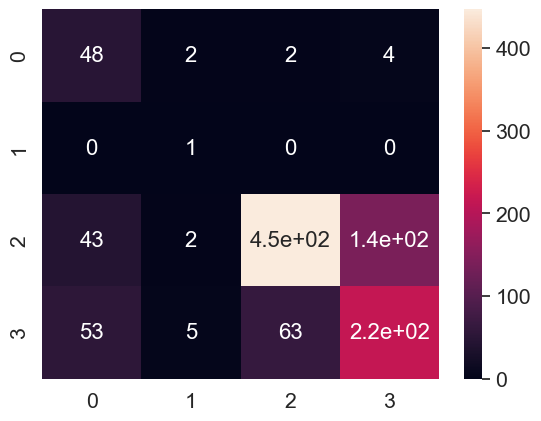

In [16]:
import seaborn as sn
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix')
cm = confusion_matrix(y_pred, y_valid)
print(cm)
sn.set(font_scale=1.4)#for label size
sn.heatmap(cm, annot=True,annot_kws={"size": 16})# font size

In [17]:
files = []
categories = []

for directory_path in glob.glob('/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/test/*'):

    label=directory_path.split('\\')[-1]
    
    for img_path in glob.glob(os.path.join(directory_path,'*.jpg')):
        files.append(img_path)
        categories.append(label)

df = pd.DataFrame({
 'Filename': files,
 'Category': categories
})

df

Filename  \
0     /Users/mahmouddaker/Desktop/University/MSA/Sem...   
1     /Users/mahmouddaker/Desktop/University/MSA/Sem...   
2     /Users/mahmouddaker/Desktop/University/MSA/Sem...   
3     /Users/mahmouddaker/Desktop/University/MSA/Sem...   
4     /Users/mahmouddaker/Desktop/University/MSA/Sem...   
...                                                 ...   
1274  /Users/mahmouddaker/Desktop/University/MSA/Sem...   
1275  /Users/mahmouddaker/Desktop/University/MSA/Sem...   
1276  /Users/mahmouddaker/Desktop/University/MSA/Sem...   
1277  /Users/mahmouddaker/Desktop/University/MSA/Sem...   
1278  /Users/mahmouddaker/Desktop/University/MSA/Sem...   

                                               Category  
0     /Users/mahmouddaker/Desktop/University/MSA/Sem...  
1     /Users/mahmouddaker/Desktop/University/MSA/Sem...  
2     /Users/mahmouddaker/Desktop/University/MSA/Sem...  
3     /Users/mahmouddaker/Desktop/University/MSA/Sem...  
4     /Users/mahmouddaker/Desktop/University/MSA/Sem...  
...                                                 ...  
1274  /Users/mahmouddaker/Desktop/University/MSA/Sem...  
1275  /Users/mahmouddaker/Desktop/University/MSA/Sem...  
1276  /Users/mahmouddaker/Desktop/University/MSA/Sem...  
1277  /Users/mahmouddaker/Desktop/University/MSA/Sem...  
1278  /Users/mahmouddaker/Desktop/University/MSA/Sem...  

[1279 rows x 2 columns]

In [18]:
df.head()

Filename  \
0  /Users/mahmouddaker/Desktop/University/MSA/Sem...   
1  /Users/mahmouddaker/Desktop/University/MSA/Sem...   
2  /Users/mahmouddaker/Desktop/University/MSA/Sem...   
3  /Users/mahmouddaker/Desktop/University/MSA/Sem...   
4  /Users/mahmouddaker/Desktop/University/MSA/Sem...   

                                            Category  
0  /Users/mahmouddaker/Desktop/University/MSA/Sem...  
1  /Users/mahmouddaker/Desktop/University/MSA/Sem...  
2  /Users/mahmouddaker/Desktop/University/MSA/Sem...  
3  /Users/mahmouddaker/Desktop/University/MSA/Sem...  
4  /Users/mahmouddaker/Desktop/University/MSA/Sem...

In [19]:
df['Category'].value_counts()

/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/test/NonDemented         640
/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/test/VeryMildDemented    448
/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/test/MildDemented        179
/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/test/ModerateDemented     12
Name: Category, dtype: int64

In [20]:
df.shape

(1279, 2)

In [21]:
le = preprocessing.LabelEncoder()
le.fit(df['Category'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/test/MildDemented': 0, '/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/test/ModerateDemented': 1, '/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/test/NonDemented': 2, '/Users/mahmouddaker/Desktop/University/MSA/Semester 6/CS363/Project/Alzheimer_s Dataset/test/VeryMildDemented': 3}


In [22]:
y = le.transform(df['Category'])

In [23]:
start = time.time()

x_test = []
y_test = y

for f in tqdm(df.Filename[:]):
    img_path = f
    img = load_img(img_path, target_size=(48, 48))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    features = model.predict(x)
    features_reduce =  features.squeeze()
    x_test.append(features_reduce)

  0%|                                                  | 0/1279 [00:00<?, ?it/s]

1/1 [==============================] - 0s 33ms/step


  0%|                                          | 2/1279 [00:00<01:48, 11.80it/s]

1/1 [==============================] - 0s 34ms/step


  0%|▏                                         | 4/1279 [00:00<01:42, 12.47it/s]

1/1 [==============================] - 0s 33ms/step


  0%|▏                                         | 6/1279 [00:00<01:37, 13.03it/s]

1/1 [==============================] - 0s 31ms/step


  1%|▎                                         | 8/1279 [00:00<01:36, 13.12it/s]

1/1 [==============================] - 0s 32ms/step


  1%|▎                                        | 10/1279 [00:00<01:36, 13.21it/s]

1/1 [==============================] - 0s 32ms/step


  1%|▍                                        | 12/1279 [00:00<01:35, 13.22it/s]

1/1 [==============================] - 0s 39ms/step


  1%|▍                                        | 14/1279 [00:01<01:36, 13.08it/s]

1/1 [==============================] - 0s 30ms/step


  1%|▌                                        | 16/1279 [00:01<01:34, 13.41it/s]

1/1 [==============================] - 0s 32ms/step


  1%|▌                                        | 18/1279 [00:01<01:36, 13.11it/s]

1/1 [==============================] - 0s 34ms/step


  2%|▋                                        | 20/1279 [00:01<01:36, 13.10it/s]

1/1 [==============================] - 0s 30ms/step


  2%|▋                                        | 22/1279 [00:01<01:32, 13.53it/s]

1/1 [==============================] - 0s 31ms/step


  2%|▊                                        | 24/1279 [00:01<01:32, 13.54it/s]

1/1 [==============================] - 0s 29ms/step


  2%|▊                                        | 26/1279 [00:01<01:32, 13.55it/s]

1/1 [==============================] - 0s 29ms/step


  2%|▉                                        | 28/1279 [00:02<01:30, 13.78it/s]

1/1 [==============================] - 0s 31ms/step


  2%|▉                                        | 30/1279 [00:02<01:30, 13.84it/s]

1/1 [==============================] - 0s 40ms/step


  3%|█                                        | 32/1279 [00:02<01:33, 13.36it/s]

1/1 [==============================] - 0s 32ms/step


  3%|█                                        | 34/1279 [00:02<01:34, 13.14it/s]

1/1 [==============================] - 0s 34ms/step


  3%|█▏                                       | 36/1279 [00:02<01:34, 13.12it/s]

1/1 [==============================] - 0s 34ms/step


  3%|█▏                                       | 38/1279 [00:02<01:34, 13.13it/s]

1/1 [==============================] - 0s 31ms/step


  3%|█▎                                       | 40/1279 [00:03<01:32, 13.41it/s]

1/1 [==============================] - 0s 30ms/step


  3%|█▎                                       | 42/1279 [00:03<01:31, 13.51it/s]

1/1 [==============================] - 0s 31ms/step


  3%|█▍                                       | 44/1279 [00:03<01:32, 13.39it/s]

1/1 [==============================] - 0s 31ms/step


  4%|█▍                                       | 46/1279 [00:03<01:32, 13.35it/s]

1/1 [==============================] - 0s 31ms/step


  4%|█▌                                       | 48/1279 [00:03<01:34, 13.04it/s]

1/1 [==============================] - 0s 31ms/step


  4%|█▌                                       | 50/1279 [00:03<01:31, 13.39it/s]

1/1 [==============================] - 0s 30ms/step


  4%|█▋                                       | 52/1279 [00:03<01:28, 13.79it/s]

1/1 [==============================] - 0s 35ms/step


  4%|█▋                                       | 54/1279 [00:04<01:27, 13.99it/s]

1/1 [==============================] - 0s 31ms/step


  4%|█▊                                       | 56/1279 [00:04<01:26, 14.20it/s]

1/1 [==============================] - 0s 31ms/step


  5%|█▊                                       | 58/1279 [00:04<01:25, 14.25it/s]

1/1 [==============================] - 0s 32ms/step


  5%|█▉                                       | 60/1279 [00:04<01:24, 14.43it/s]

1/1 [==============================] - 0s 39ms/step


  5%|█▉                                       | 62/1279 [00:04<01:35, 12.74it/s]

1/1 [==============================] - 0s 33ms/step


  5%|██                                       | 64/1279 [00:04<01:34, 12.86it/s]

1/1 [==============================] - 0s 35ms/step


  5%|██                                       | 66/1279 [00:04<01:32, 13.12it/s]

1/1 [==============================] - 0s 35ms/step


  5%|██▏                                      | 68/1279 [00:05<01:29, 13.49it/s]

1/1 [==============================] - 0s 32ms/step


  5%|██▏                                      | 70/1279 [00:05<01:27, 13.75it/s]

1/1 [==============================] - 0s 36ms/step


  6%|██▎                                      | 72/1279 [00:05<02:36,  7.72it/s]

1/1 [==============================] - 0s 35ms/step


  6%|██▎                                      | 74/1279 [00:05<02:14,  8.95it/s]

1/1 [==============================] - 0s 134ms/step


  6%|██▍                                      | 76/1279 [00:06<03:03,  6.54it/s]

1/1 [==============================] - 0s 63ms/step


  6%|██▍                                      | 77/1279 [00:06<03:13,  6.22it/s]

1/1 [==============================] - 0s 36ms/step


  6%|██▌                                      | 78/1279 [00:06<03:12,  6.23it/s]

1/1 [==============================] - 0s 60ms/step


  6%|██▌                                      | 79/1279 [00:06<03:09,  6.33it/s]

1/1 [==============================] - 0s 42ms/step


  6%|██▌                                      | 81/1279 [00:07<02:39,  7.53it/s]

1/1 [==============================] - 0s 35ms/step


  6%|██▋                                      | 83/1279 [00:07<02:15,  8.85it/s]

1/1 [==============================] - 0s 32ms/step


  7%|██▋                                      | 85/1279 [00:07<01:57, 10.15it/s]

1/1 [==============================] - 0s 33ms/step


  7%|██▊                                      | 87/1279 [00:07<01:48, 11.03it/s]

1/1 [==============================] - 0s 32ms/step


  7%|██▊                                      | 89/1279 [00:07<01:41, 11.73it/s]

1/1 [==============================] - 0s 35ms/step


  7%|██▉                                      | 91/1279 [00:07<01:38, 12.11it/s]

1/1 [==============================] - 0s 34ms/step


  7%|██▉                                      | 93/1279 [00:07<01:35, 12.42it/s]

1/1 [==============================] - 0s 36ms/step


  7%|███                                      | 95/1279 [00:08<01:35, 12.46it/s]

1/1 [==============================] - 0s 32ms/step


  8%|███                                      | 97/1279 [00:08<01:36, 12.23it/s]

1/1 [==============================] - 0s 40ms/step


  8%|███▏                                     | 99/1279 [00:08<01:40, 11.75it/s]

1/1 [==============================] - 0s 35ms/step


  8%|███▏                                    | 101/1279 [00:08<01:35, 12.30it/s]

1/1 [==============================] - 0s 35ms/step


  8%|███▏                                    | 103/1279 [00:08<01:32, 12.71it/s]

1/1 [==============================] - 0s 32ms/step


  8%|███▎                                    | 105/1279 [00:08<01:29, 13.11it/s]

1/1 [==============================] - 0s 32ms/step


  8%|███▎                                    | 107/1279 [00:09<01:27, 13.39it/s]

1/1 [==============================] - 0s 32ms/step


  9%|███▍                                    | 109/1279 [00:09<01:26, 13.47it/s]

1/1 [==============================] - 0s 31ms/step


  9%|███▍                                    | 111/1279 [00:09<01:27, 13.42it/s]

1/1 [==============================] - 0s 32ms/step


  9%|███▌                                    | 113/1279 [00:09<01:24, 13.73it/s]

1/1 [==============================] - 0s 36ms/step


  9%|███▌                                    | 115/1279 [00:09<01:24, 13.77it/s]

1/1 [==============================] - 0s 33ms/step


  9%|███▋                                    | 117/1279 [00:09<01:27, 13.35it/s]

1/1 [==============================] - 0s 33ms/step


  9%|███▋                                    | 119/1279 [00:09<01:25, 13.54it/s]

1/1 [==============================] - 0s 37ms/step


  9%|███▊                                    | 121/1279 [00:10<01:24, 13.64it/s]

1/1 [==============================] - 0s 33ms/step


 10%|███▊                                    | 123/1279 [00:10<01:24, 13.75it/s]

1/1 [==============================] - 0s 32ms/step


 10%|███▉                                    | 125/1279 [00:10<01:23, 13.87it/s]

1/1 [==============================] - 0s 30ms/step


 10%|███▉                                    | 127/1279 [00:10<01:21, 14.06it/s]

1/1 [==============================] - 0s 32ms/step


 10%|████                                    | 129/1279 [00:10<01:20, 14.27it/s]

1/1 [==============================] - 0s 35ms/step


 10%|████                                    | 131/1279 [00:10<01:20, 14.25it/s]

1/1 [==============================] - 0s 31ms/step


 10%|████▏                                   | 133/1279 [00:10<01:19, 14.45it/s]

1/1 [==============================] - 0s 31ms/step


 11%|████▏                                   | 135/1279 [00:11<01:20, 14.29it/s]

1/1 [==============================] - 0s 30ms/step


 11%|████▎                                   | 137/1279 [00:11<01:19, 14.41it/s]

1/1 [==============================] - 0s 34ms/step


 11%|████▎                                   | 139/1279 [00:11<01:18, 14.58it/s]

1/1 [==============================] - 0s 31ms/step


 11%|████▍                                   | 141/1279 [00:11<01:17, 14.60it/s]

1/1 [==============================] - 0s 31ms/step


 11%|████▍                                   | 143/1279 [00:11<01:19, 14.20it/s]

1/1 [==============================] - 0s 30ms/step


 11%|████▌                                   | 145/1279 [00:11<01:26, 13.13it/s]

1/1 [==============================] - 0s 33ms/step


 11%|████▌                                   | 147/1279 [00:11<01:24, 13.45it/s]

1/1 [==============================] - 0s 32ms/step


 12%|████▋                                   | 149/1279 [00:12<01:22, 13.73it/s]

1/1 [==============================] - 0s 29ms/step


 12%|████▋                                   | 151/1279 [00:12<01:20, 14.02it/s]

1/1 [==============================] - 0s 31ms/step


 12%|████▊                                   | 153/1279 [00:12<01:20, 14.01it/s]

1/1 [==============================] - 0s 33ms/step


 12%|████▊                                   | 155/1279 [00:12<01:19, 14.16it/s]

1/1 [==============================] - 0s 35ms/step


 12%|████▉                                   | 157/1279 [00:12<01:19, 14.08it/s]

1/1 [==============================] - 0s 33ms/step


 12%|████▉                                   | 159/1279 [00:12<01:25, 13.12it/s]

1/1 [==============================] - 0s 29ms/step


 13%|█████                                   | 161/1279 [00:12<01:23, 13.33it/s]

1/1 [==============================] - 0s 33ms/step


 13%|█████                                   | 163/1279 [00:13<01:20, 13.78it/s]

1/1 [==============================] - 0s 33ms/step


 13%|█████▏                                  | 165/1279 [00:13<01:20, 13.92it/s]

1/1 [==============================] - 0s 30ms/step


 13%|█████▏                                  | 167/1279 [00:13<01:18, 14.18it/s]

1/1 [==============================] - 0s 30ms/step


 13%|█████▎                                  | 169/1279 [00:13<01:17, 14.37it/s]

1/1 [==============================] - 0s 29ms/step


 13%|█████▎                                  | 171/1279 [00:13<01:19, 13.97it/s]

1/1 [==============================] - 0s 33ms/step


 14%|█████▍                                  | 173/1279 [00:13<01:19, 13.93it/s]

1/1 [==============================] - 0s 36ms/step


 14%|█████▍                                  | 175/1279 [00:13<01:19, 13.93it/s]

1/1 [==============================] - 0s 33ms/step


 14%|█████▌                                  | 177/1279 [00:14<01:18, 14.13it/s]

1/1 [==============================] - 0s 31ms/step


 14%|█████▌                                  | 179/1279 [00:14<01:17, 14.12it/s]

1/1 [==============================] - 0s 30ms/step


 14%|█████▋                                  | 181/1279 [00:14<01:18, 13.93it/s]

1/1 [==============================] - 0s 30ms/step


 14%|█████▋                                  | 183/1279 [00:14<01:17, 14.06it/s]

1/1 [==============================] - 0s 32ms/step


 14%|█████▊                                  | 185/1279 [00:14<01:16, 14.24it/s]

1/1 [==============================] - 0s 33ms/step


 15%|█████▊                                  | 187/1279 [00:14<01:15, 14.49it/s]

1/1 [==============================] - 0s 31ms/step


 15%|█████▉                                  | 189/1279 [00:14<01:15, 14.43it/s]

1/1 [==============================] - 0s 30ms/step


 15%|█████▉                                  | 191/1279 [00:15<01:15, 14.48it/s]

1/1 [==============================] - 0s 30ms/step


 15%|██████                                  | 193/1279 [00:15<01:34, 11.48it/s]

1/1 [==============================] - 0s 29ms/step


 15%|██████                                  | 195/1279 [00:15<01:29, 12.12it/s]

1/1 [==============================] - 0s 30ms/step


 15%|██████▏                                 | 197/1279 [00:15<01:28, 12.28it/s]

1/1 [==============================] - 0s 31ms/step


 16%|██████▏                                 | 199/1279 [00:15<01:25, 12.61it/s]

1/1 [==============================] - 0s 31ms/step


 16%|██████▎                                 | 201/1279 [00:15<01:21, 13.18it/s]

1/1 [==============================] - 0s 33ms/step


 16%|██████▎                                 | 203/1279 [00:16<01:20, 13.39it/s]

1/1 [==============================] - 0s 32ms/step


 16%|██████▍                                 | 205/1279 [00:16<01:21, 13.11it/s]

1/1 [==============================] - 0s 29ms/step


 16%|██████▍                                 | 207/1279 [00:16<01:22, 12.95it/s]

1/1 [==============================] - 0s 32ms/step


 16%|██████▌                                 | 209/1279 [00:16<01:22, 13.02it/s]

1/1 [==============================] - 0s 31ms/step


 16%|██████▌                                 | 211/1279 [00:16<01:21, 13.08it/s]

1/1 [==============================] - 0s 30ms/step


 17%|██████▋                                 | 213/1279 [00:16<01:19, 13.43it/s]

1/1 [==============================] - 0s 31ms/step


 17%|██████▋                                 | 215/1279 [00:16<01:19, 13.44it/s]

1/1 [==============================] - 0s 32ms/step


 17%|██████▊                                 | 217/1279 [00:17<01:18, 13.47it/s]

1/1 [==============================] - 0s 36ms/step


 17%|██████▊                                 | 219/1279 [00:17<01:16, 13.79it/s]

1/1 [==============================] - 0s 32ms/step


 17%|██████▉                                 | 221/1279 [00:17<01:15, 13.96it/s]

1/1 [==============================] - 0s 33ms/step


 17%|██████▉                                 | 223/1279 [00:17<01:16, 13.85it/s]

1/1 [==============================] - 0s 32ms/step


 18%|███████                                 | 225/1279 [00:17<01:16, 13.84it/s]

1/1 [==============================] - 0s 34ms/step


 18%|███████                                 | 227/1279 [00:17<01:15, 13.91it/s]

1/1 [==============================] - 0s 32ms/step


 18%|███████▏                                | 229/1279 [00:17<01:15, 13.87it/s]

1/1 [==============================] - 0s 33ms/step


 18%|███████▏                                | 231/1279 [00:18<01:15, 13.97it/s]

1/1 [==============================] - 0s 34ms/step


 18%|███████▎                                | 233/1279 [00:18<01:14, 13.95it/s]

1/1 [==============================] - 0s 34ms/step


 18%|███████▎                                | 235/1279 [00:18<01:15, 13.88it/s]

1/1 [==============================] - 0s 32ms/step


 19%|███████▍                                | 237/1279 [00:18<01:14, 14.05it/s]

1/1 [==============================] - 0s 32ms/step


 19%|███████▍                                | 239/1279 [00:18<01:14, 13.91it/s]

1/1 [==============================] - 0s 34ms/step


 19%|███████▌                                | 241/1279 [00:18<01:15, 13.69it/s]

1/1 [==============================] - 0s 32ms/step


 19%|███████▌                                | 243/1279 [00:18<01:15, 13.79it/s]

1/1 [==============================] - 0s 31ms/step


 19%|███████▋                                | 245/1279 [00:19<01:13, 14.12it/s]

1/1 [==============================] - 0s 35ms/step


 19%|███████▋                                | 247/1279 [00:19<01:12, 14.28it/s]

1/1 [==============================] - 0s 33ms/step


 19%|███████▊                                | 249/1279 [00:19<01:13, 14.10it/s]

1/1 [==============================] - 0s 32ms/step


 20%|███████▊                                | 251/1279 [00:19<01:12, 14.10it/s]

1/1 [==============================] - 0s 32ms/step


 20%|███████▉                                | 253/1279 [00:19<01:12, 14.12it/s]

1/1 [==============================] - 0s 30ms/step


 20%|███████▉                                | 255/1279 [00:19<01:11, 14.32it/s]

1/1 [==============================] - 0s 33ms/step


 20%|████████                                | 257/1279 [00:19<01:11, 14.25it/s]

1/1 [==============================] - 0s 33ms/step


 20%|████████                                | 259/1279 [00:20<01:11, 14.25it/s]

1/1 [==============================] - 0s 33ms/step


 20%|████████▏                               | 261/1279 [00:20<01:11, 14.24it/s]

1/1 [==============================] - 0s 40ms/step


 21%|████████▏                               | 263/1279 [00:20<01:14, 13.60it/s]

1/1 [==============================] - 0s 36ms/step


 21%|████████▎                               | 265/1279 [00:20<01:17, 13.05it/s]

1/1 [==============================] - 0s 31ms/step


 21%|████████▎                               | 267/1279 [00:20<01:16, 13.15it/s]

1/1 [==============================] - 0s 32ms/step


 21%|████████▍                               | 269/1279 [00:20<01:14, 13.49it/s]

1/1 [==============================] - 0s 33ms/step


 21%|████████▍                               | 271/1279 [00:20<01:13, 13.80it/s]

1/1 [==============================] - 0s 34ms/step


 21%|████████▌                               | 273/1279 [00:21<01:15, 13.31it/s]

1/1 [==============================] - 0s 29ms/step


 22%|████████▌                               | 275/1279 [00:21<01:16, 13.04it/s]

1/1 [==============================] - 0s 33ms/step


 22%|████████▋                               | 277/1279 [00:21<01:14, 13.52it/s]

1/1 [==============================] - 0s 35ms/step


 22%|████████▋                               | 279/1279 [00:21<01:14, 13.36it/s]

1/1 [==============================] - 0s 33ms/step


 22%|████████▊                               | 281/1279 [00:21<01:14, 13.34it/s]

1/1 [==============================] - 0s 34ms/step


 22%|████████▊                               | 283/1279 [00:21<01:14, 13.32it/s]

1/1 [==============================] - 0s 36ms/step


 22%|████████▉                               | 285/1279 [00:22<01:15, 13.22it/s]

1/1 [==============================] - 0s 32ms/step


 22%|████████▉                               | 287/1279 [00:22<01:14, 13.32it/s]

1/1 [==============================] - 0s 33ms/step


 23%|█████████                               | 289/1279 [00:22<01:13, 13.44it/s]

1/1 [==============================] - 0s 33ms/step


 23%|█████████                               | 291/1279 [00:22<01:13, 13.46it/s]

1/1 [==============================] - 0s 36ms/step


 23%|█████████▏                              | 293/1279 [00:22<01:14, 13.28it/s]

1/1 [==============================] - 0s 32ms/step


 23%|█████████▏                              | 295/1279 [00:22<01:13, 13.32it/s]

1/1 [==============================] - 0s 34ms/step


 23%|█████████▎                              | 297/1279 [00:22<01:12, 13.46it/s]

1/1 [==============================] - 0s 34ms/step


 23%|█████████▎                              | 299/1279 [00:23<01:13, 13.41it/s]

1/1 [==============================] - 0s 31ms/step


 24%|█████████▍                              | 301/1279 [00:23<01:10, 13.85it/s]

1/1 [==============================] - 0s 31ms/step


 24%|█████████▍                              | 303/1279 [00:23<01:10, 13.84it/s]

1/1 [==============================] - 0s 32ms/step


 24%|█████████▌                              | 305/1279 [00:23<01:12, 13.52it/s]

1/1 [==============================] - 0s 33ms/step


 24%|█████████▌                              | 307/1279 [00:23<01:11, 13.58it/s]

1/1 [==============================] - 0s 29ms/step


 24%|█████████▋                              | 309/1279 [00:23<01:10, 13.80it/s]

1/1 [==============================] - 0s 31ms/step


 24%|█████████▋                              | 311/1279 [00:23<01:12, 13.31it/s]

1/1 [==============================] - 0s 30ms/step


 24%|█████████▊                              | 313/1279 [00:24<01:10, 13.69it/s]

1/1 [==============================] - 0s 30ms/step


 25%|█████████▊                              | 315/1279 [00:24<01:12, 13.38it/s]

1/1 [==============================] - 0s 31ms/step


 25%|█████████▉                              | 317/1279 [00:24<01:12, 13.23it/s]

1/1 [==============================] - 0s 29ms/step


 25%|█████████▉                              | 319/1279 [00:24<01:11, 13.52it/s]

1/1 [==============================] - 0s 30ms/step


 25%|██████████                              | 321/1279 [00:24<01:11, 13.36it/s]

1/1 [==============================] - 0s 31ms/step


 25%|██████████                              | 323/1279 [00:24<01:12, 13.21it/s]

1/1 [==============================] - 0s 30ms/step


 25%|██████████▏                             | 325/1279 [00:25<01:11, 13.40it/s]

1/1 [==============================] - 0s 33ms/step


 26%|██████████▏                             | 327/1279 [00:25<01:12, 13.14it/s]

1/1 [==============================] - 0s 31ms/step


 26%|██████████▎                             | 329/1279 [00:25<01:11, 13.29it/s]

1/1 [==============================] - 0s 33ms/step


 26%|██████████▎                             | 331/1279 [00:25<01:22, 11.53it/s]

1/1 [==============================] - 0s 34ms/step


 26%|██████████▍                             | 333/1279 [00:25<01:17, 12.17it/s]

1/1 [==============================] - 0s 33ms/step


 26%|██████████▍                             | 335/1279 [00:25<01:14, 12.69it/s]

1/1 [==============================] - 0s 32ms/step


 26%|██████████▌                             | 337/1279 [00:25<01:11, 13.10it/s]

1/1 [==============================] - 0s 29ms/step


 27%|██████████▌                             | 339/1279 [00:26<01:10, 13.38it/s]

1/1 [==============================] - 0s 29ms/step


 27%|██████████▋                             | 341/1279 [00:26<01:09, 13.50it/s]

1/1 [==============================] - 0s 31ms/step


 27%|██████████▋                             | 343/1279 [00:26<01:10, 13.34it/s]

1/1 [==============================] - 0s 31ms/step


 27%|██████████▊                             | 345/1279 [00:26<01:09, 13.40it/s]

1/1 [==============================] - 0s 31ms/step


 27%|██████████▊                             | 347/1279 [00:26<01:10, 13.13it/s]

1/1 [==============================] - 0s 30ms/step


 27%|██████████▉                             | 349/1279 [00:26<01:09, 13.33it/s]

1/1 [==============================] - 0s 29ms/step


 27%|██████████▉                             | 351/1279 [00:27<01:09, 13.34it/s]

1/1 [==============================] - 0s 29ms/step


 28%|███████████                             | 353/1279 [00:27<01:08, 13.45it/s]

1/1 [==============================] - 0s 29ms/step


 28%|███████████                             | 355/1279 [00:27<01:09, 13.31it/s]

1/1 [==============================] - 0s 30ms/step


 28%|███████████▏                            | 357/1279 [00:27<01:08, 13.37it/s]

1/1 [==============================] - 0s 29ms/step


 28%|███████████▏                            | 359/1279 [00:27<01:08, 13.47it/s]

1/1 [==============================] - 0s 31ms/step


 28%|███████████▎                            | 361/1279 [00:27<01:08, 13.41it/s]

1/1 [==============================] - 0s 31ms/step


 28%|███████████▎                            | 363/1279 [00:27<01:07, 13.65it/s]

1/1 [==============================] - 0s 33ms/step


 29%|███████████▍                            | 365/1279 [00:28<01:06, 13.82it/s]

1/1 [==============================] - 0s 34ms/step


 29%|███████████▍                            | 367/1279 [00:28<01:06, 13.62it/s]

1/1 [==============================] - 0s 34ms/step


 29%|███████████▌                            | 369/1279 [00:28<01:06, 13.63it/s]

1/1 [==============================] - 0s 35ms/step


 29%|███████████▌                            | 371/1279 [00:28<01:07, 13.47it/s]

1/1 [==============================] - 0s 33ms/step


 29%|███████████▋                            | 373/1279 [00:28<01:07, 13.37it/s]

1/1 [==============================] - 0s 31ms/step


 29%|███████████▋                            | 375/1279 [00:28<01:08, 13.18it/s]

1/1 [==============================] - 0s 30ms/step


 29%|███████████▊                            | 377/1279 [00:28<01:07, 13.30it/s]

1/1 [==============================] - 0s 33ms/step


 30%|███████████▊                            | 379/1279 [00:29<01:07, 13.43it/s]

1/1 [==============================] - 0s 32ms/step


 30%|███████████▉                            | 381/1279 [00:29<01:06, 13.41it/s]

1/1 [==============================] - 0s 33ms/step


 30%|███████████▉                            | 383/1279 [00:29<01:07, 13.36it/s]

1/1 [==============================] - 0s 34ms/step


 30%|████████████                            | 385/1279 [00:29<01:06, 13.36it/s]

1/1 [==============================] - 0s 50ms/step


 30%|████████████                            | 387/1279 [00:30<01:54,  7.76it/s]

1/1 [==============================] - 0s 48ms/step


 30%|████████████▏                           | 389/1279 [00:30<01:52,  7.90it/s]

1/1 [==============================] - 0s 34ms/step


 31%|████████████▏                           | 391/1279 [00:30<01:38,  9.01it/s]

1/1 [==============================] - 0s 34ms/step


 31%|████████████▎                           | 393/1279 [00:30<01:28, 10.02it/s]

1/1 [==============================] - 0s 32ms/step


 31%|████████████▎                           | 395/1279 [00:30<01:21, 10.84it/s]

1/1 [==============================] - 0s 33ms/step


 31%|████████████▍                           | 397/1279 [00:30<01:16, 11.50it/s]

1/1 [==============================] - 0s 35ms/step


 31%|████████████▍                           | 399/1279 [00:31<01:13, 11.93it/s]

1/1 [==============================] - 0s 33ms/step


 31%|████████████▌                           | 401/1279 [00:31<01:11, 12.25it/s]

1/1 [==============================] - 0s 35ms/step


 32%|████████████▌                           | 403/1279 [00:31<01:09, 12.64it/s]

1/1 [==============================] - 0s 35ms/step


 32%|████████████▋                           | 405/1279 [00:31<01:08, 12.82it/s]

1/1 [==============================] - 0s 34ms/step


 32%|████████████▋                           | 407/1279 [00:31<01:07, 13.00it/s]

1/1 [==============================] - 0s 35ms/step


 32%|████████████▊                           | 409/1279 [00:31<01:06, 13.12it/s]

1/1 [==============================] - 0s 33ms/step


 32%|████████████▊                           | 411/1279 [00:31<01:05, 13.28it/s]

1/1 [==============================] - 0s 33ms/step


 32%|████████████▉                           | 413/1279 [00:32<01:05, 13.13it/s]

1/1 [==============================] - 0s 34ms/step


 32%|████████████▉                           | 415/1279 [00:32<01:05, 13.18it/s]

1/1 [==============================] - 0s 34ms/step


 33%|█████████████                           | 417/1279 [00:32<01:04, 13.32it/s]

1/1 [==============================] - 0s 34ms/step


 33%|█████████████                           | 419/1279 [00:32<01:04, 13.35it/s]

1/1 [==============================] - 0s 33ms/step


 33%|█████████████▏                          | 421/1279 [00:32<01:04, 13.39it/s]

1/1 [==============================] - 0s 33ms/step


 33%|█████████████▏                          | 423/1279 [00:32<01:04, 13.35it/s]

1/1 [==============================] - 0s 34ms/step


 33%|█████████████▎                          | 425/1279 [00:32<01:04, 13.26it/s]

1/1 [==============================] - 0s 34ms/step


 33%|█████████████▎                          | 427/1279 [00:33<01:03, 13.35it/s]

1/1 [==============================] - 0s 37ms/step


 34%|█████████████▍                          | 429/1279 [00:33<01:04, 13.16it/s]

1/1 [==============================] - 0s 30ms/step


 34%|█████████████▍                          | 431/1279 [00:33<01:06, 12.77it/s]

1/1 [==============================] - 0s 34ms/step


 34%|█████████████▌                          | 433/1279 [00:33<01:05, 12.86it/s]

1/1 [==============================] - 0s 32ms/step


 34%|█████████████▌                          | 435/1279 [00:33<01:04, 13.00it/s]

1/1 [==============================] - 0s 34ms/step


 34%|█████████████▋                          | 437/1279 [00:33<01:04, 13.05it/s]

1/1 [==============================] - 0s 32ms/step


 34%|█████████████▋                          | 439/1279 [00:34<01:03, 13.27it/s]

1/1 [==============================] - 0s 33ms/step


 34%|█████████████▊                          | 441/1279 [00:34<01:03, 13.10it/s]

1/1 [==============================] - 0s 31ms/step


 35%|█████████████▊                          | 443/1279 [00:34<01:02, 13.41it/s]

1/1 [==============================] - 0s 33ms/step


 35%|█████████████▉                          | 445/1279 [00:34<01:04, 12.92it/s]

1/1 [==============================] - 0s 31ms/step


 35%|█████████████▉                          | 447/1279 [00:34<01:02, 13.22it/s]

1/1 [==============================] - 0s 30ms/step


 35%|██████████████                          | 449/1279 [00:34<01:01, 13.41it/s]

1/1 [==============================] - 0s 30ms/step


 35%|██████████████                          | 451/1279 [00:34<01:01, 13.40it/s]

1/1 [==============================] - 0s 31ms/step


 35%|██████████████▏                         | 453/1279 [00:35<01:01, 13.48it/s]

1/1 [==============================] - 0s 31ms/step


 36%|██████████████▏                         | 455/1279 [00:35<01:00, 13.52it/s]

1/1 [==============================] - 0s 32ms/step


 36%|██████████████▎                         | 457/1279 [00:35<01:01, 13.35it/s]

1/1 [==============================] - 0s 34ms/step


 36%|██████████████▎                         | 459/1279 [00:35<01:01, 13.43it/s]

1/1 [==============================] - 0s 32ms/step


 36%|██████████████▍                         | 461/1279 [00:35<01:00, 13.47it/s]

1/1 [==============================] - 0s 34ms/step


 36%|██████████████▍                         | 463/1279 [00:35<01:01, 13.18it/s]

1/1 [==============================] - 0s 65ms/step


 36%|██████████████▌                         | 465/1279 [00:36<01:10, 11.53it/s]

1/1 [==============================] - 0s 32ms/step


 37%|██████████████▌                         | 467/1279 [00:36<01:08, 11.80it/s]

1/1 [==============================] - 0s 36ms/step


 37%|██████████████▋                         | 469/1279 [00:36<01:05, 12.36it/s]

1/1 [==============================] - 0s 33ms/step


 37%|██████████████▋                         | 471/1279 [00:36<01:02, 12.84it/s]

1/1 [==============================] - 0s 32ms/step


 37%|██████████████▊                         | 473/1279 [00:36<01:02, 12.87it/s]

1/1 [==============================] - 0s 34ms/step


 37%|██████████████▊                         | 475/1279 [00:36<01:01, 13.09it/s]

1/1 [==============================] - 0s 36ms/step


 37%|██████████████▉                         | 477/1279 [00:36<01:01, 13.02it/s]

1/1 [==============================] - 0s 33ms/step


 37%|██████████████▉                         | 479/1279 [00:37<01:00, 13.18it/s]

1/1 [==============================] - 0s 33ms/step


 38%|███████████████                         | 481/1279 [00:37<01:02, 12.73it/s]

1/1 [==============================] - 0s 30ms/step


 38%|███████████████                         | 483/1279 [00:37<01:01, 13.03it/s]

1/1 [==============================] - 0s 30ms/step


 38%|███████████████▏                        | 485/1279 [00:37<01:01, 12.85it/s]

1/1 [==============================] - 0s 30ms/step


 38%|███████████████▏                        | 487/1279 [00:37<01:00, 13.15it/s]

1/1 [==============================] - 0s 34ms/step


 38%|███████████████▎                        | 489/1279 [00:37<01:05, 12.13it/s]

1/1 [==============================] - 0s 29ms/step


 38%|███████████████▎                        | 491/1279 [00:38<01:03, 12.39it/s]

1/1 [==============================] - 0s 32ms/step


 39%|███████████████▍                        | 493/1279 [00:38<01:03, 12.41it/s]

1/1 [==============================] - 0s 33ms/step


 39%|███████████████▍                        | 495/1279 [00:38<01:01, 12.69it/s]

1/1 [==============================] - 0s 33ms/step


 39%|███████████████▌                        | 497/1279 [00:38<01:00, 13.02it/s]

1/1 [==============================] - 0s 30ms/step


 39%|███████████████▌                        | 499/1279 [00:38<00:57, 13.48it/s]

1/1 [==============================] - 0s 32ms/step


 39%|███████████████▋                        | 501/1279 [00:38<00:57, 13.57it/s]

1/1 [==============================] - 0s 32ms/step


 39%|███████████████▋                        | 503/1279 [00:38<00:57, 13.54it/s]

1/1 [==============================] - 0s 34ms/step


 39%|███████████████▊                        | 505/1279 [00:39<00:57, 13.49it/s]

1/1 [==============================] - 0s 33ms/step


 40%|███████████████▊                        | 507/1279 [00:39<00:57, 13.31it/s]

1/1 [==============================] - 0s 35ms/step


 40%|███████████████▉                        | 509/1279 [00:39<00:57, 13.47it/s]

1/1 [==============================] - 0s 30ms/step


 40%|███████████████▉                        | 511/1279 [00:39<00:58, 13.16it/s]

1/1 [==============================] - 0s 32ms/step


 40%|████████████████                        | 513/1279 [00:39<00:57, 13.27it/s]

1/1 [==============================] - 0s 33ms/step


 40%|████████████████                        | 515/1279 [00:39<00:57, 13.23it/s]

1/1 [==============================] - 0s 32ms/step


 40%|████████████████▏                       | 517/1279 [00:40<00:56, 13.47it/s]

1/1 [==============================] - 0s 33ms/step


 41%|████████████████▏                       | 519/1279 [00:40<00:55, 13.59it/s]

1/1 [==============================] - 0s 31ms/step


 41%|████████████████▎                       | 521/1279 [00:40<00:54, 13.83it/s]

1/1 [==============================] - 0s 30ms/step


 41%|████████████████▎                       | 523/1279 [00:40<00:54, 13.95it/s]

1/1 [==============================] - 0s 30ms/step


 41%|████████████████▍                       | 525/1279 [00:40<00:54, 13.92it/s]

1/1 [==============================] - 0s 31ms/step


 41%|████████████████▍                       | 527/1279 [00:40<00:54, 13.74it/s]

1/1 [==============================] - 0s 31ms/step


 41%|████████████████▌                       | 529/1279 [00:40<00:55, 13.62it/s]

1/1 [==============================] - 0s 29ms/step


 42%|████████████████▌                       | 531/1279 [00:41<00:55, 13.55it/s]

1/1 [==============================] - 0s 32ms/step


 42%|████████████████▋                       | 533/1279 [00:41<00:56, 13.20it/s]

1/1 [==============================] - 0s 29ms/step


 42%|████████████████▋                       | 535/1279 [00:41<00:54, 13.55it/s]

1/1 [==============================] - 0s 29ms/step


 42%|████████████████▊                       | 537/1279 [00:41<00:54, 13.51it/s]

1/1 [==============================] - 0s 31ms/step


 42%|████████████████▊                       | 539/1279 [00:41<00:56, 13.06it/s]

1/1 [==============================] - 0s 29ms/step


 42%|████████████████▉                       | 541/1279 [00:41<00:54, 13.50it/s]

1/1 [==============================] - 0s 29ms/step


 42%|████████████████▉                       | 543/1279 [00:41<00:54, 13.54it/s]

1/1 [==============================] - 0s 31ms/step


 43%|█████████████████                       | 545/1279 [00:42<00:54, 13.38it/s]

1/1 [==============================] - 0s 31ms/step


 43%|█████████████████                       | 547/1279 [00:42<00:55, 13.14it/s]

1/1 [==============================] - 0s 34ms/step


 43%|█████████████████▏                      | 549/1279 [00:42<00:54, 13.28it/s]

1/1 [==============================] - 0s 30ms/step


 43%|█████████████████▏                      | 551/1279 [00:42<00:52, 13.78it/s]

1/1 [==============================] - 0s 34ms/step


 43%|█████████████████▎                      | 553/1279 [00:42<00:52, 13.72it/s]

1/1 [==============================] - 0s 32ms/step


 43%|█████████████████▎                      | 555/1279 [00:42<00:53, 13.63it/s]

1/1 [==============================] - 0s 34ms/step


 44%|█████████████████▍                      | 557/1279 [00:42<00:53, 13.62it/s]

1/1 [==============================] - 0s 34ms/step


 44%|█████████████████▍                      | 559/1279 [00:43<00:51, 13.89it/s]

1/1 [==============================] - 0s 31ms/step


 44%|█████████████████▌                      | 561/1279 [00:43<00:51, 13.94it/s]

1/1 [==============================] - 0s 32ms/step


 44%|█████████████████▌                      | 563/1279 [00:43<00:51, 13.95it/s]

1/1 [==============================] - 0s 33ms/step


 44%|█████████████████▋                      | 565/1279 [00:43<00:52, 13.70it/s]

1/1 [==============================] - 0s 30ms/step


 44%|█████████████████▋                      | 567/1279 [00:43<00:52, 13.63it/s]

1/1 [==============================] - 0s 32ms/step


 44%|█████████████████▊                      | 569/1279 [00:43<00:52, 13.40it/s]

1/1 [==============================] - 0s 30ms/step


 45%|█████████████████▊                      | 571/1279 [00:44<00:52, 13.52it/s]

1/1 [==============================] - 0s 31ms/step


 45%|█████████████████▉                      | 573/1279 [00:44<00:52, 13.46it/s]

1/1 [==============================] - 0s 32ms/step


 45%|█████████████████▉                      | 575/1279 [00:44<00:53, 13.27it/s]

1/1 [==============================] - 0s 31ms/step


 45%|██████████████████                      | 577/1279 [00:44<00:52, 13.49it/s]

1/1 [==============================] - 0s 31ms/step


 45%|██████████████████                      | 579/1279 [00:44<00:52, 13.44it/s]

1/1 [==============================] - 0s 31ms/step


 45%|██████████████████▏                     | 581/1279 [00:44<00:51, 13.50it/s]

1/1 [==============================] - 0s 32ms/step


 46%|██████████████████▏                     | 583/1279 [00:44<00:55, 12.65it/s]

1/1 [==============================] - 0s 31ms/step


 46%|██████████████████▎                     | 585/1279 [00:45<00:54, 12.67it/s]

1/1 [==============================] - 0s 35ms/step


 46%|██████████████████▎                     | 587/1279 [00:45<00:52, 13.06it/s]

1/1 [==============================] - 0s 36ms/step


 46%|██████████████████▍                     | 589/1279 [00:45<00:53, 12.99it/s]

1/1 [==============================] - 0s 43ms/step


 46%|██████████████████▍                     | 591/1279 [00:45<00:59, 11.55it/s]

1/1 [==============================] - 0s 30ms/step


 46%|██████████████████▌                     | 593/1279 [00:45<00:55, 12.37it/s]

1/1 [==============================] - 0s 34ms/step


 47%|██████████████████▌                     | 595/1279 [00:45<00:53, 12.77it/s]

1/1 [==============================] - 0s 33ms/step


 47%|██████████████████▋                     | 597/1279 [00:46<00:52, 13.04it/s]

1/1 [==============================] - 0s 32ms/step


 47%|██████████████████▋                     | 599/1279 [00:46<00:49, 13.66it/s]

1/1 [==============================] - 0s 30ms/step


 47%|██████████████████▊                     | 601/1279 [00:46<00:49, 13.78it/s]

1/1 [==============================] - 0s 31ms/step


 47%|██████████████████▊                     | 603/1279 [00:46<00:54, 12.41it/s]

1/1 [==============================] - 0s 64ms/step


 47%|██████████████████▉                     | 605/1279 [00:46<01:04, 10.41it/s]

1/1 [==============================] - 0s 31ms/step


 47%|██████████████████▉                     | 607/1279 [00:47<01:09,  9.73it/s]

1/1 [==============================] - 0s 31ms/step


 48%|███████████████████                     | 609/1279 [00:47<01:13,  9.13it/s]

1/1 [==============================] - 0s 33ms/step


 48%|███████████████████                     | 611/1279 [00:47<01:06, 10.09it/s]

1/1 [==============================] - 0s 30ms/step


 48%|███████████████████▏                    | 613/1279 [00:47<01:00, 10.97it/s]

1/1 [==============================] - 0s 31ms/step


 48%|███████████████████▏                    | 615/1279 [00:47<00:56, 11.82it/s]

1/1 [==============================] - 0s 34ms/step


 48%|███████████████████▎                    | 617/1279 [00:47<00:52, 12.52it/s]

1/1 [==============================] - 0s 30ms/step


 48%|███████████████████▎                    | 619/1279 [00:47<00:50, 13.16it/s]

1/1 [==============================] - 0s 33ms/step


 49%|███████████████████▍                    | 621/1279 [00:48<00:49, 13.20it/s]

1/1 [==============================] - 0s 30ms/step


 49%|███████████████████▍                    | 623/1279 [00:48<00:48, 13.59it/s]

1/1 [==============================] - 0s 34ms/step


 49%|███████████████████▌                    | 625/1279 [00:48<00:47, 13.91it/s]

1/1 [==============================] - 0s 36ms/step


 49%|███████████████████▌                    | 627/1279 [00:48<00:48, 13.36it/s]

1/1 [==============================] - 0s 30ms/step


 49%|███████████████████▋                    | 629/1279 [00:48<00:48, 13.40it/s]

1/1 [==============================] - 0s 34ms/step


 49%|███████████████████▋                    | 631/1279 [00:48<00:47, 13.67it/s]

1/1 [==============================] - 0s 37ms/step


 49%|███████████████████▊                    | 633/1279 [00:48<00:47, 13.61it/s]

1/1 [==============================] - 0s 34ms/step


 50%|███████████████████▊                    | 635/1279 [00:49<00:46, 13.73it/s]

1/1 [==============================] - 0s 33ms/step


 50%|███████████████████▉                    | 637/1279 [00:49<00:46, 13.84it/s]

1/1 [==============================] - 0s 34ms/step


 50%|███████████████████▉                    | 639/1279 [00:49<00:47, 13.57it/s]

1/1 [==============================] - 0s 31ms/step


 50%|████████████████████                    | 641/1279 [00:49<00:46, 13.74it/s]

1/1 [==============================] - 0s 31ms/step


 50%|████████████████████                    | 643/1279 [00:49<00:46, 13.81it/s]

1/1 [==============================] - 0s 31ms/step


 50%|████████████████████▏                   | 645/1279 [00:49<00:45, 14.07it/s]

1/1 [==============================] - 0s 29ms/step


 51%|████████████████████▏                   | 647/1279 [00:50<00:46, 13.64it/s]

1/1 [==============================] - 0s 33ms/step


 51%|████████████████████▎                   | 649/1279 [00:50<00:47, 13.16it/s]

1/1 [==============================] - 0s 32ms/step


 51%|████████████████████▎                   | 651/1279 [00:50<00:47, 13.34it/s]

1/1 [==============================] - 0s 32ms/step


 51%|████████████████████▍                   | 653/1279 [00:50<00:46, 13.41it/s]

1/1 [==============================] - 0s 30ms/step


 51%|████████████████████▍                   | 655/1279 [00:50<00:46, 13.47it/s]

1/1 [==============================] - 0s 35ms/step


 51%|████████████████████▌                   | 657/1279 [00:50<00:48, 12.72it/s]

1/1 [==============================] - 0s 33ms/step


 52%|████████████████████▌                   | 659/1279 [00:50<00:48, 12.72it/s]

1/1 [==============================] - 0s 32ms/step


 52%|████████████████████▋                   | 661/1279 [00:51<00:48, 12.80it/s]

1/1 [==============================] - 0s 35ms/step


 52%|████████████████████▋                   | 663/1279 [00:51<00:51, 11.91it/s]

1/1 [==============================] - 0s 30ms/step


 52%|████████████████████▊                   | 665/1279 [00:51<00:50, 12.20it/s]

1/1 [==============================] - 0s 34ms/step


 52%|████████████████████▊                   | 667/1279 [00:51<00:48, 12.56it/s]

1/1 [==============================] - 0s 29ms/step


 52%|████████████████████▉                   | 669/1279 [00:51<00:47, 12.76it/s]

1/1 [==============================] - 0s 34ms/step


 52%|████████████████████▉                   | 671/1279 [00:51<00:46, 13.01it/s]

1/1 [==============================] - 0s 38ms/step


 53%|█████████████████████                   | 673/1279 [00:52<00:46, 12.98it/s]

1/1 [==============================] - 0s 33ms/step


 53%|█████████████████████                   | 675/1279 [00:52<00:45, 13.31it/s]

1/1 [==============================] - 0s 34ms/step


 53%|█████████████████████▏                  | 677/1279 [00:52<00:45, 13.34it/s]

1/1 [==============================] - 0s 36ms/step


 53%|█████████████████████▏                  | 679/1279 [00:52<00:45, 13.32it/s]

1/1 [==============================] - 0s 37ms/step


 53%|█████████████████████▎                  | 681/1279 [00:52<00:45, 13.16it/s]

1/1 [==============================] - 0s 31ms/step


 53%|█████████████████████▎                  | 683/1279 [00:52<00:44, 13.26it/s]

1/1 [==============================] - 0s 33ms/step


 54%|█████████████████████▍                  | 685/1279 [00:52<00:44, 13.33it/s]

1/1 [==============================] - 0s 31ms/step


 54%|█████████████████████▍                  | 687/1279 [00:53<00:44, 13.36it/s]

1/1 [==============================] - 0s 33ms/step


 54%|█████████████████████▌                  | 689/1279 [00:53<00:44, 13.34it/s]

1/1 [==============================] - 0s 33ms/step


 54%|█████████████████████▌                  | 691/1279 [00:53<00:44, 13.33it/s]

1/1 [==============================] - 0s 31ms/step


 54%|█████████████████████▋                  | 693/1279 [00:53<00:44, 13.21it/s]

1/1 [==============================] - 0s 31ms/step


 54%|█████████████████████▋                  | 695/1279 [00:53<00:43, 13.36it/s]

1/1 [==============================] - 0s 37ms/step


 54%|█████████████████████▊                  | 697/1279 [00:53<00:43, 13.39it/s]

1/1 [==============================] - 0s 33ms/step


 55%|█████████████████████▊                  | 699/1279 [00:53<00:43, 13.40it/s]

1/1 [==============================] - 0s 28ms/step


 55%|█████████████████████▉                  | 701/1279 [00:54<00:44, 13.01it/s]

1/1 [==============================] - 0s 29ms/step


 55%|█████████████████████▉                  | 703/1279 [00:54<00:44, 13.02it/s]

1/1 [==============================] - 0s 30ms/step


 55%|██████████████████████                  | 705/1279 [00:54<00:43, 13.09it/s]

1/1 [==============================] - 0s 30ms/step


 55%|██████████████████████                  | 707/1279 [00:54<00:44, 12.95it/s]

1/1 [==============================] - 0s 29ms/step


 55%|██████████████████████▏                 | 709/1279 [00:54<00:43, 13.17it/s]

1/1 [==============================] - 0s 30ms/step


 56%|██████████████████████▏                 | 711/1279 [00:54<00:42, 13.24it/s]

1/1 [==============================] - 0s 30ms/step


 56%|██████████████████████▎                 | 713/1279 [00:55<00:42, 13.31it/s]

1/1 [==============================] - 0s 33ms/step


 56%|██████████████████████▎                 | 715/1279 [00:55<00:42, 13.30it/s]

1/1 [==============================] - 0s 29ms/step


 56%|██████████████████████▍                 | 717/1279 [00:55<00:41, 13.43it/s]

1/1 [==============================] - 0s 30ms/step


 56%|██████████████████████▍                 | 719/1279 [00:55<00:46, 12.08it/s]

1/1 [==============================] - 0s 35ms/step


 56%|██████████████████████▌                 | 721/1279 [00:55<00:45, 12.19it/s]

1/1 [==============================] - 0s 31ms/step


 57%|██████████████████████▌                 | 723/1279 [00:55<00:46, 12.03it/s]

1/1 [==============================] - 0s 35ms/step


 57%|██████████████████████▋                 | 725/1279 [00:56<00:44, 12.44it/s]

1/1 [==============================] - 0s 32ms/step


 57%|██████████████████████▋                 | 727/1279 [00:56<00:43, 12.74it/s]

1/1 [==============================] - 0s 34ms/step


 57%|██████████████████████▊                 | 729/1279 [00:56<00:42, 12.86it/s]

1/1 [==============================] - 0s 33ms/step


 57%|██████████████████████▊                 | 731/1279 [00:56<00:41, 13.16it/s]

1/1 [==============================] - 0s 31ms/step


 57%|██████████████████████▉                 | 733/1279 [00:56<00:40, 13.59it/s]

1/1 [==============================] - 0s 30ms/step


 57%|██████████████████████▉                 | 735/1279 [00:56<00:38, 14.07it/s]

1/1 [==============================] - 0s 38ms/step


 58%|███████████████████████                 | 737/1279 [00:56<00:38, 14.00it/s]

1/1 [==============================] - 0s 36ms/step


 58%|███████████████████████                 | 739/1279 [00:57<00:39, 13.80it/s]

1/1 [==============================] - 0s 35ms/step


 58%|███████████████████████▏                | 741/1279 [00:57<00:38, 13.92it/s]

1/1 [==============================] - 0s 31ms/step


 58%|███████████████████████▏                | 743/1279 [00:57<00:38, 14.06it/s]

1/1 [==============================] - 0s 30ms/step


 58%|███████████████████████▎                | 745/1279 [00:57<00:41, 12.73it/s]

1/1 [==============================] - 0s 31ms/step


 58%|███████████████████████▎                | 747/1279 [00:57<00:41, 12.89it/s]

1/1 [==============================] - 0s 32ms/step


 59%|███████████████████████▍                | 749/1279 [00:57<00:40, 13.02it/s]

1/1 [==============================] - 0s 35ms/step


 59%|███████████████████████▍                | 751/1279 [00:57<00:40, 13.06it/s]

1/1 [==============================] - 0s 32ms/step


 59%|███████████████████████▌                | 753/1279 [00:58<00:39, 13.20it/s]

1/1 [==============================] - 0s 32ms/step


 59%|███████████████████████▌                | 755/1279 [00:58<00:39, 13.22it/s]

1/1 [==============================] - 0s 31ms/step


 59%|███████████████████████▋                | 757/1279 [00:58<00:38, 13.44it/s]

1/1 [==============================] - 0s 32ms/step


 59%|███████████████████████▋                | 759/1279 [00:58<00:38, 13.46it/s]

1/1 [==============================] - 0s 32ms/step


 59%|███████████████████████▊                | 761/1279 [00:58<00:38, 13.61it/s]

1/1 [==============================] - 0s 33ms/step


 60%|███████████████████████▊                | 763/1279 [00:58<00:37, 13.73it/s]

1/1 [==============================] - 0s 37ms/step


 60%|███████████████████████▉                | 765/1279 [00:58<00:37, 13.65it/s]

1/1 [==============================] - 0s 33ms/step


 60%|███████████████████████▉                | 767/1279 [00:59<00:37, 13.58it/s]

1/1 [==============================] - 0s 33ms/step


 60%|████████████████████████                | 769/1279 [00:59<00:38, 13.41it/s]

1/1 [==============================] - 0s 42ms/step


 60%|████████████████████████                | 771/1279 [00:59<00:38, 13.20it/s]

1/1 [==============================] - 0s 35ms/step


 60%|████████████████████████▏               | 773/1279 [00:59<00:39, 12.76it/s]

1/1 [==============================] - 0s 30ms/step


 61%|████████████████████████▏               | 775/1279 [00:59<00:38, 13.15it/s]

1/1 [==============================] - 0s 31ms/step


 61%|████████████████████████▎               | 777/1279 [00:59<00:37, 13.52it/s]

1/1 [==============================] - 0s 32ms/step


 61%|████████████████████████▎               | 779/1279 [01:00<00:36, 13.63it/s]

1/1 [==============================] - 0s 33ms/step


 61%|████████████████████████▍               | 781/1279 [01:00<00:36, 13.61it/s]

1/1 [==============================] - 0s 33ms/step


 61%|████████████████████████▍               | 783/1279 [01:00<00:36, 13.46it/s]

1/1 [==============================] - 0s 32ms/step


 61%|████████████████████████▌               | 785/1279 [01:00<00:36, 13.53it/s]

1/1 [==============================] - 0s 38ms/step


 62%|████████████████████████▌               | 787/1279 [01:00<00:36, 13.33it/s]

1/1 [==============================] - 0s 36ms/step


 62%|████████████████████████▋               | 789/1279 [01:00<00:38, 12.80it/s]

1/1 [==============================] - 0s 35ms/step


 62%|████████████████████████▋               | 791/1279 [01:00<00:38, 12.52it/s]

1/1 [==============================] - 0s 31ms/step


 62%|████████████████████████▊               | 793/1279 [01:01<00:37, 13.05it/s]

1/1 [==============================] - 0s 29ms/step


 62%|████████████████████████▊               | 795/1279 [01:01<00:35, 13.50it/s]

1/1 [==============================] - 0s 33ms/step


 62%|████████████████████████▉               | 797/1279 [01:01<00:36, 13.13it/s]

1/1 [==============================] - 0s 30ms/step


 62%|████████████████████████▉               | 799/1279 [01:01<00:35, 13.34it/s]

1/1 [==============================] - 0s 32ms/step


 63%|█████████████████████████               | 801/1279 [01:01<00:35, 13.31it/s]

1/1 [==============================] - 0s 31ms/step


 63%|█████████████████████████               | 803/1279 [01:01<00:36, 13.22it/s]

1/1 [==============================] - 0s 32ms/step


 63%|█████████████████████████▏              | 805/1279 [01:02<00:35, 13.39it/s]

1/1 [==============================] - 0s 33ms/step


 63%|█████████████████████████▏              | 807/1279 [01:02<00:35, 13.24it/s]

1/1 [==============================] - 0s 34ms/step


 63%|█████████████████████████▎              | 809/1279 [01:02<00:36, 12.98it/s]

1/1 [==============================] - 0s 32ms/step


 63%|█████████████████████████▎              | 811/1279 [01:02<00:35, 13.17it/s]

1/1 [==============================] - 0s 31ms/step


 64%|█████████████████████████▍              | 813/1279 [01:02<00:34, 13.33it/s]

1/1 [==============================] - 0s 33ms/step


 64%|█████████████████████████▍              | 815/1279 [01:02<00:34, 13.59it/s]

1/1 [==============================] - 0s 34ms/step


 64%|█████████████████████████▌              | 817/1279 [01:02<00:33, 13.80it/s]

1/1 [==============================] - 0s 38ms/step


 64%|█████████████████████████▌              | 819/1279 [01:03<00:33, 13.76it/s]

1/1 [==============================] - 0s 31ms/step


 64%|█████████████████████████▋              | 821/1279 [01:03<00:33, 13.61it/s]

1/1 [==============================] - 0s 32ms/step


 64%|█████████████████████████▋              | 823/1279 [01:03<00:33, 13.73it/s]

1/1 [==============================] - 0s 38ms/step


 65%|█████████████████████████▊              | 825/1279 [01:03<00:33, 13.54it/s]

1/1 [==============================] - 0s 31ms/step


 65%|█████████████████████████▊              | 827/1279 [01:03<00:35, 12.63it/s]

1/1 [==============================] - 0s 34ms/step


 65%|█████████████████████████▉              | 829/1279 [01:03<00:37, 12.02it/s]

1/1 [==============================] - 0s 30ms/step


 65%|█████████████████████████▉              | 831/1279 [01:04<00:36, 12.44it/s]

1/1 [==============================] - 0s 37ms/step


 65%|██████████████████████████              | 833/1279 [01:04<00:37, 12.00it/s]

1/1 [==============================] - 0s 33ms/step


 65%|██████████████████████████              | 835/1279 [01:04<00:36, 12.29it/s]

1/1 [==============================] - 0s 35ms/step


 65%|██████████████████████████▏             | 837/1279 [01:04<00:34, 12.71it/s]

1/1 [==============================] - 0s 34ms/step


 66%|██████████████████████████▏             | 839/1279 [01:04<00:33, 13.04it/s]

1/1 [==============================] - 0s 30ms/step


 66%|██████████████████████████▎             | 841/1279 [01:04<00:38, 11.45it/s]

1/1 [==============================] - 0s 33ms/step


 66%|██████████████████████████▎             | 843/1279 [01:04<00:35, 12.20it/s]

1/1 [==============================] - 0s 34ms/step


 66%|██████████████████████████▍             | 845/1279 [01:05<00:34, 12.60it/s]

1/1 [==============================] - 0s 34ms/step


 66%|██████████████████████████▍             | 847/1279 [01:05<00:32, 13.09it/s]

1/1 [==============================] - 0s 34ms/step


 66%|██████████████████████████▌             | 849/1279 [01:05<00:32, 13.21it/s]

1/1 [==============================] - 0s 31ms/step


 67%|██████████████████████████▌             | 851/1279 [01:05<00:31, 13.49it/s]

1/1 [==============================] - 0s 30ms/step


 67%|██████████████████████████▋             | 853/1279 [01:05<00:30, 13.77it/s]

1/1 [==============================] - 0s 30ms/step


 67%|██████████████████████████▋             | 855/1279 [01:05<00:30, 13.71it/s]

1/1 [==============================] - 0s 34ms/step


 67%|██████████████████████████▊             | 857/1279 [01:06<00:32, 12.80it/s]

1/1 [==============================] - 0s 32ms/step


 67%|██████████████████████████▊             | 859/1279 [01:06<00:34, 12.14it/s]

1/1 [==============================] - 0s 33ms/step


 67%|██████████████████████████▉             | 861/1279 [01:06<00:33, 12.56it/s]

1/1 [==============================] - 0s 35ms/step


 67%|██████████████████████████▉             | 863/1279 [01:06<00:35, 11.64it/s]

1/1 [==============================] - 0s 32ms/step


 68%|███████████████████████████             | 865/1279 [01:06<00:33, 12.27it/s]

1/1 [==============================] - 0s 30ms/step


 68%|███████████████████████████             | 867/1279 [01:06<00:32, 12.61it/s]

1/1 [==============================] - 0s 32ms/step


 68%|███████████████████████████▏            | 869/1279 [01:07<00:32, 12.70it/s]

1/1 [==============================] - 0s 32ms/step


 68%|███████████████████████████▏            | 871/1279 [01:07<00:31, 12.89it/s]

1/1 [==============================] - 0s 34ms/step


 68%|███████████████████████████▎            | 873/1279 [01:07<00:31, 12.96it/s]

1/1 [==============================] - 0s 33ms/step


 68%|███████████████████████████▎            | 875/1279 [01:07<00:32, 12.42it/s]

1/1 [==============================] - 0s 36ms/step


 69%|███████████████████████████▍            | 877/1279 [01:07<00:34, 11.61it/s]

1/1 [==============================] - 0s 36ms/step


 69%|███████████████████████████▍            | 879/1279 [01:07<00:33, 12.08it/s]

1/1 [==============================] - 0s 30ms/step


 69%|███████████████████████████▌            | 881/1279 [01:07<00:32, 12.38it/s]

1/1 [==============================] - 0s 32ms/step


 69%|███████████████████████████▌            | 883/1279 [01:08<00:53,  7.36it/s]

1/1 [==============================] - 0s 31ms/step


 69%|███████████████████████████▋            | 885/1279 [01:08<00:46,  8.56it/s]

1/1 [==============================] - 0s 34ms/step


 69%|███████████████████████████▋            | 887/1279 [01:08<00:40,  9.70it/s]

1/1 [==============================] - 0s 28ms/step


 70%|███████████████████████████▊            | 889/1279 [01:08<00:36, 10.64it/s]

1/1 [==============================] - 0s 31ms/step


 70%|███████████████████████████▊            | 891/1279 [01:09<00:33, 11.56it/s]

1/1 [==============================] - 0s 31ms/step


 70%|███████████████████████████▉            | 893/1279 [01:09<00:32, 12.04it/s]

1/1 [==============================] - 0s 43ms/step


 70%|███████████████████████████▉            | 895/1279 [01:09<00:31, 12.28it/s]

1/1 [==============================] - 0s 34ms/step


 70%|████████████████████████████            | 897/1279 [01:09<00:29, 12.80it/s]

1/1 [==============================] - 0s 35ms/step


 70%|████████████████████████████            | 899/1279 [01:09<00:29, 12.90it/s]

1/1 [==============================] - 0s 37ms/step


 70%|████████████████████████████▏           | 901/1279 [01:09<00:28, 13.05it/s]

1/1 [==============================] - 0s 40ms/step


 71%|████████████████████████████▏           | 903/1279 [01:09<00:28, 12.97it/s]

1/1 [==============================] - 0s 32ms/step


 71%|████████████████████████████▎           | 905/1279 [01:10<00:28, 13.17it/s]

1/1 [==============================] - 0s 33ms/step


 71%|████████████████████████████▎           | 907/1279 [01:10<00:28, 13.28it/s]

1/1 [==============================] - 0s 37ms/step


 71%|████████████████████████████▍           | 909/1279 [01:10<00:28, 13.20it/s]

1/1 [==============================] - 0s 33ms/step


 71%|████████████████████████████▍           | 911/1279 [01:10<00:27, 13.26it/s]

1/1 [==============================] - 0s 32ms/step


 71%|████████████████████████████▌           | 913/1279 [01:10<00:27, 13.45it/s]

1/1 [==============================] - 0s 40ms/step


 72%|████████████████████████████▌           | 915/1279 [01:10<00:27, 13.22it/s]

1/1 [==============================] - 0s 35ms/step


 72%|████████████████████████████▋           | 917/1279 [01:11<00:26, 13.51it/s]

1/1 [==============================] - 0s 33ms/step


 72%|████████████████████████████▋           | 919/1279 [01:11<00:26, 13.76it/s]

1/1 [==============================] - 0s 31ms/step


 72%|████████████████████████████▊           | 921/1279 [01:11<00:26, 13.72it/s]

1/1 [==============================] - 0s 32ms/step


 72%|████████████████████████████▊           | 923/1279 [01:11<00:25, 13.74it/s]

1/1 [==============================] - 0s 31ms/step


 72%|████████████████████████████▉           | 925/1279 [01:11<00:25, 14.10it/s]

1/1 [==============================] - 0s 33ms/step


 72%|████████████████████████████▉           | 927/1279 [01:11<00:24, 14.14it/s]

1/1 [==============================] - 0s 32ms/step


 73%|█████████████████████████████           | 929/1279 [01:11<00:27, 12.96it/s]

1/1 [==============================] - 0s 36ms/step


 73%|█████████████████████████████           | 931/1279 [01:12<00:26, 13.24it/s]

1/1 [==============================] - 0s 30ms/step


 73%|█████████████████████████████▏          | 933/1279 [01:12<00:25, 13.55it/s]

1/1 [==============================] - 0s 31ms/step


 73%|█████████████████████████████▏          | 935/1279 [01:12<00:25, 13.69it/s]

1/1 [==============================] - 0s 33ms/step


 73%|█████████████████████████████▎          | 937/1279 [01:12<00:25, 13.53it/s]

1/1 [==============================] - 0s 47ms/step


 73%|█████████████████████████████▎          | 939/1279 [01:12<00:25, 13.50it/s]

1/1 [==============================] - 0s 35ms/step


 74%|█████████████████████████████▍          | 941/1279 [01:12<00:24, 13.83it/s]

1/1 [==============================] - 0s 32ms/step


 74%|█████████████████████████████▍          | 943/1279 [01:12<00:23, 14.09it/s]

1/1 [==============================] - 0s 30ms/step


 74%|█████████████████████████████▌          | 945/1279 [01:13<00:23, 14.23it/s]

1/1 [==============================] - 0s 29ms/step


 74%|█████████████████████████████▌          | 947/1279 [01:13<00:23, 14.27it/s]

1/1 [==============================] - 0s 40ms/step


 74%|█████████████████████████████▋          | 949/1279 [01:13<00:23, 14.18it/s]

1/1 [==============================] - 0s 32ms/step


 74%|█████████████████████████████▋          | 951/1279 [01:13<00:23, 14.02it/s]

1/1 [==============================] - 0s 39ms/step


 75%|█████████████████████████████▊          | 953/1279 [01:13<00:23, 13.73it/s]

1/1 [==============================] - 0s 33ms/step


 75%|█████████████████████████████▊          | 955/1279 [01:13<00:23, 13.57it/s]

1/1 [==============================] - 0s 33ms/step


 75%|█████████████████████████████▉          | 957/1279 [01:13<00:23, 13.49it/s]

1/1 [==============================] - 0s 31ms/step


 75%|█████████████████████████████▉          | 959/1279 [01:14<00:23, 13.51it/s]

1/1 [==============================] - 0s 33ms/step


 75%|██████████████████████████████          | 961/1279 [01:14<00:23, 13.49it/s]

1/1 [==============================] - 0s 58ms/step


 75%|██████████████████████████████          | 963/1279 [01:14<00:29, 10.75it/s]

1/1 [==============================] - 0s 31ms/step


 75%|██████████████████████████████▏         | 965/1279 [01:14<00:26, 11.64it/s]

1/1 [==============================] - 0s 31ms/step


 76%|██████████████████████████████▏         | 967/1279 [01:14<00:26, 11.91it/s]

1/1 [==============================] - 0s 29ms/step


 76%|██████████████████████████████▎         | 969/1279 [01:14<00:25, 12.26it/s]

1/1 [==============================] - 0s 31ms/step


 76%|██████████████████████████████▎         | 971/1279 [01:15<00:24, 12.57it/s]

1/1 [==============================] - 0s 33ms/step


 76%|██████████████████████████████▍         | 973/1279 [01:15<00:24, 12.40it/s]

1/1 [==============================] - 0s 42ms/step


 76%|██████████████████████████████▍         | 975/1279 [01:15<00:23, 12.74it/s]

1/1 [==============================] - 0s 34ms/step


 76%|██████████████████████████████▌         | 977/1279 [01:15<00:24, 12.26it/s]

1/1 [==============================] - 0s 32ms/step


 77%|██████████████████████████████▌         | 979/1279 [01:15<00:24, 12.34it/s]

1/1 [==============================] - 0s 34ms/step


 77%|██████████████████████████████▋         | 981/1279 [01:15<00:23, 12.48it/s]

1/1 [==============================] - 0s 30ms/step


 77%|██████████████████████████████▋         | 983/1279 [01:16<00:22, 13.11it/s]

1/1 [==============================] - 0s 30ms/step


 77%|██████████████████████████████▊         | 985/1279 [01:16<00:22, 13.09it/s]

1/1 [==============================] - 0s 29ms/step


 77%|██████████████████████████████▊         | 987/1279 [01:16<00:22, 13.15it/s]

1/1 [==============================] - 0s 30ms/step


 77%|██████████████████████████████▉         | 989/1279 [01:16<00:22, 13.17it/s]

1/1 [==============================] - 0s 32ms/step


 77%|██████████████████████████████▉         | 991/1279 [01:16<00:22, 12.87it/s]

1/1 [==============================] - 0s 33ms/step


 78%|███████████████████████████████         | 993/1279 [01:16<00:21, 13.18it/s]

1/1 [==============================] - 0s 36ms/step


 78%|███████████████████████████████         | 995/1279 [01:17<00:23, 12.32it/s]

1/1 [==============================] - 0s 38ms/step


 78%|███████████████████████████████▏        | 997/1279 [01:17<00:23, 12.15it/s]

1/1 [==============================] - 0s 31ms/step


 78%|███████████████████████████████▏        | 999/1279 [01:17<00:22, 12.72it/s]

1/1 [==============================] - 0s 32ms/step


 78%|██████████████████████████████▌        | 1001/1279 [01:17<00:20, 13.32it/s]

1/1 [==============================] - 0s 35ms/step


 78%|██████████████████████████████▌        | 1003/1279 [01:17<00:20, 13.59it/s]

1/1 [==============================] - 0s 35ms/step


 79%|██████████████████████████████▋        | 1005/1279 [01:17<00:20, 13.63it/s]

1/1 [==============================] - 0s 46ms/step


 79%|██████████████████████████████▋        | 1007/1279 [01:17<00:20, 13.24it/s]

1/1 [==============================] - 0s 40ms/step


 79%|██████████████████████████████▊        | 1009/1279 [01:18<00:20, 13.28it/s]

1/1 [==============================] - 0s 38ms/step


 79%|██████████████████████████████▊        | 1011/1279 [01:18<00:19, 13.45it/s]

1/1 [==============================] - 0s 37ms/step


 79%|██████████████████████████████▉        | 1013/1279 [01:18<00:20, 13.24it/s]

1/1 [==============================] - 0s 33ms/step


 79%|██████████████████████████████▉        | 1015/1279 [01:18<00:19, 13.30it/s]

1/1 [==============================] - 0s 32ms/step


 80%|███████████████████████████████        | 1017/1279 [01:18<00:19, 13.13it/s]

1/1 [==============================] - 0s 34ms/step


 80%|███████████████████████████████        | 1019/1279 [01:18<00:19, 13.30it/s]

1/1 [==============================] - 0s 34ms/step


 80%|███████████████████████████████▏       | 1021/1279 [01:18<00:19, 13.42it/s]

1/1 [==============================] - 0s 34ms/step


 80%|███████████████████████████████▏       | 1023/1279 [01:19<00:19, 13.43it/s]

1/1 [==============================] - 0s 32ms/step


 80%|███████████████████████████████▎       | 1025/1279 [01:19<00:19, 13.30it/s]

1/1 [==============================] - 0s 33ms/step


 80%|███████████████████████████████▎       | 1027/1279 [01:19<00:19, 13.25it/s]

1/1 [==============================] - 0s 34ms/step


 80%|███████████████████████████████▍       | 1029/1279 [01:19<00:18, 13.21it/s]

1/1 [==============================] - 0s 35ms/step


 81%|███████████████████████████████▍       | 1031/1279 [01:19<00:18, 13.55it/s]

1/1 [==============================] - 0s 33ms/step


 81%|███████████████████████████████▍       | 1033/1279 [01:19<00:17, 13.69it/s]

1/1 [==============================] - 0s 34ms/step


 81%|███████████████████████████████▌       | 1035/1279 [01:19<00:17, 13.64it/s]

1/1 [==============================] - 0s 34ms/step


 81%|███████████████████████████████▌       | 1037/1279 [01:20<00:17, 13.71it/s]

1/1 [==============================] - 0s 36ms/step


 81%|███████████████████████████████▋       | 1039/1279 [01:20<00:17, 13.79it/s]

1/1 [==============================] - 0s 32ms/step


 81%|███████████████████████████████▋       | 1041/1279 [01:20<00:17, 14.00it/s]

1/1 [==============================] - 0s 35ms/step


 82%|███████████████████████████████▊       | 1043/1279 [01:20<00:17, 13.65it/s]

1/1 [==============================] - 0s 33ms/step


 82%|███████████████████████████████▊       | 1045/1279 [01:20<00:17, 13.10it/s]

1/1 [==============================] - 0s 31ms/step


 82%|███████████████████████████████▉       | 1047/1279 [01:20<00:17, 13.36it/s]

1/1 [==============================] - 0s 31ms/step


 82%|███████████████████████████████▉       | 1049/1279 [01:21<00:16, 13.55it/s]

1/1 [==============================] - 0s 31ms/step


 82%|████████████████████████████████       | 1051/1279 [01:21<00:16, 13.52it/s]

1/1 [==============================] - 0s 36ms/step


 82%|████████████████████████████████       | 1053/1279 [01:21<00:17, 12.81it/s]

1/1 [==============================] - 0s 35ms/step


 82%|████████████████████████████████▏      | 1055/1279 [01:21<00:17, 12.79it/s]

1/1 [==============================] - 0s 40ms/step


 83%|████████████████████████████████▏      | 1057/1279 [01:21<00:17, 12.54it/s]

1/1 [==============================] - 0s 36ms/step


 83%|████████████████████████████████▎      | 1059/1279 [01:21<00:17, 12.64it/s]

1/1 [==============================] - 0s 31ms/step


 83%|████████████████████████████████▎      | 1061/1279 [01:21<00:16, 13.09it/s]

1/1 [==============================] - 0s 31ms/step


 83%|████████████████████████████████▍      | 1063/1279 [01:22<00:16, 13.17it/s]

1/1 [==============================] - 0s 32ms/step


 83%|████████████████████████████████▍      | 1065/1279 [01:22<00:16, 12.88it/s]

1/1 [==============================] - 0s 34ms/step


 83%|████████████████████████████████▌      | 1067/1279 [01:22<00:16, 12.88it/s]

1/1 [==============================] - 0s 36ms/step


 84%|████████████████████████████████▌      | 1069/1279 [01:22<00:16, 12.91it/s]

1/1 [==============================] - 0s 36ms/step


 84%|████████████████████████████████▋      | 1071/1279 [01:22<00:15, 13.11it/s]

1/1 [==============================] - 0s 33ms/step


 84%|████████████████████████████████▋      | 1073/1279 [01:22<00:15, 13.27it/s]

1/1 [==============================] - 0s 30ms/step


 84%|████████████████████████████████▊      | 1075/1279 [01:23<00:15, 13.54it/s]

1/1 [==============================] - 0s 30ms/step


 84%|████████████████████████████████▊      | 1077/1279 [01:23<00:14, 13.58it/s]

1/1 [==============================] - 0s 32ms/step


 84%|████████████████████████████████▉      | 1079/1279 [01:23<00:17, 11.23it/s]

1/1 [==============================] - 0s 31ms/step


 85%|████████████████████████████████▉      | 1081/1279 [01:23<00:17, 11.62it/s]

1/1 [==============================] - 0s 32ms/step


 85%|█████████████████████████████████      | 1083/1279 [01:23<00:16, 12.13it/s]

1/1 [==============================] - 0s 31ms/step


 85%|█████████████████████████████████      | 1085/1279 [01:23<00:15, 12.53it/s]

1/1 [==============================] - 0s 32ms/step


 85%|█████████████████████████████████▏     | 1087/1279 [01:24<00:15, 12.71it/s]

1/1 [==============================] - 0s 34ms/step


 85%|█████████████████████████████████▏     | 1089/1279 [01:24<00:15, 12.42it/s]

1/1 [==============================] - 0s 36ms/step


 85%|█████████████████████████████████▎     | 1091/1279 [01:24<00:14, 12.88it/s]

1/1 [==============================] - 0s 31ms/step


 85%|█████████████████████████████████▎     | 1093/1279 [01:24<00:14, 13.05it/s]

1/1 [==============================] - 0s 31ms/step


 86%|█████████████████████████████████▍     | 1095/1279 [01:24<00:13, 13.35it/s]

1/1 [==============================] - 0s 31ms/step


 86%|█████████████████████████████████▍     | 1097/1279 [01:24<00:13, 13.38it/s]

1/1 [==============================] - 0s 33ms/step


 86%|█████████████████████████████████▌     | 1099/1279 [01:24<00:14, 12.71it/s]

1/1 [==============================] - 0s 34ms/step


 86%|█████████████████████████████████▌     | 1101/1279 [01:25<00:13, 12.81it/s]

1/1 [==============================] - 0s 34ms/step


 86%|█████████████████████████████████▋     | 1103/1279 [01:25<00:13, 13.01it/s]

1/1 [==============================] - 0s 33ms/step


 86%|█████████████████████████████████▋     | 1105/1279 [01:25<00:13, 13.12it/s]

1/1 [==============================] - 0s 32ms/step


 87%|█████████████████████████████████▊     | 1107/1279 [01:25<00:13, 13.00it/s]

1/1 [==============================] - 0s 34ms/step


 87%|█████████████████████████████████▊     | 1109/1279 [01:25<00:12, 13.27it/s]

1/1 [==============================] - 0s 31ms/step


 87%|█████████████████████████████████▉     | 1111/1279 [01:25<00:12, 13.21it/s]

1/1 [==============================] - 0s 32ms/step


 87%|█████████████████████████████████▉     | 1113/1279 [01:25<00:12, 13.28it/s]

1/1 [==============================] - 0s 34ms/step


 87%|█████████████████████████████████▉     | 1115/1279 [01:26<00:12, 13.32it/s]

1/1 [==============================] - 0s 32ms/step


 87%|██████████████████████████████████     | 1117/1279 [01:26<00:12, 13.28it/s]

1/1 [==============================] - 0s 33ms/step


 87%|██████████████████████████████████     | 1119/1279 [01:26<00:12, 13.29it/s]

1/1 [==============================] - 0s 37ms/step


 88%|██████████████████████████████████▏    | 1121/1279 [01:26<00:11, 13.26it/s]

1/1 [==============================] - 0s 39ms/step


 88%|██████████████████████████████████▏    | 1123/1279 [01:26<00:11, 13.23it/s]

1/1 [==============================] - 0s 30ms/step


 88%|██████████████████████████████████▎    | 1125/1279 [01:26<00:11, 13.32it/s]

1/1 [==============================] - 0s 35ms/step


 88%|██████████████████████████████████▎    | 1127/1279 [01:27<00:11, 13.39it/s]

1/1 [==============================] - 0s 34ms/step


 88%|██████████████████████████████████▍    | 1129/1279 [01:27<00:11, 13.46it/s]

1/1 [==============================] - 0s 33ms/step


 88%|██████████████████████████████████▍    | 1131/1279 [01:27<00:11, 13.31it/s]

1/1 [==============================] - 0s 44ms/step


 89%|██████████████████████████████████▌    | 1133/1279 [01:27<00:11, 13.09it/s]

1/1 [==============================] - 0s 33ms/step


 89%|██████████████████████████████████▌    | 1135/1279 [01:27<00:10, 13.44it/s]

1/1 [==============================] - 0s 33ms/step


 89%|██████████████████████████████████▋    | 1137/1279 [01:27<00:10, 13.39it/s]

1/1 [==============================] - 0s 34ms/step


 89%|██████████████████████████████████▋    | 1139/1279 [01:27<00:10, 13.37it/s]

1/1 [==============================] - 0s 33ms/step


 89%|██████████████████████████████████▊    | 1141/1279 [01:28<00:10, 13.25it/s]

1/1 [==============================] - 0s 30ms/step


 89%|██████████████████████████████████▊    | 1143/1279 [01:28<00:10, 13.27it/s]

1/1 [==============================] - 0s 34ms/step


 90%|██████████████████████████████████▉    | 1145/1279 [01:28<00:09, 13.42it/s]

1/1 [==============================] - 0s 38ms/step


 90%|██████████████████████████████████▉    | 1147/1279 [01:28<00:09, 13.24it/s]

1/1 [==============================] - 0s 34ms/step


 90%|███████████████████████████████████    | 1149/1279 [01:28<00:09, 13.39it/s]

1/1 [==============================] - 0s 29ms/step


 90%|███████████████████████████████████    | 1151/1279 [01:28<00:09, 13.24it/s]

1/1 [==============================] - 0s 33ms/step


 90%|███████████████████████████████████▏   | 1153/1279 [01:28<00:09, 13.43it/s]

1/1 [==============================] - 0s 44ms/step


 90%|███████████████████████████████████▏   | 1155/1279 [01:29<00:09, 13.45it/s]

1/1 [==============================] - 0s 33ms/step


 90%|███████████████████████████████████▎   | 1157/1279 [01:29<00:09, 13.19it/s]

1/1 [==============================] - 0s 29ms/step


 91%|███████████████████████████████████▎   | 1159/1279 [01:29<00:10, 11.94it/s]

1/1 [==============================] - 0s 34ms/step


 91%|███████████████████████████████████▍   | 1161/1279 [01:29<00:09, 12.49it/s]

1/1 [==============================] - 0s 37ms/step


 91%|███████████████████████████████████▍   | 1163/1279 [01:29<00:09, 12.37it/s]

1/1 [==============================] - 0s 31ms/step


 91%|███████████████████████████████████▌   | 1165/1279 [01:29<00:09, 11.82it/s]

1/1 [==============================] - 0s 36ms/step


 91%|███████████████████████████████████▌   | 1167/1279 [01:30<00:09, 12.28it/s]

1/1 [==============================] - 0s 38ms/step


 91%|███████████████████████████████████▋   | 1169/1279 [01:30<00:08, 12.51it/s]

1/1 [==============================] - 0s 35ms/step


 92%|███████████████████████████████████▋   | 1171/1279 [01:30<00:08, 12.72it/s]

1/1 [==============================] - 0s 32ms/step


 92%|███████████████████████████████████▊   | 1173/1279 [01:30<00:08, 12.82it/s]

1/1 [==============================] - 0s 36ms/step


 92%|███████████████████████████████████▊   | 1175/1279 [01:30<00:07, 13.01it/s]

1/1 [==============================] - 0s 34ms/step


 92%|███████████████████████████████████▉   | 1177/1279 [01:30<00:08, 12.15it/s]

1/1 [==============================] - 0s 33ms/step


 92%|███████████████████████████████████▉   | 1179/1279 [01:31<00:08, 12.15it/s]

1/1 [==============================] - 0s 31ms/step


 92%|████████████████████████████████████   | 1181/1279 [01:31<00:07, 12.40it/s]

1/1 [==============================] - 0s 33ms/step


 92%|████████████████████████████████████   | 1183/1279 [01:31<00:07, 12.84it/s]

1/1 [==============================] - 0s 39ms/step


 93%|████████████████████████████████████▏  | 1185/1279 [01:31<00:07, 12.94it/s]

1/1 [==============================] - 0s 33ms/step


 93%|████████████████████████████████████▏  | 1187/1279 [01:31<00:06, 13.32it/s]

1/1 [==============================] - 0s 36ms/step


 93%|████████████████████████████████████▎  | 1189/1279 [01:31<00:06, 13.39it/s]

1/1 [==============================] - 0s 34ms/step


 93%|████████████████████████████████████▎  | 1191/1279 [01:31<00:06, 13.61it/s]

1/1 [==============================] - 0s 32ms/step


 93%|████████████████████████████████████▍  | 1193/1279 [01:32<00:06, 13.19it/s]

1/1 [==============================] - 0s 33ms/step


 93%|████████████████████████████████████▍  | 1195/1279 [01:32<00:06, 13.15it/s]

1/1 [==============================] - 0s 34ms/step


 94%|████████████████████████████████████▍  | 1197/1279 [01:32<00:06, 12.96it/s]

1/1 [==============================] - 0s 36ms/step


 94%|████████████████████████████████████▌  | 1199/1279 [01:32<00:06, 13.11it/s]

1/1 [==============================] - 0s 31ms/step


 94%|████████████████████████████████████▌  | 1201/1279 [01:32<00:05, 13.18it/s]

1/1 [==============================] - 0s 32ms/step


 94%|████████████████████████████████████▋  | 1203/1279 [01:32<00:05, 13.39it/s]

1/1 [==============================] - 0s 34ms/step


 94%|████████████████████████████████████▋  | 1205/1279 [01:33<00:05, 13.51it/s]

1/1 [==============================] - 0s 37ms/step


 94%|████████████████████████████████████▊  | 1207/1279 [01:33<00:05, 13.33it/s]

1/1 [==============================] - 0s 36ms/step


 95%|████████████████████████████████████▊  | 1209/1279 [01:33<00:05, 13.43it/s]

1/1 [==============================] - 0s 35ms/step


 95%|████████████████████████████████████▉  | 1211/1279 [01:33<00:05, 13.18it/s]

1/1 [==============================] - 0s 64ms/step


 95%|████████████████████████████████████▉  | 1213/1279 [01:33<00:05, 11.22it/s]

1/1 [==============================] - 0s 32ms/step


 95%|█████████████████████████████████████  | 1215/1279 [01:33<00:05, 11.75it/s]

1/1 [==============================] - 0s 35ms/step


 95%|█████████████████████████████████████  | 1217/1279 [01:34<00:05, 12.21it/s]

1/1 [==============================] - 0s 40ms/step


 95%|█████████████████████████████████████▏ | 1219/1279 [01:34<00:04, 12.43it/s]

1/1 [==============================] - 0s 34ms/step


 95%|█████████████████████████████████████▏ | 1221/1279 [01:34<00:04, 12.91it/s]

1/1 [==============================] - 0s 32ms/step


 96%|█████████████████████████████████████▎ | 1223/1279 [01:34<00:04, 12.96it/s]

1/1 [==============================] - 0s 34ms/step


 96%|█████████████████████████████████████▎ | 1225/1279 [01:34<00:04, 13.15it/s]

1/1 [==============================] - 0s 33ms/step


 96%|█████████████████████████████████████▍ | 1227/1279 [01:34<00:03, 13.05it/s]

1/1 [==============================] - 0s 36ms/step


 96%|█████████████████████████████████████▍ | 1229/1279 [01:34<00:03, 13.12it/s]

1/1 [==============================] - 0s 33ms/step


 96%|█████████████████████████████████████▌ | 1231/1279 [01:35<00:03, 13.25it/s]

1/1 [==============================] - 0s 31ms/step


 96%|█████████████████████████████████████▌ | 1233/1279 [01:35<00:03, 13.26it/s]

1/1 [==============================] - 0s 35ms/step


 97%|█████████████████████████████████████▋ | 1235/1279 [01:35<00:03, 13.37it/s]

1/1 [==============================] - 0s 33ms/step


 97%|█████████████████████████████████████▋ | 1237/1279 [01:35<00:03, 13.39it/s]

1/1 [==============================] - 0s 33ms/step


 97%|█████████████████████████████████████▊ | 1239/1279 [01:35<00:02, 13.35it/s]

1/1 [==============================] - 0s 33ms/step


 97%|█████████████████████████████████████▊ | 1241/1279 [01:35<00:02, 13.22it/s]

1/1 [==============================] - 0s 36ms/step


 97%|█████████████████████████████████████▉ | 1243/1279 [01:35<00:02, 13.35it/s]

1/1 [==============================] - 0s 32ms/step


 97%|█████████████████████████████████████▉ | 1245/1279 [01:36<00:02, 13.27it/s]

1/1 [==============================] - 0s 37ms/step


 97%|██████████████████████████████████████ | 1247/1279 [01:36<00:02, 12.14it/s]

1/1 [==============================] - 0s 33ms/step


 98%|██████████████████████████████████████ | 1249/1279 [01:36<00:02, 12.37it/s]

1/1 [==============================] - 0s 32ms/step


 98%|██████████████████████████████████████▏| 1251/1279 [01:36<00:02, 12.75it/s]

1/1 [==============================] - 0s 30ms/step


 98%|██████████████████████████████████████▏| 1253/1279 [01:36<00:02, 12.80it/s]

1/1 [==============================] - 0s 32ms/step


 98%|██████████████████████████████████████▎| 1255/1279 [01:36<00:01, 13.08it/s]

1/1 [==============================] - 0s 37ms/step


 98%|██████████████████████████████████████▎| 1257/1279 [01:37<00:01, 13.03it/s]

1/1 [==============================] - 0s 37ms/step


 98%|██████████████████████████████████████▍| 1259/1279 [01:37<00:01, 13.03it/s]

1/1 [==============================] - 0s 40ms/step


 99%|██████████████████████████████████████▍| 1261/1279 [01:37<00:01, 13.07it/s]

1/1 [==============================] - 0s 34ms/step


 99%|██████████████████████████████████████▌| 1263/1279 [01:37<00:01, 13.24it/s]

1/1 [==============================] - 0s 32ms/step


 99%|██████████████████████████████████████▌| 1265/1279 [01:37<00:01, 13.29it/s]

1/1 [==============================] - 0s 33ms/step


 99%|██████████████████████████████████████▋| 1267/1279 [01:37<00:00, 13.24it/s]

1/1 [==============================] - 0s 29ms/step


 99%|██████████████████████████████████████▋| 1269/1279 [01:38<00:00, 13.17it/s]

1/1 [==============================] - 0s 35ms/step


 99%|██████████████████████████████████████▊| 1271/1279 [01:38<00:00, 13.20it/s]

1/1 [==============================] - 0s 39ms/step


100%|██████████████████████████████████████▊| 1273/1279 [01:38<00:00, 12.00it/s]

1/1 [==============================] - 0s 34ms/step


100%|██████████████████████████████████████▉| 1275/1279 [01:38<00:00, 12.10it/s]

1/1 [==============================] - 0s 29ms/step


100%|██████████████████████████████████████▉| 1277/1279 [01:38<00:00, 12.67it/s]

1/1 [==============================] - 0s 32ms/step


100%|███████████████████████████████████████| 1279/1279 [01:38<00:00, 12.94it/s]


In [24]:
x_test = pd.DataFrame(x_test)

In [25]:
x_test.head()

0    1    2    3    4        5    6    7    8    9    ...  502  503  504  \
0  0.0  0.0  0.0  0.0  0.0  0.00000  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.00000  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  6.22622  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.00000  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.00000  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

   505       506  507  508  509  510  511  
0  0.0  3.614488  0.0  0.0  0.0  0.0  0.0  
1  0.0  2.033257  0.0  0.0  0.0  0.0  0.0  
2  0.0  9.862586  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  
4  0.0  4.685975  0.0  0.0  0.0  0.0  0.0  

[5 rows x 512 columns]

In [26]:
scaler = MinMaxScaler()
scaler.fit(x_train)
x_test = scaler.transform(x_test)

In [27]:
x_test.shape

(1279, 512)

In [28]:
y_pred = rfc.predict(x_test)

In [29]:
print(accuracy_score(y_pred, y_test))
print(f1_score(y_pred, y_test, average="macro"))
print(precision_score(y_pred, y_test, average='macro'))
print(recall_score(y_pred, y_test, average='macro'))

0.5035183737294762
0.2661422419477617
0.28187942687549883
0.3074643836029035


/Users/mahmouddaker/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
